Results from the VSC are processed here to produce:
- Marginal gain curves for feature selection
- Computation time trends
- Heatmaps of feature-lag importance

In [114]:
def count_lagged_features(*param_dicts):
    total_count = 0
    details = {}

    for param_dict in param_dicts:
        for feature, lag_dict in param_dict.items():
            n_lags = len(lag_dict["lags"])
            total_count += n_lags
            details[feature] = n_lags

    return total_count, details
forecast_horizon = 1
qh_parameters = {
    "SI": {"lags": [forecast_horizon, -1, -2, -3, -4, -5, -21, -25, -92, -93, -96, -97, -192, -193]},
    "LOAD_RT": {"lags": [-3, -4, -5]},
    "LOAD_ID": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "LOAD_ID_P90": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "LOAD_DA": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "NRV": {"lags": [-1, -2, -3, -4]},
    "NETPOS_BE_ID": {"lags": [22, 14, 13, 9, 8, 4, 1, 0, -1 ]},
    "IP": {"lags": [-1, -2, -3, -4,  -7, -8, -11, -12, -13, -92, -96]},
    "MIP": {"lags": [-1, -2, -3, -4, -6, -96] },
    "MDP": {"lags": [-1, -2, -3, -4, -6, -96] },
    "Hour_sin": {"lags": [0]},
    "Hour_cos": {"lags": [0]},
    "DayOfWeek_sin": {"lags": [0]},
    "DayOfWeek_cos": {"lags": [0]},
    "Month_sin": {"lags": [0]},
    "Month_cos": {"lags": [0]},
    "WIND_ID":  {"lags": [16, 11, 2, 1, 0, -1, -2, -14]},
    "WIND_P90":  {"lags": [ 4,  1, 0, -1,  -10]},
    "WIND_RT":  {"lags": [-1,  -2,-3,-4, -5, -6,  -10,  -12]},
    "SOLAR_ID":  {"lags": [4, 3, 2, 0, -1, -2]},
    "SOLAR_P90":  {"lags": [ 3, 2, -30]},
    "SOLAR_RT":  {"lags": [-1, -2, -29, -125,  ]},
    "GEN_DA": {"lags": [-4, -26, -262]},
    "GDV": {"lags": [-1, -2, -3,  -7, -8, -96, -192]},
    "GUV": {"lags": [-1, -2, -3]},
    "IGCC+": {"lags": [-1, -2]},
    "aFRR+": {"lags": [-1, -2, -6, -8, -96, -192]},
    "mFRR+": {"lags": [-1, -2, -3]},
    "IGCC-": {"lags": [-1, -2, -3]},
    "aFRR-": {"lags": [-1, -2, -3, -6, -7, -8, -96, -192]},
    'XB_DA_EXP_France':     {"lags": [ 1, 0, -1,  -6]},
    'XB_DA_EXP_Germany':    {"lags": [ 1, 0, -1,  -6]},
    'XB_DA_EXP_Netherlands': {"lags": [ 1, 0, -1,  -38, -45]},
    'XB_DA_EXP_UnitedKingdom': {"lags": [1, 0, -1, -2]},
    'XB_DA_IMP_France':     {"lags": [ 1, 0, -1, -6 -14]},
    'XB_DA_IMP_Germany':    {"lags": [ 1, 0, -1,  -6, -10]},
    'XB_DA_IMP_Netherlands': {"lags": [ 1, 0, -1, -2, -34]},
    'XB_DA_IMP_UnitedKingdom': {"lags": [ 1, 0, -1, ]},
    'XB_DA_NET_France':     {"lags": [ 1, 0, -1,  -7]},
    'XB_DA_NET_Germany':    {"lags": [ 1, 0, -1, -2, -6, -10]},
    'XB_DA_NET_Netherlands': {"lags": [ 1, 0, -1,  -38]},
    'XB_DA_NET_UnitedKingdom': {"lags": [ 42, 1, 0,  -2]},
    'XB_RT':                {"lags": [ -3,   -8,  -10]},
    'XB_RT_France':         {"lags": [ -3, -5]},
    'XB_RT_Germany':        {"lags": [ -3,   -11]},
    'XB_RT_Luxembourg':     {"lags": [ -3,   -14]},
    'XB_RT_Netherlands':    {"lags": [ -3,   -33]},
    'XB_RT_UnitedKingdom':  {"lags": [ -3,   -6]}
}
minute_parameters = {
    "SI_min": {"lags": [ -2, -3,-4,-5, -16, -31, -46, -61]},
    "NRV_min": {"lags": [-2, -3,-4]},
    # "si_forecast_qh_current": {"lags": [0]},
    # "si_forecast_qh_plus1": {"lags": [0]},
    "IP_min": {"lags": [-2,-3]},
    "MIP_min": {"lags":  [-2,-3]},
    "MDP_min": {"lags":  [-2,-3]},
    "GUV_min": {"lags":  [-2,-3]},
    "IGCC+_min": {"lags":  [-2,-3]},
    "aFRR+_min": {"lags":  [-2,-3]},
    "GDV_min": {"lags":  [-2,-3]},
    "IGCC-_min": {"lags":  [-2,-3]},
    "aFRR-_min": {"lags":  [-2,-3]}

}
hour_parameters = {
    "NETPOS_GB_DA": {"lags": [2, 1, 0, -2]},
    "NETPOS_GB_ID": {"lags": [2, 0, -1]},
}
# Call the function
total, per_feature = count_lagged_features(qh_parameters, minute_parameters, hour_parameters)

# Print results
print(f"🔢 Total lagged features: {total}\n")

# # Optional: Print per feature
# for feat, count in sorted(per_feature.items(), key=lambda x: -x[1]):
#     print(f"{feat}: {count}")


🔢 Total lagged features: 250



In [121]:
qh_parameters= {"'DayOfWeek_sin": {'lags': [0]}, "'GUV": {'lags': [-1]}, "'IGCC-": {'lags': [-3]}, "'IP": {'lags': [-12, -11, -2]}, "'LOAD_DA": {'lags': [-1, 2]}, "'LOAD_ID_P90": {'lags': [-3, 1, 2]}, "'LOAD_ID": {'lags': [-3, 2]}, "'LOAD_RT": {'lags': [-5, -3]}, "'MDP": {'lags': [-6, -3]}, "'MIP": {'lags': [-4]}, "'Month_cos": {'lags': [0]}, "'NETPOS_BE_ID": {'lags': [0, 4, 9, 14]}, "'NRV": {'lags': [-4, -2]}, "'SI": {'lags': [-192, -97, -25, -21, -3, -1]}, "'SOLAR_ID": {'lags': [0, 2, 3]}, "'SOLAR_RT": {'lags': [-2, -1]}, "'WIND_P90": {'lags': [1]}, "'WIND_RT": {'lags': [-4, -3, -1]}, "'XB_DA_EXP_France": {'lags': [0]}, "'XB_DA_EXP_Germany": {'lags': [0, 1]}, "'XB_DA_EXP_Netherlands": {'lags': [0, 1]}, "'XB_DA_IMP_France": {'lags': [0]}, "'XB_DA_IMP_UnitedKingdom": {'lags': [0]}, "'XB_DA_NET_France": {'lags': [-1, 1]}, "'XB_DA_NET_UnitedKingdom": {'lags': [1]}, "'XB_RT_Luxembourg": {'lags': [-3]}, "'aFRR+": {'lags': [-192, -1]}, "'aFRR-": {'lags': [-7, -3]}, 'SI': {'lags': [1]}}
minute_parameters= {"'GUV_min": {'lags': [-3, -2]}, "'IGCC+_min": {'lags': [-3, -2]}, "'IGCC-_min": {'lags': [-3, -2]}, "'SI_min": {'lags': [-31, -5, -3, -2]}}
hour_parameters= {"'NETPOS_GB_DA": {'lags': [2]}}
    # Call the function
total, per_feature = count_lagged_features(qh_parameters, minute_parameters, hour_parameters)

# Print results
print(f"🔢 Total lagged features: {total}\n")

🔢 Total lagged features: 67



In [122]:
import re
from collections import defaultdict

def extract_all_feature_lags(kept_features, forecast_horizon=1):
    qh_parameters = defaultdict(set)
    minute_parameters = defaultdict(set)
    hour_parameters = defaultdict(set)
    # Clean and convert to a list of feature names
    kept_features = [
        f.strip().strip('"').strip("'")
        for f in kept_features.replace("\n", "").split(",")
        if f.strip()
    ]

    for feature in kept_features:
        # ---- QH: match from_qh_minus_X or from_qh_plus_X
        match_qh = re.match(r"(.+)_from_qh_(minus|plus)_(\d+)", feature)
        if match_qh:
            name, sign, lag = match_qh.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            qh_parameters[name].add(lag)
            continue

        # ---- QH: match current_qh
        match_qh_current = re.match(r"(.+)_current_qh", feature)
        if match_qh_current:
            name = match_qh_current.group(1)
            qh_parameters[name].add(0)
            continue

        # ---- Minute: match min_from_minute_minus_X or _plus_X
        match_min = re.match(r"(.+)_min_from_minute_(minus|plus)_(\d+)", feature)
        if match_min:
            name, sign, lag = match_min.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            name += "_min"  # Append "_min" to the name
            minute_parameters[name].add(lag)
            continue

        # ---- Minute: match min_current_minute
        match_min_current = re.match(r"(.+)_min_current_minute", feature)
        if match_min_current:
            name = match_min_current.group(1)
            name += "_min"  # Append "_min" to the name
            minute_parameters[name].add(0)
            continue

        # ---- Hour: match from_hour_minus_X or from_hour_plus_X
        match_hour = re.match(r"(.+)_from_hour_(minus|plus)_(\d+)", feature)
        if match_hour:
            name, sign, lag = match_hour.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            hour_parameters[name].add(lag)
            continue

        # ---- Hour: match current_hour
        match_hour_current = re.match(r"(.+)_current_hour", feature)
        if match_hour_current:
            name = match_hour_current.group(1)
            hour_parameters[name].add(0)
            continue

    # ✅ Ensure forecast_horizon is always added to SI
    qh_parameters["SI"].add(forecast_horizon)

    # Convert sets to sorted lists
    qh_parameters = {k: {"lags": sorted(v)} for k, v in qh_parameters.items()}
    minute_parameters = {k: {"lags": sorted(v)} for k, v in minute_parameters.items()}
    hour_parameters = {k: {"lags": sorted(v)} for k, v in hour_parameters.items()}

    return qh_parameters, minute_parameters, hour_parameters


In [123]:
kept_features= """
'DayOfWeek_sin_current_qh', 'GUV_from_qh_minus_1', 'IGCC-_from_qh_minus_3', 'IP_from_qh_minus_12', 'IP_from_qh_minus_11', 'IP_from_qh_minus_2', 'LOAD_DA_from_qh_minus_1', 'LOAD_DA_from_qh_plus_2', 'LOAD_ID_P90_from_qh_minus_3', 'LOAD_ID_P90_from_qh_plus_1', 'LOAD_ID_P90_from_qh_plus_2', 'LOAD_ID_from_qh_minus_3', 'LOAD_ID_from_qh_plus_2', 'LOAD_RT_from_qh_minus_5', 'LOAD_RT_from_qh_minus_3', 'MDP_from_qh_minus_6', 'MDP_from_qh_minus_3', 'MIP_from_qh_minus_4', 'Month_cos_current_qh', 'NETPOS_BE_ID_current_qh', 'NETPOS_BE_ID_from_qh_plus_4', 'NETPOS_BE_ID_from_qh_plus_9', 'NETPOS_BE_ID_from_qh_plus_14', 'NRV_from_qh_minus_4', 'NRV_from_qh_minus_2', 'SI_from_qh_minus_192', 'SI_from_qh_minus_97', 'SI_from_qh_minus_25', 'SI_from_qh_minus_21', 'SI_from_qh_minus_3', 'SI_from_qh_minus_1', 'SOLAR_ID_current_qh', 'SOLAR_ID_from_qh_plus_2', 'SOLAR_ID_from_qh_plus_3', 'SOLAR_RT_from_qh_minus_2', 'SOLAR_RT_from_qh_minus_1', 'WIND_P90_from_qh_plus_1', 'WIND_RT_from_qh_minus_4', 'WIND_RT_from_qh_minus_3', 'WIND_RT_from_qh_minus_1', 'XB_DA_EXP_France_current_qh', 'XB_DA_EXP_Germany_current_qh', 'XB_DA_EXP_Germany_from_qh_plus_1', 'XB_DA_EXP_Netherlands_current_qh', 'XB_DA_EXP_Netherlands_from_qh_plus_1', 'XB_DA_IMP_France_current_qh', 'XB_DA_IMP_UnitedKingdom_current_qh', 'XB_DA_NET_France_from_qh_minus_1', 'XB_DA_NET_France_from_qh_plus_1', 'XB_DA_NET_UnitedKingdom_from_qh_plus_1', 'XB_RT_Luxembourg_from_qh_minus_3', 'aFRR+_from_qh_minus_192', 'aFRR+_from_qh_minus_1', 'aFRR-_from_qh_minus_7', 'aFRR-_from_qh_minus_3', 'GUV_min_from_minute_minus_3', 'GUV_min_from_minute_minus_2', 'IGCC+_min_from_minute_minus_3', 'IGCC+_min_from_minute_minus_2', 'IGCC-_min_from_minute_minus_3', 'IGCC-_min_from_minute_minus_2', 'SI_min_from_minute_minus_31', 'SI_min_from_minute_minus_5', 'SI_min_from_minute_minus_3', 'SI_min_from_minute_minus_2', 'NETPOS_GB_DA_from_hour_plus_2'
"""
qh_params, min_params, hour_parameters = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params)
print( "minute_parameters=", min_params)
print( "hour_parameters=", hour_parameters)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GUV': {'lags': [-1]}, 'IGCC-': {'lags': [-3]}, 'IP': {'lags': [-12, -11, -2]}, 'LOAD_DA': {'lags': [-1, 2]}, 'LOAD_ID_P90': {'lags': [-3, 1, 2]}, 'LOAD_ID': {'lags': [-3, 2]}, 'LOAD_RT': {'lags': [-5, -3]}, 'MDP': {'lags': [-6, -3]}, 'MIP': {'lags': [-4]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 4, 9, 14]}, 'NRV': {'lags': [-4, -2]}, 'SI': {'lags': [-192, -97, -25, -21, -3, -1, 1]}, 'SOLAR_ID': {'lags': [0, 2, 3]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [1]}, 'WIND_RT': {'lags': [-4, -3, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [0, 1]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [-1, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [1]}, 'XB_RT_Luxembourg': {'lags': [-3]}, 'aFRR+': {'lags': [-192, -1]}, 'aFRR-': {'lags': [-7, -3]}}
minute_parameters= {'GUV_min': {'lags': [-3, -2]},

In [124]:
kept_features= """
GDV_from_qh_minus_1, GEN_DA_from_qh_minus_26, IP_from_qh_minus_12, IP_min_from_minute_minus_2, LOAD_ID_from_qh_minus_3, LOAD_ID_from_qh_plus_3, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_3, SI_from_qh_minus_1, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_2, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_plus_1, aFRR+_from_qh_minus_1, aFRR-_from_qh_minus_3
"""
qh_params, min_params, hour_parameters = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params)
print( "minute_parameters=", min_params)
print( "hour_parameters=", hour_parameters)

qh_parameters= {'GDV': {'lags': [-1]}, 'GEN_DA': {'lags': [-26]}, 'IP': {'lags': [-12]}, 'LOAD_ID': {'lags': [-3, 3]}, 'LOAD_RT': {'lags': [-4, -3]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-3]}, 'SI': {'lags': [-25, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_RT': {'lags': [-2, -1]}, 'XB_DA_NET_France': {'lags': [0, 1]}, 'aFRR+': {'lags': [-1]}, 'aFRR-': {'lags': [-3]}}
minute_parameters= {'IP_min': {'lags': [-2]}, 'SI_min': {'lags': [-3, -2]}}
hour_parameters= {}


In [125]:
import re
import pandas as pd

def parse_sbs_log(log_text):
    """
    Parses SBS (Sequential Backward Selection) log output to extract:
    - Number of features
    - CV score
    - Elapsed time in seconds per step

    Parameters
    ----------
    log_text : str
        Multiline string containing SBS console output

    Returns
    -------
    pd.DataFrame
        DataFrame with columns: ['features', 'score', 'elapsed_time_sec']
    """

    # Pattern to match: Done X of X with elapsed time
    done_pattern = r"\[Parallel\(n_jobs=-1\)\]: Done\s+(\d+)\s+out of\s+\1\s+\|\s+elapsed:\s+([0-9.]+)s finished"

    # Pattern to match: Feature and score line
    score_pattern = r"Features:\s*(\d+)/1\s*--\s*score:\s*(-?\d+\.\d+)"

    # Find all matches with their positions
    done_matches = [(m.start(), int(m.group(1)), float(m.group(2))) for m in re.finditer(done_pattern, log_text)]
    score_matches = [(m.start(), int(m.group(1)), float(m.group(2))) for m in re.finditer(score_pattern, log_text)]

    # Match each score line with its most recent preceding done line
    results = []
    done_idx = 0
    for score_pos, features, score in score_matches:
        while done_idx + 1 < len(done_matches) and done_matches[done_idx + 1][0] < score_pos:
            done_idx += 1
        _, done_count, elapsed = done_matches[done_idx]
        results.append((features, score, elapsed))

    # Create DataFrame
    df = pd.DataFrame(results, columns=["features", "score", "elapsed_time_sec"])
    df.sort_values("features", ascending=False, inplace=True)
    return df


In [126]:
kept_features = """GUV_from_qh_minus_1, GUV_min_from_minute_minus_2, IGCC+_min_from_minute_minus_2, IGCC-_from_qh_minus_3, IP_from_qh_minus_12, IP_from_qh_minus_2, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_1, LOAD_ID_from_qh_plus_3, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MDP_min_from_minute_minus_2, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_1, NRV_from_qh_minus_2, NRV_from_qh_minus_3, NRV_from_qh_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_96, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_5, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_France_current_qh, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_IMP_France_current_qh, XB_DA_NET_France_from_qh_plus_1, aFRR+_from_qh_minus_1, aFRR-_from_qh_minus_3"""

qh_params, min_params, hour_parameters = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params)
print( "minute_parameters=", min_params)
print( "hour_parameters=", hour_parameters)


qh_parameters= {'GUV': {'lags': [-1]}, 'IGCC-': {'lags': [-3]}, 'IP': {'lags': [-12, -2]}, 'LOAD_DA': {'lags': [-3, -1, 2]}, 'LOAD_ID_P90': {'lags': [-1, 1]}, 'LOAD_ID': {'lags': [3]}, 'LOAD_RT': {'lags': [-4, -3]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-97, -96, -25, -21, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [0, 1]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [1]}, 'aFRR+': {'lags': [-1]}, 'aFRR-': {'lags': [-3]}}
minute_parameters= {'GUV_min': {'lags': [-2]}, 'IGCC+_min': {'lags': [-2]}, 'MDP_min': {'lags': [-2]}, 'SI_min': {'lags': [-31, -5, -3, -2]}}
hour_parameters= {}


**best feature set for SBFS at, 78 features, CV score -91.7642**


In [127]:
#best feature set for SBFS at, 78 features, CV score -91.7642

kept_features = """DayOfWeek_sin_current_qh, GDV_from_qh_minus_1, GDV_from_qh_minus_192, IGCC+_min_from_minute_minus_2, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_2, IP_from_qh_minus_3, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_current_qh, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MDP_from_qh_minus_3, MDP_min_from_minute_minus_2, MIP_from_qh_minus_4, MIP_min_from_minute_minus_2, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_5, SI_from_qh_minus_96, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_4, SI_min_from_minute_minus_5, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_minus_38, XB_DA_EXP_Netherlands_from_qh_minus_45, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_2, XB_DA_NET_UnitedKingdom_from_qh_plus_1, XB_RT_Germany_from_qh_minus_11, XB_RT_UnitedKingdom_from_qh_minus_3, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_8, aFRR+_from_qh_minus_96, aFRR-_from_qh_minus_1, aFRR-_from_qh_minus_3"""

qh_params_SBFS_LR, min_params_SBFS_LR, hour_parameters_SBFS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBFS_LR)
print( "minute_parameters=", min_params_SBFS_LR)
print( "hour_parameters=", hour_parameters_SBFS_LR)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192, -1]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-12, -11, -3, -2]}, 'LOAD_DA': {'lags': [-3, -1, 2]}, 'LOAD_ID_P90': {'lags': [-1, 2, 3]}, 'LOAD_ID': {'lags': [0]}, 'LOAD_RT': {'lags': [-4, -3]}, 'MDP': {'lags': [-3]}, 'MIP': {'lags': [-4]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-4, -3]}, 'SI': {'lags': [-97, -96, -25, -21, -5, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [-45, -38, 0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [-1, 0, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2, 1]}, 'XB_RT_Germany': {'lags': [-11]}, 'XB_RT_UnitedKingdom': {'lags': [-3]}, 'aFRR+': {'lags': [-96, -8, -6, -1]}, 'aFRR-': {'lags': [-3, -1]}}
minute_pa

In [128]:
log_text = """
/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 247 out of 249 | elapsed:  1.5min remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:  1.5min finished

[2025-05-26 10:10:11] Features: 248/1 -- score: -93.48158658681896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 246 out of 248 | elapsed:   39.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:   39.8s finished

[2025-05-26 10:10:51] Features: 247/1 -- score: -93.27177116625371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:   39.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:   39.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.4s finished

[2025-05-26 10:11:34] Features: 246/1 -- score: -93.20563136889352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:   38.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:   39.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished

[2025-05-26 10:12:16] Features: 245/1 -- score: -93.14962680585704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:   38.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.1s finished

[2025-05-26 10:12:59] Features: 244/1 -- score: -93.10704562760584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:   38.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:   38.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished

[2025-05-26 10:13:42] Features: 243/1 -- score: -93.06839852740352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:   37.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.0s finished

[2025-05-26 10:14:24] Features: 242/1 -- score: -93.02972062716348[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:   37.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:   37.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    4.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.2s finished

[2025-05-26 10:15:06] Features: 241/1 -- score: -92.99981690928634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:   37.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:   37.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    4.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.3s finished

[2025-05-26 10:15:48] Features: 240/1 -- score: -92.97139047329429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:   36.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   36.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    4.2s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    4.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.4s finished

[2025-05-26 10:16:29] Features: 239/1 -- score: -92.94348550820531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:   36.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.2s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished

[2025-05-26 10:17:10] Features: 238/1 -- score: -92.91911337126494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:   35.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:   36.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    4.2s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.4s finished

[2025-05-26 10:17:51] Features: 237/1 -- score: -92.89763069773043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:   35.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    4.3s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.6s finished

[2025-05-26 10:18:31] Features: 236/1 -- score: -92.87473040141177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:   35.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    4.4s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.5s finished

[2025-05-26 10:19:11] Features: 235/1 -- score: -92.8521798201962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:   34.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.6s finished

[2025-05-26 10:19:51] Features: 234/1 -- score: -92.83303093412918[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:   34.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    4.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.7s finished

[2025-05-26 10:20:30] Features: 233/1 -- score: -92.81501193019537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:   33.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    4.5s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.7s finished

[2025-05-26 10:21:09] Features: 232/1 -- score: -92.79705345766754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:   33.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:   33.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    4.4s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    4.5s finished

[2025-05-26 10:21:48] Features: 231/1 -- score: -92.77931762124618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:   33.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:   33.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    4.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.8s finished

[2025-05-26 10:22:26] Features: 230/1 -- score: -92.76271596704927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:   33.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    4.4s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    4.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    4.8s finished

[2025-05-26 10:23:05] Features: 229/1 -- score: -92.74692344605735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:   32.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    4.5s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    4.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished

[2025-05-26 10:23:42] Features: 228/1 -- score: -92.73125484327808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:   32.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    4.5s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    4.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.9s finished

[2025-05-26 10:24:20] Features: 227/1 -- score: -92.7166062416605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:   32.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    4.6s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    4.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    4.9s finished

[2025-05-26 10:24:57] Features: 226/1 -- score: -92.70088745482921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:   31.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:   32.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    4.6s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    4.9s finished

[2025-05-26 10:25:34] Features: 225/1 -- score: -92.68317998342594[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:   31.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    4.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.0s finished

[2025-05-26 10:26:12] Features: 224/1 -- score: -92.67073401144249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:   31.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    4.7s remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    5.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.3s finished

[2025-05-26 10:26:48] Features: 223/1 -- score: -92.65755811919254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:   30.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    4.9s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    5.2s finished

[2025-05-26 10:27:25] Features: 222/1 -- score: -92.6450504770491[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:   30.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:   30.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    4.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    5.2s finished

[2025-05-26 10:28:01] Features: 221/1 -- score: -92.63250819703534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:   30.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    4.9s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.3s finished

[2025-05-26 10:28:37] Features: 220/1 -- score: -92.59237432282006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:   29.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    5.0s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    5.2s finished

[2025-05-26 10:29:12] Features: 219/1 -- score: -92.57885898939824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:   29.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:   29.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    5.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.4s finished

[2025-05-26 10:29:48] Features: 218/1 -- score: -92.56608020029199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:   29.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:   29.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    5.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.5s finished

[2025-05-26 10:30:23] Features: 217/1 -- score: -92.55424900460527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:   28.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    5.2s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    5.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.5s finished

[2025-05-26 10:30:58] Features: 216/1 -- score: -92.54233054106675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:   28.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    5.1s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    5.5s finished

[2025-05-26 10:31:33] Features: 215/1 -- score: -92.53132127193274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:   28.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:   28.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    5.3s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    5.6s finished

[2025-05-26 10:32:07] Features: 214/1 -- score: -92.51978334649704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:   28.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    5.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.6s finished

[2025-05-26 10:32:41] Features: 213/1 -- score: -92.50843657940062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:   27.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:   28.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    5.4s remaining:   43.2s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.7s finished

[2025-05-26 10:33:15] Features: 212/1 -- score: -92.49749610374852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:   25.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    5.3s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    5.6s finished

[2025-05-26 10:33:49] Features: 211/1 -- score: -92.48662986632546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:   24.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    5.5s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    5.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    5.8s finished

[2025-05-26 10:34:23] Features: 210/1 -- score: -92.47661028729027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:   24.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    5.3s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    5.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    6.1s finished

[2025-05-26 10:34:56] Features: 209/1 -- score: -92.46092531685727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:   24.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    5.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.9s finished

[2025-05-26 10:35:30] Features: 208/1 -- score: -92.4517261021272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:   24.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    5.8s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    6.1s finished

[2025-05-26 10:36:03] Features: 207/1 -- score: -92.44256498908726[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:   23.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    5.5s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    5.7s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    6.1s finished

[2025-05-26 10:36:36] Features: 206/1 -- score: -92.43344484598693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:   23.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    5.6s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    6.2s finished

[2025-05-26 10:37:08] Features: 205/1 -- score: -92.42418698520423[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:   23.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:   26.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    5.5s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    6.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    6.4s finished

[2025-05-26 10:37:41] Features: 204/1 -- score: -92.41329497916372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:   23.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   26.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    5.7s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    5.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.2s finished

[2025-05-26 10:38:13] Features: 203/1 -- score: -92.40439784642655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:   22.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    5.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    6.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    6.7s finished

[2025-05-26 10:38:46] Features: 202/1 -- score: -92.3957512038565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:   22.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    5.8s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    6.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    6.5s finished

[2025-05-26 10:39:18] Features: 201/1 -- score: -92.38633857872122[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:   21.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    6.0s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    6.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.3s finished

[2025-05-26 10:39:49] Features: 200/1 -- score: -92.377731021575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:   22.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    6.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    6.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    6.4s finished

[2025-05-26 10:40:21] Features: 199/1 -- score: -92.36993878871932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:   21.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    6.1s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished

[2025-05-26 10:40:52] Features: 198/1 -- score: -92.36220882514698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:   21.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    5.8s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    6.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    6.4s finished

[2025-05-26 10:41:23] Features: 197/1 -- score: -92.35431151994219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:   21.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    6.0s remaining:   46.1s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    6.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    6.5s finished

[2025-05-26 10:41:54] Features: 196/1 -- score: -92.34681975644123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:   21.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    6.0s remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    6.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    6.5s finished

[2025-05-26 10:42:24] Features: 195/1 -- score: -92.33416836613245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:   20.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:   23.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    6.1s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    6.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.6s finished

[2025-05-26 10:42:54] Features: 194/1 -- score: -92.32565993402612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:   20.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:   23.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    6.1s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    6.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    6.6s finished

[2025-05-26 10:43:24] Features: 193/1 -- score: -92.31620675541991[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:   21.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:   23.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    6.3s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    6.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    6.6s finished

[2025-05-26 10:43:55] Features: 192/1 -- score: -92.30699724828061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:   20.4s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    6.3s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    6.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    6.8s finished

[2025-05-26 10:44:23] Features: 191/1 -- score: -92.29864819500942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:   20.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    6.3s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    6.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    6.7s finished

[2025-05-26 10:44:51] Features: 190/1 -- score: -92.2911531748067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:   20.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    6.3s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    6.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    6.7s finished

[2025-05-26 10:45:18] Features: 189/1 -- score: -92.28263126303753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:   19.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    6.5s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.9s finished

[2025-05-26 10:45:46] Features: 188/1 -- score: -92.27564130629534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:   19.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    6.4s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    6.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    6.8s finished

[2025-05-26 10:46:13] Features: 187/1 -- score: -92.26704410853671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:   19.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.9s finished

[2025-05-26 10:46:40] Features: 186/1 -- score: -92.25751487917536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:   19.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    6.5s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    6.9s finished

[2025-05-26 10:47:07] Features: 185/1 -- score: -92.25035598976253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:   18.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    6.4s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    6.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    6.9s finished

[2025-05-26 10:47:34] Features: 184/1 -- score: -92.24356904166912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:   18.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    6.2s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    6.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    8.6s finished

[2025-05-26 10:48:02] Features: 183/1 -- score: -92.23694216011907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:   18.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    6.3s remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    6.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    8.8s finished

[2025-05-26 10:48:30] Features: 182/1 -- score: -92.23060314062879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:   18.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:   18.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    6.3s remaining:   46.1s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    6.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    8.8s finished

[2025-05-26 10:48:57] Features: 181/1 -- score: -92.22436838550192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:   17.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:   18.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    6.2s remaining:   32.2s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    6.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    8.9s finished

[2025-05-26 10:49:25] Features: 180/1 -- score: -92.21829212759185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:   17.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    6.2s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    6.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    8.8s finished

[2025-05-26 10:49:52] Features: 179/1 -- score: -92.21226696030503[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:   17.4s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    6.2s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    6.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    9.0s finished

[2025-05-26 10:50:19] Features: 178/1 -- score: -92.20601802462618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:   17.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    6.1s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    6.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    8.8s finished

[2025-05-26 10:50:46] Features: 177/1 -- score: -92.19853170678483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:   17.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    6.2s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    6.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    8.9s finished

[2025-05-26 10:51:13] Features: 176/1 -- score: -92.19126925972915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:   16.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    6.2s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    6.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    9.1s finished

[2025-05-26 10:51:40] Features: 175/1 -- score: -92.18568743138547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:   16.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    6.1s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    6.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    8.9s finished

[2025-05-26 10:52:06] Features: 174/1 -- score: -92.1805385667813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   16.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    6.0s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    6.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished

[2025-05-26 10:52:32] Features: 173/1 -- score: -92.17536300082735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   16.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    6.1s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    8.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    8.9s finished

[2025-05-26 10:52:58] Features: 172/1 -- score: -92.16927983257479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:   16.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    5.9s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    8.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    8.7s finished

[2025-05-26 10:53:23] Features: 171/1 -- score: -92.16273247843304[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   15.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    6.0s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.9s finished

[2025-05-26 10:53:48] Features: 170/1 -- score: -92.15748628599447[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   15.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.9s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.8s finished

[2025-05-26 10:54:13] Features: 169/1 -- score: -92.15392796699092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.9s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.8s finished

[2025-05-26 10:54:38] Features: 168/1 -- score: -92.15056269774006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.5s finished

[2025-05-26 10:55:02] Features: 167/1 -- score: -92.14535124249352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   11.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.7s finished

[2025-05-26 10:55:27] Features: 166/1 -- score: -92.14274769329248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   11.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.6s finished

[2025-05-26 10:55:51] Features: 165/1 -- score: -92.14042440628769[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.7s finished

[2025-05-26 10:56:14] Features: 164/1 -- score: -92.13817656695112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.5s finished

[2025-05-26 10:56:37] Features: 163/1 -- score: -92.10905540700793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    7.9s finished

[2025-05-26 10:56:59] Features: 162/1 -- score: -92.09865775398941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.9s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.2s finished

[2025-05-26 10:57:21] Features: 161/1 -- score: -92.09549348746786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.2s finished

[2025-05-26 10:57:44] Features: 160/1 -- score: -92.09232709539926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   10.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   57.2s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.4s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.6s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.7s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    7.9s finished

[2025-05-26 10:58:22] Features: 161/1 -- score: -92.07910546574016[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.2s finished

[2025-05-26 10:58:44] Features: 160/1 -- score: -92.06944980479616[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   10.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    5.0s remaining:   58.1s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.7s finished

[2025-05-26 10:59:07] Features: 159/1 -- score: -92.0653827104213[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.7s remaining:   42.6s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   57.2s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.5s finished

[2025-05-26 10:59:37] Features: 159/1 -- score: -92.06115770312792[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.8s remaining:   43.4s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.4s finished

[2025-05-26 10:59:59] Features: 158/1 -- score: -92.05875692653714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.6s remaining:   37.2s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.6s finished

[2025-05-26 11:00:21] Features: 157/1 -- score: -92.05766294168[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.6s remaining:   30.7s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.6s finished

[2025-05-26 11:00:43] Features: 156/1 -- score: -92.05653859102898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    9.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.6s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.5s finished

[2025-05-26 11:01:04] Features: 155/1 -- score: -92.05500754829939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    9.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.7s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.1s finished

[2025-05-26 11:01:25] Features: 154/1 -- score: -92.03934759082459[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    9.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.6s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.2s finished

[2025-05-26 11:01:54] Features: 154/1 -- score: -92.03795616613962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.9s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    6.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.2s finished

[2025-05-26 11:02:15] Features: 153/1 -- score: -92.03704996290276[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.8s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.3s finished

[2025-05-26 11:02:36] Features: 152/1 -- score: -92.03584643735199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.0s finished

[2025-05-26 11:02:56] Features: 151/1 -- score: -92.03493777248094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.2s finished

[2025-05-26 11:03:17] Features: 150/1 -- score: -92.0343567801132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished

[2025-05-26 11:03:37] Features: 149/1 -- score: -92.00164148034546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.4s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished

[2025-05-26 11:03:56] Features: 148/1 -- score: -91.99199688577035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.4s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.5s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    7.7s finished

[2025-05-26 11:04:33] Features: 149/1 -- score: -91.99025780106746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished

[2025-05-26 11:04:52] Features: 148/1 -- score: -91.99023219250171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.5s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.2s finished

[2025-05-26 11:05:12] Features: 147/1 -- score: -91.99009375235488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.4s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    7.8s finished

[2025-05-26 11:05:31] Features: 146/1 -- score: -91.98996339331703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished

[2025-05-26 11:05:50] Features: 145/1 -- score: -91.9899631664615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.0s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    7.9s finished

[2025-05-26 11:06:10] Features: 144/1 -- score: -91.9899633049254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.9s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.6s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.7s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    8.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.7s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.5s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.5s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished

[2025-05-26 11:07:10] Features: 148/1 -- score: -91.98050415939025[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.4s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished

[2025-05-26 11:07:30] Features: 147/1 -- score: -91.98050393062496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.4s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.1s finished

[2025-05-26 11:07:49] Features: 146/1 -- score: -91.96470392715041[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    7.9s finished

[2025-05-26 11:08:08] Features: 145/1 -- score: -91.96470363902218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.0s finished

[2025-05-26 11:08:28] Features: 144/1 -- score: -91.9255893081624[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.4s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.2s finished

[2025-05-26 11:08:55] Features: 144/1 -- score: -91.90138950248902[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.4s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    7.9s finished

[2025-05-26 11:09:22] Features: 144/1 -- score: -91.89826781253727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.5s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.7s finished

[2025-05-26 11:09:41] Features: 143/1 -- score: -91.89813763126689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    7.6s finished

[2025-05-26 11:09:59] Features: 142/1 -- score: -91.8978235075146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.6s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    7.8s finished

[2025-05-26 11:10:18] Features: 141/1 -- score: -91.89776072509565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.5s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    7.8s finished

[2025-05-26 11:10:44] Features: 141/1 -- score: -91.89344376156401[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.7s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    8.0s finished

[2025-05-26 11:11:02] Features: 140/1 -- score: -91.88371068359284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.3s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.7s finished

[2025-05-26 11:11:20] Features: 139/1 -- score: -91.88263795546261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.3s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.8s finished

[2025-05-26 11:11:37] Features: 138/1 -- score: -91.88258809780227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.2s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.5s finished

[2025-05-26 11:11:55] Features: 137/1 -- score: -91.88258809780214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.3s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.7s finished

[2025-05-26 11:12:12] Features: 136/1 -- score: -91.88004339570232[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.5s finished

[2025-05-26 11:12:29] Features: 135/1 -- score: -91.88004339570224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.5s finished

[2025-05-26 11:12:54] Features: 135/1 -- score: -91.87788513156104[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.6s finished

[2025-05-26 11:13:11] Features: 134/1 -- score: -91.87736692146116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.8s finished

[2025-05-26 11:13:29] Features: 133/1 -- score: -91.8773669214611[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.5s finished

[2025-05-26 11:13:45] Features: 132/1 -- score: -91.87736692146106[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.6s finished

[2025-05-26 11:14:02] Features: 131/1 -- score: -91.87736692146103[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.5s finished

[2025-05-26 11:14:18] Features: 130/1 -- score: -91.87736692146103[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.3s finished

[2025-05-26 11:14:34] Features: 129/1 -- score: -91.86363247362834[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.5s finished

[2025-05-26 11:14:51] Features: 128/1 -- score: -91.85338891016508[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    8.0s finished

[2025-05-26 11:15:07] Features: 127/1 -- score: -91.85338891016505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished

[2025-05-26 11:15:22] Features: 126/1 -- score: -91.85338891016502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.7s finished

[2025-05-26 11:15:38] Features: 125/1 -- score: -91.84616390187847[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    3.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished

[2025-05-26 11:15:53] Features: 124/1 -- score: -91.84344788511343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    5.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    8.4s finished

[2025-05-26 11:16:16] Features: 124/1 -- score: -91.84264046670893[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-26 11:16:32] Features: 123/1 -- score: -91.84264046670896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-26 11:16:46] Features: 122/1 -- score: -91.84264046670894[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-26 11:17:17] Features: 123/1 -- score: -91.83496479599333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.4s finished

[2025-05-26 11:17:31] Features: 122/1 -- score: -91.83496479599336[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-26 11:17:54] Features: 122/1 -- score: -91.81760233229079[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished

[2025-05-26 11:18:09] Features: 121/1 -- score: -91.8171911846608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    5.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished

[2025-05-26 11:18:32] Features: 121/1 -- score: -91.81665671172308[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.2s finished

[2025-05-26 11:18:46] Features: 120/1 -- score: -91.81647381891564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    5.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.0s finished

[2025-05-26 11:19:01] Features: 119/1 -- score: -91.81647381891565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.7s finished

[2025-05-26 11:19:16] Features: 118/1 -- score: -91.81647381891558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.7s finished

[2025-05-26 11:19:30] Features: 117/1 -- score: -91.81690517679962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.7s finished

[2025-05-26 11:19:52] Features: 117/1 -- score: -91.81675296447852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished

[2025-05-26 11:20:06] Features: 116/1 -- score: -91.81675296447855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.7s finished

[2025-05-26 11:20:20] Features: 115/1 -- score: -91.8182022752524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.6s finished

[2025-05-26 11:20:34] Features: 114/1 -- score: -91.81985113307368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.5s finished

[2025-05-26 11:20:48] Features: 113/1 -- score: -91.82117390614488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    5.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.4s finished

[2025-05-26 11:21:02] Features: 112/1 -- score: -91.8234982114572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.6s finished

[2025-05-26 11:21:15] Features: 111/1 -- score: -91.82565139678692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.3s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished

[2025-05-26 11:21:29] Features: 110/1 -- score: -91.83013992081412[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    5.7s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.3s finished

[2025-05-26 11:21:42] Features: 109/1 -- score: -91.83519627027847[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.1s finished

[2025-05-26 11:21:55] Features: 108/1 -- score: -91.84006320448647[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.5s finished

[2025-05-26 11:22:08] Features: 107/1 -- score: -91.84565049264663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    5.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    5.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    5.9s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished

[2025-05-26 11:23:53] Features: 118/1 -- score: -91.81400177843764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.5s finished

[2025-05-26 11:24:38] Features: 121/1 -- score: -91.80867773190634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.6s finished

[2025-05-26 11:24:52] Features: 120/1 -- score: -91.78899357670701[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.4s finished

[2025-05-26 11:25:07] Features: 119/1 -- score: -91.7878236420326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished

[2025-05-26 11:25:21] Features: 118/1 -- score: -91.78782364203258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished

[2025-05-26 11:25:36] Features: 117/1 -- score: -91.78818823707441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.7s finished

[2025-05-26 11:25:50] Features: 116/1 -- score: -91.78977551759706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.7s finished

[2025-05-26 11:26:12] Features: 116/1 -- score: -91.78956061921676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.5s finished

[2025-05-26 11:26:26] Features: 115/1 -- score: -91.7896178059891[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.5s finished

[2025-05-26 11:26:40] Features: 114/1 -- score: -91.79038519877606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    5.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.4s finished

[2025-05-26 11:26:53] Features: 113/1 -- score: -91.79165039665047[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.8s finished

[2025-05-26 11:27:07] Features: 112/1 -- score: -91.79419773825653[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.7s finished

[2025-05-26 11:27:21] Features: 111/1 -- score: -91.79702061958811[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.5s finished

[2025-05-26 11:27:35] Features: 110/1 -- score: -91.79951855504328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.6s finished

[2025-05-26 11:27:48] Features: 109/1 -- score: -91.80218225196151[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.2s finished

[2025-05-26 11:28:01] Features: 108/1 -- score: -91.80530469929563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.3s finished

[2025-05-26 11:28:21] Features: 108/1 -- score: -91.80507814697074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.4s finished

[2025-05-26 11:28:42] Features: 108/1 -- score: -91.80505330267593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.4s finished

[2025-05-26 11:28:55] Features: 107/1 -- score: -91.80704802099403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished

[2025-05-26 11:29:08] Features: 106/1 -- score: -91.80963669201685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.3s finished

[2025-05-26 11:29:21] Features: 105/1 -- score: -91.81275460719284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.3s finished

[2025-05-26 11:29:55] Features: 107/1 -- score: -91.80702048115982[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    2.9s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished

[2025-05-26 11:30:08] Features: 106/1 -- score: -91.80867758294411[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.4s finished

[2025-05-26 11:30:21] Features: 105/1 -- score: -91.81081768529327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished

[2025-05-26 11:30:33] Features: 104/1 -- score: -91.81325223115063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.0s finished

[2025-05-26 11:30:46] Features: 103/1 -- score: -91.8165198814829[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    6.2s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished

[2025-05-26 11:31:27] Features: 106/1 -- score: -91.80861097771826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.2s finished

[2025-05-26 11:31:55] Features: 107/1 -- score: -91.80678861901177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    2.9s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.3s finished

[2025-05-26 11:32:15] Features: 107/1 -- score: -91.80651787700816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished

[2025-05-26 11:32:28] Features: 106/1 -- score: -91.80782437727743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.2s finished

[2025-05-26 11:32:40] Features: 105/1 -- score: -91.80974561597341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished

[2025-05-26 11:32:53] Features: 104/1 -- score: -91.81211211600493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.1s finished

[2025-05-26 11:33:06] Features: 103/1 -- score: -91.8147843258848[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.2s finished

[2025-05-26 11:33:18] Features: 102/1 -- score: -91.81760360873292[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.9s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.0s finished

[2025-05-26 11:33:30] Features: 101/1 -- score: -91.8210721191337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished

[2025-05-26 11:33:42] Features: 100/1 -- score: -91.82510867019646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    6.8s finished

[2025-05-26 11:33:54] Features: 99/1 -- score: -91.82910962158746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.2s finished

[2025-05-26 11:34:06] Features: 98/1 -- score: -91.83397104240156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.0s finished

[2025-05-26 11:34:18] Features: 97/1 -- score: -91.83953674773434[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.7s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished

[2025-05-26 11:34:44] Features: 98/1 -- score: -91.83259206657061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.1s finished

[2025-05-26 11:35:17] Features: 100/1 -- score: -91.82465865159597[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.0s finished

[2025-05-26 11:35:28] Features: 99/1 -- score: -91.82751787731462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished

[2025-05-26 11:35:40] Features: 98/1 -- score: -91.82957354736101[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.8s finished

[2025-05-26 11:35:51] Features: 97/1 -- score: -91.83265180903746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.8s finished

[2025-05-26 11:36:03] Features: 96/1 -- score: -91.83675666873997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    3.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished

[2025-05-26 11:36:15] Features: 95/1 -- score: -91.84075703573777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.2s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.5s finished

[2025-05-26 11:36:26] Features: 94/1 -- score: -91.84598304354081[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.2s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.9s finished

[2025-05-26 11:36:57] Features: 96/1 -- score: -91.83511226697014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.8s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    6.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.1s finished

[2025-05-26 11:37:09] Features: 95/1 -- score: -91.83849617465786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished

[2025-05-26 11:37:20] Features: 94/1 -- score: -91.84207389024063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished

[2025-05-26 11:37:32] Features: 93/1 -- score: -91.84611254446231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished

[2025-05-26 11:37:42] Features: 92/1 -- score: -91.85003815586586[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.4s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.4s finished

[2025-05-26 11:37:53] Features: 91/1 -- score: -91.8555330078885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished

[2025-05-26 11:38:04] Features: 90/1 -- score: -91.86146331908006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished

[2025-05-26 11:38:14] Features: 89/1 -- score: -91.86763548577778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished

[2025-05-26 11:38:24] Features: 88/1 -- score: -91.87340009767362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   26.9s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished

[2025-05-26 11:38:54] Features: 90/1 -- score: -91.85981334420735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.1s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.3s finished

[2025-05-26 11:39:04] Features: 89/1 -- score: -91.86422242982198[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   24.5s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished

[2025-05-26 11:39:15] Features: 88/1 -- score: -91.86936917222224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   27.2s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished

[2025-05-26 11:39:25] Features: 87/1 -- score: -91.87713640679733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.9s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished

[2025-05-26 11:39:41] Features: 87/1 -- score: -91.87702514055864[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.9s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished

[2025-05-26 11:39:51] Features: 86/1 -- score: -91.88552465389704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.1s remaining:   56.8s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 11:40:01] Features: 85/1 -- score: -91.89435166648431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 11:40:11] Features: 84/1 -- score: -91.90368830850053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.3s finished

[2025-05-26 11:40:27] Features: 84/1 -- score: -91.90297381903282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.2s finished

[2025-05-26 11:40:37] Features: 83/1 -- score: -91.91374360732225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    5.9s finished

[2025-05-26 11:40:52] Features: 83/1 -- score: -91.91219645088958[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 11:41:02] Features: 82/1 -- score: -91.92319417677294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished

[2025-05-26 11:41:42] Features: 86/1 -- score: -91.8851931167836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.9s remaining:   53.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 11:41:52] Features: 85/1 -- score: -91.89374509033814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 11:42:02] Features: 84/1 -- score: -91.90150055475262[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 11:42:11] Features: 83/1 -- score: -91.91195196885535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.2s finished

[2025-05-26 11:42:33] Features: 84/1 -- score: -91.90117395157185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 11:42:43] Features: 83/1 -- score: -91.9084321630384[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished

[2025-05-26 11:42:59] Features: 83/1 -- score: -91.90799023843785[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.1s finished

[2025-05-26 11:43:08] Features: 82/1 -- score: -91.91670449650712[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 11:43:17] Features: 81/1 -- score: -91.92894508612711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 11:43:27] Features: 80/1 -- score: -91.94087964294589[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished

[2025-05-26 11:43:48] Features: 81/1 -- score: -91.92770432003981[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 11:43:57] Features: 80/1 -- score: -91.93901720498079[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 11:44:12] Features: 80/1 -- score: -91.93822758487428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished

[2025-05-26 11:44:21] Features: 79/1 -- score: -91.95020933628022[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished

[2025-05-26 11:44:30] Features: 78/1 -- score: -91.96335338746461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished

[2025-05-26 11:45:34] Features: 86/1 -- score: -91.88366373650888[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   55.2s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 11:45:44] Features: 85/1 -- score: -91.8874615384087[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 11:45:54] Features: 84/1 -- score: -91.89347769901585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished

[2025-05-26 11:46:04] Features: 83/1 -- score: -91.89746555581502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 11:46:13] Features: 82/1 -- score: -91.90398689735628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished

[2025-05-26 11:46:23] Features: 81/1 -- score: -91.91218937017474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 11:46:32] Features: 80/1 -- score: -91.92036913554028[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished

[2025-05-26 11:46:41] Features: 79/1 -- score: -91.92993910903706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 11:46:50] Features: 78/1 -- score: -91.93985318586242[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished

[2025-05-26 11:46:59] Features: 77/1 -- score: -91.95264590946732[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 11:47:08] Features: 76/1 -- score: -91.96715920051383[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 11:47:23] Features: 76/1 -- score: -91.96530889522347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 11:47:31] Features: 75/1 -- score: -91.97781132889061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished

[2025-05-26 11:47:39] Features: 74/1 -- score: -91.990995321546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 11:48:16] Features: 78/1 -- score: -91.93739378771967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished

[2025-05-26 11:48:49] Features: 81/1 -- score: -91.91112678664167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished

[2025-05-26 11:48:59] Features: 80/1 -- score: -91.91625863690689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2025-05-26 11:49:08] Features: 79/1 -- score: -91.92144986870036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished

[2025-05-26 11:49:35] Features: 81/1 -- score: -91.90996441227074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished

[2025-05-26 11:50:41] Features: 89/1 -- score: -91.86404183426713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished

[2025-05-26 11:51:11] Features: 91/1 -- score: -91.85430848176154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.5s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.2s finished

[2025-05-26 11:51:56] Features: 95/1 -- score: -91.8379523286714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished

[2025-05-26 11:52:07] Features: 94/1 -- score: -91.83943814092132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.8s finished

[2025-05-26 11:52:18] Features: 93/1 -- score: -91.84224487143882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished

[2025-05-26 11:52:36] Features: 93/1 -- score: -91.842147896989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished

[2025-05-26 11:53:00] Features: 94/1 -- score: -91.83939910253149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished

[2025-05-26 11:53:11] Features: 93/1 -- score: -91.84155678089351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.5s finished

[2025-05-26 11:53:22] Features: 92/1 -- score: -91.84482814911183[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.2s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.3s finished

[2025-05-26 11:53:33] Features: 91/1 -- score: -91.8477340857417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.4s finished

[2025-05-26 11:53:50] Features: 91/1 -- score: -91.8472923155546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.6s finished

[2025-05-26 11:54:01] Features: 90/1 -- score: -91.85054004180353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.3s finished

[2025-05-26 11:54:11] Features: 89/1 -- score: -91.85514804423882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.0s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished

[2025-05-26 11:54:22] Features: 88/1 -- score: -91.85948667694372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.3s finished

[2025-05-26 11:54:32] Features: 87/1 -- score: -91.86411861426843[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   42.4s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished

[2025-05-26 11:54:48] Features: 87/1 -- score: -91.86388136381275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   41.8s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished

[2025-05-26 11:54:58] Features: 86/1 -- score: -91.86753758026437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished

[2025-05-26 11:55:08] Features: 85/1 -- score: -91.87163187643863[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 11:55:17] Features: 84/1 -- score: -91.8775710105108[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    5.9s finished

[2025-05-26 11:55:27] Features: 83/1 -- score: -91.88370046547875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished

[2025-05-26 11:55:36] Features: 82/1 -- score: -91.89001813466881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished

[2025-05-26 11:55:46] Features: 81/1 -- score: -91.89489112691018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.1s finished

[2025-05-26 11:56:07] Features: 82/1 -- score: -91.88853503351305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished

[2025-05-26 11:56:54] Features: 87/1 -- score: -91.86322649360119[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   42.1s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished

[2025-05-26 11:57:04] Features: 86/1 -- score: -91.86619267084751[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.9s remaining:   53.4s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.0s finished

[2025-05-26 11:57:14] Features: 85/1 -- score: -91.86925834282265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 11:57:24] Features: 84/1 -- score: -91.87291923687678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished

[2025-05-26 11:57:33] Features: 83/1 -- score: -91.87720439072378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 11:57:43] Features: 82/1 -- score: -91.88201383894604[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 11:58:04] Features: 83/1 -- score: -91.87674152000744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    5.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.2s finished

[2025-05-26 11:58:14] Features: 82/1 -- score: -91.88056449954522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished

[2025-05-26 11:58:23] Features: 81/1 -- score: -91.88535322125789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 11:58:32] Features: 80/1 -- score: -91.89130651234524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 11:58:54] Features: 81/1 -- score: -91.8852104273234[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 11:59:03] Features: 80/1 -- score: -91.88989550151858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2025-05-26 11:59:12] Features: 79/1 -- score: -91.89662081916019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished

[2025-05-26 11:59:21] Features: 78/1 -- score: -91.90402566171883[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished

[2025-05-26 11:59:30] Features: 77/1 -- score: -91.91167163743498[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 11:59:44] Features: 77/1 -- score: -91.91119576448351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 11:59:53] Features: 76/1 -- score: -91.91872463822573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished

[2025-05-26 12:00:02] Features: 75/1 -- score: -91.9288741991123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished

[2025-05-26 12:00:39] Features: 79/1 -- score: -91.89577054209954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished

[2025-05-26 12:02:09] Features: 91/1 -- score: -91.84505498353003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.1s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    3.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.1s finished

[2025-05-26 12:03:36] Features: 101/1 -- score: -91.82009775164691[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.1s finished

[2025-05-26 12:03:49] Features: 100/1 -- score: -91.82087850241102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    6.9s finished

[2025-05-26 12:04:01] Features: 99/1 -- score: -91.82216888310019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.0s finished

[2025-05-26 12:04:34] Features: 101/1 -- score: -91.81939861944484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    6.0s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished

[2025-05-26 12:04:46] Features: 100/1 -- score: -91.81939861944485[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    6.8s finished

[2025-05-26 12:04:58] Features: 99/1 -- score: -91.81970738454646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished

[2025-05-26 12:05:10] Features: 98/1 -- score: -91.82143858520996[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.9s finished

[2025-05-26 12:05:21] Features: 97/1 -- score: -91.8240771428936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.0s finished

[2025-05-26 12:05:33] Features: 96/1 -- score: -91.8270459024893[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished

[2025-05-26 12:05:44] Features: 95/1 -- score: -91.83023951978882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.7s finished

[2025-05-26 12:05:56] Features: 94/1 -- score: -91.83286883074972[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished

[2025-05-26 12:06:07] Features: 93/1 -- score: -91.83611870895527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.7s finished

[2025-05-26 12:06:17] Features: 92/1 -- score: -91.83998429414449[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.4s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    3.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished

[2025-05-26 12:06:42] Features: 93/1 -- score: -91.83441419125461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished

[2025-05-26 12:06:53] Features: 92/1 -- score: -91.8363724743919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished

[2025-05-26 12:07:03] Features: 91/1 -- score: -91.83869561640486[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished

[2025-05-26 12:07:14] Features: 90/1 -- score: -91.84263431092933[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.5s finished

[2025-05-26 12:07:44] Features: 92/1 -- score: -91.83616559642907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.6s finished

[2025-05-26 12:07:55] Features: 91/1 -- score: -91.83827271117511[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished

[2025-05-26 12:08:05] Features: 90/1 -- score: -91.84221484640835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.6s finished

[2025-05-26 12:08:16] Features: 89/1 -- score: -91.84609761393686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.2s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished

[2025-05-26 12:08:27] Features: 88/1 -- score: -91.85013631462405[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   27.6s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.6s finished

[2025-05-26 12:08:43] Features: 88/1 -- score: -91.8489526446123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.3s finished

[2025-05-26 12:08:54] Features: 87/1 -- score: -91.85357525500243[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   42.3s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished

[2025-05-26 12:09:04] Features: 86/1 -- score: -91.85880109693102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished

[2025-05-26 12:09:20] Features: 86/1 -- score: -91.8577986012174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.3s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished

[2025-05-26 12:09:30] Features: 85/1 -- score: -91.86287775956698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished

[2025-05-26 12:10:18] Features: 90/1 -- score: -91.84049883521904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.5s finished

[2025-05-26 12:10:55] Features: 93/1 -- score: -91.83307872556996[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished

[2025-05-26 12:11:26] Features: 95/1 -- score: -91.82765617363569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished

[2025-05-26 12:11:38] Features: 94/1 -- score: -91.82882783122021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.8s finished

[2025-05-26 12:12:09] Features: 96/1 -- score: -91.82194287389508[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    3.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished

[2025-05-26 12:12:21] Features: 95/1 -- score: -91.82289302158762[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.7s finished

[2025-05-26 12:12:32] Features: 94/1 -- score: -91.82392040141053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.6s finished

[2025-05-26 12:12:43] Features: 93/1 -- score: -91.82644724992502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.7s finished

[2025-05-26 12:12:54] Features: 92/1 -- score: -91.82951537191934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    4.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.2s finished

[2025-05-26 12:13:04] Features: 91/1 -- score: -91.83373271835768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.4s finished

[2025-05-26 12:13:21] Features: 91/1 -- score: -91.8337194258002[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.3s finished

[2025-05-26 12:13:32] Features: 90/1 -- score: -91.83659219880657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.1s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished

[2025-05-26 12:13:42] Features: 89/1 -- score: -91.84006530984855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.0s remaining:   23.2s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished

[2025-05-26 12:13:52] Features: 88/1 -- score: -91.84412400122609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished

[2025-05-26 12:14:02] Features: 87/1 -- score: -91.84845511785453[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.1s remaining:   43.8s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished

[2025-05-26 12:14:19] Features: 87/1 -- score: -91.84758465729465[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.9s remaining:   40.4s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished

[2025-05-26 12:14:29] Features: 86/1 -- score: -91.85241534589453[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.3s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 12:14:39] Features: 85/1 -- score: -91.85824016218466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished

[2025-05-26 12:15:14] Features: 88/1 -- score: -91.84365680217478[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished

[2025-05-26 12:15:24] Features: 87/1 -- score: -91.84638510703186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   41.5s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished

[2025-05-26 12:15:35] Features: 86/1 -- score: -91.85146746960129[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 12:15:45] Features: 85/1 -- score: -91.85688245877695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 12:15:54] Features: 84/1 -- score: -91.86321739371068[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.2s finished

[2025-05-26 12:16:10] Features: 84/1 -- score: -91.86320684164265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 12:16:26] Features: 84/1 -- score: -91.86190547352152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 12:16:36] Features: 83/1 -- score: -91.86745739820307[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 12:16:45] Features: 82/1 -- score: -91.87343285339043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished

[2025-05-26 12:17:00] Features: 82/1 -- score: -91.87293024505533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished

[2025-05-26 12:17:09] Features: 81/1 -- score: -91.87776364182342[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:17:19] Features: 80/1 -- score: -91.8844962163998[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished

[2025-05-26 12:17:28] Features: 79/1 -- score: -91.89141825572426[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 12:17:37] Features: 78/1 -- score: -91.89433926459915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 12:17:46] Features: 77/1 -- score: -91.90136224114241[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished

[2025-05-26 12:17:54] Features: 76/1 -- score: -91.91027774412765[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:18:03] Features: 75/1 -- score: -91.91925737130852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 12:18:23] Features: 76/1 -- score: -91.90948736049705[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished

[2025-05-26 12:18:31] Features: 75/1 -- score: -91.91900460702885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:18:45] Features: 75/1 -- score: -91.91716914086537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished

[2025-05-26 12:19:05] Features: 76/1 -- score: -91.90884951253823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:19:14] Features: 75/1 -- score: -91.91650768850033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished

[2025-05-26 12:19:22] Features: 74/1 -- score: -91.92424315184276[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.3s finished

[2025-05-26 12:19:30] Features: 73/1 -- score: -91.93300913696538[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished

[2025-05-26 12:19:38] Features: 72/1 -- score: -91.94283334433932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:19:46] Features: 71/1 -- score: -91.95285842608502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished

[2025-05-26 12:19:54] Features: 70/1 -- score: -91.96472752080936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished

[2025-05-26 12:20:02] Features: 69/1 -- score: -91.97685989269225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished

[2025-05-26 12:20:10] Features: 68/1 -- score: -91.99288980839003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    5.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.2s finished

[2025-05-26 12:21:43] Features: 82/1 -- score: -91.87170153524376[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 12:21:52] Features: 81/1 -- score: -91.87307756983563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:22:02] Features: 80/1 -- score: -91.87525087518078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.0s finished

[2025-05-26 12:22:41] Features: 84/1 -- score: -91.85913943352901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 12:22:51] Features: 83/1 -- score: -91.86054705186791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 12:23:00] Features: 82/1 -- score: -91.86259237092237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished

[2025-05-26 12:23:09] Features: 81/1 -- score: -91.86471816934608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:23:19] Features: 80/1 -- score: -91.86808032070351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2025-05-26 12:23:28] Features: 79/1 -- score: -91.87273889936434[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished

[2025-05-26 12:23:43] Features: 79/1 -- score: -91.87243186728222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.6s finished

[2025-05-26 12:23:52] Features: 78/1 -- score: -91.87725882444262[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished

[2025-05-26 12:24:01] Features: 77/1 -- score: -91.88261189789328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished

[2025-05-26 12:24:09] Features: 76/1 -- score: -91.88936300878699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished

[2025-05-26 12:24:24] Features: 76/1 -- score: -91.88924720704462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:24:32] Features: 75/1 -- score: -91.89582051278396[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished

[2025-05-26 12:24:41] Features: 74/1 -- score: -91.90448069220513[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished

[2025-05-26 12:24:55] Features: 74/1 -- score: -91.90393814154743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.3s finished

[2025-05-26 12:25:03] Features: 73/1 -- score: -91.91198474930607[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.3s finished

[2025-05-26 12:25:11] Features: 72/1 -- score: -91.92100502404976[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished

[2025-05-26 12:25:24] Features: 72/1 -- score: -91.9200717280495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:25:32] Features: 71/1 -- score: -91.92874798161522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished

[2025-05-26 12:25:40] Features: 70/1 -- score: -91.93875236950515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished

[2025-05-26 12:25:48] Features: 69/1 -- score: -91.94965587519482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished

[2025-05-26 12:26:01] Features: 69/1 -- score: -91.94765994964216[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished

[2025-05-26 12:26:09] Features: 68/1 -- score: -91.95793045818482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished

[2025-05-26 12:26:17] Features: 67/1 -- score: -91.97458633257479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.2s finished

[2025-05-26 12:26:24] Features: 66/1 -- score: -91.99108277595947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.1s finished

[2025-05-26 12:26:32] Features: 65/1 -- score: -92.00735521413564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished

[2025-05-26 12:26:39] Features: 64/1 -- score: -92.02453954487038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.4s finished

[2025-05-26 12:27:12] Features: 68/1 -- score: -91.95652242519377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished

[2025-05-26 12:27:58] Features: 74/1 -- score: -91.90287032750804[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 12:28:36] Features: 78/1 -- score: -91.87628608885451[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 12:28:44] Features: 77/1 -- score: -91.87850867911646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    5.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished

[2025-05-26 12:30:07] Features: 88/1 -- score: -91.8424741594513[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished

[2025-05-26 12:30:30] Features: 89/1 -- score: -91.8394239114117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.5s finished

[2025-05-26 12:30:47] Features: 89/1 -- score: -91.83809739120261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished

[2025-05-26 12:30:57] Features: 88/1 -- score: -91.83850525958636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.1s finished

[2025-05-26 12:31:07] Features: 87/1 -- score: -91.83898453119451[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.1s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished

[2025-05-26 12:31:17] Features: 86/1 -- score: -91.83956429528048[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.3s finished

[2025-05-26 12:31:27] Features: 85/1 -- score: -91.8418773760296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 12:31:37] Features: 84/1 -- score: -91.84364977221358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    5.9s finished

[2025-05-26 12:31:47] Features: 83/1 -- score: -91.84587786344999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished

[2025-05-26 12:31:56] Features: 82/1 -- score: -91.84828615922841[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 12:32:05] Features: 81/1 -- score: -91.85115911182574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:32:15] Features: 80/1 -- score: -91.85514815830312[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 12:32:36] Features: 81/1 -- score: -91.85096040004905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:32:45] Features: 80/1 -- score: -91.85492991071504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.1s finished

[2025-05-26 12:32:55] Features: 79/1 -- score: -91.86010766224875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2025-05-26 12:33:10] Features: 79/1 -- score: -91.85736949652359[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished

[2025-05-26 12:33:19] Features: 78/1 -- score: -91.86085843242935[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.6s finished

[2025-05-26 12:33:28] Features: 77/1 -- score: -91.86802908752922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 12:33:36] Features: 76/1 -- score: -91.8744758752523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:34:14] Features: 80/1 -- score: -91.85491540877021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished

[2025-05-26 12:34:23] Features: 79/1 -- score: -91.85669639364711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 12:34:32] Features: 78/1 -- score: -91.86030407163895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 12:34:41] Features: 77/1 -- score: -91.86739045956654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished

[2025-05-26 12:34:50] Features: 76/1 -- score: -91.8740222029683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:34:58] Features: 75/1 -- score: -91.88193633125708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 12:35:12] Features: 75/1 -- score: -91.8817514802052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished

[2025-05-26 12:35:21] Features: 74/1 -- score: -91.88924523600576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.3s finished

[2025-05-26 12:35:29] Features: 73/1 -- score: -91.8969279002905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.3s finished

[2025-05-26 12:35:37] Features: 72/1 -- score: -91.90403791448904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.7s finished

[2025-05-26 12:36:02] Features: 74/1 -- score: -91.8890081160965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished

[2025-05-26 12:36:21] Features: 75/1 -- score: -91.88050031168305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.7s finished

[2025-05-26 12:36:30] Features: 74/1 -- score: -91.88716598984153[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.7s finished

[2025-05-26 12:36:38] Features: 73/1 -- score: -91.8943160626593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished

[2025-05-26 12:36:47] Features: 72/1 -- score: -91.90203514319771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.1s finished

[2025-05-26 12:36:55] Features: 71/1 -- score: -91.91079682080768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.2s finished

[2025-05-26 12:37:03] Features: 70/1 -- score: -91.91987652208029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:37:21] Features: 71/1 -- score: -91.91037259207029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:37:34] Features: 71/1 -- score: -91.90878760903405[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.4s finished

[2025-05-26 12:37:42] Features: 70/1 -- score: -91.91644645931734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished

[2025-05-26 12:37:50] Features: 69/1 -- score: -91.92425403950833[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished

[2025-05-26 12:37:58] Features: 68/1 -- score: -91.93456028819014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.0s finished

[2025-05-26 12:38:05] Features: 67/1 -- score: -91.94401449727717[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished

[2025-05-26 12:38:50] Features: 73/1 -- score: -91.89269437745668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished

[2025-05-26 12:38:59] Features: 72/1 -- score: -91.89776875551877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:39:06] Features: 71/1 -- score: -91.90278077501736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.2s finished

[2025-05-26 12:39:14] Features: 70/1 -- score: -91.91054412561523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.3s finished

[2025-05-26 12:39:22] Features: 69/1 -- score: -91.91787428369531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.4s finished

[2025-05-26 12:39:35] Features: 69/1 -- score: -91.91750485953968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished

[2025-05-26 12:39:43] Features: 68/1 -- score: -91.92396810993783[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished

[2025-05-26 12:39:51] Features: 67/1 -- score: -91.93103301741134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished

[2025-05-26 12:39:58] Features: 66/1 -- score: -91.93941856105268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.0s finished

[2025-05-26 12:40:06] Features: 65/1 -- score: -91.94804323242172[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished

[2025-05-26 12:40:13] Features: 64/1 -- score: -91.96047461667574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.0s finished

[2025-05-26 12:40:20] Features: 63/1 -- score: -91.97304635714679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    4.9s finished

[2025-05-26 12:40:27] Features: 62/1 -- score: -91.98360122193726[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.7s finished

[2025-05-26 12:40:33] Features: 61/1 -- score: -91.99348258315648[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.8s finished

[2025-05-26 12:40:40] Features: 60/1 -- score: -92.01254958441581[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.7s finished

[2025-05-26 12:40:47] Features: 59/1 -- score: -92.03225448345886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.7s finished

[2025-05-26 12:40:53] Features: 58/1 -- score: -92.05360108562496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.6s finished

[2025-05-26 12:41:09] Features: 59/1 -- score: -92.02893016076695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.7s finished

[2025-05-26 12:41:16] Features: 58/1 -- score: -92.04553964009428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 12:43:26] Features: 80/1 -- score: -91.82363412435214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 12:43:41] Features: 80/1 -- score: -91.82046412974118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished

[2025-05-26 12:44:26] Features: 85/1 -- score: -91.8154021020336[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished

[2025-05-26 12:44:36] Features: 84/1 -- score: -91.81540210203356[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished

[2025-05-26 12:44:46] Features: 83/1 -- score: -91.76003601394355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 12:44:55] Features: 82/1 -- score: -91.7614248895265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished

[2025-05-26 12:45:05] Features: 81/1 -- score: -91.76158813697708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 12:45:14] Features: 80/1 -- score: -91.76364780338896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2025-05-26 12:45:29] Features: 80/1 -- score: -91.76257549223392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished

[2025-05-26 12:45:39] Features: 79/1 -- score: -91.76417625374683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.9s finished

[2025-05-26 12:45:48] Features: 78/1 -- score: -91.76651142330016[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 12:45:57] Features: 77/1 -- score: -91.7687780348902[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished

[2025-05-26 12:46:17] Features: 78/1 -- score: -91.76595607850433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2025-05-26 12:46:26] Features: 77/1 -- score: -91.76858566191338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    6.0s finished

[2025-05-26 12:46:52] Features: 79/1 -- score: -91.76381724117817[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.7s finished

[2025-05-26 12:47:01] Features: 78/1 -- score: -91.76423038416868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished

[2025-05-26 12:47:10] Features: 77/1 -- score: -91.76550576526354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 12:47:19] Features: 76/1 -- score: -91.7684822334496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.7s finished

[2025-05-26 12:47:27] Features: 75/1 -- score: -91.77164876399874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.6s finished

[2025-05-26 12:47:36] Features: 74/1 -- score: -91.7742126677332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.7s finished

[2025-05-26 12:47:45] Features: 73/1 -- score: -91.77732395301797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished

[2025-05-26 12:47:53] Features: 72/1 -- score: -91.78179085506798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.2s finished

[2025-05-26 12:48:01] Features: 71/1 -- score: -91.78699765637752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished

[2025-05-26 12:48:09] Features: 70/1 -- score: -91.79227011164602[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished

[2025-05-26 12:48:22] Features: 70/1 -- score: -91.79143774607518[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished

[2025-05-26 12:48:30] Features: 69/1 -- score: -91.79654480989353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished

[2025-05-26 12:48:38] Features: 68/1 -- score: -91.8015908799622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    4.9s finished

[2025-05-26 12:48:45] Features: 67/1 -- score: -91.80841035841803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.0s finished

[2025-05-26 12:48:53] Features: 66/1 -- score: -91.81522255151545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.3s finished

[2025-05-26 12:49:06] Features: 66/1 -- score: -91.81457402472334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.1s finished

[2025-05-26 12:49:13] Features: 65/1 -- score: -91.8209659551631[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished

[2025-05-26 12:49:20] Features: 64/1 -- score: -91.82914892243625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.5s finished

[2025-05-26 12:50:15] Features: 72/1 -- score: -91.78152476261668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.1s finished

[2025-05-26 12:50:23] Features: 71/1 -- score: -91.78543304700766[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished

[2025-05-26 12:50:42] Features: 72/1 -- score: -91.78142828492315[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.4s finished

[2025-05-26 12:50:50] Features: 71/1 -- score: -91.78481450862199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.3s finished

[2025-05-26 12:50:58] Features: 70/1 -- score: -91.78716464856493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished

[2025-05-26 12:51:06] Features: 69/1 -- score: -91.79178519638613[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished

[2025-05-26 12:51:14] Features: 68/1 -- score: -91.79697021644925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.0s finished

[2025-05-26 12:51:21] Features: 67/1 -- score: -91.80251498848503[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished

[2025-05-26 12:51:40] Features: 68/1 -- score: -91.79618783670489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.0s finished

[2025-05-26 12:51:47] Features: 67/1 -- score: -91.80177601162603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished

[2025-05-26 12:51:55] Features: 66/1 -- score: -91.80869497695454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    4.9s finished

[2025-05-26 12:52:02] Features: 65/1 -- score: -91.81585102883355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.3s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished

[2025-05-26 12:52:09] Features: 64/1 -- score: -91.82489582948307[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished

[2025-05-26 12:52:22] Features: 64/1 -- score: -91.8245908667065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   26.9s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.0s finished

[2025-05-26 12:52:39] Features: 65/1 -- score: -91.81572482494956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished

[2025-05-26 12:52:46] Features: 64/1 -- score: -91.82279950627135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    4.9s finished

[2025-05-26 12:52:53] Features: 63/1 -- score: -91.83122955513727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    4.9s finished

[2025-05-26 12:53:00] Features: 62/1 -- score: -91.84022027505375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.6s finished

[2025-05-26 12:53:07] Features: 61/1 -- score: -91.85306840731887[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.8s finished

[2025-05-26 12:53:13] Features: 60/1 -- score: -91.86360075014197[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.7s finished

[2025-05-26 12:53:20] Features: 59/1 -- score: -91.87741874920562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.7s finished

[2025-05-26 12:53:26] Features: 58/1 -- score: -91.89109264205689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.5s finished

[2025-05-26 12:53:33] Features: 57/1 -- score: -91.9093623258586[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.0s finished

[2025-05-26 12:54:29] Features: 66/1 -- score: -91.80566468872247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    4.9s finished

[2025-05-26 12:54:36] Features: 65/1 -- score: -91.812638412305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.3s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished

[2025-05-26 12:54:43] Features: 64/1 -- score: -91.81989361749089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.0s finished

[2025-05-26 12:54:50] Features: 63/1 -- score: -91.82875783996703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    4.9s finished

[2025-05-26 12:54:57] Features: 62/1 -- score: -91.83434418003333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.8s finished

[2025-05-26 12:55:04] Features: 61/1 -- score: -91.84298601554146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.6s finished

[2025-05-26 12:55:10] Features: 60/1 -- score: -91.85091213999365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.7s finished

[2025-05-26 12:55:17] Features: 59/1 -- score: -91.86266837673355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.7s finished

[2025-05-26 12:55:23] Features: 58/1 -- score: -91.87455334857245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.5s finished

[2025-05-26 12:55:29] Features: 57/1 -- score: -91.88663878875712[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.7s finished

[2025-05-26 12:55:36] Features: 56/1 -- score: -91.89830460568152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    1.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.3s finished

[2025-05-26 12:55:42] Features: 55/1 -- score: -91.91852276346688[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.4s finished

[2025-05-26 12:55:48] Features: 54/1 -- score: -91.93663321868105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.3s finished

[2025-05-26 12:55:54] Features: 53/1 -- score: -91.95643202438929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    0.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.3s finished

[2025-05-26 12:56:12] Features: 55/1 -- score: -91.9179790843118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.3s finished

[2025-05-26 12:56:18] Features: 54/1 -- score: -91.93100052600629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.7s finished

[2025-05-26 12:56:52] Features: 59/1 -- score: -91.86142304048212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.6s finished

[2025-05-26 12:56:58] Features: 58/1 -- score: -91.86881510728283[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.5s finished

[2025-05-26 12:57:04] Features: 57/1 -- score: -91.88326025144248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.6s finished

[2025-05-26 12:57:11] Features: 56/1 -- score: -91.89755657110983[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    1.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.3s finished

[2025-05-26 12:57:17] Features: 55/1 -- score: -91.9087488794528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.4s finished

[2025-05-26 12:57:23] Features: 54/1 -- score: -91.92171334229214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.2s finished

[2025-05-26 12:57:28] Features: 53/1 -- score: -91.94089050302512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    0.9s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.2s finished

[2025-05-26 12:57:34] Features: 52/1 -- score: -91.96171022658072[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    0.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    4.1s finished

[2025-05-26 12:57:39] Features: 51/1 -- score: -91.98985594325441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    0.9s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    4.1s finished

[2025-05-26 12:57:45] Features: 50/1 -- score: -92.01652774996754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.0s finished

[2025-05-26 12:57:51] Features: 49/1 -- score: -92.04266357850997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.3s finished

[2025-05-26 12:58:17] Features: 53/1 -- score: -91.94053083601551[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    0.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.4s finished

[2025-05-26 12:58:28] Features: 53/1 -- score: -91.93442460070577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    0.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.2s finished

[2025-05-26 12:58:33] Features: 52/1 -- score: -91.94959887883333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    0.9s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    4.1s finished

[2025-05-26 12:58:39] Features: 51/1 -- score: -91.96777019284791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    0.9s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    4.1s finished

[2025-05-26 12:58:45] Features: 50/1 -- score: -91.98703890171379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    1.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.0s finished

[2025-05-26 12:58:50] Features: 49/1 -- score: -92.00632713720861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished

[2025-05-26 12:58:55] Features: 48/1 -- score: -92.03138123266648[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished

[2025-05-26 12:59:00] Features: 47/1 -- score: -92.05940399870019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.0s finished

[2025-05-26 12:59:18] Features: 49/1 -- score: -92.00341475040527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished

[2025-05-26 12:59:23] Features: 48/1 -- score: -92.02139111974773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished

[2025-05-26 12:59:28] Features: 47/1 -- score: -92.04120835525484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.8s finished

[2025-05-26 12:59:33] Features: 46/1 -- score: -92.06597279910338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.7s finished

[2025-05-26 12:59:38] Features: 45/1 -- score: -92.09974648064193[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.6s finished

[2025-05-26 12:59:43] Features: 44/1 -- score: -92.13729344762172[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished

[2025-05-26 13:00:03] Features: 47/1 -- score: -92.0383499468073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.7s finished

[2025-05-26 13:00:08] Features: 46/1 -- score: -92.05496726225385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.7s finished

[2025-05-26 13:00:13] Features: 45/1 -- score: -92.07851787594404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.5s finished

[2025-05-26 13:00:18] Features: 44/1 -- score: -92.10414401618512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.4s finished

[2025-05-26 13:00:22] Features: 43/1 -- score: -92.13753438216821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.4s finished

[2025-05-26 13:00:27] Features: 42/1 -- score: -92.17511625359431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished

[2025-05-26 13:00:38] Features: 43/1 -- score: -92.13404299495109[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.6s finished

[2025-05-26 13:00:50] Features: 44/1 -- score: -92.10398804435177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.8s finished

[2025-05-26 13:01:07] Features: 46/1 -- score: -92.05421856958918[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.5s finished

[2025-05-26 13:01:11] Features: 45/1 -- score: -92.06807748397691[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.6s finished

[2025-05-26 13:01:16] Features: 44/1 -- score: -92.09324952901709[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished

[2025-05-26 13:01:21] Features: 43/1 -- score: -92.12229113086208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.6s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.4s finished

[2025-05-26 13:01:25] Features: 42/1 -- score: -92.15319621295964[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.4s finished

[2025-05-26 13:01:30] Features: 41/1 -- score: -92.18905814077776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished

[2025-05-26 13:01:34] Features: 40/1 -- score: -92.22437734330146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished

[2025-05-26 13:01:38] Features: 39/1 -- score: -92.26685377507692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.3s finished

[2025-05-26 13:01:53] Features: 41/1 -- score: -92.18114294979114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished

[2025-05-26 13:01:57] Features: 40/1 -- score: -92.2133993277524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished

[2025-05-26 13:02:01] Features: 39/1 -- score: -92.25146172269531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.1s finished

[2025-05-26 13:02:06] Features: 38/1 -- score: -92.29069455072676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.1s finished

[2025-05-26 13:02:13] Features: 38/1 -- score: -92.28940575840868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.6s finished

[2025-05-26 13:02:41] Features: 44/1 -- score: -92.08913999814347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.6s finished

[2025-05-26 13:02:46] Features: 43/1 -- score: -92.10829397757806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.5s finished

[2025-05-26 13:02:50] Features: 42/1 -- score: -92.12478125508412[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.6s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.3s finished

[2025-05-26 13:02:55] Features: 41/1 -- score: -92.14346085171164[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished

[2025-05-26 13:02:59] Features: 40/1 -- score: -92.17457151289084[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.1s finished

[2025-05-26 13:03:03] Features: 39/1 -- score: -92.20767242274678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished

[2025-05-26 13:03:07] Features: 38/1 -- score: -92.24250913963003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished

[2025-05-26 13:03:12] Features: 37/1 -- score: -92.27858298952184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished

[2025-05-26 13:03:19] Features: 37/1 -- score: -92.26494835364048[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished

[2025-05-26 13:03:23] Features: 36/1 -- score: -92.29935145266225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished

[2025-05-26 13:03:27] Features: 35/1 -- score: -92.34040738516515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished

[2025-05-26 13:03:30] Features: 34/1 -- score: -92.38306535071612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 13:03:34] Features: 33/1 -- score: -92.4377459811692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.7s finished

[2025-05-26 13:03:38] Features: 32/1 -- score: -92.49560889925904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:03:44] Features: 32/1 -- score: -92.48906699024292[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:03:48] Features: 31/1 -- score: -92.54111415340222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:03:57] Features: 32/1 -- score: -92.48530996651898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:04:01] Features: 31/1 -- score: -92.5404850770075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished

[2025-05-26 13:04:13] Features: 33/1 -- score: -92.42827428971744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:04:16] Features: 32/1 -- score: -92.47840985915764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:04:20] Features: 31/1 -- score: -92.53715909581017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 13:04:24] Features: 30/1 -- score: -92.6016905616523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 13:04:38] Features: 33/1 -- score: -92.42672724815608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:04:42] Features: 32/1 -- score: -92.47456477136375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:04:45] Features: 31/1 -- score: -92.53653088983704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.7s finished

[2025-05-26 13:04:49] Features: 30/1 -- score: -92.59080888904494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.6s finished

[2025-05-26 13:04:52] Features: 29/1 -- score: -92.64868622003092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished

[2025-05-26 13:04:55] Features: 28/1 -- score: -92.72313953681514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.3s finished

[2025-05-26 13:04:58] Features: 27/1 -- score: -92.80379699701007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished

[2025-05-26 13:05:23] Features: 34/1 -- score: -92.37717126455391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 13:05:27] Features: 33/1 -- score: -92.40879143627683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:05:31] Features: 32/1 -- score: -92.44042973659339[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:05:34] Features: 31/1 -- score: -92.48464725938088[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 13:05:38] Features: 30/1 -- score: -92.53368589571942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished

[2025-05-26 13:05:41] Features: 29/1 -- score: -92.59613057788849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished

[2025-05-26 13:05:44] Features: 28/1 -- score: -92.65464237363749[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished

[2025-05-26 13:05:48] Features: 27/1 -- score: -92.72171528780827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.4s finished

[2025-05-26 13:05:51] Features: 26/1 -- score: -92.79824944649266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished

[2025-05-26 13:05:58] Features: 27/1 -- score: -92.71733840711642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.3s finished

[2025-05-26 13:06:02] Features: 26/1 -- score: -92.79743522873572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.2s finished

[2025-05-26 13:06:04] Features: 25/1 -- score: -92.87602140823158[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished

[2025-05-26 13:06:34] Features: 34/1 -- score: -92.36756217184218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 13:06:38] Features: 33/1 -- score: -92.39687321496547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:06:42] Features: 32/1 -- score: -92.42892963164385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished

[2025-05-26 13:06:45] Features: 31/1 -- score: -92.46963922130942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 13:06:49] Features: 30/1 -- score: -92.50975808876608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished

[2025-05-26 13:06:52] Features: 29/1 -- score: -92.55162432181115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.5s finished

[2025-05-26 13:06:55] Features: 28/1 -- score: -92.60949510095519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished

[2025-05-26 13:06:58] Features: 27/1 -- score: -92.6834904152327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.3s finished

[2025-05-26 13:07:01] Features: 26/1 -- score: -92.75568672457482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.3s finished

[2025-05-26 13:07:04] Features: 25/1 -- score: -92.83024639335437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.3s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished

[2025-05-26 13:07:07] Features: 24/1 -- score: -92.91037921762629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished

[2025-05-26 13:07:45] Features: 36/1 -- score: -92.29177830233272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished

[2025-05-26 13:07:55] Features: 37/1 -- score: -92.26051060469453[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished

[2025-05-26 13:08:09] Features: 39/1 -- score: -92.2010580037642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished

[2025-05-26 13:08:16] Features: 39/1 -- score: -92.19985787048603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.1s finished

[2025-05-26 13:08:24] Features: 39/1 -- score: -92.1944326031758[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished

[2025-05-26 13:08:28] Features: 38/1 -- score: -92.2199659927366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.3s finished

[2025-05-26 13:08:35] Features: 38/1 -- score: -92.21982243205713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished

[2025-05-26 13:08:39] Features: 37/1 -- score: -92.24852499652512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished

[2025-05-26 13:08:43] Features: 36/1 -- score: -92.28306133155512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished

[2025-05-26 13:08:47] Features: 35/1 -- score: -92.31908440349576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.1s finished

[2025-05-26 13:08:57] Features: 36/1 -- score: -92.27498790187184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished

[2025-05-26 13:09:01] Features: 35/1 -- score: -92.30630038214343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    3.0s finished

[2025-05-26 13:09:05] Features: 34/1 -- score: -92.33800747180516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished

[2025-05-26 13:09:09] Features: 33/1 -- score: -92.38127642767643[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.1s finished

[2025-05-26 13:09:25] Features: 36/1 -- score: -92.27313881244592[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    3.0s finished

[2025-05-26 13:09:29] Features: 35/1 -- score: -92.30207460782461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    3.0s finished

[2025-05-26 13:09:33] Features: 34/1 -- score: -92.33450143860875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished

[2025-05-26 13:09:36] Features: 33/1 -- score: -92.37409057618319[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:09:40] Features: 32/1 -- score: -92.42865641514774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:09:44] Features: 31/1 -- score: -92.4857526660052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 13:09:47] Features: 30/1 -- score: -92.54239752705786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished

[2025-05-26 13:09:50] Features: 29/1 -- score: -92.6016535545786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished

[2025-05-26 13:10:08] Features: 33/1 -- score: -92.36704381461978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:10:12] Features: 32/1 -- score: -92.40029293096912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 13:10:21] Features: 33/1 -- score: -92.36604184617057[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:10:25] Features: 32/1 -- score: -92.3934336710326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.9s finished

[2025-05-26 13:10:28] Features: 31/1 -- score: -92.42295419872386[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished

[2025-05-26 13:10:43] Features: 34/1 -- score: -92.33314938240402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.9s finished

[2025-05-26 13:10:47] Features: 33/1 -- score: -92.35886690207468[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished

[2025-05-26 13:10:51] Features: 32/1 -- score: -92.38865782547374[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.8s finished

[2025-05-26 13:10:54] Features: 31/1 -- score: -92.42149435561474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 13:10:58] Features: 30/1 -- score: -92.46158701602467[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished

[2025-05-26 13:11:01] Features: 29/1 -- score: -92.50966029006428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished

[2025-05-26 13:11:04] Features: 28/1 -- score: -92.56301796197914[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.4s finished

[2025-05-26 13:11:12] Features: 29/1 -- score: -92.50535808752967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished

[2025-05-26 13:11:16] Features: 28/1 -- score: -92.55669146192768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.4s finished

[2025-05-26 13:11:19] Features: 27/1 -- score: -92.6030520076333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.4s finished

[2025-05-26 13:11:22] Features: 26/1 -- score: -92.6582449672664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.3s finished

[2025-05-26 13:11:25] Features: 25/1 -- score: -92.73543916525469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished

[2025-05-26 13:11:28] Features: 24/1 -- score: -92.80537928139493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished

[2025-05-26 13:11:33] Features: 24/1 -- score: -92.80420390711578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.2s finished

[2025-05-26 13:11:38] Features: 24/1 -- score: -92.79809478831838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.1s finished

[2025-05-26 13:11:41] Features: 23/1 -- score: -92.89074905742005[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    2.1s finished

[2025-05-26 13:11:43] Features: 22/1 -- score: -92.986219126173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    2.0s finished

[2025-05-26 13:11:46] Features: 21/1 -- score: -93.08573969529874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    2.0s finished

[2025-05-26 13:11:49] Features: 20/1 -- score: -93.20431230321388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    1.9s finished

[2025-05-26 13:11:51] Features: 19/1 -- score: -93.32894701550306[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    2.0s finished

[2025-05-26 13:11:54] Features: 18/1 -- score: -93.44277670330307[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.9s finished

[2025-05-26 13:11:56] Features: 17/1 -- score: -93.60012081769702[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished

[2025-05-26 13:11:59] Features: 16/1 -- score: -93.73788928459861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    2.0s finished

[2025-05-26 13:12:11] Features: 20/1 -- score: -93.17902864645751[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    1.9s finished

[2025-05-26 13:12:14] Features: 19/1 -- score: -93.2614196004859[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    2.1s finished

[2025-05-26 13:12:21] Features: 20/1 -- score: -93.17747940708695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    2.0s finished

[2025-05-26 13:12:23] Features: 19/1 -- score: -93.25714505940094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.9s finished

[2025-05-26 13:12:26] Features: 18/1 -- score: -93.37376595365879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.9s finished

[2025-05-26 13:12:28] Features: 17/1 -- score: -93.50970656020489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.8s finished

[2025-05-26 13:12:30] Features: 16/1 -- score: -93.6288702951745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.8s finished

[2025-05-26 13:12:33] Features: 15/1 -- score: -93.76061792855351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.8s finished

[2025-05-26 13:12:35] Features: 14/1 -- score: -93.9494137229155[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    2.2s finished

[2025-05-26 13:12:56] Features: 22/1 -- score: -92.95979890046003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    2.1s finished

[2025-05-26 13:12:59] Features: 21/1 -- score: -93.0407062059263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    2.1s finished

[2025-05-26 13:13:01] Features: 20/1 -- score: -93.12652668886402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    2.1s finished

[2025-05-26 13:13:04] Features: 19/1 -- score: -93.21350565077334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    2.1s finished

[2025-05-26 13:13:07] Features: 18/1 -- score: -93.30658423530892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    2.0s finished

[2025-05-26 13:13:09] Features: 17/1 -- score: -93.42885002511065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished

[2025-05-26 13:13:12] Features: 16/1 -- score: -93.54411206402055[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.9s finished

[2025-05-26 13:13:14] Features: 15/1 -- score: -93.66640260491994[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.8s finished

[2025-05-26 13:13:16] Features: 14/1 -- score: -93.85821259465746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.7s finished

[2025-05-26 13:13:18] Features: 13/1 -- score: -94.04919023481439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.9s finished

[2025-05-26 13:13:30] Features: 17/1 -- score: -93.40100236736386[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished

[2025-05-26 13:13:33] Features: 16/1 -- score: -93.49326122951261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.8s finished

[2025-05-26 13:13:35] Features: 15/1 -- score: -93.61675930650934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.7s finished

[2025-05-26 13:13:37] Features: 14/1 -- score: -93.74031763042512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.7s finished

[2025-05-26 13:13:39] Features: 13/1 -- score: -93.86219797545374[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:    1.7s finished

[2025-05-26 13:13:42] Features: 12/1 -- score: -94.04064334751521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:    1.7s finished

[2025-05-26 13:13:44] Features: 11/1 -- score: -94.32377108705903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    1.6s finished

[2025-05-26 13:13:46] Features: 10/1 -- score: -94.60992500938875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:    1.7s finished

[2025-05-26 13:13:51] Features: 11/1 -- score: -94.31893010508905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    1.7s finished

[2025-05-26 13:13:54] Features: 10/1 -- score: -94.60142473686548[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:    1.7s finished

[2025-05-26 13:13:56] Features: 9/1 -- score: -94.92774372858993[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.6s finished

[2025-05-26 13:13:58] Features: 8/1 -- score: -95.4162921557111[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:    1.6s finished

[2025-05-26 13:14:00] Features: 7/1 -- score: -96.0890925567691[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:    1.5s finished

[2025-05-26 13:14:02] Features: 6/1 -- score: -97.09555587805647[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:    1.5s finished

[2025-05-26 13:14:05] Features: 6/1 -- score: -96.71062833780971[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    1.6s finished

[2025-05-26 13:14:07] Features: 5/1 -- score: -97.09603175744377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    1.5s finished

[2025-05-26 13:14:09] Features: 4/1 -- score: -98.64770059838567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    1.5s finished

[2025-05-26 13:14:11] Features: 3/1 -- score: -100.5774702392761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    1.5s finished

[2025-05-26 13:14:14] Features: 3/1 -- score: -99.9391314176617[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    1.4s finished

[2025-05-26 13:14:16] Features: 2/1 -- score: -101.7331889899455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    1.4s finished

[2025-05-26 13:14:18] Features: 1/1 -- score: -107.47443920346683
  0%|          | 0/36 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)

 33%|███▎      | 12/36 [00:00<00:00, 114.55it/s]
 69%|██████▉   | 25/36 [00:00<00:00, 120.00it/s]
100%|██████████| 36/36 [00:00<00:00, 119.31it/s]

"""

In [129]:
selection_method = "SBFS"

     features       score  elapsed_time_sec
0         248  -93.481587              39.8
1         247  -93.271771              39.8
2         246  -93.205631               3.4
3         245  -93.149627               3.7
4         244  -93.107046               4.1
..        ...         ...               ...
730         4  -98.647701               1.5
731         3 -100.577470               1.5
732         3  -99.939131               1.5
733         2 -101.733189               1.4
734         1 -107.474439               1.4

[735 rows x 3 columns]

✅ Best CV score: -91.7600 at 83 features.


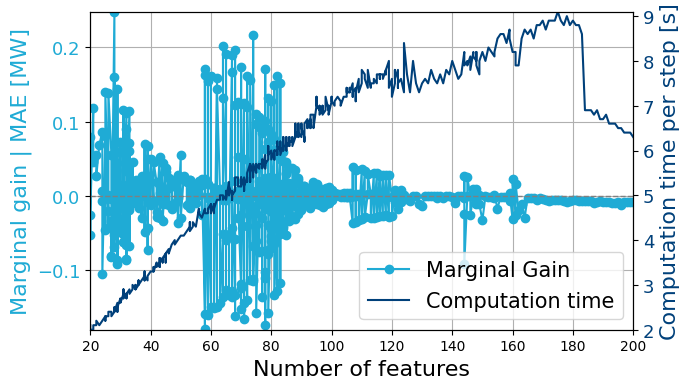

SBFS Marginal Gain vs computation time
Total elapsed time: 1h:7min:16sec


In [130]:
df_sbs = parse_sbs_log(log_text)
SBFS = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff(-1)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 200

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(7, 4 ))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=16)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=16, color=color1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=13)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step [s]", fontsize=16, color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=13)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="lower right", fontsize=15)
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")
total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")


**SBS**

In [131]:
log_text = """

/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 247 out of 249 | elapsed:  1.5min remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:  1.5min finished

[2025-05-26 10:09:17] Features: 248/1 -- score: -93.48158658681896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 246 out of 248 | elapsed:   39.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:   39.6s finished

[2025-05-26 10:09:57] Features: 247/1 -- score: -93.27177116625371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:   39.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:   39.5s finished

[2025-05-26 10:10:36] Features: 246/1 -- score: -93.20563136889352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:   39.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:   39.2s finished

[2025-05-26 10:11:15] Features: 245/1 -- score: -93.14962680585704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:   38.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   38.6s finished

[2025-05-26 10:11:54] Features: 244/1 -- score: -93.10704562760584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:   38.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:   38.4s finished

[2025-05-26 10:12:32] Features: 243/1 -- score: -93.06839852740352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:   37.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   37.7s finished

[2025-05-26 10:13:10] Features: 242/1 -- score: -93.02972062716348[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:   37.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:   37.6s finished

[2025-05-26 10:13:48] Features: 241/1 -- score: -92.99981690928634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:   37.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:   37.6s finished

[2025-05-26 10:14:26] Features: 240/1 -- score: -92.97139047329429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:   36.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   36.9s finished

[2025-05-26 10:15:03] Features: 239/1 -- score: -92.94348550820531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:   36.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:   36.3s finished

[2025-05-26 10:15:39] Features: 238/1 -- score: -92.91911337126494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:   36.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:   36.2s finished

[2025-05-26 10:16:15] Features: 237/1 -- score: -92.89763069773043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:   35.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:   35.7s finished

[2025-05-26 10:16:51] Features: 236/1 -- score: -92.87473040141177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:   35.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:   35.5s finished

[2025-05-26 10:17:27] Features: 235/1 -- score: -92.8521798201962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:   34.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:   35.1s finished

[2025-05-26 10:18:02] Features: 234/1 -- score: -92.83303093412918[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:   34.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:   34.8s finished

[2025-05-26 10:18:37] Features: 233/1 -- score: -92.81501193019537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:   33.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:   34.0s finished

[2025-05-26 10:19:11] Features: 232/1 -- score: -92.79705345766754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:   33.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:   34.0s finished

[2025-05-26 10:19:45] Features: 231/1 -- score: -92.77931762124618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:   33.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:   33.6s finished

[2025-05-26 10:20:19] Features: 230/1 -- score: -92.76271596704927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:   33.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   33.4s finished

[2025-05-26 10:20:52] Features: 229/1 -- score: -92.74692344605735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:   32.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:   32.8s finished

[2025-05-26 10:21:25] Features: 228/1 -- score: -92.73125484327808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:   32.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:   32.8s finished

[2025-05-26 10:21:58] Features: 227/1 -- score: -92.7166062416605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:   32.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:   32.4s finished

[2025-05-26 10:22:30] Features: 226/1 -- score: -92.70088745482921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:   31.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:   32.1s finished

[2025-05-26 10:23:03] Features: 225/1 -- score: -92.68317998342594[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:   32.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   32.4s finished

[2025-05-26 10:23:35] Features: 224/1 -- score: -92.67073401144249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:   31.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:   31.4s finished

[2025-05-26 10:24:07] Features: 223/1 -- score: -92.65755811919254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:   30.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:   31.1s finished

[2025-05-26 10:24:38] Features: 222/1 -- score: -92.6450504770491[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:   30.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:   30.9s finished

[2025-05-26 10:25:09] Features: 221/1 -- score: -92.63250819703534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:   30.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:   30.3s finished

[2025-05-26 10:25:39] Features: 220/1 -- score: -92.59237432282006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:   30.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:   30.4s finished

[2025-05-26 10:26:10] Features: 219/1 -- score: -92.57885898939824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:   29.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:   30.0s finished

[2025-05-26 10:26:40] Features: 218/1 -- score: -92.56608020029199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:   29.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:   29.8s finished

[2025-05-26 10:27:10] Features: 217/1 -- score: -92.55424900460527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:   28.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:   29.1s finished

[2025-05-26 10:27:39] Features: 216/1 -- score: -92.54233054106675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:   28.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   29.1s finished

[2025-05-26 10:28:08] Features: 215/1 -- score: -92.53132127193274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:   28.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:   28.8s finished

[2025-05-26 10:28:37] Features: 214/1 -- score: -92.51978334649704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:   28.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:   28.5s finished

[2025-05-26 10:29:06] Features: 213/1 -- score: -92.50843657940062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:   27.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:   28.1s finished

[2025-05-26 10:29:34] Features: 212/1 -- score: -92.49749610374852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:   24.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:   28.0s finished

[2025-05-26 10:30:02] Features: 211/1 -- score: -92.48662986632546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:   24.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:   27.6s finished

[2025-05-26 10:30:30] Features: 210/1 -- score: -92.47661028729027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:   24.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   27.7s finished

[2025-05-26 10:30:57] Features: 209/1 -- score: -92.46092531685727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:   24.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:   27.7s finished

[2025-05-26 10:31:25] Features: 208/1 -- score: -92.4517261021272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:   24.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:   27.0s finished

[2025-05-26 10:31:52] Features: 207/1 -- score: -92.44256498908726[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:   23.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:   26.5s finished

[2025-05-26 10:32:19] Features: 206/1 -- score: -92.43344484598693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:   23.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:   26.8s finished

[2025-05-26 10:32:46] Features: 205/1 -- score: -92.42418698520423[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:   23.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:   25.9s finished

[2025-05-26 10:33:12] Features: 204/1 -- score: -92.41329497916372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:   23.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   26.0s finished

[2025-05-26 10:33:38] Features: 203/1 -- score: -92.40439784642655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:   22.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:   25.5s finished

[2025-05-26 10:34:03] Features: 202/1 -- score: -92.3957512038565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:   22.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:   25.7s finished

[2025-05-26 10:34:29] Features: 201/1 -- score: -92.38633857872122[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:   21.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:   24.8s finished

[2025-05-26 10:34:54] Features: 200/1 -- score: -92.377731021575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:   22.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.1s finished

[2025-05-26 10:35:19] Features: 199/1 -- score: -92.36993878871932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:   21.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:   24.5s finished

[2025-05-26 10:35:43] Features: 198/1 -- score: -92.36220882514698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:   21.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:   24.5s finished

[2025-05-26 10:36:08] Features: 197/1 -- score: -92.35431151994219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:   21.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:   24.0s finished

[2025-05-26 10:36:32] Features: 196/1 -- score: -92.34681975644123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:   21.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:   23.9s finished

[2025-05-26 10:36:56] Features: 195/1 -- score: -92.33416836613245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:   20.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:   23.4s finished

[2025-05-26 10:37:20] Features: 194/1 -- score: -92.32565993402612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:   20.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:   23.3s finished

[2025-05-26 10:37:43] Features: 193/1 -- score: -92.31620675541991[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:   21.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:   23.5s finished

[2025-05-26 10:38:07] Features: 192/1 -- score: -92.30699724828061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:   20.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   21.4s finished

[2025-05-26 10:38:28] Features: 191/1 -- score: -92.29864819500942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:   20.2s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:   21.0s finished

[2025-05-26 10:38:49] Features: 190/1 -- score: -92.2911531748067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:   20.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   20.7s finished

[2025-05-26 10:39:10] Features: 189/1 -- score: -92.28263126303753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:   19.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:   20.5s finished

[2025-05-26 10:39:31] Features: 188/1 -- score: -92.27564130629534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:   19.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:   20.3s finished

[2025-05-26 10:39:51] Features: 187/1 -- score: -92.26704410853671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:   19.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:   20.0s finished

[2025-05-26 10:40:11] Features: 186/1 -- score: -92.25751487917536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:   19.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:   19.8s finished

[2025-05-26 10:40:31] Features: 185/1 -- score: -92.25035598976253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:   18.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:   19.3s finished

[2025-05-26 10:40:51] Features: 184/1 -- score: -92.24356904166912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:   18.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:   19.2s finished

[2025-05-26 10:41:10] Features: 183/1 -- score: -92.23694216011907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:   18.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:   19.0s finished

[2025-05-26 10:41:29] Features: 182/1 -- score: -92.23060314062879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:   18.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:   18.8s finished

[2025-05-26 10:41:48] Features: 181/1 -- score: -92.22436838550192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:   17.8s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:   18.4s finished

[2025-05-26 10:42:06] Features: 180/1 -- score: -92.21829212759185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:   17.8s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   18.4s finished

[2025-05-26 10:42:25] Features: 179/1 -- score: -92.21226696030503[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:   17.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   18.1s finished

[2025-05-26 10:42:43] Features: 178/1 -- score: -92.20601802462618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:   17.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   17.9s finished

[2025-05-26 10:43:01] Features: 177/1 -- score: -92.19853170678483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:   17.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   17.8s finished

[2025-05-26 10:43:19] Features: 176/1 -- score: -92.19126925972915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:   16.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   17.5s finished

[2025-05-26 10:43:37] Features: 175/1 -- score: -92.18568743138547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:   16.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.2s finished

[2025-05-26 10:43:54] Features: 174/1 -- score: -92.1805385667813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   16.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   17.0s finished

[2025-05-26 10:44:11] Features: 173/1 -- score: -92.17536300082735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   16.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.7s finished

[2025-05-26 10:44:28] Features: 172/1 -- score: -92.16927983257479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:   16.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   16.5s finished

[2025-05-26 10:44:44] Features: 171/1 -- score: -92.16273247843304[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   15.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.3s finished

[2025-05-26 10:45:01] Features: 170/1 -- score: -92.15748628599447[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   15.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   16.1s finished

[2025-05-26 10:45:17] Features: 169/1 -- score: -92.15392796699092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished

[2025-05-26 10:45:33] Features: 168/1 -- score: -92.15056269774006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.7s finished

[2025-05-26 10:45:49] Features: 167/1 -- score: -92.14535124249352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   11.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.4s finished

[2025-05-26 10:46:04] Features: 166/1 -- score: -92.14274769329248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   11.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.3s finished

[2025-05-26 10:46:20] Features: 165/1 -- score: -92.14042440628769[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.5s finished

[2025-05-26 10:46:34] Features: 164/1 -- score: -92.13817656695112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.4s finished

[2025-05-26 10:46:49] Features: 163/1 -- score: -92.10905540700793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.1s finished

[2025-05-26 10:47:03] Features: 162/1 -- score: -92.09865775398941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.7s finished

[2025-05-26 10:47:17] Features: 161/1 -- score: -92.09549348746786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   10.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.7s finished

[2025-05-26 10:47:31] Features: 160/1 -- score: -92.09232709539926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   10.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.3s finished

[2025-05-26 10:47:44] Features: 159/1 -- score: -92.0829645576439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished

[2025-05-26 10:47:57] Features: 158/1 -- score: -92.07876680919222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.0s finished

[2025-05-26 10:48:11] Features: 157/1 -- score: -92.07416070572404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    9.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   12.6s finished

[2025-05-26 10:48:23] Features: 156/1 -- score: -92.0722153424473[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    9.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.9s finished

[2025-05-26 10:48:36] Features: 155/1 -- score: -92.07028949954984[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    9.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.3s finished

[2025-05-26 10:48:49] Features: 154/1 -- score: -92.06844188493032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    9.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.2s finished

[2025-05-26 10:49:01] Features: 153/1 -- score: -92.06657432139218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-26 10:49:14] Features: 152/1 -- score: -92.06430015632272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.4s finished

[2025-05-26 10:49:26] Features: 151/1 -- score: -92.06231861618653[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.8s finished

[2025-05-26 10:49:38] Features: 150/1 -- score: -92.06151536348793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.7s finished

[2025-05-26 10:49:50] Features: 149/1 -- score: -92.03888571173675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.7s finished

[2025-05-26 10:50:01] Features: 148/1 -- score: -92.02804185385466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished

[2025-05-26 10:50:13] Features: 147/1 -- score: -92.02718800301699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.0s finished

[2025-05-26 10:50:24] Features: 146/1 -- score: -92.02654298821484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.4s finished

[2025-05-26 10:50:35] Features: 145/1 -- score: -92.01396450098922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.2s finished

[2025-05-26 10:50:47] Features: 144/1 -- score: -92.01270209988647[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished

[2025-05-26 10:50:58] Features: 143/1 -- score: -92.01270209988638[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.4s finished

[2025-05-26 10:51:08] Features: 142/1 -- score: -92.01111734254337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.3s finished

[2025-05-26 10:51:19] Features: 141/1 -- score: -92.0111173425433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    7.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.1s finished

[2025-05-26 10:51:29] Features: 140/1 -- score: -92.01111734254327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-26 10:51:39] Features: 139/1 -- score: -92.00827986063693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.7s finished

[2025-05-26 10:51:49] Features: 138/1 -- score: -92.00827986063689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:   10.1s finished

[2025-05-26 10:51:59] Features: 137/1 -- score: -92.00827986063685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished

[2025-05-26 10:52:09] Features: 136/1 -- score: -91.9927308324759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.6s finished

[2025-05-26 10:52:18] Features: 135/1 -- score: -91.99273083247587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.2s finished

[2025-05-26 10:52:27] Features: 134/1 -- score: -91.99273083247584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-26 10:52:37] Features: 133/1 -- score: -91.9536434539194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-26 10:52:46] Features: 132/1 -- score: -91.92635171050978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished

[2025-05-26 10:52:55] Features: 131/1 -- score: -91.90226681085268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.8s finished

[2025-05-26 10:53:04] Features: 130/1 -- score: -91.90150955375188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-26 10:53:13] Features: 129/1 -- score: -91.90150955375185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.8s finished

[2025-05-26 10:53:22] Features: 128/1 -- score: -91.89418633736288[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.0s finished

[2025-05-26 10:53:30] Features: 127/1 -- score: -91.89418633736287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished

[2025-05-26 10:53:38] Features: 126/1 -- score: -91.89266644936586[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished

[2025-05-26 10:53:45] Features: 125/1 -- score: -91.89266644936579[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished

[2025-05-26 10:53:53] Features: 124/1 -- score: -91.88215207304944[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished

[2025-05-26 10:54:01] Features: 123/1 -- score: -91.88215207304943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.1s finished

[2025-05-26 10:54:08] Features: 122/1 -- score: -91.8731806679867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished

[2025-05-26 10:54:15] Features: 121/1 -- score: -91.87265087717587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished

[2025-05-26 10:54:22] Features: 120/1 -- score: -91.85148382653972[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.7s finished

[2025-05-26 10:54:28] Features: 119/1 -- score: -91.85055128008966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished

[2025-05-26 10:54:36] Features: 118/1 -- score: -91.85055128008968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-26 10:54:42] Features: 117/1 -- score: -91.8392585288532[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished

[2025-05-26 10:54:49] Features: 116/1 -- score: -91.83864899325135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.1s finished

[2025-05-26 10:54:55] Features: 115/1 -- score: -91.83826714623623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished

[2025-05-26 10:55:01] Features: 114/1 -- score: -91.83758367474186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.3s finished

[2025-05-26 10:55:07] Features: 113/1 -- score: -91.83758367474184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished

[2025-05-26 10:55:14] Features: 112/1 -- score: -91.83936372811485[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-26 10:55:20] Features: 111/1 -- score: -91.84097141486416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-26 10:55:26] Features: 110/1 -- score: -91.8431211639844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-26 10:55:32] Features: 109/1 -- score: -91.84653042433582[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished

[2025-05-26 10:55:37] Features: 108/1 -- score: -91.85094660743955[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished

[2025-05-26 10:55:43] Features: 107/1 -- score: -91.85585939660957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished

[2025-05-26 10:55:49] Features: 106/1 -- score: -91.86191970084121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-26 10:55:54] Features: 105/1 -- score: -91.86787824224452[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished

[2025-05-26 10:55:59] Features: 104/1 -- score: -91.87385212468264[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished

[2025-05-26 10:56:05] Features: 103/1 -- score: -91.87977311984504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished

[2025-05-26 10:56:10] Features: 102/1 -- score: -91.8852081484186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished

[2025-05-26 10:56:15] Features: 101/1 -- score: -91.87190656055753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.8s finished

[2025-05-26 10:56:20] Features: 100/1 -- score: -91.8478599672876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished

[2025-05-26 10:56:25] Features: 99/1 -- score: -91.85099724376212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished

[2025-05-26 10:56:30] Features: 98/1 -- score: -91.85542453754452[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.7s finished

[2025-05-26 10:56:35] Features: 97/1 -- score: -91.8606902475847[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.7s finished

[2025-05-26 10:56:39] Features: 96/1 -- score: -91.86733047329437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.3s finished

[2025-05-26 10:56:44] Features: 95/1 -- score: -91.8700068512179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished

[2025-05-26 10:56:48] Features: 94/1 -- score: -91.87587483529316[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished

[2025-05-26 10:56:52] Features: 93/1 -- score: -91.87682579304543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished

[2025-05-26 10:56:57] Features: 92/1 -- score: -91.88257215373478[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished

[2025-05-26 10:57:01] Features: 91/1 -- score: -91.87722690323697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished

[2025-05-26 10:57:05] Features: 90/1 -- score: -91.88279623132371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.3s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished

[2025-05-26 10:57:09] Features: 89/1 -- score: -91.889538183769[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.0s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished

[2025-05-26 10:57:13] Features: 88/1 -- score: -91.89593013744724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.6s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished

[2025-05-26 10:57:17] Features: 87/1 -- score: -91.90350746680264[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.9s remaining:   40.4s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.5s finished

[2025-05-26 10:57:20] Features: 86/1 -- score: -91.91351946011501[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.8s remaining:   49.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished

[2025-05-26 10:57:24] Features: 85/1 -- score: -91.92511035302815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.4s finished

[2025-05-26 10:57:27] Features: 84/1 -- score: -91.9177570805851[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.3s finished

[2025-05-26 10:57:31] Features: 83/1 -- score: -91.9275962180228[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished

[2025-05-26 10:57:34] Features: 82/1 -- score: -91.93516617397644[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished

[2025-05-26 10:57:37] Features: 81/1 -- score: -91.94152863478828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished

[2025-05-26 10:57:41] Features: 80/1 -- score: -91.9517410917112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished

[2025-05-26 10:57:44] Features: 79/1 -- score: -91.96385867889778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished

[2025-05-26 10:57:47] Features: 78/1 -- score: -91.97695684307452[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 10:57:50] Features: 77/1 -- score: -91.99124712840806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-26 10:57:53] Features: 76/1 -- score: -91.9994592018155[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 10:57:56] Features: 75/1 -- score: -92.01398925787605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished

[2025-05-26 10:57:59] Features: 74/1 -- score: -92.02758574426545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished

[2025-05-26 10:58:02] Features: 73/1 -- score: -92.04119219810532[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished

[2025-05-26 10:58:04] Features: 72/1 -- score: -92.0367601136466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished

[2025-05-26 10:58:07] Features: 71/1 -- score: -92.05349671993822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished

[2025-05-26 10:58:10] Features: 70/1 -- score: -92.05325247184622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished

[2025-05-26 10:58:12] Features: 69/1 -- score: -92.05781721307261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.3s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished

[2025-05-26 10:58:14] Features: 68/1 -- score: -92.05461108756985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.4s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.2s finished

[2025-05-26 10:58:17] Features: 67/1 -- score: -92.06954462106921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished

[2025-05-26 10:58:19] Features: 66/1 -- score: -92.08567650694263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished

[2025-05-26 10:58:21] Features: 65/1 -- score: -92.10589873332522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-26 10:58:23] Features: 64/1 -- score: -92.11254537857036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.3s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished

[2025-05-26 10:58:25] Features: 63/1 -- score: -92.12116675116944[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-26 10:58:27] Features: 62/1 -- score: -92.13543017447947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-26 10:58:29] Features: 61/1 -- score: -92.06720931326561[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished

[2025-05-26 10:58:31] Features: 60/1 -- score: -92.07555547616987[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished

[2025-05-26 10:58:33] Features: 59/1 -- score: -92.09420085937938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.7s finished

[2025-05-26 10:58:34] Features: 58/1 -- score: -92.0888091346802[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.6s finished

[2025-05-26 10:58:36] Features: 57/1 -- score: -92.0893750100268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.5s finished

[2025-05-26 10:58:38] Features: 56/1 -- score: -92.07912414791586[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    1.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.4s finished

[2025-05-26 10:58:39] Features: 55/1 -- score: -92.08889708442246[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.1s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished

[2025-05-26 10:58:41] Features: 54/1 -- score: -92.10532151220599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished

[2025-05-26 10:58:42] Features: 53/1 -- score: -92.12719671985036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    1.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished

[2025-05-26 10:58:43] Features: 52/1 -- score: -92.14010385343767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    1.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished

[2025-05-26 10:58:45] Features: 51/1 -- score: -92.15734537048104[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    0.8s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished

[2025-05-26 10:58:46] Features: 50/1 -- score: -92.18127325308514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished

[2025-05-26 10:58:48] Features: 49/1 -- score: -92.20834710319258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished

[2025-05-26 10:58:49] Features: 48/1 -- score: -92.21078461128042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished

[2025-05-26 10:58:50] Features: 47/1 -- score: -92.22673693888676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished

[2025-05-26 10:58:51] Features: 46/1 -- score: -92.25205190655392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.0s finished

[2025-05-26 10:58:52] Features: 45/1 -- score: -92.27978476881066[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished

[2025-05-26 10:58:54] Features: 44/1 -- score: -92.26645369007734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.0s finished

[2025-05-26 10:58:55] Features: 43/1 -- score: -92.29906242741664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.0s finished

[2025-05-26 10:58:56] Features: 42/1 -- score: -92.32035300332343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.7s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.9s finished

[2025-05-26 10:58:57] Features: 41/1 -- score: -92.34762664183788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.9s finished

[2025-05-26 10:58:58] Features: 40/1 -- score: -92.36835409696775[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished

[2025-05-26 10:58:59] Features: 39/1 -- score: -92.4013461182389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.8s finished

[2025-05-26 10:59:00] Features: 38/1 -- score: -92.40112862685805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished

[2025-05-26 10:59:01] Features: 37/1 -- score: -92.43919802228729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished

[2025-05-26 10:59:01] Features: 36/1 -- score: -92.475506551651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished

[2025-05-26 10:59:02] Features: 35/1 -- score: -92.52791114229161[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished

[2025-05-26 10:59:03] Features: 34/1 -- score: -92.58361400804591[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished

[2025-05-26 10:59:04] Features: 33/1 -- score: -92.61521173169268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.7s finished

[2025-05-26 10:59:05] Features: 32/1 -- score: -92.67075415505012[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished

[2025-05-26 10:59:05] Features: 31/1 -- score: -92.72362343969704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2025-05-26 10:59:06] Features: 30/1 -- score: -92.77928339800214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2025-05-26 10:59:07] Features: 29/1 -- score: -92.84599645797965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.6s finished

[2025-05-26 10:59:08] Features: 28/1 -- score: -92.89065209474796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2025-05-26 10:59:08] Features: 27/1 -- score: -92.87646030962021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2025-05-26 10:59:09] Features: 26/1 -- score: -92.95255941132127[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2025-05-26 10:59:09] Features: 25/1 -- score: -93.03499027728978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished

[2025-05-26 10:59:10] Features: 24/1 -- score: -93.11201143818548[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished

[2025-05-26 10:59:11] Features: 23/1 -- score: -93.11938892556623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2025-05-26 10:59:11] Features: 22/1 -- score: -93.20452926988922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2025-05-26 10:59:12] Features: 21/1 -- score: -93.30233090400982[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2025-05-26 10:59:12] Features: 20/1 -- score: -93.39347348622393[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2025-05-26 10:59:13] Features: 19/1 -- score: -93.49635116293436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2025-05-26 10:59:13] Features: 18/1 -- score: -93.6585633950938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2025-05-26 10:59:14] Features: 17/1 -- score: -93.82156610264354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2025-05-26 10:59:14] Features: 16/1 -- score: -93.95881025416564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2025-05-26 10:59:14] Features: 15/1 -- score: -94.00480605814771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2025-05-26 10:59:15] Features: 14/1 -- score: -94.172993185227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2025-05-26 10:59:15] Features: 13/1 -- score: -94.14303202585843[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2025-05-26 10:59:16] Features: 12/1 -- score: -94.15385996851697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2025-05-26 10:59:16] Features: 11/1 -- score: -94.43273046231909[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2025-05-26 10:59:16] Features: 10/1 -- score: -94.77415856251893[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2025-05-26 10:59:17] Features: 9/1 -- score: -94.9088151868296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2025-05-26 10:59:17] Features: 8/1 -- score: -95.43088575489942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2025-05-26 10:59:17] Features: 7/1 -- score: -96.09963468531757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2025-05-26 10:59:18] Features: 6/1 -- score: -97.14622221566717[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2025-05-26 10:59:18] Features: 5/1 -- score: -97.17210179195601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2025-05-26 10:59:18] Features: 4/1 -- score: -98.64770059838567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2025-05-26 10:59:18] Features: 3/1 -- score: -100.5774702392761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished

[2025-05-26 10:59:19] Features: 2/1 -- score: -101.7331889899455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2025-05-26 10:59:19] Features: 1/1 -- score: -107.47443920346683
  0%|          | 0/36 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)

 36%|███▌      | 13/36 [00:00<00:00, 119.87it/s]
 72%|███████▏  | 26/36 [00:00<00:00, 122.01it/s]
100%|██████████| 36/36 [00:00<00:00, 121.55it/s]

"""

     features       score  elapsed_time_sec
0         248  -93.481587              39.6
1         247  -93.271771              39.6
2         246  -93.205631              39.5
3         245  -93.149627              39.2
4         244  -93.107046              38.6
..        ...         ...               ...
243         5  -97.172102               0.2
244         4  -98.647701               0.2
245         3 -100.577470               0.1
246         2 -101.733189               0.2
247         1 -107.474439               0.1

[248 rows x 3 columns]

✅ Best CV score: -91.8376 at 113 features.


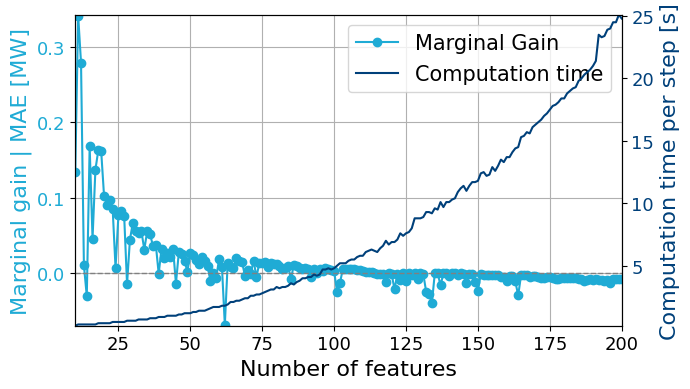

SBS Marginal Gain vs computation time
Total elapsed time: 0h:50min:18sec


In [132]:
selection_method = "SBS"

df_sbs = parse_sbs_log(log_text)
SBS_LP = df_sbs
SBS = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff(-1)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 10, 200

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(7, 4))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=16)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=16, color=color1)
ax1.tick_params(axis='both', labelsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step [s]", fontsize=16, color=color2)
ax2.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=15)
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")
total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")


In [133]:
kept_features = """
DayOfWeek_sin_current_qh, GDV_from_qh_minus_192, GDV_min_from_minute_minus_2, GDV_min_from_minute_minus_3, GEN_DA_from_qh_minus_262, GUV_from_qh_minus_1, GUV_min_from_minute_minus_2, GUV_min_from_minute_minus_3, IGCC+_min_from_minute_minus_2, IGCC+_min_from_minute_minus_3, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_3, IGCC-_min_from_minute_minus_2, IGCC-_min_from_minute_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_2, IP_from_qh_minus_3, IP_from_qh_minus_4, LOAD_DA_current_qh, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_current_qh, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_minus_3, LOAD_ID_P90_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_current_qh, LOAD_ID_from_qh_minus_3, LOAD_ID_from_qh_plus_1, LOAD_ID_from_qh_plus_2, LOAD_ID_from_qh_plus_3, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, LOAD_RT_from_qh_minus_5, MDP_from_qh_minus_3, MDP_from_qh_minus_4, MDP_from_qh_minus_6, MDP_min_from_minute_minus_2, MDP_min_from_minute_minus_3, MIP_from_qh_minus_3, MIP_from_qh_minus_4, MIP_min_from_minute_minus_2, Month_cos_current_qh, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_14, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NETPOS_GB_DA_from_hour_plus_1, NETPOS_GB_DA_from_hour_plus_2, NRV_from_qh_minus_1, NRV_from_qh_minus_2, NRV_from_qh_minus_3, NRV_from_qh_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_96, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_5, SOLAR_ID_current_qh, SOLAR_ID_from_qh_minus_1, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_3, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_France_current_qh, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_EXP_UnitedKingdom_from_qh_minus_1, XB_DA_IMP_France_current_qh, XB_DA_IMP_Germany_from_qh_plus_1, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_from_qh_minus_1, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_Germany_current_qh, XB_DA_NET_Netherlands_from_qh_minus_38, XB_DA_NET_UnitedKingdom_from_qh_plus_1, XB_RT_Germany_from_qh_minus_11, XB_RT_Germany_from_qh_minus_3, XB_RT_Luxembourg_from_qh_minus_3, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_192, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_96, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, aFRR-_from_qh_minus_3, aFRR-_from_qh_minus_7, aFRR-_min_from_minute_minus_2
"""

qh_params_SBS_LR, min_params_SBS_LR, hour_parameters_SBS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBS_LR)
print( "minute_parameters=", min_params_SBS_LR)
print( "hour_parameters=", hour_parameters_SBS_LR)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192]}, 'GEN_DA': {'lags': [-262]}, 'GUV': {'lags': [-1]}, 'IGCC-': {'lags': [-3, -1]}, 'IP': {'lags': [-12, -11, -4, -3, -2]}, 'LOAD_DA': {'lags': [-3, -1, 0, 2]}, 'LOAD_ID_P90': {'lags': [-3, -1, 0, 1, 2]}, 'LOAD_ID': {'lags': [-3, 0, 1, 2, 3]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'MDP': {'lags': [-6, -4, -3]}, 'MIP': {'lags': [-4, -3]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13, 14]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -192, -97, -96, -25, -21, -3, -1, 1]}, 'SOLAR_ID': {'lags': [-1, 0, 2, 3, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_IMP_UnitedKingdom': {'lags':

**RFE - LR**

In [134]:
kept_features = """
'SI_from_qh_minus_1', 'SI_from_qh_minus_3', 'LOAD_RT_from_qh_minus_3', 'LOAD_RT_from_qh_minus_4', 'LOAD_RT_from_qh_minus_5', 'LOAD_ID_from_qh_plus_3', 'LOAD_ID_from_qh_plus_2', 'LOAD_ID_from_qh_plus_1', 'LOAD_ID_current_qh', 'LOAD_ID_from_qh_minus_1', 'LOAD_ID_from_qh_minus_3', 'LOAD_ID_P90_from_qh_plus_3', 'LOAD_ID_P90_from_qh_plus_2', 'LOAD_ID_P90_from_qh_plus_1', 'LOAD_ID_P90_current_qh', 'LOAD_ID_P90_from_qh_minus_1', 'LOAD_ID_P90_from_qh_minus_3', 'LOAD_DA_from_qh_plus_3', 'LOAD_DA_from_qh_plus_2', 'LOAD_DA_from_qh_plus_1', 'LOAD_DA_current_qh', 'LOAD_DA_from_qh_minus_1', 'LOAD_DA_from_qh_minus_2', 'LOAD_DA_from_qh_minus_3', 'NRV_from_qh_minus_3', 'NETPOS_BE_ID_from_qh_plus_9', 'NETPOS_BE_ID_from_qh_plus_4', 'NETPOS_BE_ID_from_qh_plus_1', 'NETPOS_BE_ID_current_qh', 'WIND_ID_from_qh_plus_16', 'WIND_ID_from_qh_plus_11', 'WIND_ID_from_qh_plus_2', 'WIND_ID_from_qh_plus_1', 'WIND_ID_current_qh', 'WIND_P90_from_qh_plus_1', 'WIND_P90_current_qh', 'WIND_P90_from_qh_minus_1', 'WIND_RT_from_qh_minus_1', 'WIND_RT_from_qh_minus_2', 'WIND_RT_from_qh_minus_3', 'WIND_RT_from_qh_minus_4', 'WIND_RT_from_qh_minus_6', 'WIND_RT_from_qh_minus_10', 'SOLAR_ID_from_qh_plus_4', 'SOLAR_ID_from_qh_plus_3', 'SOLAR_ID_from_qh_plus_2', 'SOLAR_ID_current_qh', 'SOLAR_ID_from_qh_minus_1', 'SOLAR_ID_from_qh_minus_2', 'SOLAR_P90_from_qh_plus_3', 'SOLAR_P90_from_qh_plus_2', 'SOLAR_RT_from_qh_minus_1', 'SOLAR_RT_from_qh_minus_2', 'XB_DA_EXP_France_from_qh_plus_1', 'XB_DA_EXP_France_current_qh', 'XB_DA_EXP_Netherlands_from_qh_plus_1', 'XB_DA_EXP_Netherlands_current_qh', 'XB_DA_IMP_France_from_qh_plus_1', 'XB_DA_IMP_France_current_qh', 'XB_DA_IMP_Netherlands_from_qh_plus_1', 'XB_DA_IMP_Netherlands_current_qh', 'XB_DA_NET_France_from_qh_plus_1', 'XB_DA_NET_France_current_qh', 'XB_DA_NET_Germany_from_qh_plus_1', 'XB_DA_NET_Germany_current_qh', 'XB_DA_NET_Netherlands_from_qh_plus_1', 'XB_DA_NET_Netherlands_current_qh', 'XB_DA_NET_UnitedKingdom_from_qh_plus_1', 'XB_DA_NET_UnitedKingdom_current_qh', 'SI_min_from_minute_minus_2', 'SI_min_from_minute_minus_3', 'SI_min_from_minute_minus_4', 'SI_min_from_minute_minus_5', 'NRV_min_from_minute_minus_2', 'NRV_min_from_minute_minus_3', 'MIP_min_from_minute_minus_2', 'MIP_min_from_minute_minus_3', 'GUV_min_from_minute_minus_2', 'GUV_min_from_minute_minus_3', 'IGCC+_min_from_minute_minus_2', 'GDV_min_from_minute_minus_2', 'GDV_min_from_minute_minus_3', 'IGCC-_min_from_minute_minus_2', 'IGCC-_min_from_minute_minus_3', 'aFRR-_min_from_minute_minus_2', 'aFRR-_min_from_minute_minus_3'
"""

qh_params_RFE_LR, min_params_RFE_LR, hour_parameters_RFE_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBS_LR)
print( "minute_parameters=", min_params_SBS_LR)
print( "hour_parameters=", hour_parameters_SBS_LR)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192]}, 'GEN_DA': {'lags': [-262]}, 'GUV': {'lags': [-1]}, 'IGCC-': {'lags': [-3, -1]}, 'IP': {'lags': [-12, -11, -4, -3, -2]}, 'LOAD_DA': {'lags': [-3, -1, 0, 2]}, 'LOAD_ID_P90': {'lags': [-3, -1, 0, 1, 2]}, 'LOAD_ID': {'lags': [-3, 0, 1, 2, 3]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'MDP': {'lags': [-6, -4, -3]}, 'MIP': {'lags': [-4, -3]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13, 14]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -192, -97, -96, -25, -21, -3, -1, 1]}, 'SOLAR_ID': {'lags': [-1, 0, 2, 3, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_IMP_UnitedKingdom': {'lags':

In [135]:
import numpy as np
import pandas as pd
df_RFE = {'features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249],'score': [np.float64(108.35269463021203), np.float64(108.30318787233216), np.float64(108.31376840737124), np.float64(107.37348952036203), np.float64(107.36753791132895), np.float64(107.37529678534351), np.float64(104.36579291755918), np.float64(104.0633936496119), np.float64(104.31412755359624), np.float64(103.63446403020333), np.float64(103.17504905438861), np.float64(102.93608676758387), np.float64(102.9852121832674), np.float64(102.76648834142071), np.float64(102.65193983827362), np.float64(102.57050648562482), np.float64(102.20629001831406), np.float64(101.97499236312449), np.float64(101.19567192051043), np.float64(100.91948292018867), np.float64(100.48506932210567), np.float64(100.34650549157003), np.float64(100.2888987977505), np.float64(100.07770060207848), np.float64(99.80957072920788), np.float64(99.51837610496058), np.float64(99.29207068926308), np.float64(99.25709919066087), np.float64(99.20391738551685), np.float64(99.0220601691538), np.float64(99.00640003617254), np.float64(98.86465784596778), np.float64(98.88804535018198), np.float64(98.63641457410591), np.float64(98.47652612585937), np.float64(98.48853834212566), np.float64(98.25654252512999), np.float64(97.64294737994912), np.float64(97.3563001546098), np.float64(97.06196803065251), np.float64(96.71905452092994), np.float64(96.44181815170496), np.float64(96.30565265984943), np.float64(96.10071642696413), np.float64(95.86349603839827), np.float64(95.87601340290377), np.float64(95.66427383618412), np.float64(95.17403428348557), np.float64(94.88093351066696), np.float64(94.78862213453019), np.float64(94.78269858733948), np.float64(94.76175568958764), np.float64(94.76511161657895), np.float64(94.76170085725309), np.float64(94.73022425361934), np.float64(94.66244093826073), np.float64(94.48468910263917), np.float64(94.47893882400446), np.float64(94.44714113655336), np.float64(94.42780553665733), np.float64(94.38127972271816), np.float64(94.30407811818867), np.float64(94.0985575998983), np.float64(93.9895388520561), np.float64(93.91071020188467), np.float64(93.81009196788638), np.float64(93.73114138818283), np.float64(93.67203054997759), np.float64(93.70615887891546), np.float64(93.71852286425141), np.float64(93.71696974223923), np.float64(93.63218381199556), np.float64(93.50811209639704), np.float64(93.507526644624), np.float64(93.50271191115503), np.float64(93.41694978981877), np.float64(93.47565363157088), np.float64(93.45475531594617), np.float64(93.40309284373785), np.float64(93.39823386580036), np.float64(93.36349587912865), np.float64(93.37518149699105), np.float64(93.2799396033908), np.float64(93.25217016294727), np.float64(93.25049322031391), np.float64(93.21832292689817), np.float64(93.31166178746295), np.float64(93.30622842988355), np.float64(93.32849908778036), np.float64(93.36505710319832), np.float64(93.37451609390509), np.float64(93.39413259181656), np.float64(93.53098053728048), np.float64(93.5427977464819), np.float64(93.56033514711886), np.float64(93.57337330100256), np.float64(93.61466865501492), np.float64(93.607495923012), np.float64(93.61305027757628), np.float64(93.58299831238514), np.float64(93.5617092841312), np.float64(93.53835686382725), np.float64(93.52412314256148), np.float64(93.515738476723), np.float64(93.49175822699517), np.float64(93.50516463853508), np.float64(93.52606949842284), np.float64(93.61231723810586), np.float64(93.67273740930901), np.float64(93.66133455716303), np.float64(93.64745789086105), np.float64(93.66505830239682), np.float64(93.67247647507318), np.float64(93.6692956714158), np.float64(93.68279002715772), np.float64(93.69404091464325), np.float64(93.69499344637357), np.float64(93.70224974981767), np.float64(93.7043456175825), np.float64(93.69079898506044), np.float64(93.75580216512819), np.float64(93.74385281559499), np.float64(93.73767966872975), np.float64(93.78007161523993), np.float64(93.79585416575031), np.float64(93.79285810236487), np.float64(93.78814824645825), np.float64(93.82828463036077), np.float64(93.81358080841743), np.float64(93.76179351587713), np.float64(93.72636878315645), np.float64(93.70731153788972), np.float64(93.69084678105258), np.float64(93.68502023171058), np.float64(93.69160900389627), np.float64(93.70845698663817), np.float64(93.70042199777684), np.float64(93.70390386447319), np.float64(93.70003540350025), np.float64(93.69742530164723), np.float64(93.66490774660424), np.float64(93.66006516529069), np.float64(93.67611572839647), np.float64(93.70186760606812), np.float64(93.7032066557935), np.float64(93.7321528926931), np.float64(93.7439754667232), np.float64(93.73363818251728), np.float64(93.71744624573017), np.float64(93.71081431870563), np.float64(93.72357534766738), np.float64(93.69721030517046), np.float64(93.68166720688204), np.float64(93.64878503124254), np.float64(93.62853416563858), np.float64(93.63294425277633), np.float64(93.62308267696002), np.float64(93.62785169719999), np.float64(93.64015948543474), np.float64(93.65115337705859), np.float64(93.66544297394424), np.float64(93.67693912302528), np.float64(93.6750608060236), np.float64(93.66514479600421), np.float64(93.66189879125908), np.float64(93.6421947376647), np.float64(93.62720485796739), np.float64(93.62698917675003), np.float64(93.62381875491866), np.float64(93.62140883640514), np.float64(93.62315782140134), np.float64(93.62503071047722), np.float64(93.59618595397615), np.float64(93.57972445580971), np.float64(93.58284779138646), np.float64(93.5735733219957), np.float64(93.57395874454863), np.float64(93.57751154790353), np.float64(93.58880915697597), np.float64(93.59723727664782), np.float64(93.6157961863143), np.float64(93.61063555408714), np.float64(93.61136534481838), np.float64(93.62049902859741), np.float64(93.62773469830891), np.float64(93.63089906247465), np.float64(93.63508099694296), np.float64(93.65268069523029), np.float64(93.6517447102395), np.float64(93.66573399994967), np.float64(93.66047781550164), np.float64(93.65885351684217), np.float64(93.6589183306809), np.float64(93.65397455745958), np.float64(93.65386562118472), np.float64(93.65270126740668), np.float64(93.65733393902988), np.float64(93.67571748983255), np.float64(93.6833323328113), np.float64(93.68874615809139), np.float64(93.68634394899578), np.float64(93.69354639988867), np.float64(93.69920002057245), np.float64(93.69784554440925), np.float64(93.70933271225162), np.float64(93.71215894678045), np.float64(93.71323966025471), np.float64(93.70536117272559), np.float64(93.70373539415544), np.float64(93.71107211009486), np.float64(93.70291334440508), np.float64(93.70417462945318), np.float64(93.69703544548072), np.float64(93.69948948831592), np.float64(93.70060425324358), np.float64(93.69882149456328), np.float64(93.6976970242954), np.float64(93.70095563479664), np.float64(93.70039525126562), np.float64(93.69962445218073), np.float64(93.69746325145783), np.float64(93.69765413301576), np.float64(93.70297464006596), np.float64(93.70332333671861), np.float64(93.7031026710336), np.float64(93.70404806241532), np.float64(93.70650957836006), np.float64(93.70413073181794), np.float64(93.70536550065596), np.float64(93.7035535921278), np.float64(93.70185338107183), np.float64(93.70405109633762), np.float64(93.70162751739613), np.float64(93.69988651653037), np.float64(93.70227395640055), np.float64(93.70191580303343), np.float64(93.70236044406278), np.float64(93.70501659911498), np.float64(93.70510125242437), np.float64(93.7047082789817), np.float64(93.70295650318373), np.float64(93.70278777040835), np.float64(93.70246275229438), np.float64(93.70277641046933), np.float64(93.70285358101226), np.float64(93.70228098292067), np.float64(93.701976679383), np.float64(93.70195315612666), np.float64(93.70203375264674)]}
df_RFE = pd.DataFrame(df_RFE)

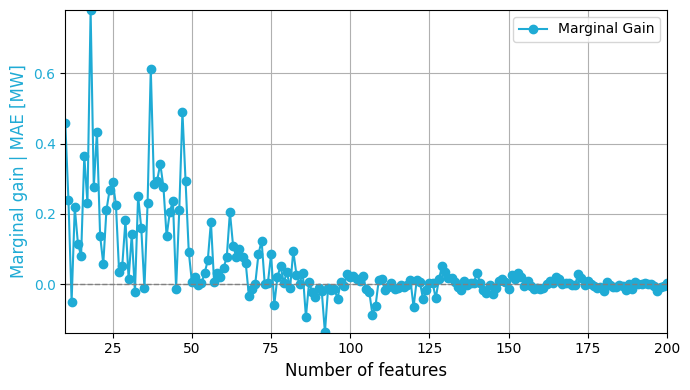

SBS Marginal Gain


In [136]:
# compute marginal gain
df_sbs = df_RFE.copy()
df_sbs["marginal_gain"] = df_sbs["score"].diff(-1)

# zoom range
x_min, x_max = 10, 200
df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

import matplotlib.pyplot as plt

plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 4))

# plot marginal gain only
ax.plot(
    df_zoom["features"],
    df_zoom["marginal_gain"],
    color="#1FABD5",
    marker='o',
    label='Marginal Gain'
)

ax.set_xlabel("Number of features", fontsize=12)
ax.set_ylabel("Marginal gain | MAE [MW]", fontsize=12, color="#1FABD5")
ax.tick_params(axis='y', labelcolor="#1FABD5")

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_xlim(x_min, x_max)
ax.set_ylim(
    df_zoom["marginal_gain"].min() - 0.001,
    df_zoom["marginal_gain"].max() + 0.001
)
ax.grid(True)

ax.legend(loc="upper right")
fig.tight_layout()
plt.show()

print(f"{selection_method} Marginal Gain")


**SFS - LR**

In [137]:
import re
import pandas as pd

def parse_sbs_log(log_text):
    """
    Parses SBS (Sequential Feature Selection) log output to extract:
    - Number of features
    - CV score
    - Elapsed time in seconds per step

    Keeps the original step order for plotting (first step = left).

    Parameters
    ----------
    log_text : str
        Multiline string containing SBS console output

    Returns
    -------
    pd.DataFrame
        DataFrame with columns: ['step', 'features', 'score', 'elapsed_time_sec']
    """

    # Match: "Done X of Y | elapsed: Zs finished"
    done_pattern = r"\[Parallel\(n_jobs=-1\)\]: Done\s+\d+\s+out of\s+\d+\s+\|\s+elapsed:\s+([0-9.]+)(s|min) finished"

    # Match: "Features: N/M -- score: S"
    score_pattern = r"Features:\s*(\d+)/\d+\s*--\s*score:\s*(-?\d+\.\d+)"

    # Extract times and scores
    # elapsed_times = [float(m.group(1)) for m in re.finditer(done_pattern, log_text)]
    # elapsed_positions = [m.start() for m in re.finditer(done_pattern, log_text)]

        # Extract and convert elapsed times
    elapsed_times = []
    elapsed_positions = []
    for m in re.finditer(done_pattern, log_text):
        time_value = float(m.group(1))
        unit = m.group(2)
        seconds = time_value * 60 if unit == "min" else time_value
        elapsed_times.append(seconds)
        elapsed_positions.append(m.start())

    score_matches = [(m.start(), int(m.group(1)), float(m.group(2))) for m in re.finditer(score_pattern, log_text)]

    # Match each score to the most recent elapsed time
    results = []
    done_idx = 0
    for i, (score_pos, features, score) in enumerate(score_matches):
        while done_idx + 1 < len(elapsed_positions) and elapsed_positions[done_idx + 1] < score_pos:
            done_idx += 1
        elapsed = elapsed_times[done_idx] if done_idx < len(elapsed_times) else None
        results.append((i + 1, features, score, elapsed))  # i+1 = step number

    df = pd.DataFrame(results, columns=["step", "features", "score", "elapsed_time_sec"])
    return df


In [138]:
log_text = """

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 247 out of 249 | elapsed:   45.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:   45.7s finished

[2025-05-26 10:04:13] Features: 1/230 -- score: -104.97890891144664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 246 out of 248 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    0.8s finished

[2025-05-26 10:04:14] Features: 2/230 -- score: -102.48019167025943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    0.8s finished

[2025-05-26 10:04:15] Features: 3/230 -- score: -99.9391314176617[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    0.8s finished

[2025-05-26 10:04:16] Features: 4/230 -- score: -99.00596352240058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.8s finished

[2025-05-26 10:04:17] Features: 5/230 -- score: -97.09603175744377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    0.9s finished

[2025-05-26 10:04:18] Features: 6/230 -- score: -96.71062833780971[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    0.9s finished

[2025-05-26 10:04:19] Features: 7/230 -- score: -96.38105341165456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:    0.9s finished

[2025-05-26 10:04:20] Features: 8/230 -- score: -96.02757401323416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:    1.0s finished

[2025-05-26 10:04:21] Features: 9/230 -- score: -95.73472545262264[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.1s finished

[2025-05-26 10:04:22] Features: 10/230 -- score: -95.55008952493041[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:    1.1s finished

[2025-05-26 10:04:23] Features: 11/230 -- score: -95.37361655310896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    1.2s finished

[2025-05-26 10:04:24] Features: 12/230 -- score: -95.21634382698146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:    1.2s finished

[2025-05-26 10:04:26] Features: 13/230 -- score: -95.10925834610904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:    1.3s finished

[2025-05-26 10:04:27] Features: 14/230 -- score: -95.00825739853582[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.3s finished

[2025-05-26 10:04:29] Features: 15/230 -- score: -94.91652133885208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.5s finished

[2025-05-26 10:04:30] Features: 16/230 -- score: -94.83244270246603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.6s finished

[2025-05-26 10:04:32] Features: 17/230 -- score: -94.76213378490188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.6s finished

[2025-05-26 10:04:33] Features: 18/230 -- score: -93.86670409301671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.6s finished

[2025-05-26 10:04:35] Features: 19/230 -- score: -93.77456232191723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.8s finished

[2025-05-26 10:04:37] Features: 20/230 -- score: -93.69578802133901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    1.8s finished

[2025-05-26 10:04:39] Features: 21/230 -- score: -93.64851520069509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    1.8s finished

[2025-05-26 10:04:41] Features: 22/230 -- score: -93.59874714847325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    1.9s finished

[2025-05-26 10:04:43] Features: 23/230 -- score: -93.56138921898786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    2.0s finished

[2025-05-26 10:04:45] Features: 24/230 -- score: -93.32712324303635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.1s finished

[2025-05-26 10:04:47] Features: 25/230 -- score: -93.2871078707265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.1s finished

[2025-05-26 10:04:49] Features: 26/230 -- score: -93.25568302905089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.2s finished

[2025-05-26 10:04:52] Features: 27/230 -- score: -93.22487406163573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.2s finished

[2025-05-26 10:04:54] Features: 28/230 -- score: -93.19836718416391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.3s finished

[2025-05-26 10:04:56] Features: 29/230 -- score: -93.17041868401958[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished

[2025-05-26 10:04:59] Features: 30/230 -- score: -93.13595272194522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished

[2025-05-26 10:05:01] Features: 31/230 -- score: -93.11437889762456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.6s finished

[2025-05-26 10:05:04] Features: 32/230 -- score: -93.09467543987495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished

[2025-05-26 10:05:07] Features: 33/230 -- score: -93.05598020215629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.7s finished

[2025-05-26 10:05:10] Features: 34/230 -- score: -93.03799642350678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished

[2025-05-26 10:05:13] Features: 35/230 -- score: -93.02314718105862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.8s finished

[2025-05-26 10:05:16] Features: 36/230 -- score: -93.00962273083618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished

[2025-05-26 10:05:19] Features: 37/230 -- score: -93.0011839794376[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished

[2025-05-26 10:05:22] Features: 38/230 -- score: -92.9750550844667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished

[2025-05-26 10:05:25] Features: 39/230 -- score: -92.94986396882528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.1s finished

[2025-05-26 10:05:28] Features: 40/230 -- score: -92.80038531802278[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished

[2025-05-26 10:05:31] Features: 41/230 -- score: -92.78416455084897[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.3s finished

[2025-05-26 10:05:35] Features: 42/230 -- score: -92.77364497700934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.4s finished

[2025-05-26 10:05:38] Features: 43/230 -- score: -92.76088527038489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.4s finished

[2025-05-26 10:05:42] Features: 44/230 -- score: -92.7307348114999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.6s finished

[2025-05-26 10:05:46] Features: 45/230 -- score: -92.71736986464073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.7s finished

[2025-05-26 10:05:49] Features: 46/230 -- score: -92.70568641630126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.8s finished

[2025-05-26 10:05:53] Features: 47/230 -- score: -92.69543358043526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    4.0s finished

[2025-05-26 10:05:57] Features: 48/230 -- score: -92.6901382180285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished

[2025-05-26 10:06:01] Features: 49/230 -- score: -92.68548849517369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished

[2025-05-26 10:06:05] Features: 50/230 -- score: -92.68144603572729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.0s finished

[2025-05-26 10:06:09] Features: 51/230 -- score: -92.6773665498067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    4.0s finished

[2025-05-26 10:06:13] Features: 52/230 -- score: -92.6722967064802[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    4.1s finished

[2025-05-26 10:06:18] Features: 53/230 -- score: -92.66702732318934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.3s finished

[2025-05-26 10:06:22] Features: 54/230 -- score: -92.66354055324415[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.4s finished

[2025-05-26 10:06:26] Features: 55/230 -- score: -92.66144262660963[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.3s finished

[2025-05-26 10:06:31] Features: 56/230 -- score: -92.6532323916055[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.5s finished

[2025-05-26 10:06:35] Features: 57/230 -- score: -92.65003607187421[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.4s finished

[2025-05-26 10:06:40] Features: 58/230 -- score: -92.64732891483871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.6s finished

[2025-05-26 10:06:45] Features: 59/230 -- score: -92.6439288985809[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.5s finished

[2025-05-26 10:06:49] Features: 60/230 -- score: -92.64214244305298[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.6s finished

[2025-05-26 10:06:54] Features: 61/230 -- score: -92.64163546101155[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.8s finished

[2025-05-26 10:06:59] Features: 62/230 -- score: -92.64117808482439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.8s finished

[2025-05-26 10:07:04] Features: 63/230 -- score: -92.63869203622974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    4.9s finished

[2025-05-26 10:07:09] Features: 64/230 -- score: -92.63441521827717[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    4.9s finished

[2025-05-26 10:07:14] Features: 65/230 -- score: -92.62828150359128[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    4.9s finished

[2025-05-26 10:07:19] Features: 66/230 -- score: -92.62519139610589[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.0s finished

[2025-05-26 10:07:24] Features: 67/230 -- score: -92.62221257322342[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    4.9s finished

[2025-05-26 10:07:29] Features: 68/230 -- score: -92.61844430401192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished

[2025-05-26 10:07:34] Features: 69/230 -- score: -92.61696316168732[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished

[2025-05-26 10:07:39] Features: 70/230 -- score: -92.61533844734339[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished

[2025-05-26 10:07:44] Features: 71/230 -- score: -92.55752670878644[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.2s finished

[2025-05-26 10:07:50] Features: 72/230 -- score: -92.50414761974572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished

[2025-05-26 10:07:55] Features: 73/230 -- score: -92.5037911357975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished

[2025-05-26 10:08:01] Features: 74/230 -- score: -92.50426663023856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.5s finished

[2025-05-26 10:08:06] Features: 75/230 -- score: -92.4934610358644[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.5s finished

[2025-05-26 10:08:12] Features: 76/230 -- score: -92.493227996867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.5s finished

[2025-05-26 10:08:17] Features: 77/230 -- score: -92.48440600053915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished

[2025-05-26 10:08:23] Features: 78/230 -- score: -92.48421968980921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.8s finished

[2025-05-26 10:08:29] Features: 79/230 -- score: -92.4838596408301[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.9s finished

[2025-05-26 10:08:35] Features: 80/230 -- score: -92.48169307352109[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2025-05-26 10:08:41] Features: 81/230 -- score: -92.48218514775304[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished

[2025-05-26 10:08:47] Features: 82/230 -- score: -92.48305342348948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished

[2025-05-26 10:08:53] Features: 83/230 -- score: -92.48512623440024[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished

[2025-05-26 10:08:59] Features: 84/230 -- score: -92.48623849140967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished

[2025-05-26 10:09:05] Features: 85/230 -- score: -92.48661106097788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.0s finished

[2025-05-26 10:09:11] Features: 86/230 -- score: -92.48798989936255[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished

[2025-05-26 10:09:18] Features: 87/230 -- score: -92.48692223623961[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished

[2025-05-26 10:09:24] Features: 88/230 -- score: -92.48656646686834[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.3s finished

[2025-05-26 10:09:30] Features: 89/230 -- score: -92.48987306965198[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished

[2025-05-26 10:09:37] Features: 90/230 -- score: -92.493908218441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished

[2025-05-26 10:09:43] Features: 91/230 -- score: -92.49821479713931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished

[2025-05-26 10:09:50] Features: 92/230 -- score: -92.50118787454649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.5s finished

[2025-05-26 10:09:56] Features: 93/230 -- score: -92.50388645280333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished

[2025-05-26 10:10:03] Features: 94/230 -- score: -92.50388645280333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.8s finished

[2025-05-26 10:10:10] Features: 95/230 -- score: -92.50787935399337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.5s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.1s finished

[2025-05-26 10:10:17] Features: 96/230 -- score: -92.51067669696965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.1s finished

[2025-05-26 10:10:24] Features: 97/230 -- score: -92.51447628867903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.0s finished

[2025-05-26 10:10:32] Features: 98/230 -- score: -92.51800514998843[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.9s finished

[2025-05-26 10:10:39] Features: 99/230 -- score: -92.38496555733406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.0s finished

[2025-05-26 10:10:46] Features: 100/230 -- score: -92.2373820895533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.2s finished

[2025-05-26 10:10:53] Features: 101/230 -- score: -92.22823634315417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    6.9s finished

[2025-05-26 10:11:00] Features: 102/230 -- score: -92.16784978169147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.1s finished

[2025-05-26 10:11:07] Features: 103/230 -- score: -92.12641225338031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.2s finished

[2025-05-26 10:11:14] Features: 104/230 -- score: -92.12380978145409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.2s finished

[2025-05-26 10:11:22] Features: 105/230 -- score: -92.12549409816751[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.1s finished

[2025-05-26 10:11:29] Features: 106/230 -- score: -92.12722837831284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.3s finished

[2025-05-26 10:11:36] Features: 107/230 -- score: -92.1294243037563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished

[2025-05-26 10:11:44] Features: 108/230 -- score: -92.12878808946093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.5s finished

[2025-05-26 10:11:51] Features: 109/230 -- score: -92.05491383575105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.4s finished

[2025-05-26 10:11:59] Features: 110/230 -- score: -92.05872433897065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    5.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.6s finished

[2025-05-26 10:12:07] Features: 111/230 -- score: -92.06244403719352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.9s finished

[2025-05-26 10:12:15] Features: 112/230 -- score: -92.06428509750846[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.7s finished

[2025-05-26 10:12:22] Features: 113/230 -- score: -92.0470002217972[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    5.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.4s finished

[2025-05-26 10:12:30] Features: 114/230 -- score: -92.0505897004308[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.7s finished

[2025-05-26 10:12:38] Features: 115/230 -- score: -92.05472818299984[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.6s finished

[2025-05-26 10:12:45] Features: 116/230 -- score: -92.05918819484452[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.6s finished

[2025-05-26 10:12:53] Features: 117/230 -- score: -91.97196335094279[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.8s finished

[2025-05-26 10:13:01] Features: 118/230 -- score: -91.96676176161992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished

[2025-05-26 10:13:09] Features: 119/230 -- score: -91.97084961997791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.7s finished

[2025-05-26 10:13:17] Features: 120/230 -- score: -91.96176655301045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished

[2025-05-26 10:13:25] Features: 121/230 -- score: -91.94502583574295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.4s finished

[2025-05-26 10:13:32] Features: 122/230 -- score: -91.93452200240955[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished

[2025-05-26 10:13:40] Features: 123/230 -- score: -91.93157615472545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-26 10:13:47] Features: 124/230 -- score: -91.93311138280278[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-26 10:13:55] Features: 125/230 -- score: -91.93712903073106[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished

[2025-05-26 10:14:02] Features: 126/230 -- score: -91.94247721118677[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    5.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.8s finished

[2025-05-26 10:14:10] Features: 127/230 -- score: -91.94748798407736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.9s finished

[2025-05-26 10:14:18] Features: 128/230 -- score: -91.95280622687199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.5s finished

[2025-05-26 10:14:26] Features: 129/230 -- score: -91.95807128191058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.7s finished

[2025-05-26 10:14:34] Features: 130/230 -- score: -91.96423581616763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.5s finished

[2025-05-26 10:14:41] Features: 131/230 -- score: -91.96423581616767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.4s finished

[2025-05-26 10:14:49] Features: 132/230 -- score: -91.96649798191655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.7s finished

[2025-05-26 10:14:57] Features: 133/230 -- score: -91.9664979819165[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.5s finished

[2025-05-26 10:15:04] Features: 134/230 -- score: -91.97219696211741[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished

[2025-05-26 10:15:12] Features: 135/230 -- score: -91.97766248789601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.4s finished

[2025-05-26 10:15:19] Features: 136/230 -- score: -91.98493993332578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.6s finished

[2025-05-26 10:15:27] Features: 137/230 -- score: -91.99205914399123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.5s finished

[2025-05-26 10:15:35] Features: 138/230 -- score: -91.99826476525877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.4s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.8s finished

[2025-05-26 10:15:43] Features: 139/230 -- score: -92.00565221921657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.4s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.7s finished

[2025-05-26 10:15:50] Features: 140/230 -- score: -92.01295502637696[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.4s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.9s finished

[2025-05-26 10:15:58] Features: 141/230 -- score: -92.02027744372161[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.9s finished

[2025-05-26 10:16:06] Features: 142/230 -- score: -92.02754325557335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.3s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    8.0s finished

[2025-05-26 10:16:15] Features: 143/230 -- score: -92.03517679107135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.5s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.1s finished

[2025-05-26 10:16:23] Features: 144/230 -- score: -92.04328748599828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.6s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.9s finished

[2025-05-26 10:16:31] Features: 145/230 -- score: -92.05140925417422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    7.9s finished

[2025-05-26 10:16:39] Features: 146/230 -- score: -92.06040764889437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.7s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.2s finished

[2025-05-26 10:16:47] Features: 147/230 -- score: -92.06976782603756[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.6s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.3s finished

[2025-05-26 10:16:55] Features: 148/230 -- score: -92.07881271603341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.0s finished

[2025-05-26 10:17:03] Features: 149/230 -- score: -92.08516458835979[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished

[2025-05-26 10:17:12] Features: 150/230 -- score: -92.09448498459393[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.4s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished

[2025-05-26 10:17:20] Features: 151/230 -- score: -92.10439107467694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.0s finished

[2025-05-26 10:17:28] Features: 152/230 -- score: -92.11506343568185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.8s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.2s finished

[2025-05-26 10:17:36] Features: 153/230 -- score: -92.12563507813613[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.1s finished

[2025-05-26 10:17:44] Features: 154/230 -- score: -92.10927450115041[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.6s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    6.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.9s finished

[2025-05-26 10:17:53] Features: 155/230 -- score: -92.1186976882129[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.1s finished

[2025-05-26 10:18:02] Features: 156/230 -- score: -92.12904356514102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.6s finished

[2025-05-26 10:18:10] Features: 157/230 -- score: -92.14056346169758[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.8s remaining:   32.0s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.0s finished

[2025-05-26 10:18:19] Features: 158/230 -- score: -92.15144592806777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.9s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.4s finished

[2025-05-26 10:18:27] Features: 159/230 -- score: -92.15464616661184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    5.0s remaining:   45.2s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.7s finished

[2025-05-26 10:18:36] Features: 160/230 -- score: -92.16658765656709[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   57.1s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.7s finished

[2025-05-26 10:18:45] Features: 161/230 -- score: -92.18005820319324[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.5s finished

[2025-05-26 10:18:53] Features: 162/230 -- score: -92.18546122947133[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.5s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.9s finished

[2025-05-26 10:19:02] Features: 163/230 -- score: -92.19892667573383[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.3s finished

[2025-05-26 10:19:11] Features: 164/230 -- score: -92.20383742838533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.5s finished

[2025-05-26 10:19:19] Features: 165/230 -- score: -92.1782935595965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.4s finished

[2025-05-26 10:19:28] Features: 166/230 -- score: -92.17829355959645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.4s finished

[2025-05-26 10:19:36] Features: 167/230 -- score: -92.17829355959651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.3s finished

[2025-05-26 10:19:45] Features: 168/230 -- score: -92.17920749003325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.8s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.8s finished

[2025-05-26 10:19:53] Features: 169/230 -- score: -92.19440349562701[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.7s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.5s finished

[2025-05-26 10:20:02] Features: 170/230 -- score: -92.19366093172535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.8s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.3s finished

[2025-05-26 10:20:11] Features: 171/230 -- score: -92.19414354421289[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.3s finished

[2025-05-26 10:20:19] Features: 172/230 -- score: -92.20690874414782[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    5.8s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    8.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    8.3s finished

[2025-05-26 10:20:27] Features: 173/230 -- score: -92.2231218169352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    5.7s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    8.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    8.3s finished

[2025-05-26 10:20:36] Features: 174/230 -- score: -92.2402952259106[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    5.9s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    6.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.5s finished

[2025-05-26 10:20:44] Features: 175/230 -- score: -92.2394769110542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    5.8s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    6.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    8.5s finished

[2025-05-26 10:20:53] Features: 176/230 -- score: -92.23578753074368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    5.7s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    6.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    8.5s finished

[2025-05-26 10:21:02] Features: 177/230 -- score: -92.2468109979761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    5.8s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    6.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    8.3s finished

[2025-05-26 10:21:10] Features: 178/230 -- score: -92.25969364157545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    5.7s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    6.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    8.4s finished

[2025-05-26 10:21:18] Features: 179/230 -- score: -92.27614647665649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    5.7s remaining:   20.8s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    6.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    8.2s finished

[2025-05-26 10:21:27] Features: 180/230 -- score: -92.29129152061097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    5.8s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    6.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    8.4s finished

[2025-05-26 10:21:35] Features: 181/230 -- score: -92.30154956090502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    5.7s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    6.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    8.3s finished

[2025-05-26 10:21:43] Features: 182/230 -- score: -92.31289051458796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    5.8s remaining:   42.6s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    6.4s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    8.6s finished

[2025-05-26 10:21:52] Features: 183/230 -- score: -92.32946269981545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    5.5s remaining:   46.2s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    6.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    8.0s finished

[2025-05-26 10:22:00] Features: 184/230 -- score: -92.34582638966113[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    5.9s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    6.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    8.3s finished

[2025-05-26 10:22:09] Features: 185/230 -- score: -92.36275016297917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    5.1s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    6.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    7.3s finished

[2025-05-26 10:22:16] Features: 186/230 -- score: -92.38026678498619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    6.4s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.0s finished

[2025-05-26 10:22:23] Features: 187/230 -- score: -92.39803777040753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    7.0s finished

[2025-05-26 10:22:30] Features: 188/230 -- score: -92.39758553626619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    6.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    6.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    6.9s finished

[2025-05-26 10:22:37] Features: 189/230 -- score: -92.39808291039986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    6.2s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.9s finished

[2025-05-26 10:22:44] Features: 190/230 -- score: -92.41543565954063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    6.0s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    6.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    6.9s finished

[2025-05-26 10:22:51] Features: 191/230 -- score: -92.42951661492505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    6.1s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    7.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    7.2s finished

[2025-05-26 10:22:58] Features: 192/230 -- score: -92.4459437722706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    5.9s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    6.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    7.0s finished

[2025-05-26 10:23:06] Features: 193/230 -- score: -92.46698374995522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    6.0s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    6.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    6.8s finished

[2025-05-26 10:23:12] Features: 194/230 -- score: -92.48988680164008[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    6.0s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    6.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    6.8s finished

[2025-05-26 10:23:19] Features: 195/230 -- score: -92.476442619493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    5.7s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    6.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.5s finished

[2025-05-26 10:23:26] Features: 196/230 -- score: -92.47883749478042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    5.3s remaining:   35.1s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    6.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    6.8s finished

[2025-05-26 10:23:33] Features: 197/230 -- score: -92.48016414995368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    5.7s remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    6.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    6.5s finished

[2025-05-26 10:23:39] Features: 198/230 -- score: -92.49024125650175[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    4.7s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    6.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    7.2s finished

[2025-05-26 10:23:47] Features: 199/230 -- score: -92.50321675364808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    6.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.0s finished

[2025-05-26 10:23:54] Features: 200/230 -- score: -92.52248977338932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    6.1s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    6.9s finished

[2025-05-26 10:24:01] Features: 201/230 -- score: -92.54364750766318[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    6.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    7.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.4s finished

[2025-05-26 10:24:08] Features: 202/230 -- score: -92.56698538872517[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    5.7s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    6.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    6.4s finished

[2025-05-26 10:24:15] Features: 203/230 -- score: -92.59202884815069[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    5.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    6.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    6.7s finished

[2025-05-26 10:24:22] Features: 204/230 -- score: -92.61711375560171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    5.4s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    5.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.2s finished

[2025-05-26 10:24:28] Features: 205/230 -- score: -92.61644943589025[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    4.9s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    6.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    6.6s finished

[2025-05-26 10:24:35] Features: 206/230 -- score: -92.58977870868156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    5.3s remaining:   51.8s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    5.6s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    6.1s finished

[2025-05-26 10:24:41] Features: 207/230 -- score: -92.58977872145637[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    5.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    5.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    6.3s finished

[2025-05-26 10:24:47] Features: 208/230 -- score: -92.59247980954169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    5.5s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    6.2s finished

[2025-05-26 10:24:54] Features: 209/230 -- score: -92.59742364782842[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    5.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.9s finished

[2025-05-26 10:25:00] Features: 210/230 -- score: -92.61390067366528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    5.1s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    5.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    5.9s finished

[2025-05-26 10:25:06] Features: 211/230 -- score: -92.61769390632634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    5.1s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    5.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    6.2s finished

[2025-05-26 10:25:12] Features: 212/230 -- score: -92.6383759793525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    4.9s remaining:   31.5s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    6.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    6.5s finished

[2025-05-26 10:25:19] Features: 213/230 -- score: -92.65371992853899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    4.8s remaining:   38.6s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    5.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.7s finished

[2025-05-26 10:25:25] Features: 214/230 -- score: -92.67732294047902[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    5.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.9s finished

[2025-05-26 10:25:31] Features: 215/230 -- score: -92.70041113566357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    5.2s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    5.6s finished

[2025-05-26 10:25:36] Features: 216/230 -- score: -92.71938282271557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    5.0s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    5.8s finished

[2025-05-26 10:25:42] Features: 217/230 -- score: -92.74305204103345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    4.7s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    5.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.6s finished

[2025-05-26 10:25:48] Features: 218/230 -- score: -92.7680352713135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    5.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.5s finished

[2025-05-26 10:25:53] Features: 219/230 -- score: -92.79234804817196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished

[2025-05-26 10:25:59] Features: 220/230 -- score: -92.80177307475826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    4.9s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    5.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    6.0s finished

[2025-05-26 10:26:05] Features: 221/230 -- score: -92.82951487334263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    4.5s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.2s finished

[2025-05-26 10:26:10] Features: 222/230 -- score: -92.82044733564264[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    4.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    5.3s finished

[2025-05-26 10:26:16] Features: 223/230 -- score: -92.82044726476428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    4.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    5.2s finished

[2025-05-26 10:26:21] Features: 224/230 -- score: -92.82813430752034[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    4.2s remaining:   47.9s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    4.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.2s finished

[2025-05-26 10:26:26] Features: 225/230 -- score: -92.82813431651358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    4.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    4.9s finished

[2025-05-26 10:26:31] Features: 226/230 -- score: -92.8325118032985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    4.4s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    4.9s finished

[2025-05-26 10:26:36] Features: 227/230 -- score: -92.83251204067695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    4.1s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    4.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    4.9s finished

[2025-05-26 10:26:41] Features: 228/230 -- score: -92.85707131338226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    4.3s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    4.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.8s finished

[2025-05-26 10:26:46] Features: 229/230 -- score: -92.85707156679342[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    4.0s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    4.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished

[2025-05-26 10:26:51] Features: 230/230 -- score: -92.89056909359198
  0%|          | 0/36 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)

  3%|▎         | 1/36 [00:00<00:06,  5.31it/s]
  6%|▌         | 2/36 [00:00<00:05,  5.94it/s]
  8%|▊         | 3/36 [00:00<00:05,  6.19it/s]
 11%|█         | 4/36 [00:00<00:04,  6.59it/s]
 14%|█▍        | 5/36 [00:00<00:04,  6.63it/s]
 17%|█▋        | 6/36 [00:00<00:04,  7.00it/s]
 19%|█▉        | 7/36 [00:01<00:04,  6.94it/s]
 22%|██▏       | 8/36 [00:01<00:03,  7.19it/s]
 25%|██▌       | 9/36 [00:01<00:03,  7.06it/s]
 28%|██▊       | 10/36 [00:01<00:03,  7.28it/s]
 31%|███       | 11/36 [00:01<00:03,  7.12it/s]
 33%|███▎      | 12/36 [00:01<00:03,  7.32it/s]
 36%|███▌      | 13/36 [00:01<00:03,  7.15it/s]
 39%|███▉      | 14/36 [00:02<00:02,  7.34it/s]
 42%|████▏     | 15/36 [00:02<00:02,  7.15it/s]
 44%|████▍     | 16/36 [00:02<00:02,  7.34it/s]
 47%|████▋     | 17/36 [00:02<00:02,  7.15it/s]
 50%|█████     | 18/36 [00:02<00:02,  7.31it/s]
 53%|█████▎    | 19/36 [00:02<00:02,  7.15it/s]
 56%|█████▌    | 20/36 [00:02<00:02,  7.15it/s]
 58%|█████▊    | 21/36 [00:02<00:02,  7.04it/s]
 61%|██████    | 22/36 [00:03<00:01,  7.07it/s]
 64%|██████▍   | 23/36 [00:03<00:01,  7.00it/s]
 67%|██████▋   | 24/36 [00:03<00:01,  7.05it/s]
 69%|██████▉   | 25/36 [00:03<00:01,  6.98it/s]
 72%|███████▏  | 26/36 [00:03<00:01,  6.94it/s]
 75%|███████▌  | 27/36 [00:03<00:01,  6.86it/s]
 78%|███████▊  | 28/36 [00:04<00:01,  6.93it/s]
 81%|████████  | 29/36 [00:04<00:01,  6.84it/s]
 83%|████████▎ | 30/36 [00:04<00:00,  6.94it/s]
 86%|████████▌ | 31/36 [00:04<00:00,  6.93it/s]
 89%|████████▉ | 32/36 [00:04<00:00,  7.01it/s]
 92%|█████████▏| 33/36 [00:04<00:00,  6.94it/s]
 94%|█████████▍| 34/36 [00:04<00:00,  6.99it/s]
 97%|█████████▋| 35/36 [00:05<00:00,  6.97it/s]
100%|██████████| 36/36 [00:05<00:00,  7.22it/s]
100%|██████████| 36/36 [00:05<00:00,  7.00it/s]


"""

     step  features       score  elapsed_time_sec
0       1         1 -104.978909              45.7
1       2         2 -102.480192               0.8
2       3         3  -99.939131               0.8
3       4         4  -99.005964               0.8
4       5         5  -97.096032               0.8
..    ...       ...         ...               ...
225   226       226  -92.832512               4.9
226   227       227  -92.832512               4.9
227   228       228  -92.857071               4.9
228   229       229  -92.857072               4.8
229   230       230  -92.890569               4.8

[230 rows x 4 columns]

✅ Best CV score: -91.9316 at 123 features.


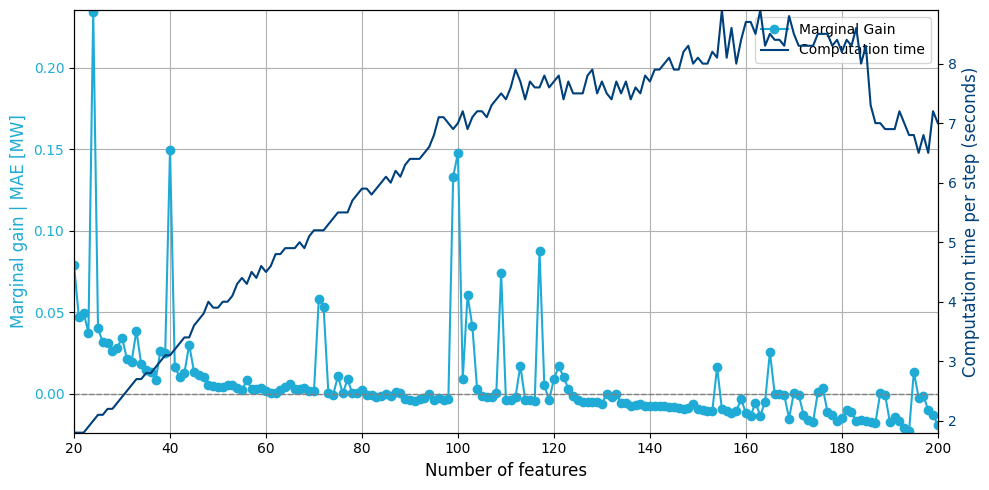

SFS Marginal Gain vs computation time
Total elapsed time: 0h:23min:1sec


In [139]:
selection_method = "SFS"

df_sbs = parse_sbs_log(log_text)
SFS = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff().fillna(0)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 200

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(10, 5))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=12)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step (seconds)", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right")
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")
total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")


In [140]:
kept_features= """
DayOfWeek_cos_current_qh, DayOfWeek_sin_current_qh, GDV_from_qh_minus_1, GDV_from_qh_minus_192, GUV_from_qh_minus_1, Hour_cos_current_qh, IGCC+_from_qh_minus_2, IGCC+_min_from_minute_minus_2, IGCC+_min_from_minute_minus_3, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IGCC-_min_from_minute_minus_2, IGCC-_min_from_minute_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_13, IP_from_qh_minus_2, IP_from_qh_minus_3, IP_from_qh_minus_4, IP_min_from_minute_minus_2, LOAD_DA_from_qh_plus_3, LOAD_ID_P90_from_qh_minus_3, LOAD_ID_P90_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_current_qh, LOAD_ID_from_qh_minus_2, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, LOAD_RT_from_qh_minus_5, MDP_from_qh_minus_1, MDP_from_qh_minus_3, MDP_from_qh_minus_4, MDP_from_qh_minus_6, MDP_min_from_minute_minus_2, MDP_min_from_minute_minus_3, MIP_from_qh_minus_1, MIP_from_qh_minus_3, MIP_from_qh_minus_4, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_minus_1, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_1, NRV_from_qh_minus_2, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_2, NRV_min_from_minute_minus_3, NRV_min_from_minute_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_5, SI_min_from_minute_minus_16, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_4, SI_min_from_minute_minus_46, SI_min_from_minute_minus_5, SI_min_from_minute_minus_61, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_3, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_ID_from_qh_plus_2, WIND_P90_from_qh_minus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_minus_1, XB_DA_EXP_Germany_from_qh_minus_6, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_minus_1, XB_DA_EXP_Netherlands_from_qh_minus_38, XB_DA_EXP_Netherlands_from_qh_minus_45, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_EXP_UnitedKingdom_from_qh_minus_1, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_2, XB_DA_NET_UnitedKingdom_from_qh_plus_42, XB_RT_Germany_from_qh_minus_11, XB_RT_UnitedKingdom_from_qh_minus_3, XB_RT_UnitedKingdom_from_qh_minus_6, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_192, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_8, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, aFRR-_from_qh_minus_3, aFRR-_from_qh_minus_7, aFRR-_from_qh_minus_8, aFRR-_from_qh_minus_96, aFRR-_min_from_minute_minus_3, mFRR+_from_qh_minus_3
"""

qh_params_SFS_LR, min_params_SFS_LR, hour_parameters_SFS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SFS_LR)
print( "min_parameters=", min_params_SFS_LR)
print( "hour_parameters=", hour_parameters_SFS_LR)

qh_parameters= {'DayOfWeek_cos': {'lags': [0]}, 'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192, -1]}, 'GUV': {'lags': [-1]}, 'Hour_cos': {'lags': [0]}, 'IGCC+': {'lags': [-2]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-13, -12, -11, -4, -3, -2]}, 'LOAD_DA': {'lags': [3]}, 'LOAD_ID_P90': {'lags': [-3, 1, 2, 3]}, 'LOAD_ID': {'lags': [-2, 0]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'MDP': {'lags': [-6, -4, -3, -1]}, 'MIP': {'lags': [-4, -3, -1]}, 'NETPOS_BE_ID': {'lags': [-1, 0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -192, -25, -21, -5, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 3, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_ID': {'lags': [2]}, 'WIND_P90': {'lags': [-1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_Germany': {'lags': [-6, -1, 0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [-45, -38, -1, 0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_NET_France': {'lags': [-1, 0, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2, 

**SFFS**

In [141]:
log_text = """
/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 293 out of 293 | elapsed:   49.1s finished

[2025-05-27 17:19:27] Features: 1/150 -- score: -105.00376378462649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 out of 292 | elapsed:    0.9s finished

[2025-05-27 17:19:28] Features: 2/150 -- score: -102.49908786506522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 164 out of 291 | elapsed:    0.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 291 out of 291 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2025-05-27 17:19:30] Features: 3/150 -- score: -99.96091689119429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2025-05-27 17:19:31] Features: 4/150 -- score: -99.02608525170311[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 162 out of 289 | elapsed:    0.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 289 out of 289 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2025-05-27 17:19:32] Features: 5/150 -- score: -97.10752143284594[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2025-05-27 17:19:33] Features: 6/150 -- score: -96.71889956421458[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 287 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 287 out of 287 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2025-05-27 17:19:34] Features: 7/150 -- score: -96.36953463472317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 286 out of 286 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2025-05-27 17:19:36] Features: 8/150 -- score: -96.06145491760557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 158 out of 285 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2025-05-27 17:19:37] Features: 9/150 -- score: -95.75636968301362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 284 out of 284 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2025-05-27 17:19:39] Features: 10/150 -- score: -95.52860501376739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 283 out of 283 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2025-05-27 17:19:40] Features: 11/150 -- score: -95.33257364633809[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 282 out of 282 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2025-05-27 17:19:42] Features: 12/150 -- score: -95.18505016005231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 281 out of 281 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2025-05-27 17:19:44] Features: 13/150 -- score: -95.06053119347047[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2025-05-27 17:19:46] Features: 14/150 -- score: -94.94934614379382[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 279 out of 279 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2025-05-27 17:19:48] Features: 15/150 -- score: -94.85209473410926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 278 out of 278 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2025-05-27 17:19:50] Features: 16/150 -- score: -94.75322320002176[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 277 out of 277 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2025-05-27 17:19:52] Features: 17/150 -- score: -94.66543028453415[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 276 out of 276 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2025-05-27 17:19:55] Features: 18/150 -- score: -93.82045585362218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2025-05-27 17:19:57] Features: 19/150 -- score: -93.72636081654326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 274 out of 274 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2025-05-27 17:20:00] Features: 20/150 -- score: -93.65343911625038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 273 out of 273 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2025-05-27 17:20:02] Features: 21/150 -- score: -93.58269550418085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2025-05-27 17:20:05] Features: 22/150 -- score: -93.53145519832874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 271 out of 271 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2025-05-27 17:20:08] Features: 23/150 -- score: -93.49076465513942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2025-05-27 17:20:11] Features: 24/150 -- score: -93.44879854031063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 269 out of 269 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2025-05-27 17:20:14] Features: 25/150 -- score: -93.40531765585509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 268 out of 268 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.4s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2025-05-27 17:20:17] Features: 26/150 -- score: -93.36979936145912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 267 out of 267 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2025-05-27 17:20:20] Features: 27/150 -- score: -93.33530934671764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 266 out of 266 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2025-05-27 17:20:23] Features: 28/150 -- score: -93.30266383294844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 265 out of 265 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2025-05-27 17:20:27] Features: 29/150 -- score: -93.27164434863306[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2025-05-27 17:20:30] Features: 30/150 -- score: -93.24015000547705[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2025-05-27 17:20:34] Features: 31/150 -- score: -93.20970400833035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2025-05-27 17:20:38] Features: 32/150 -- score: -93.1861645091221[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished

[2025-05-27 17:20:42] Features: 33/150 -- score: -93.17215845365284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.6s finished

[2025-05-27 17:20:46] Features: 34/150 -- score: -93.16146116058604[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 259 out of 259 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.6s finished

[2025-05-27 17:20:50] Features: 35/150 -- score: -93.14367806184806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 258 out of 258 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished

[2025-05-27 17:20:54] Features: 36/150 -- score: -93.13194100977526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished

[2025-05-27 17:20:59] Features: 37/150 -- score: -93.10495706806572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.7s finished

[2025-05-27 17:21:03] Features: 38/150 -- score: -93.09286325740244[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.8s finished

[2025-05-27 17:21:08] Features: 39/150 -- score: -93.08151553134071[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 254 out of 254 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.8s finished

[2025-05-27 17:21:13] Features: 40/150 -- score: -93.07133438616032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 253 out of 253 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished

[2025-05-27 17:21:17] Features: 41/150 -- score: -93.05818471983916[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.9s finished

[2025-05-27 17:21:22] Features: 42/150 -- score: -93.04474388164601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 251 out of 251 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.7s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.9s finished

[2025-05-27 17:21:27] Features: 43/150 -- score: -93.03588115529736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished

[2025-05-27 17:21:33] Features: 44/150 -- score: -93.02674202762492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 247 out of 249 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s finished

[2025-05-27 17:21:38] Features: 45/150 -- score: -93.02003147054641[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 246 out of 248 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished

[2025-05-27 17:21:43] Features: 46/150 -- score: -93.01397200112754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:    4.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.0s finished

[2025-05-27 17:21:49] Features: 47/150 -- score: -93.00906271066786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:    4.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished

[2025-05-27 17:21:55] Features: 48/150 -- score: -93.00444218945388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    4.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished

[2025-05-27 17:22:02] Features: 48/150 -- score: -92.99718333975196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    4.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished

[2025-05-27 17:22:08] Features: 49/150 -- score: -92.98283352605921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:    4.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.1s finished

[2025-05-27 17:22:14] Features: 50/150 -- score: -92.97656274428253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:    4.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    1.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished

[2025-05-27 17:22:20] Features: 51/150 -- score: -92.97364407560424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:    4.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    0.9s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.3s finished

[2025-05-27 17:22:26] Features: 52/150 -- score: -92.97126201821173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    0.9s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished

[2025-05-27 17:22:33] Features: 53/150 -- score: -92.96816824804995[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    1.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished

[2025-05-27 17:22:39] Features: 54/150 -- score: -92.96513564559693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:    5.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.3s finished

[2025-05-27 17:22:46] Features: 55/150 -- score: -92.96260568972593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished

[2025-05-27 17:22:52] Features: 56/150 -- score: -92.96121063685875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    1.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.4s finished

[2025-05-27 17:22:59] Features: 57/150 -- score: -92.96035470719556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.5s finished

[2025-05-27 17:23:06] Features: 58/150 -- score: -92.96054035403498[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    5.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished

[2025-05-27 17:23:14] Features: 59/150 -- score: -92.96109769789936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    5.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished

[2025-05-27 17:23:21] Features: 60/150 -- score: -92.96085168621326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    5.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished

[2025-05-27 17:23:28] Features: 61/150 -- score: -92.96195420504222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    5.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished

[2025-05-27 17:23:36] Features: 62/150 -- score: -92.96251001913517[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    5.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.7s finished

[2025-05-27 17:23:43] Features: 63/150 -- score: -92.96109741949928[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-27 17:23:53] Features: 63/150 -- score: -92.95891009082291[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.7s finished

[2025-05-27 17:24:05] Features: 62/150 -- score: -92.95470164129436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    5.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-27 17:24:13] Features: 63/150 -- score: -92.95453579112417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    6.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-27 17:24:21] Features: 64/150 -- score: -92.95453579112417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.8s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished

[2025-05-27 17:24:29] Features: 65/150 -- score: -92.95539364502719[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.0s finished

[2025-05-27 17:24:37] Features: 66/150 -- score: -92.95703010788063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.3s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.5s remaining:   30.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished

[2025-05-27 17:24:50] Features: 65/150 -- score: -92.95501857054869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-27 17:25:03] Features: 64/150 -- score: -92.95003232172964[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-27 17:25:15] Features: 63/150 -- score: -92.94746833115018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-27 17:25:23] Features: 64/150 -- score: -92.94746833115019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished

[2025-05-27 17:25:31] Features: 65/150 -- score: -92.94820563843714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.5s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-27 17:25:39] Features: 66/150 -- score: -92.94912194065711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished

[2025-05-27 17:25:47] Features: 67/150 -- score: -92.95023466097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished

[2025-05-27 17:25:56] Features: 68/150 -- score: -92.9516819533134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished

[2025-05-27 17:26:07] Features: 68/150 -- score: -92.95156773815211[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished

[2025-05-27 17:26:21] Features: 67/150 -- score: -92.95021462614488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.6s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished

[2025-05-27 17:26:29] Features: 68/150 -- score: -92.95150039799354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished

[2025-05-27 17:26:38] Features: 69/150 -- score: -92.95245276094045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished

[2025-05-27 17:26:47] Features: 70/150 -- score: -92.9540470140903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-27 17:27:08] Features: 66/150 -- score: -92.88231459057837[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.1s finished

[2025-05-27 17:27:21] Features: 65/150 -- score: -92.82660653695012[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished

[2025-05-27 17:27:31] Features: 65/150 -- score: -92.82385473310327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.5s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-27 17:27:40] Features: 66/150 -- score: -92.82342037794793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished

[2025-05-27 17:27:48] Features: 67/150 -- score: -92.82286825874269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.6s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished

[2025-05-27 17:27:57] Features: 68/150 -- score: -92.82286825874269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished

[2025-05-27 17:28:05] Features: 69/150 -- score: -92.82318008744159[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.7s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished

[2025-05-27 17:28:15] Features: 70/150 -- score: -92.82473615912355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished

[2025-05-27 17:28:24] Features: 71/150 -- score: -92.8272018023149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:28:33] Features: 72/150 -- score: -92.8298125876638[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished

[2025-05-27 17:28:45] Features: 72/150 -- score: -92.82974690902643[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:28:56] Features: 72/150 -- score: -92.829572005879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished

[2025-05-27 17:29:06] Features: 73/150 -- score: -92.83229971193938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    6.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished

[2025-05-27 17:29:23] Features: 71/150 -- score: -92.82706125828973[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished

[2025-05-27 17:29:35] Features: 71/150 -- score: -92.82673762520217[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished

[2025-05-27 17:29:49] Features: 70/150 -- score: -92.82422422860743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished

[2025-05-27 17:29:58] Features: 71/150 -- score: -92.82514822448005[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:30:08] Features: 72/150 -- score: -92.82615672918352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished

[2025-05-27 17:30:17] Features: 73/150 -- score: -92.8285126375805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished

[2025-05-27 17:30:26] Features: 74/150 -- score: -92.83104579863225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.8s finished

[2025-05-27 17:30:36] Features: 75/150 -- score: -92.83364740878524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished

[2025-05-27 17:30:46] Features: 76/150 -- score: -92.83660782255275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    6.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished

[2025-05-27 17:30:56] Features: 77/150 -- score: -92.84055788493858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    6.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-27 17:31:06] Features: 78/150 -- score: -92.844487342469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    6.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.1s finished

[2025-05-27 17:31:17] Features: 79/150 -- score: -92.84831942668704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    7.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished

[2025-05-27 17:31:27] Features: 80/150 -- score: -92.85233224801166[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished

[2025-05-27 17:31:38] Features: 81/150 -- score: -92.85611232807868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    6.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished

[2025-05-27 17:31:48] Features: 82/150 -- score: -92.85995493821252[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    7.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished

[2025-05-27 17:31:59] Features: 83/150 -- score: -92.86383880883709[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    6.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished

[2025-05-27 17:32:10] Features: 84/150 -- score: -92.8686916212136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    6.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-27 17:32:25] Features: 84/150 -- score: -92.86807333080336[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    7.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished

[2025-05-27 17:32:36] Features: 85/150 -- score: -92.87293998719257[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    7.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.4s finished

[2025-05-27 17:32:47] Features: 86/150 -- score: -92.87807370065154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    7.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.9s remaining:   53.4s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    2.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    2.0s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.4s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-27 17:33:59] Features: 66/150 -- score: -92.7831905480777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-27 17:34:16] Features: 63/150 -- score: -92.5381580174708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-27 17:34:26] Features: 63/150 -- score: -92.51700004968272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    6.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-27 17:34:34] Features: 64/150 -- score: -92.50098815899473[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.7s finished

[2025-05-27 17:34:45] Features: 64/150 -- score: -92.49143376540742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.5s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished

[2025-05-27 17:34:53] Features: 65/150 -- score: -92.48216283012867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-27 17:35:01] Features: 66/150 -- score: -92.47379862657436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.5s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished

[2025-05-27 17:35:12] Features: 66/150 -- score: -92.46737303509319[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished

[2025-05-27 17:35:20] Features: 67/150 -- score: -92.46661564237856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.4s finished

[2025-05-27 17:35:29] Features: 68/150 -- score: -92.46639808431664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.4s finished

[2025-05-27 17:35:38] Features: 69/150 -- score: -92.46487223724938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished

[2025-05-27 17:35:47] Features: 70/150 -- score: -92.4636010579606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.5s finished

[2025-05-27 17:35:56] Features: 71/150 -- score: -92.46168533718512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.6s finished

[2025-05-27 17:36:05] Features: 72/150 -- score: -92.4565822322275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished

[2025-05-27 17:36:14] Features: 73/150 -- score: -92.44369371194301[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished

[2025-05-27 17:36:24] Features: 74/150 -- score: -92.42258822904563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished

[2025-05-27 17:36:36] Features: 74/150 -- score: -92.38076499746259[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:36:54] Features: 72/150 -- score: -92.35332678652418[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished

[2025-05-27 17:37:08] Features: 71/150 -- score: -92.33437049265783[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:37:17] Features: 72/150 -- score: -92.31629032341571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-27 17:37:30] Features: 72/150 -- score: -92.31079572127118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished

[2025-05-27 17:37:39] Features: 73/150 -- score: -92.30337279445011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished

[2025-05-27 17:37:49] Features: 74/150 -- score: -92.30078235845892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished

[2025-05-27 17:38:01] Features: 74/150 -- score: -92.29529683450698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    6.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished

[2025-05-27 17:38:11] Features: 75/150 -- score: -92.29263890396922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    6.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    2.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished

[2025-05-27 17:38:21] Features: 76/150 -- score: -92.29104468867862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    6.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished

[2025-05-27 17:38:31] Features: 77/150 -- score: -92.28950754681239[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    6.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-27 17:38:41] Features: 78/150 -- score: -92.2895075468124[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    6.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished

[2025-05-27 17:38:57] Features: 77/150 -- score: -92.28848150155484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    6.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-27 17:39:07] Features: 78/150 -- score: -92.28848150155488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    6.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished

[2025-05-27 17:39:18] Features: 79/150 -- score: -92.28896017394115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    3.0s finished

[2025-05-27 17:39:34] Features: 78/150 -- score: -92.28776616626082[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-27 17:39:47] Features: 78/150 -- score: -92.2877661662608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    6.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-27 17:39:58] Features: 79/150 -- score: -92.28776616626081[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished

[2025-05-27 17:40:08] Features: 80/150 -- score: -92.28776616626084[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.3s finished

[2025-05-27 17:40:19] Features: 81/150 -- score: -92.28783556178932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    6.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished

[2025-05-27 17:40:33] Features: 81/150 -- score: -92.28768803897651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    6.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.1s finished

[2025-05-27 17:40:43] Features: 82/150 -- score: -92.28768803897654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    6.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished

[2025-05-27 17:40:54] Features: 83/150 -- score: -92.28830191946744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    6.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished

[2025-05-27 17:41:08] Features: 83/150 -- score: -92.28318224633207[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    6.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-27 17:41:19] Features: 84/150 -- score: -92.28318224633212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    7.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.2s finished

[2025-05-27 17:41:30] Features: 85/150 -- score: -92.28377125632147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    7.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished

[2025-05-27 17:41:52] Features: 83/150 -- score: -92.26934100623632[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    6.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished

[2025-05-27 17:42:06] Features: 83/150 -- score: -92.26724593738528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    7.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-27 17:42:17] Features: 84/150 -- score: -92.26724593738533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    7.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.3s finished

[2025-05-27 17:42:28] Features: 85/150 -- score: -92.2679868251716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    6.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished

[2025-05-27 17:42:40] Features: 86/150 -- score: -92.26903961305746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    6.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   55.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished

[2025-05-27 17:42:51] Features: 87/150 -- score: -92.27044761918494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    7.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished

[2025-05-27 17:43:02] Features: 88/150 -- score: -92.27238966497947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    7.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.6s finished

[2025-05-27 17:43:14] Features: 89/150 -- score: -92.27428239730912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.9s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   55.0s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished

[2025-05-27 17:43:41] Features: 86/150 -- score: -92.26143911454105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    7.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.4s finished

[2025-05-27 17:43:52] Features: 87/150 -- score: -92.26227821298481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    7.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   42.0s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished

[2025-05-27 17:44:04] Features: 88/150 -- score: -92.26373587007501[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    7.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.6s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished

[2025-05-27 17:44:15] Features: 89/150 -- score: -92.26556797213209[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.0s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.7s finished

[2025-05-27 17:44:27] Features: 90/150 -- score: -92.26616493711191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished

[2025-05-27 17:44:39] Features: 91/150 -- score: -92.26939813887651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished

[2025-05-27 17:44:55] Features: 91/150 -- score: -92.26773581102698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished

[2025-05-27 17:45:08] Features: 92/150 -- score: -92.26877972640506[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    7.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished

[2025-05-27 17:45:20] Features: 93/150 -- score: -92.27176497852355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    7.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.0s finished

[2025-05-27 17:45:33] Features: 94/150 -- score: -92.27466956061619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    7.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished

[2025-05-27 17:45:54] Features: 93/150 -- score: -92.27174334821892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    7.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-27 17:46:07] Features: 94/150 -- score: -92.27322679084926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    8.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished

[2025-05-27 17:46:20] Features: 95/150 -- score: -92.27668944083739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    8.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished

[2025-05-27 17:46:33] Features: 96/150 -- score: -92.28026244788403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    7.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.2s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished

[2025-05-27 17:47:04] Features: 93/150 -- score: -92.27133106341398[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    7.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished

[2025-05-27 17:47:17] Features: 94/150 -- score: -92.27235220656031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    7.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.0s finished

[2025-05-27 17:47:29] Features: 95/150 -- score: -92.27491527495224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    7.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished

[2025-05-27 17:47:43] Features: 96/150 -- score: -92.27776883411087[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    7.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.4s finished

[2025-05-27 17:47:56] Features: 97/150 -- score: -92.28112214303722[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    7.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-27 17:48:09] Features: 98/150 -- score: -92.28389035097494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished

[2025-05-27 17:48:22] Features: 99/150 -- score: -92.28739899873281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    7.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished

[2025-05-27 17:48:54] Features: 96/150 -- score: -92.2764771005734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    8.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished

[2025-05-27 17:49:08] Features: 97/150 -- score: -92.27829748807818[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    8.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-27 17:49:21] Features: 98/150 -- score: -92.28061086099315[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.3s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished

[2025-05-27 17:49:52] Features: 95/150 -- score: -92.27257259950196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    8.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished

[2025-05-27 17:50:10] Features: 95/150 -- score: -92.26053309118691[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    8.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished

[2025-05-27 17:50:23] Features: 96/150 -- score: -92.26053309118693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    7.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished

[2025-05-27 17:50:36] Features: 97/150 -- score: -92.26123234634936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    7.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-27 17:50:50] Features: 98/150 -- score: -92.26392655555696[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.5s finished

[2025-05-27 17:51:17] Features: 96/150 -- score: -92.25838427273247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    7.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished

[2025-05-27 17:51:30] Features: 97/150 -- score: -92.25908986859338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    7.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-27 17:51:43] Features: 98/150 -- score: -92.26164542239333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished

[2025-05-27 17:51:57] Features: 99/150 -- score: -92.2630058520929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    8.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.3s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished

[2025-05-27 17:52:46] Features: 92/150 -- score: -92.23862243267939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    7.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.2s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.4s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished

[2025-05-27 17:53:06] Features: 91/150 -- score: -92.2323349969383[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.1s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished

[2025-05-27 17:53:23] Features: 91/150 -- score: -92.00067350705393[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished

[2025-05-27 17:53:39] Features: 91/150 -- score: -91.98869960209002[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished

[2025-05-27 17:53:55] Features: 91/150 -- score: -91.97692926243803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.1s finished

[2025-05-27 17:54:07] Features: 92/150 -- score: -91.97598448084844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    7.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.1s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.1s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished

[2025-05-27 17:54:28] Features: 91/150 -- score: -91.97413758966397[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    7.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    3.9s finished

[2025-05-27 17:54:40] Features: 92/150 -- score: -91.97284481616913[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    7.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished

[2025-05-27 17:54:53] Features: 93/150 -- score: -91.97239964566793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    7.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-27 17:55:05] Features: 94/150 -- score: -91.97239964566792[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    7.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.3s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished

[2025-05-27 17:55:18] Features: 95/150 -- score: -91.97239964566793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    8.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-27 17:55:40] Features: 94/150 -- score: -91.97189349316136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    7.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished

[2025-05-27 17:55:52] Features: 95/150 -- score: -91.971699286117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    8.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.2s finished

[2025-05-27 17:56:05] Features: 96/150 -- score: -91.97169928611703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    8.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished

[2025-05-27 17:56:19] Features: 97/150 -- score: -91.97196557914855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    7.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-27 17:56:32] Features: 98/150 -- score: -91.97227158841974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished

[2025-05-27 17:56:45] Features: 99/150 -- score: -91.972715550596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.7s finished

[2025-05-27 17:57:08] Features: 98/150 -- score: -91.9721893166377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    8.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished

[2025-05-27 17:57:22] Features: 99/150 -- score: -91.97218931663772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    8.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished

[2025-05-27 17:57:36] Features: 100/150 -- score: -91.97228041856062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    8.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished

[2025-05-27 17:57:50] Features: 101/150 -- score: -91.97279434174769[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    8.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished

[2025-05-27 17:58:04] Features: 102/150 -- score: -91.97303531266931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    8.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.9s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished

[2025-05-27 17:58:32] Features: 100/150 -- score: -91.97113524096405[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    8.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished

[2025-05-27 17:58:46] Features: 101/150 -- score: -91.97113524096406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    8.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.1s finished

[2025-05-27 17:59:01] Features: 102/150 -- score: -91.97113524096409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    8.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.7s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.9s finished

[2025-05-27 17:59:14] Features: 103/150 -- score: -91.97135716945694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    8.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished

[2025-05-27 17:59:28] Features: 104/150 -- score: -91.97156713962463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    8.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished

[2025-05-27 17:59:42] Features: 105/150 -- score: -91.97217162415218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    8.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished

[2025-05-27 17:59:57] Features: 106/150 -- score: -91.973136272357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    8.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-27 18:00:12] Features: 107/150 -- score: -91.97497389462141[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    8.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished

[2025-05-27 18:00:26] Features: 108/150 -- score: -91.9782712884136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    8.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished

[2025-05-27 18:00:41] Features: 109/150 -- score: -91.98224058897917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    8.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    3.0s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished

[2025-05-27 18:01:29] Features: 104/150 -- score: -91.97150324850332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    8.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    3.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished

[2025-05-27 18:01:44] Features: 105/150 -- score: -91.9717328519543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    8.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished

[2025-05-27 18:01:58] Features: 106/150 -- score: -91.97253620026542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    8.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    4.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.2s finished

[2025-05-27 18:02:12] Features: 107/150 -- score: -91.97392822440372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    8.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.3s finished

[2025-05-27 18:02:27] Features: 108/150 -- score: -91.97534203085256[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    8.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished

[2025-05-27 18:02:42] Features: 109/150 -- score: -91.97710303382433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    8.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.0s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished

[2025-05-27 18:02:57] Features: 110/150 -- score: -91.97980586571775[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-27 18:03:12] Features: 111/150 -- score: -91.98313807398306[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-27 18:03:34] Features: 111/150 -- score: -91.98254226981781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    9.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-27 18:03:49] Features: 112/150 -- score: -91.98484623877458[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished

[2025-05-27 18:04:05] Features: 113/150 -- score: -91.98757668490406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished

[2025-05-27 18:04:20] Features: 114/150 -- score: -91.99124775388331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    9.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-27 18:04:36] Features: 115/150 -- score: -91.99613257501565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    9.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished

[2025-05-27 18:04:52] Features: 116/150 -- score: -92.0013770308369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-27 18:05:08] Features: 117/150 -- score: -92.00717607033874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-27 18:05:31] Features: 117/150 -- score: -92.00682754683798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    8.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-27 18:06:00] Features: 116/150 -- score: -92.000718188656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    8.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.2s finished

[2025-05-27 18:06:16] Features: 117/150 -- score: -92.00508777479816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.2s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished

[2025-05-27 18:07:54] Features: 104/150 -- score: -91.96116466579153[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    8.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.7s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished

[2025-05-27 18:08:08] Features: 105/150 -- score: -91.96116466579156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    8.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished

[2025-05-27 18:08:22] Features: 106/150 -- score: -91.96167295771068[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    8.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-27 18:08:37] Features: 107/150 -- score: -91.96177830239151[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    8.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished

[2025-05-27 18:08:52] Features: 108/150 -- score: -91.96231673376172[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    8.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished

[2025-05-27 18:09:07] Features: 109/150 -- score: -91.9634813397788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    8.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.8s finished

[2025-05-27 18:09:22] Features: 110/150 -- score: -91.96491399881849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.5s finished

[2025-05-27 18:09:37] Features: 111/150 -- score: -91.96659540563621[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-27 18:09:52] Features: 112/150 -- score: -91.96841727679976[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished

[2025-05-27 18:10:08] Features: 113/150 -- score: -91.97045512563403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.3s finished

[2025-05-27 18:10:23] Features: 114/150 -- score: -91.97264600553272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    9.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished

[2025-05-27 18:10:39] Features: 115/150 -- score: -91.9763412765181[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    9.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.3s finished

[2025-05-27 18:11:01] Features: 115/150 -- score: -91.97576306488537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.4s finished

[2025-05-27 18:11:17] Features: 116/150 -- score: -91.97937663482219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    8.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-27 18:11:33] Features: 117/150 -- score: -91.98340341541628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.3s finished

[2025-05-27 18:11:49] Features: 118/150 -- score: -91.98704266208713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-27 18:12:05] Features: 119/150 -- score: -91.99135217074489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    8.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-27 18:12:35] Features: 118/150 -- score: -91.98577142686773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    8.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-27 18:12:51] Features: 119/150 -- score: -91.99020792413798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-27 18:13:08] Features: 120/150 -- score: -91.99478104510352[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 18:13:25] Features: 121/150 -- score: -92.00014003997654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished

[2025-05-27 18:13:49] Features: 121/150 -- score: -91.99962348626268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    8.9s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    3.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished

[2025-05-27 18:15:49] Features: 105/150 -- score: -91.95319880158362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    8.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.1s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished

[2025-05-27 18:16:04] Features: 106/150 -- score: -91.94702130019218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    8.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished

[2025-05-27 18:16:18] Features: 107/150 -- score: -91.94702130019219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    8.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished

[2025-05-27 18:16:38] Features: 107/150 -- score: -91.94702130019218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    8.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.3s finished

[2025-05-27 18:16:53] Features: 108/150 -- score: -91.9470213001922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    8.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    2.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.4s finished

[2025-05-27 18:17:08] Features: 109/150 -- score: -91.94762310023373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    8.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-27 18:17:22] Features: 110/150 -- score: -91.94929333796296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-27 18:17:38] Features: 111/150 -- score: -91.95050054132612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished

[2025-05-27 18:17:53] Features: 112/150 -- score: -91.95083728036792[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    9.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-27 18:18:21] Features: 111/150 -- score: -91.94978125649055[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-27 18:18:36] Features: 112/150 -- score: -91.95020873613174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished

[2025-05-27 18:18:52] Features: 113/150 -- score: -91.95059944940706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished

[2025-05-27 18:19:07] Features: 114/150 -- score: -91.9529584558196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    9.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-27 18:19:23] Features: 115/150 -- score: -91.95495054324849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-27 18:19:39] Features: 116/150 -- score: -91.95696215840945[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    8.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-27 18:20:08] Features: 115/150 -- score: -91.95478116824802[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished

[2025-05-27 18:20:24] Features: 116/150 -- score: -91.95646531759964[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    9.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-27 18:20:40] Features: 117/150 -- score: -91.95818213436873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    8.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished

[2025-05-27 18:20:56] Features: 118/150 -- score: -91.9615442692851[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-27 18:21:12] Features: 119/150 -- score: -91.96465337240635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    8.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-27 18:21:29] Features: 120/150 -- score: -91.96852915761816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.6s finished

[2025-05-27 18:22:06] Features: 118/150 -- score: -91.96083609280818[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-27 18:22:22] Features: 119/150 -- score: -91.96246536939056[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished

[2025-05-27 18:22:39] Features: 120/150 -- score: -91.96557859880353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished

[2025-05-27 18:22:56] Features: 121/150 -- score: -91.96852916536778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 18:23:13] Features: 122/150 -- score: -91.97224640293193[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.0s finished

[2025-05-27 18:23:30] Features: 123/150 -- score: -91.97686201553049[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished

[2025-05-27 18:23:48] Features: 124/150 -- score: -91.98145273146058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished

[2025-05-27 18:24:05] Features: 125/150 -- score: -91.9869509167248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished

[2025-05-27 18:24:23] Features: 126/150 -- score: -91.99230617520911[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished

[2025-05-27 18:24:56] Features: 125/150 -- score: -91.98589534205678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished

[2025-05-27 18:25:14] Features: 126/150 -- score: -91.99068855078261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished

[2025-05-27 18:25:32] Features: 127/150 -- score: -91.9961400854503[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished

[2025-05-27 18:25:50] Features: 128/150 -- score: -92.00164411407792[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished

[2025-05-27 18:27:02] Features: 122/150 -- score: -91.9716572088078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.6s finished

[2025-05-27 18:27:20] Features: 123/150 -- score: -91.97458207669764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.5s finished

[2025-05-27 18:27:38] Features: 124/150 -- score: -91.97828115804481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished

[2025-05-27 18:27:55] Features: 125/150 -- score: -91.98273284477953[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-27 18:28:13] Features: 126/150 -- score: -91.9872905592036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    7.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-27 18:28:31] Features: 127/150 -- score: -91.99276222381175[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.0s finished

[2025-05-27 18:28:50] Features: 128/150 -- score: -91.9981141699993[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished

[2025-05-27 18:29:10] Features: 129/150 -- score: -92.00164411473716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished

[2025-05-27 18:29:29] Features: 130/150 -- score: -92.00702696457107[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished

[2025-05-27 18:30:43] Features: 124/150 -- score: -91.97734759546991[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished

[2025-05-27 18:31:01] Features: 125/150 -- score: -91.98027593527894[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-27 18:31:19] Features: 126/150 -- score: -91.98430984973764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-27 18:31:37] Features: 127/150 -- score: -91.98881316388348[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished

[2025-05-27 18:31:56] Features: 128/150 -- score: -91.99302127361366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 18:32:15] Features: 129/150 -- score: -91.9973570767675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished

[2025-05-27 18:32:34] Features: 130/150 -- score: -92.00170794845663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-27 18:32:53] Features: 131/150 -- score: -92.00702696599696[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.1s finished

[2025-05-27 18:33:13] Features: 132/150 -- score: -92.0134705884019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.9s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    5.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-27 18:35:21] Features: 119/150 -- score: -91.96217540280362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished

[2025-05-27 18:35:38] Features: 120/150 -- score: -91.96226831559193[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 18:35:55] Features: 121/150 -- score: -91.96245328660281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 18:36:12] Features: 122/150 -- score: -91.96411589855475[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 18:36:29] Features: 123/150 -- score: -91.96599481958279[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished

[2025-05-27 18:36:47] Features: 124/150 -- score: -91.96800705651711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    3.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.1s finished

[2025-05-27 18:37:04] Features: 125/150 -- score: -91.97131800047013[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.8s finished

[2025-05-27 18:37:22] Features: 126/150 -- score: -91.97503570211177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.0s finished

[2025-05-27 18:37:41] Features: 127/150 -- score: -91.97868889781995[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    9.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished

[2025-05-27 18:38:00] Features: 128/150 -- score: -91.98271142953973[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 18:38:19] Features: 129/150 -- score: -91.98761577505172[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.8s finished

[2025-05-27 18:38:38] Features: 130/150 -- score: -91.99204716745793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-27 18:38:58] Features: 131/150 -- score: -91.9953030407707[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.9s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.6s finished

[2025-05-27 18:39:17] Features: 132/150 -- score: -91.99928036623355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished

[2025-05-27 18:39:37] Features: 133/150 -- score: -92.00485203014688[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished

[2025-05-27 18:39:57] Features: 134/150 -- score: -92.01093480732284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-27 18:43:19] Features: 110/150 -- score: -91.94495054824372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-27 18:43:34] Features: 111/150 -- score: -91.94438466468593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    9.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished

[2025-05-27 18:43:50] Features: 112/150 -- score: -91.94438466468596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-27 18:44:06] Features: 113/150 -- score: -91.94438466468596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished

[2025-05-27 18:44:21] Features: 114/150 -- score: -91.94438466468598[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    9.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-27 18:44:37] Features: 115/150 -- score: -91.944951168052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.4s finished

[2025-05-27 18:45:35] Features: 109/150 -- score: -91.9413117345116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    8.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-27 18:45:50] Features: 110/150 -- score: -91.94131173451164[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.6s finished

[2025-05-27 18:46:05] Features: 111/150 -- score: -91.94131173451169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-27 18:46:20] Features: 112/150 -- score: -91.94131173451171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished

[2025-05-27 18:46:36] Features: 113/150 -- score: -91.94147016345715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    6.0s finished

[2025-05-27 18:47:11] Features: 111/150 -- score: -91.9410832858807[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    9.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished

[2025-05-27 18:47:26] Features: 112/150 -- score: -91.94108328588074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-27 18:47:42] Features: 113/150 -- score: -91.94108328588077[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.5s finished

[2025-05-27 18:48:21] Features: 110/150 -- score: -91.94094053057138[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-27 18:48:37] Features: 111/150 -- score: -91.9409405305714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished

[2025-05-27 18:48:52] Features: 112/150 -- score: -91.94094053057141[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished

[2025-05-27 18:49:08] Features: 113/150 -- score: -91.94094053057145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.3s finished

[2025-05-27 18:49:24] Features: 114/150 -- score: -91.94160492792463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    8.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-27 18:49:40] Features: 115/150 -- score: -91.9423105709103[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-27 18:49:55] Features: 116/150 -- score: -91.94444185692328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    8.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-27 18:50:12] Features: 117/150 -- score: -91.94674820554238[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-27 18:50:34] Features: 117/150 -- score: -91.94669655499825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.0s finished

[2025-05-27 18:51:28] Features: 112/150 -- score: -91.9407860818838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-27 18:51:44] Features: 113/150 -- score: -91.94078608188383[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    8.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished

[2025-05-27 18:52:00] Features: 114/150 -- score: -91.94129907726023[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-27 18:52:16] Features: 115/150 -- score: -91.94198328061951[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    9.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.6s finished

[2025-05-27 18:52:32] Features: 116/150 -- score: -91.94325833130802[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-27 18:52:48] Features: 117/150 -- score: -91.94529423457226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    8.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-27 18:53:05] Features: 118/150 -- score: -91.9476384789225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    8.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-27 18:53:21] Features: 119/150 -- score: -91.94992395497287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished

[2025-05-27 18:53:38] Features: 120/150 -- score: -91.95264989710853[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 18:53:54] Features: 121/150 -- score: -91.95586451611152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 18:54:11] Features: 122/150 -- score: -91.95986206220492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished

[2025-05-27 18:54:28] Features: 123/150 -- score: -91.96363687224807[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.0s finished

[2025-05-27 18:54:46] Features: 124/150 -- score: -91.96780977484974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-27 18:56:11] Features: 115/150 -- score: -91.93243828931098[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.1s finished

[2025-05-27 18:56:26] Features: 116/150 -- score: -91.933185053048[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.5s finished

[2025-05-27 18:56:43] Features: 117/150 -- score: -91.93470286636327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished

[2025-05-27 18:56:59] Features: 118/150 -- score: -91.93637300071761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.4s finished

[2025-05-27 18:57:16] Features: 119/150 -- score: -91.93838982927126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-27 18:57:32] Features: 120/150 -- score: -91.94059617996821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished

[2025-05-27 18:57:50] Features: 121/150 -- score: -91.94308139750035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-27 18:58:27] Features: 119/150 -- score: -91.93779372246627[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished

[2025-05-27 18:58:44] Features: 120/150 -- score: -91.93901291287625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished

[2025-05-27 18:59:01] Features: 121/150 -- score: -91.94018229811923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 18:59:18] Features: 122/150 -- score: -91.94209169921606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished

[2025-05-27 18:59:35] Features: 123/150 -- score: -91.94502862426188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished

[2025-05-27 18:59:52] Features: 124/150 -- score: -91.94837804518856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    3.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished

[2025-05-27 19:00:10] Features: 125/150 -- score: -91.95225957938015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-27 19:00:28] Features: 126/150 -- score: -91.95708754094855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-27 19:00:46] Features: 127/150 -- score: -91.96176946924282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-27 19:02:10] Features: 119/150 -- score: -91.9377871556748[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-27 19:02:27] Features: 120/150 -- score: -91.93878063101249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 19:02:44] Features: 121/150 -- score: -91.94017612893737[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 19:03:01] Features: 122/150 -- score: -91.94192109786235[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 19:03:18] Features: 123/150 -- score: -91.943638060221[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.6s finished

[2025-05-27 19:03:36] Features: 124/150 -- score: -91.94726546711371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    7.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished

[2025-05-27 19:03:53] Features: 125/150 -- score: -91.95136247049327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-27 19:04:11] Features: 126/150 -- score: -91.95532404768488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    7.9s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.8s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    8.0s finished

[2025-05-27 19:04:46] Features: 125/150 -- score: -91.95127650398975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.2s finished

[2025-05-27 19:05:05] Features: 126/150 -- score: -91.95453212059176[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-27 19:05:23] Features: 127/150 -- score: -91.95831048855162[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.3s finished

[2025-05-27 19:05:42] Features: 128/150 -- score: -91.9631285413158[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.7s finished

[2025-05-27 19:06:01] Features: 129/150 -- score: -91.96804466313783[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished

[2025-05-27 19:06:21] Features: 130/150 -- score: -91.97365694861848[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-27 19:06:40] Features: 131/150 -- score: -91.97888418561939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.9s finished

[2025-05-27 19:07:49] Features: 126/150 -- score: -91.95424688961461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished

[2025-05-27 19:08:07] Features: 127/150 -- score: -91.95679918315165[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished

[2025-05-27 19:08:26] Features: 128/150 -- score: -91.96006265690507[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 19:08:45] Features: 129/150 -- score: -91.96394524045067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished

[2025-05-27 19:09:04] Features: 130/150 -- score: -91.96835700145428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished

[2025-05-27 19:09:49] Features: 128/150 -- score: -91.95854541188433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 19:10:08] Features: 129/150 -- score: -91.96097143636817[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished

[2025-05-27 19:10:27] Features: 130/150 -- score: -91.96437348511557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-27 19:10:47] Features: 131/150 -- score: -91.96835699772534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished

[2025-05-27 19:11:06] Features: 132/150 -- score: -91.97336478446906[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished

[2025-05-27 19:11:26] Features: 133/150 -- score: -91.97842787911121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.1s finished

[2025-05-27 19:11:56] Features: 133/150 -- score: -91.97835355552317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-27 19:12:16] Features: 134/150 -- score: -91.98319465182549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-27 19:12:36] Features: 135/150 -- score: -91.98851220481501[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-27 19:13:41] Features: 131/150 -- score: -91.9671753625114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.1s finished

[2025-05-27 19:14:01] Features: 132/150 -- score: -91.9702086936515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.4s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished

[2025-05-27 19:14:22] Features: 133/150 -- score: -91.97374720044492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-27 19:14:42] Features: 134/150 -- score: -91.97887179180698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.4s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-27 19:15:02] Features: 135/150 -- score: -91.98407826528606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished

[2025-05-27 19:15:22] Features: 136/150 -- score: -91.98927355203202[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.5s finished

[2025-05-27 19:15:43] Features: 137/150 -- score: -91.99439764265121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.4s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.5s finished

[2025-05-27 19:16:12] Features: 137/150 -- score: -91.99400093624408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished

[2025-05-27 19:16:33] Features: 138/150 -- score: -91.99980529777699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    8.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished

[2025-05-27 19:16:54] Features: 139/150 -- score: -92.0061069633813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    8.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.5s finished

[2025-05-27 19:17:24] Features: 139/150 -- score: -92.0054959482974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    8.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.0s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished

[2025-05-27 19:18:05] Features: 138/150 -- score: -91.99902013151771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    8.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.4s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.8s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.3s finished

[2025-05-27 19:21:43] Features: 114/150 -- score: -91.72298125030832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    8.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-27 19:21:59] Features: 115/150 -- score: -91.72233401007774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    8.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-27 19:22:16] Features: 116/150 -- score: -91.72233401007776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.6s finished

[2025-05-27 19:22:32] Features: 117/150 -- score: -91.7223340100778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    9.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-27 19:22:48] Features: 118/150 -- score: -91.7232321921944[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished

[2025-05-27 19:23:05] Features: 119/150 -- score: -91.72419886793494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-27 19:23:22] Features: 120/150 -- score: -91.72554702248657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 19:23:39] Features: 121/150 -- score: -91.72766367620531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.3s finished

[2025-05-27 19:23:56] Features: 122/150 -- score: -91.72949284516676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 19:24:14] Features: 123/150 -- score: -91.73143040480677[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished

[2025-05-27 19:24:31] Features: 124/150 -- score: -91.7336308783441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.5s finished

[2025-05-27 19:24:57] Features: 124/150 -- score: -91.73190047763295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished

[2025-05-27 19:25:57] Features: 119/150 -- score: -91.72419032083938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-27 19:26:13] Features: 120/150 -- score: -91.72499385734719[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 19:26:30] Features: 121/150 -- score: -91.72649716223732[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished

[2025-05-27 19:26:47] Features: 122/150 -- score: -91.72796022646389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    8.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 19:27:05] Features: 123/150 -- score: -91.72920177602379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.5s finished

[2025-05-27 19:27:23] Features: 124/150 -- score: -91.73058355924144[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished

[2025-05-27 19:27:41] Features: 125/150 -- score: -91.73190048013655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.7s finished

[2025-05-27 19:27:58] Features: 126/150 -- score: -91.73474812108446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.4s finished

[2025-05-27 19:28:16] Features: 127/150 -- score: -91.73705915070754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished

[2025-05-27 19:28:35] Features: 128/150 -- score: -91.74004721028689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished

[2025-05-27 19:29:47] Features: 122/150 -- score: -91.72740460693838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 19:30:05] Features: 123/150 -- score: -91.72898862439223[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished

[2025-05-27 19:30:22] Features: 124/150 -- score: -91.73045822902768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished

[2025-05-27 19:30:40] Features: 125/150 -- score: -91.73169149260929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-27 19:30:58] Features: 126/150 -- score: -91.73299664925702[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished

[2025-05-27 19:31:16] Features: 127/150 -- score: -91.73500272943933[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished

[2025-05-27 19:31:35] Features: 128/150 -- score: -91.7378522829689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished

[2025-05-27 19:31:53] Features: 129/150 -- score: -91.74004721095538[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 19:32:13] Features: 130/150 -- score: -91.74383802175826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.3s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished

[2025-05-27 19:32:57] Features: 128/150 -- score: -91.73688556157967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.6s finished

[2025-05-27 19:33:16] Features: 129/150 -- score: -91.73875013984515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished

[2025-05-27 19:33:35] Features: 130/150 -- score: -91.74144496913179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-27 19:33:55] Features: 131/150 -- score: -91.74383802611584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished

[2025-05-27 19:34:14] Features: 132/150 -- score: -91.74754380608509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 19:35:01] Features: 130/150 -- score: -91.74135176843032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-27 19:35:20] Features: 131/150 -- score: -91.74330254913144[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    9.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-27 19:35:40] Features: 132/150 -- score: -91.74684294033318[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.9s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.6s finished

[2025-05-27 19:36:00] Features: 133/150 -- score: -91.75055085869295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished

[2025-05-27 19:36:29] Features: 133/150 -- score: -91.75033168532478[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished

[2025-05-27 19:36:58] Features: 133/150 -- score: -91.75028546566703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-27 19:37:18] Features: 134/150 -- score: -91.75300276008515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished

[2025-05-27 19:37:38] Features: 135/150 -- score: -91.75609891335257[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished

[2025-05-27 19:37:58] Features: 136/150 -- score: -91.76017828472456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished

[2025-05-27 19:38:18] Features: 137/150 -- score: -91.76472337235612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.2s finished

[2025-05-27 19:38:48] Features: 137/150 -- score: -91.7647014660452[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.7s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.7s finished

[2025-05-27 19:41:02] Features: 125/150 -- score: -91.73054295148015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished

[2025-05-27 19:41:20] Features: 126/150 -- score: -91.73063271919168[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-27 19:41:37] Features: 127/150 -- score: -91.73108777267794[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.2s finished

[2025-05-27 19:41:56] Features: 128/150 -- score: -91.73210205091583[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 19:42:15] Features: 129/150 -- score: -91.73330307951797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 19:42:34] Features: 130/150 -- score: -91.73465309026756[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.4s finished

[2025-05-27 19:42:53] Features: 131/150 -- score: -91.73650697082975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.7s finished

[2025-05-27 19:43:12] Features: 132/150 -- score: -91.73843555723914[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.4s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.1s finished

[2025-05-27 19:43:32] Features: 133/150 -- score: -91.74090226435584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.1s finished

[2025-05-27 19:43:52] Features: 134/150 -- score: -91.74341424876816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-27 19:44:13] Features: 135/150 -- score: -91.74657578234371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.5s finished

[2025-05-27 19:44:42] Features: 135/150 -- score: -91.74624748861923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-27 19:45:12] Features: 135/150 -- score: -91.74587052087584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished

[2025-05-27 19:45:33] Features: 136/150 -- score: -91.74843366356829[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.7s finished

[2025-05-27 19:45:53] Features: 137/150 -- score: -91.75191224562349[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished

[2025-05-27 19:46:14] Features: 138/150 -- score: -91.75577575351022[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    8.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.7s finished

[2025-05-27 19:46:35] Features: 139/150 -- score: -91.75977312416065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    8.3s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.8s finished

[2025-05-27 19:49:57] Features: 118/150 -- score: -91.62821615420324[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-27 19:50:20] Features: 118/150 -- score: -91.62680946698451[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-27 19:50:37] Features: 119/150 -- score: -91.62670316520743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished

[2025-05-27 19:51:07] Features: 118/150 -- score: -91.62587956930179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished

[2025-05-27 19:51:24] Features: 119/150 -- score: -91.62587956930182[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished

[2025-05-27 19:51:40] Features: 120/150 -- score: -91.62611579113974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 19:51:57] Features: 121/150 -- score: -91.62723343305868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.1s finished

[2025-05-27 19:52:28] Features: 120/150 -- score: -91.6255627847394[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    8.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.0s finished

[2025-05-27 19:52:53] Features: 120/150 -- score: -91.62521485811712[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished

[2025-05-27 19:53:17] Features: 120/150 -- score: -91.6252148581171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    9.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-27 19:53:34] Features: 121/150 -- score: -91.62521485811713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-27 19:53:51] Features: 122/150 -- score: -91.62521485811716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    9.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-27 19:54:08] Features: 123/150 -- score: -91.62529134279839[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    9.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished

[2025-05-27 19:54:25] Features: 124/150 -- score: -91.62602842192165[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    8.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished

[2025-05-27 19:54:43] Features: 125/150 -- score: -91.62715724318868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    8.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.8s finished

[2025-05-27 19:55:01] Features: 126/150 -- score: -91.62850044656173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    8.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-27 19:55:20] Features: 127/150 -- score: -91.63088312387275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    8.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished

[2025-05-27 19:55:38] Features: 128/150 -- score: -91.63426219629787[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.5s finished

[2025-05-27 19:55:57] Features: 129/150 -- score: -91.63755942910953[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    7.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.8s finished

[2025-05-27 19:56:17] Features: 130/150 -- score: -91.6410496115989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.1s finished

[2025-05-27 19:57:01] Features: 128/150 -- score: -91.63234818767572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.3s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.8s finished

[2025-05-27 19:57:21] Features: 129/150 -- score: -91.63492837754205[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished

[2025-05-27 19:57:40] Features: 130/150 -- score: -91.63787659562271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.9s finished

[2025-05-27 19:58:00] Features: 131/150 -- score: -91.64104961159894[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-27 19:58:19] Features: 132/150 -- score: -91.64494552880608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.7s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-27 19:59:14] Features: 129/150 -- score: -91.63372987221116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    8.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 19:59:33] Features: 130/150 -- score: -91.63573931926192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    8.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished

[2025-05-27 19:59:52] Features: 131/150 -- score: -91.63828024499243[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.6s finished

[2025-05-27 20:00:11] Features: 132/150 -- score: -91.64170053004743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished

[2025-05-27 20:00:32] Features: 133/150 -- score: -91.64494552880609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished

[2025-05-27 20:00:52] Features: 134/150 -- score: -91.64881923993585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-27 20:01:12] Features: 135/150 -- score: -91.65287472393058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.2s finished

[2025-05-27 20:01:32] Features: 136/150 -- score: -91.65711767434973[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.9s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.8s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-27 20:02:46] Features: 131/150 -- score: -91.63790056703014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    8.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-27 20:03:06] Features: 132/150 -- score: -91.63980696482268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    8.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished

[2025-05-27 20:03:26] Features: 133/150 -- score: -91.64192663228043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    8.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished

[2025-05-27 20:03:46] Features: 134/150 -- score: -91.6450477770703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-27 20:04:06] Features: 135/150 -- score: -91.6487120609258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.9s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.7s finished

[2025-05-27 20:04:26] Features: 136/150 -- score: -91.65188137816564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.6s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.1s finished

[2025-05-27 20:05:14] Features: 134/150 -- score: -91.64413687112663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    8.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.5s finished

[2025-05-27 20:05:35] Features: 135/150 -- score: -91.646431242294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    8.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.0s finished

[2025-05-27 20:05:55] Features: 136/150 -- score: -91.649814428042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    8.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished

[2025-05-27 20:06:15] Features: 137/150 -- score: -91.65188137761186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    8.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished

[2025-05-27 20:06:36] Features: 138/150 -- score: -91.65528918444821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    8.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished

[2025-05-27 20:06:56] Features: 139/150 -- score: -91.65894700040822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    8.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.3s finished

[2025-05-27 20:07:18] Features: 140/150 -- score: -91.66387237162704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    8.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-27 20:07:39] Features: 141/150 -- score: -91.6691814619367[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    8.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.2s finished

[2025-05-27 20:08:00] Features: 142/150 -- score: -91.67447107170102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    8.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.3s finished

[2025-05-27 20:08:22] Features: 143/150 -- score: -91.68015716518387[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    8.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-27 20:08:44] Features: 144/150 -- score: -91.68565615255534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    7.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.9s finished

[2025-05-27 20:09:49] Features: 141/150 -- score: -91.66813138996645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    8.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.4s finished

[2025-05-27 20:10:10] Features: 142/150 -- score: -91.67279090448903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    8.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.6s finished

[2025-05-27 20:10:33] Features: 143/150 -- score: -91.67753445851231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-27 20:10:55] Features: 144/150 -- score: -91.68277924664693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished

[2025-05-27 20:11:18] Features: 145/150 -- score: -91.68774188692288[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.1s finished

[2025-05-27 20:11:40] Features: 146/150 -- score: -91.69416543879134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   10.9s finished

[2025-05-27 20:12:02] Features: 147/150 -- score: -91.7001897663577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.2s finished

[2025-05-27 20:12:25] Features: 148/150 -- score: -91.70593138469442[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.1s finished

[2025-05-27 20:13:11] Features: 147/150 -- score: -91.70007266734967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.0s finished

[2025-05-27 20:13:45] Features: 147/150 -- score: -91.69997595116429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.9s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.3s finished

[2025-05-27 20:14:42] Features: 145/150 -- score: -91.6875842168227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.9s finished

[2025-05-27 20:16:16] Features: 139/150 -- score: -91.65742829194949[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    8.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.0s finished

[2025-05-27 20:16:37] Features: 140/150 -- score: -91.66027602372921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    8.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-27 20:16:58] Features: 141/150 -- score: -91.66460739930626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    8.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.1s finished

[2025-05-27 20:17:19] Features: 142/150 -- score: -91.66928759138463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    8.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.8s finished

[2025-05-27 20:17:41] Features: 143/150 -- score: -91.67469354807733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    8.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.5s finished

[2025-05-27 20:18:03] Features: 144/150 -- score: -91.6803119337118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    8.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished

[2025-05-27 20:18:25] Features: 145/150 -- score: -91.68592665899071[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.7s finished

[2025-05-27 20:18:48] Features: 146/150 -- score: -91.69154517019015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.0s finished

[2025-05-27 20:19:10] Features: 147/150 -- score: -91.69587639200758[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished

[2025-05-27 20:19:44] Features: 147/150 -- score: -91.69488001138046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.1s finished

[2025-05-27 20:20:19] Features: 147/150 -- score: -91.69223388772255[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished

[2025-05-27 20:20:42] Features: 148/150 -- score: -91.69684728946143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.3s finished

[2025-05-27 20:21:05] Features: 149/150 -- score: -91.70255177377108[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    9.0s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.5s finished

[2025-05-27 20:21:28] Features: 150/150 -- score: -91.70963655232526
  0%|          | 0/36 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


"""

In [142]:
log_text= """
/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 247 out of 249 | elapsed:   59.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:   59.8s finished

[2025-05-26 20:04:46] Features: 1/230 -- score: -104.97890891144664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 246 out of 248 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    0.7s finished

[2025-05-26 20:04:46] Features: 2/230 -- score: -102.48019167025943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 244 out of 247 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2025-05-26 20:04:47] Features: 3/230 -- score: -99.9391314176617[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 243 out of 246 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2025-05-26 20:04:49] Features: 4/230 -- score: -99.00596352240058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 241 out of 245 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2025-05-26 20:04:50] Features: 5/230 -- score: -97.09603175744377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 244 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2025-05-26 20:04:51] Features: 6/230 -- score: -96.71062833780971[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 238 out of 243 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2025-05-26 20:04:52] Features: 7/230 -- score: -96.38105341165456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 237 out of 242 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2025-05-26 20:04:53] Features: 8/230 -- score: -96.02757401323416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 235 out of 241 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2025-05-26 20:04:54] Features: 9/230 -- score: -95.73472545262264[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 234 out of 240 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2025-05-26 20:04:56] Features: 10/230 -- score: -95.55008952493041[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 232 out of 239 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2025-05-26 20:04:57] Features: 11/230 -- score: -95.37361655310896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 231 out of 238 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2025-05-26 20:04:59] Features: 12/230 -- score: -95.21634382698146[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 237 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2025-05-26 20:05:01] Features: 13/230 -- score: -95.10925834610904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 228 out of 236 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2025-05-26 20:05:02] Features: 14/230 -- score: -95.00825739853582[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 out of 235 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2025-05-26 20:05:04] Features: 15/230 -- score: -94.91652133885208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 234 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2025-05-26 20:05:06] Features: 16/230 -- score: -94.83244270246603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 223 out of 233 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2025-05-26 20:05:08] Features: 17/230 -- score: -94.76213378490188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 222 out of 232 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2025-05-26 20:05:10] Features: 18/230 -- score: -93.86670409301671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 out of 231 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2025-05-26 20:05:12] Features: 19/230 -- score: -93.77456232191723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 219 out of 230 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:    0.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2025-05-26 20:05:15] Features: 20/230 -- score: -93.69578802133901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 217 out of 229 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2025-05-26 20:05:17] Features: 21/230 -- score: -93.64851520069509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 216 out of 228 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2025-05-26 20:05:19] Features: 22/230 -- score: -93.59874714847325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 214 out of 227 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2025-05-26 20:05:22] Features: 23/230 -- score: -93.56138921898786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2025-05-26 20:05:25] Features: 23/230 -- score: -93.28386252534195[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 213 out of 226 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2025-05-26 20:05:27] Features: 24/230 -- score: -93.24241170008598[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 211 out of 225 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2025-05-26 20:05:30] Features: 25/230 -- score: -93.21130789761183[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 210 out of 224 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.3s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2025-05-26 20:05:33] Features: 26/230 -- score: -93.18202461717065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 out of 223 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2025-05-26 20:05:36] Features: 27/230 -- score: -93.1549223258654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 207 out of 222 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2025-05-26 20:05:39] Features: 28/230 -- score: -93.12835630685225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 205 out of 221 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2025-05-26 20:05:42] Features: 29/230 -- score: -93.09831262080066[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 204 out of 220 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:    0.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.6s finished

[2025-05-26 20:05:45] Features: 30/230 -- score: -93.07626203554571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 202 out of 219 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2025-05-26 20:05:48] Features: 31/230 -- score: -93.04027121750934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 201 out of 218 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2025-05-26 20:05:52] Features: 32/230 -- score: -93.01723137629715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2025-05-26 20:05:56] Features: 32/230 -- score: -92.99455765715372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 199 out of 217 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:    0.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished

[2025-05-26 20:05:59] Features: 33/230 -- score: -92.98016473672783[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 198 out of 216 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.6s finished

[2025-05-26 20:06:03] Features: 34/230 -- score: -92.96749111567806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 out of 215 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.7s finished

[2025-05-26 20:06:07] Features: 35/230 -- score: -92.95520826481388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 195 out of 214 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished

[2025-05-26 20:06:10] Features: 36/230 -- score: -92.94278010531468[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished

[2025-05-26 20:06:14] Features: 37/230 -- score: -92.91979036672066[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished

[2025-05-26 20:06:20] Features: 36/230 -- score: -92.86775093459656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 193 out of 213 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished

[2025-05-26 20:06:24] Features: 37/230 -- score: -92.69398690538064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 out of 212 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:    0.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished

[2025-05-26 20:06:28] Features: 38/230 -- score: -92.68311166842939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 190 out of 211 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.7s finished

[2025-05-26 20:06:32] Features: 39/230 -- score: -92.67215933774477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 189 out of 210 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.7s finished

[2025-05-26 20:06:36] Features: 40/230 -- score: -92.6590462713869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 209 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished

[2025-05-26 20:06:40] Features: 41/230 -- score: -92.62993548469558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 208 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.8s finished

[2025-05-26 20:06:44] Features: 42/230 -- score: -92.6179819330375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 207 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:    0.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.8s finished

[2025-05-26 20:06:49] Features: 43/230 -- score: -92.608060213971[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 206 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:    0.7s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.9s finished

[2025-05-26 20:06:53] Features: 44/230 -- score: -92.58211739661212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 181 out of 205 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s finished

[2025-05-26 20:06:58] Features: 45/230 -- score: -92.57020839312094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:    0.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s finished

[2025-05-26 20:07:04] Features: 45/230 -- score: -92.55457806016517[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 204 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:    0.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished

[2025-05-26 20:07:09] Features: 46/230 -- score: -92.5230271760829[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 203 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.0s finished

[2025-05-26 20:07:14] Features: 47/230 -- score: -92.51293935870818[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 202 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    1.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished

[2025-05-26 20:07:19] Features: 48/230 -- score: -92.50231360910689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 175 out of 201 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished

[2025-05-26 20:07:24] Features: 49/230 -- score: -92.49316859586446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 174 out of 200 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished

[2025-05-26 20:07:29] Features: 50/230 -- score: -92.48399633171618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 172 out of 199 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished

[2025-05-26 20:07:35] Features: 51/230 -- score: -92.47733571088978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 171 out of 198 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:    0.9s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.3s finished

[2025-05-26 20:07:40] Features: 52/230 -- score: -92.469679537047[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 169 out of 197 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:    1.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished

[2025-05-26 20:07:46] Features: 53/230 -- score: -92.46183768226832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 out of 196 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:    1.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished

[2025-05-26 20:07:52] Features: 54/230 -- score: -92.40129642573083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 166 out of 195 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    1.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished

[2025-05-26 20:07:57] Features: 55/230 -- score: -92.38469604327854[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 165 out of 194 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    1.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.5s finished

[2025-05-26 20:08:03] Features: 56/230 -- score: -92.37979390855723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 163 out of 193 | elapsed:    4.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:    1.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.4s finished

[2025-05-26 20:08:10] Features: 57/230 -- score: -92.37711652476948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 162 out of 192 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:    1.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.5s finished

[2025-05-26 20:08:16] Features: 58/230 -- score: -92.37486401246522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 191 | elapsed:    4.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished

[2025-05-26 20:08:22] Features: 59/230 -- score: -92.37258965767482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 159 out of 190 | elapsed:    4.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished

[2025-05-26 20:08:29] Features: 60/230 -- score: -92.36388072521851[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 157 out of 189 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished

[2025-05-26 20:08:35] Features: 61/230 -- score: -92.36061439510355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 156 out of 188 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:    1.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.8s finished

[2025-05-26 20:08:42] Features: 62/230 -- score: -92.3578060503711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 out of 187 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.9s finished

[2025-05-26 20:08:49] Features: 63/230 -- score: -92.35602880642388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2025-05-26 20:08:58] Features: 63/230 -- score: -92.3503947070046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 153 out of 186 | elapsed:    4.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished

[2025-05-26 20:09:05] Features: 64/230 -- score: -92.34579626526904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.0s finished

[2025-05-26 20:09:14] Features: 64/230 -- score: -92.34355221992845[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 151 out of 185 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:    1.4s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished

[2025-05-26 20:09:22] Features: 65/230 -- score: -92.34334938062321[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 184 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.4s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.1s finished

[2025-05-26 20:09:29] Features: 66/230 -- score: -92.34323017650077[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished

[2025-05-26 20:09:36] Features: 67/230 -- score: -92.34356645183618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.6s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.1s finished

[2025-05-26 20:09:46] Features: 67/230 -- score: -92.34272364189924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.5s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.5s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:    1.3s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.0s finished

[2025-05-26 20:09:58] Features: 66/230 -- score: -92.33843018171424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 148 out of 183 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:    1.6s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.3s finished

[2025-05-26 20:10:05] Features: 67/230 -- score: -92.33745227944709[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 147 out of 182 | elapsed:    4.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:    1.6s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.3s finished

[2025-05-26 20:10:13] Features: 68/230 -- score: -92.33605667752502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 145 out of 181 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.3s finished

[2025-05-26 20:10:21] Features: 69/230 -- score: -92.33605997447658[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.7s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished

[2025-05-26 20:10:28] Features: 70/230 -- score: -92.33705723735024[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.6s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:    1.5s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.2s finished

[2025-05-26 20:10:41] Features: 69/230 -- score: -92.33290366437875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    1.5s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    2.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished

[2025-05-26 20:10:49] Features: 70/230 -- score: -92.33280594558697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    1.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.4s finished

[2025-05-26 20:10:57] Features: 71/230 -- score: -92.3339666927351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-26 20:11:05] Features: 72/230 -- score: -92.33393120508059[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-26 20:11:15] Features: 72/230 -- score: -92.33309360700171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished

[2025-05-26 20:11:23] Features: 73/230 -- score: -92.33418716855093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished

[2025-05-26 20:11:31] Features: 74/230 -- score: -92.33484937920814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished

[2025-05-26 20:11:40] Features: 75/230 -- score: -92.33015477116561[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-26 20:11:59] Features: 72/230 -- score: -92.12437873746828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    1.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.5s finished

[2025-05-26 20:12:09] Features: 72/230 -- score: -92.1181762648269[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    1.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished

[2025-05-26 20:12:18] Features: 73/230 -- score: -92.11510023643325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    1.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished

[2025-05-26 20:12:26] Features: 74/230 -- score: -92.11344465894676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    1.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.7s finished

[2025-05-26 20:12:34] Features: 75/230 -- score: -92.1112233340127[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished

[2025-05-26 20:12:43] Features: 76/230 -- score: -92.109684471649[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 20:12:51] Features: 77/230 -- score: -92.10656167619135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 20:13:03] Features: 77/230 -- score: -92.10569074877391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 20:13:14] Features: 77/230 -- score: -92.04550011264554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 20:13:26] Features: 77/230 -- score: -91.92947536866888[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    3.0s finished

[2025-05-26 20:13:35] Features: 78/230 -- score: -91.92830703170463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 20:13:44] Features: 79/230 -- score: -91.92830703170465[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished

[2025-05-26 20:13:53] Features: 80/230 -- score: -91.92865869494618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.3s finished

[2025-05-26 20:14:02] Features: 81/230 -- score: -91.92918365441044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 20:14:21] Features: 79/230 -- score: -91.92814811349054[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished

[2025-05-26 20:14:30] Features: 80/230 -- score: -91.92814811349055[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished

[2025-05-26 20:14:39] Features: 81/230 -- score: -91.92841064501414[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished

[2025-05-26 20:14:49] Features: 82/230 -- score: -91.9292155988067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished

[2025-05-26 20:14:58] Features: 83/230 -- score: -91.92965082795416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished

[2025-05-26 20:15:21] Features: 80/230 -- score: -91.92625445191612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    1.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished

[2025-05-26 20:15:45] Features: 76/230 -- score: -91.9196485965876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    1.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.8s finished

[2025-05-26 20:15:54] Features: 77/230 -- score: -91.91668841192303[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:    5.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished

[2025-05-26 20:16:03] Features: 78/230 -- score: -91.91259703454925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 20:16:12] Features: 79/230 -- score: -91.91165325489231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished

[2025-05-26 20:16:21] Features: 80/230 -- score: -91.91046744612174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 20:16:36] Features: 79/230 -- score: -91.90957689908956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    3.0s finished

[2025-05-26 20:16:48] Features: 79/230 -- score: -91.90957689908953[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:    5.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.2s finished

[2025-05-26 20:16:58] Features: 80/230 -- score: -91.90957689908954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    5.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished

[2025-05-26 20:17:07] Features: 81/230 -- score: -91.90958762296167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished

[2025-05-26 20:17:16] Features: 82/230 -- score: -91.90989849368194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    2.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.1s finished

[2025-05-26 20:17:35] Features: 80/230 -- score: -91.90827153905751[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:    4.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    2.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished

[2025-05-26 20:17:44] Features: 81/230 -- score: -91.90827153905755[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.2s finished

[2025-05-26 20:17:53] Features: 82/230 -- score: -91.90843294947989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished

[2025-05-26 20:18:03] Features: 83/230 -- score: -91.90949501006176[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-26 20:18:12] Features: 84/230 -- score: -91.91086940655799[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    5.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.5s finished

[2025-05-26 20:18:26] Features: 84/230 -- score: -91.91076292055418[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.6s finished

[2025-05-26 20:18:36] Features: 85/230 -- score: -91.91178703758557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-26 20:18:53] Features: 84/230 -- score: -91.91074836119215[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.3s finished

[2025-05-26 20:19:09] Features: 83/230 -- score: -91.90822481316836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-26 20:19:18] Features: 84/230 -- score: -91.90852723553746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.4s finished

[2025-05-26 20:19:35] Features: 83/230 -- score: -91.90684053291612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:    4.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.3s finished

[2025-05-26 20:19:45] Features: 84/230 -- score: -91.9069913764509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished

[2025-05-26 20:19:55] Features: 85/230 -- score: -91.90813658354364[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished

[2025-05-26 20:20:04] Features: 86/230 -- score: -91.90993262002976[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.1s remaining:   59.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.6s finished

[2025-05-26 20:20:18] Features: 86/230 -- score: -91.90871195515126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.0s remaining:   54.8s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished

[2025-05-26 20:20:28] Features: 87/230 -- score: -91.91002781015148[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.1s remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.8s remaining:   50.4s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-26 20:20:52] Features: 84/230 -- score: -91.90339437785263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished

[2025-05-26 20:21:02] Features: 85/230 -- score: -91.90438175733483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished

[2025-05-26 20:21:12] Features: 86/230 -- score: -91.90583251782235[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.9s remaining:   53.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.7s finished

[2025-05-26 20:21:22] Features: 87/230 -- score: -91.90731907627661[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.1s remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.6s finished

[2025-05-26 20:21:32] Features: 88/230 -- score: -91.90838161012725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.1s remaining:   43.3s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.2s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.4s finished

[2025-05-26 20:22:01] Features: 84/230 -- score: -91.88719353962536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished

[2025-05-26 20:22:11] Features: 85/230 -- score: -91.88719353962539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished

[2025-05-26 20:22:21] Features: 86/230 -- score: -91.88793819634553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    5.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.1s remaining:   56.8s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished

[2025-05-26 20:22:31] Features: 87/230 -- score: -91.88804682916482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   41.9s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished

[2025-05-26 20:22:41] Features: 88/230 -- score: -91.88964982159149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    5.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.0s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished

[2025-05-26 20:22:51] Features: 89/230 -- score: -91.89100820815378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.2s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.9s finished

[2025-05-26 20:23:01] Features: 90/230 -- score: -91.89258232072821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.2s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished

[2025-05-26 20:23:11] Features: 91/230 -- score: -91.89570221015907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished

[2025-05-26 20:23:22] Features: 92/230 -- score: -91.89920286131756[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.4s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished

[2025-05-26 20:23:33] Features: 93/230 -- score: -91.90313534027818[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-26 20:23:44] Features: 94/230 -- score: -91.90682527183034[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.3s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.4s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.3s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.2s finished

[2025-05-26 20:24:08] Features: 92/230 -- score: -91.8987844177659[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished

[2025-05-26 20:24:19] Features: 93/230 -- score: -91.90095301924424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.3s finished

[2025-05-26 20:24:30] Features: 94/230 -- score: -91.90343632698608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.3s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.4s finished

[2025-05-26 20:24:42] Features: 95/230 -- score: -91.90614038334645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.3s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.2s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    3.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.2s remaining:   25.4s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    1.8s remaining:   38.1s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.9s remaining:   53.9s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished

[2025-05-26 20:25:36] Features: 85/230 -- score: -91.88007003827134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.4s finished

[2025-05-26 20:25:50] Features: 85/230 -- score: -91.87974666621487[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:    4.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.6s finished

[2025-05-26 20:26:00] Features: 86/230 -- score: -91.87254309587121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    1.8s remaining:   49.1s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    2.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.6s finished

[2025-05-26 20:26:13] Features: 86/230 -- score: -91.86831019248781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:    4.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    2.1s remaining:   56.7s
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    3.6s finished

[2025-05-26 20:26:23] Features: 87/230 -- score: -91.86970917405445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:    4.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    2.0s remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.7s finished

[2025-05-26 20:26:33] Features: 88/230 -- score: -91.8711017729253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.8s finished

[2025-05-26 20:26:43] Features: 89/230 -- score: -91.87287293074428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.2s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    2.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    3.7s finished

[2025-05-26 20:26:57] Features: 89/230 -- score: -91.87258745473272[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    2.1s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    2.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    3.8s finished

[2025-05-26 20:27:08] Features: 90/230 -- score: -91.87417457452695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    2.3s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished

[2025-05-26 20:27:18] Features: 91/230 -- score: -91.8765225433628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished

[2025-05-26 20:27:29] Features: 92/230 -- score: -91.87967182755872[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished

[2025-05-26 20:27:40] Features: 93/230 -- score: -91.88326971237328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-26 20:27:51] Features: 94/230 -- score: -91.88691577650812[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished

[2025-05-26 20:28:02] Features: 95/230 -- score: -91.89043349047915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished

[2025-05-26 20:28:18] Features: 95/230 -- score: -91.89021005245883[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished

[2025-05-26 20:28:29] Features: 96/230 -- score: -91.89381736625938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished

[2025-05-26 20:28:41] Features: 97/230 -- score: -91.8980028456873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    6.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished

[2025-05-26 20:29:07] Features: 95/230 -- score: -91.89020627150887[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished

[2025-05-26 20:29:18] Features: 96/230 -- score: -91.89287175990988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished

[2025-05-26 20:29:30] Features: 97/230 -- score: -91.89607433715433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.4s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished

[2025-05-26 20:30:08] Features: 92/230 -- score: -91.87901152665495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.4s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.0s finished

[2025-05-26 20:30:19] Features: 93/230 -- score: -91.88163471405532[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.2s finished

[2025-05-26 20:30:29] Features: 94/230 -- score: -91.88503826072274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished

[2025-05-26 20:30:41] Features: 95/230 -- score: -91.88832869247145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished

[2025-05-26 20:30:52] Features: 96/230 -- score: -91.89151807727426[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.3s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.4s finished

[2025-05-26 20:31:13] Features: 95/230 -- score: -91.88832502072117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished

[2025-05-26 20:31:25] Features: 96/230 -- score: -91.89049950076506[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished

[2025-05-26 20:31:36] Features: 97/230 -- score: -91.89378786873239[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.3s finished

[2025-05-26 20:31:47] Features: 98/230 -- score: -91.89607433715433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.7s finished

[2025-05-26 20:31:59] Features: 99/230 -- score: -91.90015645053441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.4s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.0s finished

[2025-05-26 20:32:47] Features: 92/230 -- score: -91.87820283782837[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    2.2s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    4.3s finished

[2025-05-26 20:33:02] Features: 92/230 -- score: -91.87771911463504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    2.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    4.2s finished

[2025-05-26 20:33:13] Features: 93/230 -- score: -91.87944645067365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:    5.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.3s finished

[2025-05-26 20:33:24] Features: 94/230 -- score: -91.88199168674907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.4s finished

[2025-05-26 20:33:35] Features: 95/230 -- score: -91.88603611778791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.5s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.3s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.4s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.2s finished

[2025-05-26 20:33:51] Features: 95/230 -- score: -91.88528938678333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.3s finished

[2025-05-26 20:34:03] Features: 96/230 -- score: -91.88911753906271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.6s finished

[2025-05-26 20:34:19] Features: 96/230 -- score: -91.8887993402692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    3.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished

[2025-05-26 20:34:36] Features: 96/230 -- score: -91.88753375004548[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished

[2025-05-26 20:34:47] Features: 97/230 -- score: -91.89094949985838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished

[2025-05-26 20:35:04] Features: 97/230 -- score: -91.88985167157455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished

[2025-05-26 20:35:16] Features: 98/230 -- score: -91.8909494998584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished

[2025-05-26 20:35:28] Features: 99/230 -- score: -91.89485829909289[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 20:35:40] Features: 100/230 -- score: -91.8984564497535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished

[2025-05-26 20:35:51] Features: 101/230 -- score: -91.901196431254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.8s finished

[2025-05-26 20:36:04] Features: 102/230 -- score: -91.9043406781618[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    3.0s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.1s finished

[2025-05-26 20:36:16] Features: 103/230 -- score: -91.9085485133682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.1s finished

[2025-05-26 20:36:28] Features: 104/230 -- score: -91.91305708991865[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished

[2025-05-26 20:36:41] Features: 105/230 -- score: -91.91717166000868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished

[2025-05-26 20:36:53] Features: 106/230 -- score: -91.92217313254284[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished

[2025-05-26 20:37:12] Features: 106/230 -- score: -91.9217242147851[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    6.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    3.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    3.1s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished

[2025-05-26 20:37:41] Features: 104/230 -- score: -91.91258197166026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.7s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.9s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.5s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.6s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    2.4s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    4.1s finished

[2025-05-26 20:38:46] Features: 94/230 -- score: -91.8815506181686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:    5.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    2.5s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    4.3s finished

[2025-05-26 20:38:57] Features: 95/230 -- score: -91.88155061816863[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    5.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.4s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    3.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    4.4s finished

[2025-05-26 20:39:08] Features: 96/230 -- score: -91.8816673720616[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.6s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.4s finished

[2025-05-26 20:39:20] Features: 97/230 -- score: -91.88188461374733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    3.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.7s finished

[2025-05-26 20:39:32] Features: 98/230 -- score: -91.88231368848115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.4s finished

[2025-05-26 20:39:43] Features: 99/230 -- score: -91.88273066644973[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.6s finished

[2025-05-26 20:39:55] Features: 100/230 -- score: -91.88446271167759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished

[2025-05-26 20:40:08] Features: 101/230 -- score: -91.88671640828514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished

[2025-05-26 20:40:25] Features: 101/230 -- score: -91.8856251274099[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished

[2025-05-26 20:40:38] Features: 102/230 -- score: -91.88671640828521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished

[2025-05-26 20:40:50] Features: 103/230 -- score: -91.88922021135943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    5.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.3s finished

[2025-05-26 20:41:03] Features: 104/230 -- score: -91.89195618451103[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    6.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished

[2025-05-26 20:41:15] Features: 105/230 -- score: -91.8942702017676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished

[2025-05-26 20:41:28] Features: 106/230 -- score: -91.89756444031678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-26 20:41:41] Features: 107/230 -- score: -91.90131467721464[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished

[2025-05-26 20:41:54] Features: 108/230 -- score: -91.90447405646528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished

[2025-05-26 20:42:07] Features: 109/230 -- score: -91.90790209809168[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-26 20:42:20] Features: 110/230 -- score: -91.91189206555522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-26 20:42:34] Features: 111/230 -- score: -91.91640555813345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-26 20:42:48] Features: 112/230 -- score: -91.92079623682073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    2.9s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.5s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.6s finished

[2025-05-26 20:44:25] Features: 97/230 -- score: -91.8700637047753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.5s finished

[2025-05-26 20:44:37] Features: 98/230 -- score: -91.87006370477535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.8s finished

[2025-05-26 20:44:49] Features: 99/230 -- score: -91.8702034452966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 20:45:01] Features: 100/230 -- score: -91.87071935904287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.8s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.7s finished

[2025-05-26 20:45:23] Features: 99/230 -- score: -91.87009967883978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 20:45:34] Features: 100/230 -- score: -91.87065756696512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished

[2025-05-26 20:45:47] Features: 101/230 -- score: -91.87095227984577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished

[2025-05-26 20:45:59] Features: 102/230 -- score: -91.8724018528249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.7s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.9s finished

[2025-05-26 20:46:11] Features: 103/230 -- score: -91.87240185282495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    4.8s finished

[2025-05-26 20:46:23] Features: 104/230 -- score: -91.87445870438896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished

[2025-05-26 20:46:36] Features: 105/230 -- score: -91.87742255191668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished

[2025-05-26 20:46:49] Features: 106/230 -- score: -91.88070239386313[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished

[2025-05-26 20:47:02] Features: 107/230 -- score: -91.88332825158275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished

[2025-05-26 20:47:15] Features: 108/230 -- score: -91.88745721848234[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    5.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished

[2025-05-26 20:47:28] Features: 109/230 -- score: -91.89117434105158[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-26 20:47:41] Features: 110/230 -- score: -91.8942156150587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-26 20:47:54] Features: 111/230 -- score: -91.89807836149403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.9s finished

[2025-05-26 20:48:08] Features: 112/230 -- score: -91.90252771993879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-26 20:48:22] Features: 113/230 -- score: -91.90786772876935[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished

[2025-05-26 20:48:36] Features: 114/230 -- score: -91.91325107105827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished

[2025-05-26 20:48:50] Features: 115/230 -- score: -91.9185845081763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.4s finished

[2025-05-26 20:49:04] Features: 116/230 -- score: -91.92389264704589[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-26 20:49:18] Features: 117/230 -- score: -91.93014049528253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    5.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-26 20:49:39] Features: 117/230 -- score: -91.92969047973561[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-26 20:49:53] Features: 118/230 -- score: -91.93516840644219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished

[2025-05-26 20:50:08] Features: 119/230 -- score: -91.94161472577078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-26 20:50:23] Features: 120/230 -- score: -91.94745284295821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 20:50:37] Features: 121/230 -- score: -91.95500037466599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-26 20:51:25] Features: 117/230 -- score: -91.92966727017092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-26 20:51:40] Features: 118/230 -- score: -91.9349967181258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-26 20:51:54] Features: 119/230 -- score: -91.94031831050438[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-26 20:52:09] Features: 120/230 -- score: -91.94612946391895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 20:52:23] Features: 121/230 -- score: -91.95331139666554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished

[2025-05-26 20:52:39] Features: 122/230 -- score: -91.96050219877023[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished

[2025-05-26 20:52:53] Features: 123/230 -- score: -91.96680430766338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished

[2025-05-26 20:53:09] Features: 124/230 -- score: -91.97349939908571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished

[2025-05-26 20:53:24] Features: 125/230 -- score: -91.98017148259402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-26 20:53:40] Features: 126/230 -- score: -91.98716494893938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.9s finished

[2025-05-26 20:53:55] Features: 127/230 -- score: -91.99519067157199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.0s finished

[2025-05-26 20:54:11] Features: 128/230 -- score: -92.00421062048338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished

[2025-05-26 20:54:27] Features: 129/230 -- score: -92.01361508685005[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.3s finished

[2025-05-26 20:54:43] Features: 130/230 -- score: -92.02234436787593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-26 20:55:00] Features: 131/230 -- score: -92.03197475001463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished

[2025-05-26 20:55:34] Features: 130/230 -- score: -92.02194953384854[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-26 20:55:50] Features: 131/230 -- score: -92.03096251895509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-26 20:56:07] Features: 132/230 -- score: -92.03996153102094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.1s finished

[2025-05-26 20:56:23] Features: 133/230 -- score: -92.04901166295213[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished

[2025-05-26 20:56:59] Features: 132/230 -- score: -92.03952293479223[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-26 20:57:24] Features: 132/230 -- score: -92.03922821718764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished

[2025-05-26 20:57:42] Features: 133/230 -- score: -92.04709585176519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished

[2025-05-26 20:57:59] Features: 134/230 -- score: -92.05597620616194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-26 20:58:16] Features: 135/230 -- score: -92.06536439974444[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.2s finished

[2025-05-26 20:58:33] Features: 136/230 -- score: -92.07580281850693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished

[2025-05-26 20:59:00] Features: 136/230 -- score: -92.07570253156591[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished

[2025-05-26 20:59:27] Features: 136/230 -- score: -92.07421775262686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished

[2025-05-26 21:00:12] Features: 134/230 -- score: -92.0552604749167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished

[2025-05-26 21:01:38] Features: 127/230 -- score: -91.99390012016892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-26 21:02:02] Features: 127/230 -- score: -91.99324259780528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    3.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.7s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.8s finished

[2025-05-26 21:05:18] Features: 98/230 -- score: -91.86704722655819[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.8s finished

[2025-05-26 21:05:31] Features: 99/230 -- score: -91.86704722655821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 21:05:43] Features: 100/230 -- score: -91.86704722655827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished

[2025-05-26 21:05:54] Features: 101/230 -- score: -91.86717391817174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished

[2025-05-26 21:06:07] Features: 102/230 -- score: -91.86752693720304[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.1s finished

[2025-05-26 21:06:19] Features: 103/230 -- score: -91.86752693720308[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished

[2025-05-26 21:06:32] Features: 104/230 -- score: -91.86872102639884[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    4.9s finished

[2025-05-26 21:06:44] Features: 105/230 -- score: -91.86848135042173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    6.2s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.3s finished

[2025-05-26 21:06:57] Features: 106/230 -- score: -91.86891501371393[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-26 21:07:10] Features: 107/230 -- score: -91.87040940436682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    5.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.7s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.9s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.8s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.5s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    2.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    4.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished

[2025-05-26 21:08:18] Features: 97/230 -- score: -91.85917470247492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    5.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.7s finished

[2025-05-26 21:08:30] Features: 98/230 -- score: -91.85917470247496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.7s finished

[2025-05-26 21:08:42] Features: 99/230 -- score: -91.85941867999793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 21:08:54] Features: 100/230 -- score: -91.85976087246425[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished

[2025-05-26 21:09:11] Features: 100/230 -- score: -91.85948904159329[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished

[2025-05-26 21:09:23] Features: 101/230 -- score: -91.8597608724643[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.7s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished

[2025-05-26 21:09:35] Features: 102/230 -- score: -91.86097805282944[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished

[2025-05-26 21:09:53] Features: 102/230 -- score: -91.8609780528294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.9s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.1s finished

[2025-05-26 21:10:05] Features: 103/230 -- score: -91.86097805282945[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.7s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished

[2025-05-26 21:10:17] Features: 104/230 -- score: -91.86265249403615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished

[2025-05-26 21:10:30] Features: 105/230 -- score: -91.8644023330484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.1s finished

[2025-05-26 21:10:42] Features: 106/230 -- score: -91.86640976751941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished

[2025-05-26 21:10:55] Features: 107/230 -- score: -91.86917243148493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    6.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished

[2025-05-26 21:11:08] Features: 108/230 -- score: -91.87268736251879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    6.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished

[2025-05-26 21:11:22] Features: 109/230 -- score: -91.87607582687136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    2.9s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.6s finished

[2025-05-26 21:11:52] Features: 107/230 -- score: -91.86847922942295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished

[2025-05-26 21:12:05] Features: 108/230 -- score: -91.87048807123398[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished

[2025-05-26 21:12:19] Features: 109/230 -- score: -91.87243708722104[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.9s finished

[2025-05-26 21:12:32] Features: 110/230 -- score: -91.87459575763575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    5.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.9s finished

[2025-05-26 21:12:45] Features: 111/230 -- score: -91.87702990235135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.3s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.0s finished

[2025-05-26 21:12:59] Features: 112/230 -- score: -91.88015737135547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished

[2025-05-26 21:13:13] Features: 113/230 -- score: -91.88488986576903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    5.9s finished

[2025-05-26 21:13:27] Features: 114/230 -- score: -91.88976860357036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-26 21:13:41] Features: 115/230 -- score: -91.89484500061937[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-26 21:14:02] Features: 115/230 -- score: -91.89470462959564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-26 21:14:16] Features: 116/230 -- score: -91.89902458713298[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-26 21:14:43] Features: 115/230 -- score: -91.8944604635731[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.1s finished

[2025-05-26 21:14:57] Features: 116/230 -- score: -91.89893624863379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished

[2025-05-26 21:15:12] Features: 117/230 -- score: -91.90329952777019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-26 21:15:26] Features: 118/230 -- score: -91.90841225987288[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-26 21:15:41] Features: 119/230 -- score: -91.91407769587332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-26 21:16:02] Features: 119/230 -- score: -91.91393844728134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-26 21:16:17] Features: 120/230 -- score: -91.91944517068481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 21:16:31] Features: 121/230 -- score: -91.92504966821834[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.4s finished

[2025-05-26 21:17:06] Features: 119/230 -- score: -91.91383013751562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished

[2025-05-26 21:17:21] Features: 120/230 -- score: -91.9192650330189[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 21:17:36] Features: 121/230 -- score: -91.92455054212054[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-26 21:17:51] Features: 122/230 -- score: -91.92980672990261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.0s finished

[2025-05-26 21:18:06] Features: 123/230 -- score: -91.93549064638762[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.7s finished

[2025-05-26 21:18:21] Features: 124/230 -- score: -91.94207510902507[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    3.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    5.0s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.4s finished

[2025-05-26 21:19:25] Features: 118/230 -- score: -91.90777328605697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.6s finished

[2025-05-26 21:20:29] Features: 111/230 -- score: -91.87686632641201[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.2s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.8s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.8s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.7s finished

[2025-05-26 21:21:51] Features: 99/230 -- score: -91.77087545309836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.7s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.7s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    2.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    4.6s finished

[2025-05-26 21:22:13] Features: 98/230 -- score: -91.76639773715942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    5.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    2.6s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    4.6s finished

[2025-05-26 21:22:24] Features: 99/230 -- score: -91.76639773715947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    5.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    2.6s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    4.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.7s finished

[2025-05-26 21:22:36] Features: 100/230 -- score: -91.76639773715948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    5.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    4.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished

[2025-05-26 21:22:48] Features: 101/230 -- score: -91.76646043629873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    2.8s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    4.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.0s finished

[2025-05-26 21:23:01] Features: 102/230 -- score: -91.76668511138286[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    5.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.7s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    5.0s finished

[2025-05-26 21:23:13] Features: 103/230 -- score: -91.7672493432895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    5.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.2s finished

[2025-05-26 21:23:26] Features: 104/230 -- score: -91.76866696033402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    3.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    2.8s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    4.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.9s finished

[2025-05-26 21:23:49] Features: 103/230 -- score: -91.76710458566707[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    6.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    2.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.0s finished

[2025-05-26 21:24:01] Features: 104/230 -- score: -91.76714029495031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    5.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.0s finished

[2025-05-26 21:24:13] Features: 105/230 -- score: -91.76827780552138[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.8s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.2s finished

[2025-05-26 21:24:31] Features: 105/230 -- score: -91.76827780552134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.4s finished

[2025-05-26 21:24:44] Features: 106/230 -- score: -91.76827780552138[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.0s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.2s finished

[2025-05-26 21:24:57] Features: 107/230 -- score: -91.76959461739085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished

[2025-05-26 21:25:10] Features: 108/230 -- score: -91.77090675426882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished

[2025-05-26 21:25:23] Features: 109/230 -- score: -91.77302588180426[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    5.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-26 21:25:36] Features: 110/230 -- score: -91.77512178234353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    5.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished

[2025-05-26 21:25:50] Features: 111/230 -- score: -91.77744179615465[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    5.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.6s finished

[2025-05-26 21:26:15] Features: 110/230 -- score: -91.7739430827341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-26 21:26:28] Features: 111/230 -- score: -91.77577052850371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-26 21:26:42] Features: 112/230 -- score: -91.77785659877418[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.3s finished

[2025-05-26 21:26:56] Features: 113/230 -- score: -91.78002556462536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    6.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-26 21:27:29] Features: 111/230 -- score: -91.77497429549456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.7s finished

[2025-05-26 21:27:43] Features: 112/230 -- score: -91.77696963444521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished

[2025-05-26 21:27:56] Features: 113/230 -- score: -91.77855669998736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished

[2025-05-26 21:28:10] Features: 114/230 -- score: -91.78002556462536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-26 21:28:25] Features: 115/230 -- score: -91.78250508226242[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.6s finished

[2025-05-26 21:28:39] Features: 116/230 -- score: -91.78532805513065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-26 21:28:54] Features: 117/230 -- score: -91.7889476868613[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.6s finished

[2025-05-26 21:29:15] Features: 117/230 -- score: -91.78849776120454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-26 21:29:29] Features: 118/230 -- score: -91.79205066027096[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-26 21:29:44] Features: 119/230 -- score: -91.79482517625354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-26 21:29:58] Features: 120/230 -- score: -91.79993895001311[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.6s finished

[2025-05-26 21:30:13] Features: 121/230 -- score: -91.80477150500991[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.3s finished

[2025-05-26 21:30:28] Features: 122/230 -- score: -91.80985695485975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    6.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.9s finished

[2025-05-26 21:30:43] Features: 123/230 -- score: -91.81582838297612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.9s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished

[2025-05-26 21:31:26] Features: 120/230 -- score: -91.79921624504972[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished

[2025-05-26 21:31:41] Features: 121/230 -- score: -91.80309022480859[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    5.7s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished

[2025-05-26 21:31:56] Features: 122/230 -- score: -91.80805660695869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.4s finished

[2025-05-26 21:32:11] Features: 123/230 -- score: -91.81384696953724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished

[2025-05-26 21:32:27] Features: 124/230 -- score: -91.81952821905605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-26 21:33:03] Features: 122/230 -- score: -91.80803251208674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished

[2025-05-26 21:33:19] Features: 123/230 -- score: -91.81271533470674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.3s finished

[2025-05-26 21:33:34] Features: 124/230 -- score: -91.81796279903715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.8s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.7s finished

[2025-05-26 21:33:49] Features: 125/230 -- score: -91.82366387396529[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.0s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished

[2025-05-26 21:34:04] Features: 126/230 -- score: -91.82956993480127[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished

[2025-05-26 21:34:20] Features: 127/230 -- score: -91.8357859370236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.1s finished

[2025-05-26 21:34:36] Features: 128/230 -- score: -91.8417389038576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.3s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-26 21:34:52] Features: 129/230 -- score: -91.84856348619725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished

[2025-05-26 21:35:08] Features: 130/230 -- score: -91.85525653578766[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.2s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished

[2025-05-26 21:35:33] Features: 130/230 -- score: -91.85519954541837[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished

[2025-05-26 21:35:50] Features: 131/230 -- score: -91.86167699931796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.6s finished

[2025-05-26 21:36:33] Features: 129/230 -- score: -91.8485218643286[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.8s finished

[2025-05-26 21:36:49] Features: 130/230 -- score: -91.85428599482655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-26 21:37:06] Features: 131/230 -- score: -91.86018180419593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-26 21:37:22] Features: 132/230 -- score: -91.86641905437078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.2s finished

[2025-05-26 21:37:40] Features: 133/230 -- score: -91.87294540353328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.0s finished

[2025-05-26 21:37:57] Features: 134/230 -- score: -91.88018273909147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-26 21:38:14] Features: 135/230 -- score: -91.8875398489384[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-26 21:38:50] Features: 134/230 -- score: -91.88005513312861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-26 21:39:07] Features: 135/230 -- score: -91.88690876407551[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished

[2025-05-26 21:39:24] Features: 136/230 -- score: -91.894949917657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished

[2025-05-26 21:39:41] Features: 137/230 -- score: -91.90305161950182[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished

[2025-05-26 21:39:59] Features: 138/230 -- score: -91.91161062331892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-26 21:43:01] Features: 119/230 -- score: -91.79429879577003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.2s finished

[2025-05-26 21:44:01] Features: 113/230 -- score: -91.77804800671784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.4s finished

[2025-05-26 21:44:16] Features: 114/230 -- score: -91.77804803631369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    5.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished

[2025-05-26 21:44:30] Features: 115/230 -- score: -91.77857207175515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.2s finished

[2025-05-26 21:44:44] Features: 116/230 -- score: -91.7802074777391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-26 21:44:58] Features: 117/230 -- score: -91.78232752318587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.9s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.6s finished

[2025-05-26 21:45:13] Features: 118/230 -- score: -91.78518632230067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.8s finished

[2025-05-26 21:45:27] Features: 119/230 -- score: -91.78710975357826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.7s finished

[2025-05-26 21:45:56] Features: 118/230 -- score: -91.78450049261042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-26 21:46:10] Features: 119/230 -- score: -91.78692445416053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.8s finished

[2025-05-26 21:46:25] Features: 120/230 -- score: -91.78918255436433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.0s finished

[2025-05-26 21:46:40] Features: 121/230 -- score: -91.79132383031182[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished

[2025-05-26 21:46:54] Features: 122/230 -- score: -91.79566310791174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-26 21:47:09] Features: 123/230 -- score: -91.80064146946867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    3.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-26 21:47:32] Features: 123/230 -- score: -91.79993035544334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.4s finished

[2025-05-26 21:47:47] Features: 124/230 -- score: -91.80440816950743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished

[2025-05-26 21:48:09] Features: 124/230 -- score: -91.8039037500093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.3s finished

[2025-05-26 21:48:24] Features: 125/230 -- score: -91.8075658684276[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-26 21:48:40] Features: 126/230 -- score: -91.812478486755[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished

[2025-05-26 21:48:55] Features: 127/230 -- score: -91.81760359138214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.1s finished

[2025-05-26 21:49:11] Features: 128/230 -- score: -91.82324663729499[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2025-05-26 21:49:27] Features: 129/230 -- score: -91.8291456179529[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-26 21:49:44] Features: 130/230 -- score: -91.83528649115608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished

[2025-05-26 21:50:01] Features: 131/230 -- score: -91.84120737523136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-26 21:50:17] Features: 132/230 -- score: -91.84712239667834[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.8s finished

[2025-05-26 21:50:34] Features: 133/230 -- score: -91.85362779260282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.7s finished

[2025-05-26 21:51:00] Features: 133/230 -- score: -91.85330250426576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.4s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.7s finished

[2025-05-26 21:51:26] Features: 133/230 -- score: -91.85309471582576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished

[2025-05-26 21:51:43] Features: 134/230 -- score: -91.85910337062597[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.6s finished

[2025-05-26 21:52:00] Features: 135/230 -- score: -91.86553684512526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.4s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.2s finished

[2025-05-26 21:52:17] Features: 136/230 -- score: -91.87272117652373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.2s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.2s finished

[2025-05-26 21:52:34] Features: 137/230 -- score: -91.88041617684866[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished

[2025-05-26 21:52:52] Features: 138/230 -- score: -91.88898838813067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.4s finished

[2025-05-26 21:53:19] Features: 138/230 -- score: -91.88872025738617[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished

[2025-05-26 21:53:46] Features: 138/230 -- score: -91.8882992552213[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.2s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.9s finished

[2025-05-26 21:54:04] Features: 139/230 -- score: -91.89636713819927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.1s finished

[2025-05-26 21:54:22] Features: 140/230 -- score: -91.90462184358017[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.3s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    7.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.9s finished

[2025-05-26 21:54:40] Features: 141/230 -- score: -91.91347098517551[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.3s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.4s finished

[2025-05-26 21:54:58] Features: 142/230 -- score: -91.92231921192563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.4s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.6s finished

[2025-05-26 21:55:17] Features: 143/230 -- score: -91.93167057547925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.3s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-26 21:55:36] Features: 144/230 -- score: -91.94096681126256[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.3s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished

[2025-05-26 21:55:55] Features: 145/230 -- score: -91.95097853007998[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.6s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-26 21:57:08] Features: 141/230 -- score: -91.91324240411808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.3s finished

[2025-05-26 21:57:26] Features: 142/230 -- score: -91.92167130332348[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.4s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.3s finished

[2025-05-26 21:57:45] Features: 143/230 -- score: -91.93076318608256[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.5s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    9.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   11.4s finished

[2025-05-26 21:58:04] Features: 144/230 -- score: -91.94023699457823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.7s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.8s finished

[2025-05-26 21:58:35] Features: 144/230 -- score: -91.94013238159577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished

[2025-05-26 21:58:54] Features: 145/230 -- score: -91.94917842455389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished

[2025-05-26 21:59:13] Features: 146/230 -- score: -91.95929745590608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.1s finished

[2025-05-26 21:59:33] Features: 147/230 -- score: -91.96837076762924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.4s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.9s finished

[2025-05-26 22:00:14] Features: 146/230 -- score: -91.95870365700347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.4s finished

[2025-05-26 22:00:34] Features: 147/230 -- score: -91.96789920035873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-26 22:00:53] Features: 148/230 -- score: -91.9777278342274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.3s finished

[2025-05-26 22:01:13] Features: 149/230 -- score: -91.98792928978136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.8s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.9s finished

[2025-05-26 22:01:33] Features: 150/230 -- score: -91.99858129454576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.0s finished

[2025-05-26 22:01:53] Features: 151/230 -- score: -92.00984275198523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.8s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.1s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished

[2025-05-26 22:03:34] Features: 145/230 -- score: -91.94814376491678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished

[2025-05-26 22:03:53] Features: 146/230 -- score: -91.95692221622443[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.4s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   10.9s finished

[2025-05-26 22:04:12] Features: 147/230 -- score: -91.96629339679374[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.5s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-26 22:04:32] Features: 148/230 -- score: -91.97632946604466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.5s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.7s finished

[2025-05-26 22:04:51] Features: 149/230 -- score: -91.98614255489659[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.6s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.6s finished

[2025-05-26 22:05:11] Features: 150/230 -- score: -91.99457618416395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.5s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.5s finished

[2025-05-26 22:05:44] Features: 150/230 -- score: -91.99431148387865[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.7s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.3s finished

[2025-05-26 22:06:05] Features: 151/230 -- score: -92.00406328126778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.1s finished

[2025-05-26 22:06:25] Features: 152/230 -- score: -92.0148023216283[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.7s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.4s finished

[2025-05-26 22:06:47] Features: 153/230 -- score: -92.02637747403537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.6s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.4s finished

[2025-05-26 22:07:07] Features: 154/230 -- score: -92.03799450300474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.7s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    6.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished

[2025-05-26 22:08:53] Features: 148/230 -- score: -91.97554194705219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.6s finished

[2025-05-26 22:09:12] Features: 149/230 -- score: -91.98468029064466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.7s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.2s finished

[2025-05-26 22:09:32] Features: 150/230 -- score: -91.9943110110711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.5s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.9s finished

[2025-05-26 22:09:52] Features: 151/230 -- score: -92.00406301860603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.5s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.1s finished

[2025-05-26 22:10:12] Features: 152/230 -- score: -92.01480205668457[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.8s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   11.9s finished

[2025-05-26 22:10:33] Features: 153/230 -- score: -92.02637730675377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.4s finished

[2025-05-26 22:10:53] Features: 154/230 -- score: -92.0379943355212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.7s remaining:   23.3s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   13.0s finished

[2025-05-26 22:11:15] Features: 155/230 -- score: -92.05001443754549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.2s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.5s finished

[2025-05-26 22:11:36] Features: 156/230 -- score: -92.06210890583836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.6s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.9s finished

[2025-05-26 22:12:36] Features: 154/230 -- score: -92.03731686785196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.5s finished

[2025-05-26 22:12:57] Features: 155/230 -- score: -92.04846569080608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.9s finished

[2025-05-26 22:13:18] Features: 156/230 -- score: -92.06034444317879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.9s finished

[2025-05-26 22:13:40] Features: 157/230 -- score: -92.07177192531431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.6s remaining:   30.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.1s finished

[2025-05-26 22:14:02] Features: 158/230 -- score: -92.0854057516505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.8s remaining:   39.2s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.7s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-26 22:16:41] Features: 148/230 -- score: -91.97552946556372[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.7s finished

[2025-05-26 22:17:01] Features: 149/230 -- score: -91.98369590687595[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.4s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.7s finished

[2025-05-26 22:17:21] Features: 150/230 -- score: -91.9926907737186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished

[2025-05-26 22:17:42] Features: 151/230 -- score: -92.00230776428867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.0s finished

[2025-05-26 22:18:02] Features: 152/230 -- score: -92.01319223286654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.7s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.6s finished

[2025-05-26 22:18:23] Features: 153/230 -- score: -92.02419470045149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-26 22:18:44] Features: 154/230 -- score: -92.03473997710171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.7s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    9.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.7s finished

[2025-05-26 22:19:05] Features: 155/230 -- score: -92.04657058766193[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished

[2025-05-26 22:19:26] Features: 156/230 -- score: -92.05558003847091[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.9s remaining:   30.0s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.1s finished

[2025-05-26 22:19:48] Features: 157/230 -- score: -92.06837036804365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.8s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.3s finished

[2025-05-26 22:20:10] Features: 158/230 -- score: -92.08140510011634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.8s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   12.9s finished

[2025-05-26 22:20:31] Features: 159/230 -- score: -92.09440522416338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   11.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.7s finished

[2025-05-26 22:20:54] Features: 160/230 -- score: -92.10858050659327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   58.0s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished

[2025-05-26 22:21:16] Features: 161/230 -- score: -92.12295677560488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.6s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.4s finished

[2025-05-26 22:21:40] Features: 162/230 -- score: -92.13754120730759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.8s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.8s finished

[2025-05-26 22:22:02] Features: 163/230 -- score: -92.1530793140837[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    5.0s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.1s finished

[2025-05-26 22:25:02] Features: 152/230 -- score: -92.01266763970185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.8s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished

[2025-05-26 22:25:22] Features: 153/230 -- score: -92.0224488410869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.5s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.2s finished

[2025-05-26 22:25:44] Features: 154/230 -- score: -92.03191531310718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.5s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished

[2025-05-26 22:26:05] Features: 155/230 -- score: -92.04183872726838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.7s finished

[2025-05-26 22:26:26] Features: 156/230 -- score: -92.05202831676007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.6s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.0s finished

[2025-05-26 22:26:47] Features: 157/230 -- score: -92.06293610366097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.7s remaining:   31.3s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.4s finished

[2025-05-26 22:27:09] Features: 158/230 -- score: -92.07539267218097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.7s remaining:   38.1s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.3s finished

[2025-05-26 22:27:31] Features: 159/230 -- score: -92.0875388633159[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    5.0s remaining:   44.6s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished

[2025-05-26 22:27:53] Features: 160/230 -- score: -92.10133940715932[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   57.4s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.6s finished

[2025-05-26 22:28:16] Features: 161/230 -- score: -92.1149482749374[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.4s finished

[2025-05-26 22:32:30] Features: 143/230 -- score: -91.92983686859293[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.5s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.9s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    6.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished

[2025-05-26 22:37:22] Features: 110/230 -- score: -91.76010532198275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    2.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    5.1s finished

[2025-05-26 22:38:09] Features: 105/230 -- score: -91.75477281405045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    5.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    3.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    5.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.2s finished

[2025-05-26 22:38:22] Features: 106/230 -- score: -91.75477281405053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    5.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.5s finished

[2025-05-26 22:38:35] Features: 107/230 -- score: -91.75480486322047[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    3.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    5.5s finished

[2025-05-26 22:38:53] Features: 107/230 -- score: -91.75480486322046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    3.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    5.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    5.5s finished

[2025-05-26 22:39:06] Features: 108/230 -- score: -91.75480486322049[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    6.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    3.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.7s finished

[2025-05-26 22:39:19] Features: 109/230 -- score: -91.75505901015106[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    6.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    3.2s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    5.5s finished

[2025-05-26 22:39:33] Features: 110/230 -- score: -91.75688073956437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    6.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-26 22:39:46] Features: 111/230 -- score: -91.75880815892359[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.7s finished

[2025-05-26 22:40:06] Features: 111/230 -- score: -91.75857519751679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    6.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    3.4s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.9s finished

[2025-05-26 22:40:26] Features: 111/230 -- score: -91.75764707158065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    5.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    3.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    5.8s finished

[2025-05-26 22:40:40] Features: 112/230 -- score: -91.75825743402636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    6.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.0s finished

[2025-05-26 22:40:54] Features: 113/230 -- score: -91.7593455245481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished

[2025-05-26 22:41:07] Features: 114/230 -- score: -91.7607495608178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.0s finished

[2025-05-26 22:41:28] Features: 114/230 -- score: -91.76064320806552[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    5.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.0s finished

[2025-05-26 22:41:42] Features: 115/230 -- score: -91.76170759259642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.4s finished

[2025-05-26 22:41:56] Features: 116/230 -- score: -91.76295637692772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    3.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    6.1s finished

[2025-05-26 22:42:35] Features: 113/230 -- score: -91.75911627497018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    6.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    3.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    5.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    6.1s finished

[2025-05-26 22:42:49] Features: 114/230 -- score: -91.7597989064454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    6.1s finished

[2025-05-26 22:43:03] Features: 115/230 -- score: -91.76078527670464[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    5.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    3.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    6.3s finished

[2025-05-26 22:43:17] Features: 116/230 -- score: -91.7620030060163[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    6.4s finished

[2025-05-26 22:43:32] Features: 117/230 -- score: -91.76295636838705[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    3.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    6.5s finished

[2025-05-26 22:43:46] Features: 118/230 -- score: -91.76534518463032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.7s finished

[2025-05-26 22:44:01] Features: 119/230 -- score: -91.76883742337822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-26 22:44:15] Features: 120/230 -- score: -91.77168508065117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 22:44:30] Features: 121/230 -- score: -91.77480127988113[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.1s finished

[2025-05-26 22:44:45] Features: 122/230 -- score: -91.77849184578503[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.1s finished

[2025-05-26 22:45:01] Features: 123/230 -- score: -91.78319305270384[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.5s finished

[2025-05-26 22:45:51] Features: 119/230 -- score: -91.767690358874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished

[2025-05-26 22:46:06] Features: 120/230 -- score: -91.76932073809527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    3.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished

[2025-05-26 22:46:21] Features: 121/230 -- score: -91.77174760957581[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished

[2025-05-26 22:46:35] Features: 122/230 -- score: -91.77461053328534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.6s finished

[2025-05-26 22:47:18] Features: 119/230 -- score: -91.76704607022295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    3.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    6.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    6.4s finished

[2025-05-26 22:47:39] Features: 119/230 -- score: -91.7669891679703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    6.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    6.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    6.6s finished

[2025-05-26 22:47:53] Features: 120/230 -- score: -91.76878017965132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished

[2025-05-26 22:48:09] Features: 121/230 -- score: -91.77130740686893[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.2s finished

[2025-05-26 22:48:23] Features: 122/230 -- score: -91.77402143102596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.6s finished

[2025-05-26 22:48:39] Features: 123/230 -- score: -91.7782737108678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    8.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    8.2s finished

[2025-05-26 22:48:55] Features: 124/230 -- score: -91.78291937311253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    5.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.6s finished

[2025-05-26 22:49:11] Features: 125/230 -- score: -91.78771827283711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of 124 | elapsed:    4.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.8s finished

[2025-05-26 22:49:26] Features: 126/230 -- score: -91.79284584894033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-26 22:49:42] Features: 127/230 -- score: -91.79779306837416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.1s finished

[2025-05-26 22:49:58] Features: 128/230 -- score: -91.80338026362254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.4s finished

[2025-05-26 22:50:23] Features: 128/230 -- score: -91.80293548916275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.6s finished

[2025-05-26 22:50:40] Features: 129/230 -- score: -91.80759377557898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.1s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.8s finished

[2025-05-26 22:50:56] Features: 130/230 -- score: -91.81314568239912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    9.0s finished

[2025-05-26 22:51:13] Features: 131/230 -- score: -91.81888112992424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    6.9s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.7s finished

[2025-05-26 22:51:30] Features: 132/230 -- score: -91.82562870565562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.5s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.6s finished

[2025-05-26 22:51:46] Features: 133/230 -- score: -91.83255993636473[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.4s finished

[2025-05-26 22:52:04] Features: 134/230 -- score: -91.8399592465567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished

[2025-05-26 22:52:21] Features: 135/230 -- score: -91.84747901355477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    6.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    8.9s finished

[2025-05-26 22:52:47] Features: 135/230 -- score: -91.84727797417453[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished

[2025-05-26 22:53:04] Features: 136/230 -- score: -91.854471776924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished

[2025-05-26 22:53:22] Features: 137/230 -- score: -91.86201981613823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished

[2025-05-26 22:53:39] Features: 138/230 -- score: -91.870361067672[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.2s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    6.9s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.5s finished

[2025-05-26 22:54:44] Features: 134/230 -- score: -91.8396146085869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.4s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-26 22:55:02] Features: 135/230 -- score: -91.84655481978987[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished

[2025-05-26 22:55:19] Features: 136/230 -- score: -91.85415911924217[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished

[2025-05-26 22:55:36] Features: 137/230 -- score: -91.86142200633053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:   10.0s finished

[2025-05-26 22:55:54] Features: 138/230 -- score: -91.86930012336637[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.2s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    8.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:   10.2s finished

[2025-05-26 22:56:12] Features: 139/230 -- score: -91.87731080270356[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.4s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.3s finished

[2025-05-26 22:56:30] Features: 140/230 -- score: -91.88556534115074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.5s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-26 22:56:49] Features: 141/230 -- score: -91.89408305302254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.3s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    7.9s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.8s finished

[2025-05-26 22:57:17] Features: 141/230 -- score: -91.89394489518494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.8s finished

[2025-05-26 22:59:11] Features: 132/230 -- score: -91.82479805899145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished

[2025-05-26 22:59:28] Features: 133/230 -- score: -91.83119998146749[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.7s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    8.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.0s finished

[2025-05-26 22:59:46] Features: 134/230 -- score: -91.83717793169396[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished

[2025-05-26 23:00:03] Features: 135/230 -- score: -91.84441261771927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished

[2025-05-26 23:00:20] Features: 136/230 -- score: -91.85175785287085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.1s finished

[2025-05-26 23:00:37] Features: 137/230 -- score: -91.85981410393174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.8s finished

[2025-05-26 23:00:55] Features: 138/230 -- score: -91.86795748418075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.6s finished

[2025-05-26 23:01:12] Features: 139/230 -- score: -91.8757433032323[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.3s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    9.9s finished

[2025-05-26 23:01:30] Features: 140/230 -- score: -91.8838714508781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.3s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-26 23:01:48] Features: 141/230 -- score: -91.89235786358844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.4s finished

[2025-05-26 23:02:06] Features: 142/230 -- score: -91.90090758255229[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.3s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.6s finished

[2025-05-26 23:02:25] Features: 143/230 -- score: -91.90998651159236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.5s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished

[2025-05-26 23:02:44] Features: 144/230 -- score: -91.91936968515178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.3s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished

[2025-05-26 23:03:03] Features: 145/230 -- score: -91.92873352123902[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.3s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished

[2025-05-26 23:03:22] Features: 146/230 -- score: -91.93794613118328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.5s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished

[2025-05-26 23:03:42] Features: 147/230 -- score: -91.94901052778096[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.5s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.5s finished

[2025-05-26 23:04:01] Features: 148/230 -- score: -91.96000446848285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.7s finished

[2025-05-26 23:04:21] Features: 149/230 -- score: -91.97095782960038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.6s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.4s finished

[2025-05-26 23:04:41] Features: 150/230 -- score: -91.98277794417838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.5s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.8s finished

[2025-05-26 23:05:13] Features: 150/230 -- score: -91.98270269071682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:   10.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    7.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished

[2025-05-26 23:08:03] Features: 137/230 -- score: -91.85930600095435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.4s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.8s finished

[2025-05-26 23:08:30] Features: 137/230 -- score: -91.85814379967388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.5s finished

[2025-05-26 23:08:47] Features: 138/230 -- score: -91.86535950831924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.7s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.6s finished

[2025-05-26 23:09:05] Features: 139/230 -- score: -91.87339557870537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.3s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.0s finished

[2025-05-26 23:09:23] Features: 140/230 -- score: -91.88138334798371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.2s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-26 23:09:41] Features: 141/230 -- score: -91.88961530524585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.3s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.2s finished

[2025-05-26 23:09:58] Features: 142/230 -- score: -91.89784193013942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.4s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.6s finished

[2025-05-26 23:10:17] Features: 143/230 -- score: -91.90683758477182[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.4s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-26 23:10:36] Features: 144/230 -- score: -91.9163087765742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    9.0s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished

[2025-05-26 23:11:06] Features: 144/230 -- score: -91.91629386744357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.4s finished

[2025-05-26 23:11:36] Features: 144/230 -- score: -91.91604092224621[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.5s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished

[2025-05-26 23:11:55] Features: 145/230 -- score: -91.92473556264679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished

[2025-05-26 23:12:14] Features: 146/230 -- score: -91.93397653583794[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.4s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.3s finished

[2025-05-26 23:12:34] Features: 147/230 -- score: -91.94336486908169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.6s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished

[2025-05-26 23:12:54] Features: 148/230 -- score: -91.95290868312078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.4s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.7s finished

[2025-05-26 23:13:14] Features: 149/230 -- score: -91.962624103553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    5.0s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.9s finished

[2025-05-26 23:13:34] Features: 150/230 -- score: -91.97322162653411[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.7s finished

[2025-05-26 23:13:54] Features: 151/230 -- score: -91.98396987324965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.0s finished

[2025-05-26 23:14:26] Features: 151/230 -- score: -91.98373637970714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.4s finished

[2025-05-26 23:14:47] Features: 152/230 -- score: -91.99426609773784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.8s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.3s finished

[2025-05-26 23:15:08] Features: 153/230 -- score: -92.004781224921[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.9s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.7s finished

[2025-05-26 23:15:53] Features: 152/230 -- score: -91.99422767609138[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:   10.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.8s finished

[2025-05-26 23:17:36] Features: 146/230 -- score: -91.93392658642566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.4s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.0s finished

[2025-05-26 23:17:55] Features: 147/230 -- score: -91.94216012313126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.6s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-26 23:18:15] Features: 148/230 -- score: -91.95090518471218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.5s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.8s finished

[2025-05-26 23:18:35] Features: 149/230 -- score: -91.96013389691092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.7s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.9s finished

[2025-05-26 23:18:55] Features: 150/230 -- score: -91.96950596405827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.0s finished

[2025-05-26 23:19:15] Features: 151/230 -- score: -91.97969698686558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.9s finished

[2025-05-26 23:19:35] Features: 152/230 -- score: -91.98996066822673[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.2s finished

[2025-05-26 23:19:56] Features: 153/230 -- score: -92.00081640181952[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.9s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished

[2025-05-26 23:20:29] Features: 153/230 -- score: -92.00020652202235[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.9s finished

[2025-05-26 23:20:50] Features: 154/230 -- score: -92.01040325360867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   13.1s finished

[2025-05-26 23:21:12] Features: 155/230 -- score: -92.0215214002256[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.7s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished

[2025-05-26 23:21:33] Features: 156/230 -- score: -92.03358534555485[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.7s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.7s finished

[2025-05-26 23:22:07] Features: 156/230 -- score: -92.03294203040049[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.5s finished

[2025-05-26 23:22:30] Features: 157/230 -- score: -92.04416097175692[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.6s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.5s finished

[2025-05-26 23:22:52] Features: 158/230 -- score: -92.05594128186169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.9s remaining:   39.5s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.6s finished

[2025-05-26 23:23:14] Features: 159/230 -- score: -92.0684332203204[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.8s remaining:   43.3s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   11.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   14.0s finished

[2025-05-26 23:23:36] Features: 160/230 -- score: -92.08038941566461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.8s remaining:   56.7s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.4s finished

[2025-05-26 23:24:40] Features: 158/230 -- score: -92.05512354434582[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.8s remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   11.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished

[2025-05-26 23:25:41] Features: 156/230 -- score: -92.03264461623873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.9s remaining:   29.9s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.7s finished

[2025-05-26 23:26:15] Features: 156/230 -- score: -92.03162455027599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.8s finished

[2025-05-26 23:26:36] Features: 157/230 -- score: -92.0416899140167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.8s remaining:   32.1s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   12.9s finished

[2025-05-26 23:26:58] Features: 158/230 -- score: -92.05219442517206[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.9s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.0s finished

[2025-05-26 23:27:19] Features: 159/230 -- score: -92.06260446467586[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   11.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.3s finished

[2025-05-26 23:27:55] Features: 159/230 -- score: -92.06189584973335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.8s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished

[2025-05-26 23:28:18] Features: 160/230 -- score: -92.07291160715074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.8s remaining:   55.8s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished

[2025-05-26 23:28:40] Features: 161/230 -- score: -92.08502680576507[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    5.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.8s finished

[2025-05-26 23:29:02] Features: 162/230 -- score: -92.09694642073374[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    5.0s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   10.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished

[2025-05-26 23:29:53] Features: 161/230 -- score: -92.08446630078929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.6s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.1s finished

[2025-05-26 23:30:15] Features: 162/230 -- score: -92.09583475547612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.9s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.0s finished

[2025-05-26 23:30:38] Features: 163/230 -- score: -92.10790393120075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.2s finished

[2025-05-26 23:31:00] Features: 164/230 -- score: -92.12272775633575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.6s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished

[2025-05-26 23:33:39] Features: 155/230 -- score: -92.02022589681877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-26 23:34:25] Features: 154/230 -- score: -92.01003172663218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    6.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.4s finished

[2025-05-26 23:34:46] Features: 155/230 -- score: -92.0190324705133[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   13.1s finished

[2025-05-26 23:35:08] Features: 156/230 -- score: -92.02808017386616[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.0s finished

[2025-05-26 23:35:29] Features: 157/230 -- score: -92.03758232455624[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.9s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.7s finished

[2025-05-26 23:37:18] Features: 151/230 -- score: -91.97892523216757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.3s finished

[2025-05-26 23:37:38] Features: 152/230 -- score: -91.98741289088429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished

[2025-05-26 23:37:59] Features: 153/230 -- score: -91.996548970965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.8s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-26 23:38:19] Features: 154/230 -- score: -92.00538248496667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.5s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    6.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.3s finished

[2025-05-26 23:38:41] Features: 155/230 -- score: -92.01534894718593[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.7s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.6s finished

[2025-05-26 23:39:02] Features: 156/230 -- score: -92.02548748340723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.7s finished

[2025-05-26 23:39:24] Features: 157/230 -- score: -92.03574558186332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.5s remaining:   30.2s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.8s finished

[2025-05-26 23:39:46] Features: 158/230 -- score: -92.04700892109526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.7s remaining:   37.7s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.1s finished

[2025-05-26 23:40:08] Features: 159/230 -- score: -92.05810641333639[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   44.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.3s finished

[2025-05-26 23:40:44] Features: 159/230 -- score: -92.05775784136861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.8s remaining:   43.4s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished

[2025-05-26 23:41:07] Features: 160/230 -- score: -92.06854705260979[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.3s finished

[2025-05-26 23:41:29] Features: 161/230 -- score: -92.08031646302823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.7s finished

[2025-05-26 23:42:59] Features: 157/230 -- score: -92.03523411074598[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.8s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.0s finished

[2025-05-26 23:43:21] Features: 158/230 -- score: -92.0450904152245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.0s finished

[2025-05-26 23:43:43] Features: 159/230 -- score: -92.05562099061791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.8s remaining:   43.1s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    6.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.6s finished

[2025-05-26 23:44:06] Features: 160/230 -- score: -92.06679899440826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    5.0s remaining:   58.6s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.0s finished

[2025-05-26 23:44:28] Features: 161/230 -- score: -92.077454272219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    5.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.0s finished

[2025-05-26 23:44:51] Features: 162/230 -- score: -92.0893557292782[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    5.1s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.8s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.2s finished

[2025-05-26 23:45:14] Features: 163/230 -- score: -92.10204130057775[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.9s finished

[2025-05-26 23:45:51] Features: 163/230 -- score: -92.10097937312648[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   10.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished

[2025-05-26 23:46:57] Features: 161/230 -- score: -92.07702258031242[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.8s finished

[2025-05-26 23:47:19] Features: 162/230 -- score: -92.08807487750985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    5.1s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.7s finished

[2025-05-26 23:47:41] Features: 163/230 -- score: -92.09980401565437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.7s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.3s finished

[2025-05-26 23:48:04] Features: 164/230 -- score: -92.11153684883679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.5s finished

[2025-05-26 23:48:27] Features: 165/230 -- score: -92.12365955507572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   12.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.9s finished

[2025-05-26 23:48:51] Features: 166/230 -- score: -92.13642241147676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.0s finished

[2025-05-26 23:49:14] Features: 167/230 -- score: -92.14999406888036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.6s finished

[2025-05-26 23:49:38] Features: 168/230 -- score: -92.16462799042733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.6s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.9s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.9s finished

[2025-05-26 23:51:16] Features: 164/230 -- score: -92.11140134408899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.5s finished

[2025-05-26 23:51:39] Features: 165/230 -- score: -92.12249012436911[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.7s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.8s finished

[2025-05-26 23:52:03] Features: 166/230 -- score: -92.13430602872285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.1s finished

[2025-05-26 23:52:26] Features: 167/230 -- score: -92.14563430545331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   14.9s finished

[2025-05-26 23:52:49] Features: 168/230 -- score: -92.15732907761479[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.2s finished

[2025-05-26 23:53:13] Features: 169/230 -- score: -92.17056927422476[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.9s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished

[2025-05-26 23:53:38] Features: 170/230 -- score: -92.1851759797064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.6s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.5s finished

[2025-05-26 23:54:02] Features: 171/230 -- score: -92.19919177403408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    5.6s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   14.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.7s finished

[2025-05-26 23:54:42] Features: 171/230 -- score: -92.19895644771054[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    5.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   14.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   14.8s finished

[2025-05-26 23:55:54] Features: 169/230 -- score: -92.169825896886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.6s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.3s finished

[2025-05-26 23:56:18] Features: 170/230 -- score: -92.18165912371046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.5s finished

[2025-05-26 23:56:42] Features: 171/230 -- score: -92.19456118943287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    5.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   14.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.0s finished

[2025-05-26 23:57:07] Features: 172/230 -- score: -92.20818190057402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    5.9s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    8.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:   14.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   16.1s finished

[2025-05-26 23:57:32] Features: 173/230 -- score: -92.22190640741547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    5.6s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    8.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   15.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.9s finished

[2025-05-26 23:57:57] Features: 174/230 -- score: -92.23852439276376[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    5.7s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    6.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   15.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   15.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.3s finished

[2025-05-26 23:58:39] Features: 174/230 -- score: -92.23622872746364[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    6.1s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    6.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   15.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   16.6s finished

[2025-05-26 23:59:04] Features: 175/230 -- score: -92.25020833936311[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:    6.0s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:    6.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:   15.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.4s finished

[2025-05-26 23:59:31] Features: 176/230 -- score: -92.26570550491245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:    5.8s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:    6.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:   16.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   17.3s finished

[2025-05-26 23:59:57] Features: 177/230 -- score: -92.28305316164064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    5.5s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    6.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:   15.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   17.2s finished

[2025-05-27 00:00:22] Features: 178/230 -- score: -92.30129681969252[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:    6.0s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:    6.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:   16.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   17.5s finished

[2025-05-27 00:00:48] Features: 179/230 -- score: -92.31974060612674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:    6.0s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:    6.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:   16.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   17.6s finished

[2025-05-27 00:01:14] Features: 180/230 -- score: -92.33878223011033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:    5.8s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:    6.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 144 out of 180 | elapsed:   16.6s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 142 out of 179 | elapsed:   16.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 141 out of 178 | elapsed:   16.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:   15.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:   16.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   17.1s finished

[2025-05-27 00:02:50] Features: 177/230 -- score: -92.28209007002982[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:    5.9s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:    6.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 139 out of 177 | elapsed:   16.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 138 out of 176 | elapsed:   15.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 136 out of 175 | elapsed:   15.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   15.4s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   15.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:   14.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   14.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   13.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   11.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.7s finished

[2025-05-27 00:07:11] Features: 163/230 -- score: -92.09889827953334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.5s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    6.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.0s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.6s finished

[2025-05-27 00:11:46] Features: 144/230 -- score: -91.91423374638292[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.6s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-27 00:12:16] Features: 144/230 -- score: -91.91417833154132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.2s finished

[2025-05-27 00:12:35] Features: 145/230 -- score: -91.92067884593524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.9s finished

[2025-05-27 00:12:55] Features: 146/230 -- score: -91.9277021207835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.5s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished

[2025-05-27 00:13:14] Features: 147/230 -- score: -91.93490806017273[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.6s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-27 00:13:34] Features: 148/230 -- score: -91.94263736850115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.4s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.4s finished

[2025-05-27 00:14:05] Features: 148/230 -- score: -91.94259491570723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-27 00:14:36] Features: 148/230 -- score: -91.94242356862543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.5s finished

[2025-05-27 00:14:55] Features: 149/230 -- score: -91.94938572841414[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.5s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    7.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    7.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    7.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.0s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.2s finished

[2025-05-27 00:18:53] Features: 128/230 -- score: -91.80181917923073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.8s finished

[2025-05-27 00:19:25] Features: 127/230 -- score: -91.79694956359371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.7s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    7.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    8.4s finished

[2025-05-27 00:19:41] Features: 128/230 -- score: -91.79991690310901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    6.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.5s finished

[2025-05-27 00:19:58] Features: 129/230 -- score: -91.80293205191296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 00:20:14] Features: 130/230 -- score: -91.80677017241989[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.5s finished

[2025-05-27 00:20:39] Features: 130/230 -- score: -91.80661615497803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.5s finished

[2025-05-27 00:20:56] Features: 131/230 -- score: -91.81041442852964[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.7s finished

[2025-05-27 00:21:12] Features: 132/230 -- score: -91.8154024812296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.7s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    8.9s finished

[2025-05-27 00:21:38] Features: 132/230 -- score: -91.8147792027906[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.7s finished

[2025-05-27 00:21:55] Features: 133/230 -- score: -91.81888289358417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.1s finished

[2025-05-27 00:22:12] Features: 134/230 -- score: -91.82372104912696[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.5s finished

[2025-05-27 00:22:29] Features: 135/230 -- score: -91.82940338562005[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished

[2025-05-27 00:22:47] Features: 136/230 -- score: -91.83528326810413[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.4s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.4s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.2s finished

[2025-05-27 00:23:22] Features: 135/230 -- score: -91.82928304161885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.4s finished

[2025-05-27 00:23:39] Features: 136/230 -- score: -91.83446076454334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    6.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.0s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    7.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 out of 125 | elapsed:    4.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished

[2025-05-27 00:25:33] Features: 126/230 -- score: -91.78905061516191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 out of 123 | elapsed:    4.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 123 | elapsed:    7.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of 126 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    8.0s finished

[2025-05-27 00:25:49] Features: 127/230 -- score: -91.79075025970153[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of 122 | elapsed:    4.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 119 out of 122 | elapsed:    8.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of 127 | elapsed:    5.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.8s finished

[2025-05-27 00:26:05] Features: 128/230 -- score: -91.79283538862245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of 121 | elapsed:    4.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 116 out of 121 | elapsed:    7.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of 128 | elapsed:    7.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.4s finished

[2025-05-27 00:26:21] Features: 129/230 -- score: -91.79515952480907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of 120 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    7.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of 129 | elapsed:    6.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:    8.4s finished

[2025-05-27 00:26:38] Features: 130/230 -- score: -91.79881128880373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of 119 | elapsed:    4.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 112 out of 119 | elapsed:    7.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of 130 | elapsed:    7.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    8.8s finished

[2025-05-27 00:26:54] Features: 131/230 -- score: -91.80313985436777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 118 | elapsed:    4.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 111 out of 118 | elapsed:    7.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 131 | elapsed:    7.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    9.0s finished

[2025-05-27 00:27:11] Features: 132/230 -- score: -91.80656384694258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of 117 | elapsed:    4.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 108 out of 117 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 132 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    8.9s finished

[2025-05-27 00:27:27] Features: 133/230 -- score: -91.81140123730516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 116 | elapsed:    4.5s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 107 out of 116 | elapsed:    7.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    6.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.2s finished

[2025-05-27 00:27:45] Features: 134/230 -- score: -91.8168092168521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 out of 133 | elapsed:    7.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    9.3s finished

[2025-05-27 00:28:11] Features: 134/230 -- score: -91.81511931245281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 115 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 104 out of 115 | elapsed:    7.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of 134 | elapsed:    7.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    9.3s finished

[2025-05-27 00:28:29] Features: 135/230 -- score: -91.8199809896506[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of 114 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done 103 out of 114 | elapsed:    7.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of 135 | elapsed:    7.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.5s finished

[2025-05-27 00:28:46] Features: 136/230 -- score: -91.82556135937324[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of 113 | elapsed:    4.6s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 113 | elapsed:    7.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished

[2025-05-27 00:29:03] Features: 137/230 -- score: -91.83176149789904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.4s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 out of 136 | elapsed:    7.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    9.4s finished

[2025-05-27 00:29:30] Features: 137/230 -- score: -91.83098902900554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 112 | elapsed:    4.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  99 out of 112 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 137 | elapsed:    7.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    9.8s finished

[2025-05-27 00:29:48] Features: 138/230 -- score: -91.83675110582469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of 111 | elapsed:    4.3s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  96 out of 111 | elapsed:    7.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 out of 138 | elapsed:    8.2s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:   10.2s finished

[2025-05-27 00:30:06] Features: 139/230 -- score: -91.84286399987116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:    4.3s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    7.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of 139 | elapsed:    8.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   10.2s finished

[2025-05-27 00:30:24] Features: 140/230 -- score: -91.84907681389716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of 109 | elapsed:    4.4s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  92 out of 109 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of 140 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.1s finished

[2025-05-27 00:30:42] Features: 141/230 -- score: -91.8550610694789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of 108 | elapsed:    4.4s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  91 out of 108 | elapsed:    7.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 out of 141 | elapsed:    8.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   10.6s finished

[2025-05-27 00:31:01] Features: 142/230 -- score: -91.86123209577053[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 107 | elapsed:    4.4s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  88 out of 107 | elapsed:    7.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 142 | elapsed:    8.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   10.2s finished

[2025-05-27 00:31:19] Features: 143/230 -- score: -91.86752367922745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of 106 | elapsed:    4.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  87 out of 106 | elapsed:    7.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 143 | elapsed:    8.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.7s finished

[2025-05-27 00:31:38] Features: 144/230 -- score: -91.87410689449877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of 105 | elapsed:    4.5s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  84 out of 105 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of 144 | elapsed:    8.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.0s finished

[2025-05-27 00:31:57] Features: 145/230 -- score: -91.88130234759359[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of 104 | elapsed:    4.5s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  83 out of 104 | elapsed:    7.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    9.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   11.2s finished

[2025-05-27 00:32:17] Features: 146/230 -- score: -91.88844666816678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    9.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of 145 | elapsed:    8.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.9s finished

[2025-05-27 00:32:48] Features: 146/230 -- score: -91.88834114723505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of 103 | elapsed:    4.6s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of 103 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 146 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   11.2s finished

[2025-05-27 00:33:07] Features: 147/230 -- score: -91.89615346148436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of 102 | elapsed:    4.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  79 out of 102 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    9.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.2s finished

[2025-05-27 00:33:26] Features: 148/230 -- score: -91.90451717448964[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished

[2025-05-27 00:33:46] Features: 149/230 -- score: -91.91396944725538[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.5s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.6s finished

[2025-05-27 00:34:06] Features: 150/230 -- score: -91.92366711772314[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished

[2025-05-27 00:34:27] Features: 151/230 -- score: -91.93311234723409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.5s finished

[2025-05-27 00:35:22] Features: 149/230 -- score: -91.91360984377941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.7s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.2s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.6s finished

[2025-05-27 00:35:42] Features: 150/230 -- score: -91.9226189693897[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.6s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.7s finished

[2025-05-27 00:36:02] Features: 151/230 -- score: -91.93224566729201[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   11.9s finished

[2025-05-27 00:36:22] Features: 152/230 -- score: -91.94140234812468[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished

[2025-05-27 00:37:07] Features: 151/230 -- score: -91.931803242906[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.7s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.6s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 147 | elapsed:    8.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   11.3s finished

[2025-05-27 00:38:15] Features: 148/230 -- score: -91.9044035391708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of 101 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  76 out of 101 | elapsed:    7.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of 148 | elapsed:    9.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   11.6s finished

[2025-05-27 00:38:34] Features: 149/230 -- score: -91.91189960459373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    4.7s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  97 out of 149 | elapsed:    9.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   12.1s finished

[2025-05-27 00:38:55] Features: 150/230 -- score: -91.91983221396065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  99 | elapsed:    4.7s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    7.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.1s finished

[2025-05-27 00:39:15] Features: 151/230 -- score: -91.92838632866797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.1s finished

[2025-05-27 00:39:36] Features: 152/230 -- score: -91.93701961719282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.2s finished

[2025-05-27 00:39:56] Features: 153/230 -- score: -91.9463287255934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-27 00:40:17] Features: 154/230 -- score: -91.95668374351936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.6s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished

[2025-05-27 00:40:38] Features: 155/230 -- score: -91.9672535636874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.6s remaining:   24.5s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    6.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 out of 150 | elapsed:    9.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished

[2025-05-27 00:42:01] Features: 151/230 -- score: -91.92777513445934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  98 | elapsed:    4.6s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done  71 out of  98 | elapsed:    7.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.2s finished

[2025-05-27 00:42:22] Features: 152/230 -- score: -91.93572515151038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.7s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.3s finished

[2025-05-27 00:42:42] Features: 153/230 -- score: -91.94397832556174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-27 00:43:03] Features: 154/230 -- score: -91.95348165090506[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.5s finished

[2025-05-27 00:43:24] Features: 155/230 -- score: -91.96258724992114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.6s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    5.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:    9.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:    9.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.1s finished

[2025-05-27 00:44:23] Features: 153/230 -- score: -91.94387472204906[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.7s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:    9.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 151 | elapsed:    9.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   12.2s finished

[2025-05-27 00:45:10] Features: 152/230 -- score: -91.93562186542907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  97 | elapsed:    4.8s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done  68 out of  97 | elapsed:    7.7s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 152 | elapsed:   10.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.1s finished

[2025-05-27 00:45:31] Features: 153/230 -- score: -91.94315735610436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  96 | elapsed:    4.8s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  67 out of  96 | elapsed:    7.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 153 | elapsed:   10.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.5s finished

[2025-05-27 00:45:52] Features: 154/230 -- score: -91.95168450416209[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    4.8s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done  64 out of  95 | elapsed:    5.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 154 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.6s finished

[2025-05-27 00:46:13] Features: 155/230 -- score: -91.96126984197917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  94 | elapsed:    4.8s remaining:   25.4s
[Parallel(n_jobs=-1)]: Done  63 out of  94 | elapsed:    6.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 out of 155 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   12.5s finished

[2025-05-27 00:46:35] Features: 156/230 -- score: -91.97069118238723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  93 | elapsed:    4.8s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done  60 out of  93 | elapsed:    5.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 156 | elapsed:   10.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   12.7s finished

[2025-05-27 00:46:57] Features: 157/230 -- score: -91.98033686203024[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  92 | elapsed:    4.7s remaining:   31.3s
[Parallel(n_jobs=-1)]: Done  59 out of  92 | elapsed:    5.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.2s finished

[2025-05-27 00:47:19] Features: 158/230 -- score: -91.9904019451828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.8s remaining:   38.7s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.4s finished

[2025-05-27 00:47:42] Features: 159/230 -- score: -92.00135289815469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   44.0s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   11.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.5s finished

[2025-05-27 00:48:18] Features: 159/230 -- score: -92.00085985340375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.4s finished

[2025-05-27 00:48:40] Features: 160/230 -- score: -92.01105659910225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    5.0s remaining:   58.1s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.6s finished

[2025-05-27 00:49:30] Features: 159/230 -- score: -92.00034212664383[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    4.9s remaining:   43.8s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   11.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.5s finished

[2025-05-27 00:50:06] Features: 159/230 -- score: -92.00000800392061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    5.0s remaining:   45.2s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 out of 157 | elapsed:   10.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   13.4s finished

[2025-05-27 00:50:55] Features: 158/230 -- score: -91.98974372001678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  91 | elapsed:    4.7s remaining:   38.4s
[Parallel(n_jobs=-1)]: Done  56 out of  91 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 111 out of 158 | elapsed:   10.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   13.3s finished

[2025-05-27 00:51:18] Features: 159/230 -- score: -91.99827027570436[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  90 | elapsed:    5.0s remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  55 out of  90 | elapsed:    5.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 out of 159 | elapsed:   10.9s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   13.7s finished

[2025-05-27 00:51:41] Features: 160/230 -- score: -92.00678180909023[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  89 | elapsed:    4.9s remaining:   56.8s
[Parallel(n_jobs=-1)]: Done  52 out of  89 | elapsed:    5.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 out of 160 | elapsed:   11.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.3s finished

[2025-05-27 00:52:03] Features: 161/230 -- score: -92.0163899952051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  88 | elapsed:    4.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  51 out of  88 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 115 out of 161 | elapsed:   11.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   13.5s finished

[2025-05-27 00:52:26] Features: 162/230 -- score: -92.02620175887796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  87 | elapsed:    4.7s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  48 out of  87 | elapsed:    5.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 117 out of 162 | elapsed:   11.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   13.7s finished

[2025-05-27 00:52:48] Features: 163/230 -- score: -92.03627766772071[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  86 | elapsed:    4.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  47 out of  86 | elapsed:    5.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.6s finished

[2025-05-27 00:53:12] Features: 164/230 -- score: -92.04742576189453[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    5.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.4s finished

[2025-05-27 00:53:35] Features: 165/230 -- score: -92.05896539516257[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   12.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   15.2s finished

[2025-05-27 00:53:59] Features: 166/230 -- score: -92.0702984292929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   11.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   11.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 118 out of 163 | elapsed:   11.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   14.5s finished

[2025-05-27 00:55:07] Features: 164/230 -- score: -92.04626429053673[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  85 | elapsed:    6.0s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 120 out of 164 | elapsed:   12.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   15.0s finished

[2025-05-27 00:55:31] Features: 165/230 -- score: -92.05726657057333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  84 | elapsed:    5.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 121 out of 165 | elapsed:   12.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   14.9s finished

[2025-05-27 00:55:54] Features: 166/230 -- score: -92.06795923505798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  83 | elapsed:    5.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   15.0s finished

[2025-05-27 00:56:18] Features: 167/230 -- score: -92.07931805922905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.7s finished

[2025-05-27 00:56:42] Features: 168/230 -- score: -92.09061468309638[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.8s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.3s finished

[2025-05-27 00:57:07] Features: 169/230 -- score: -92.1022243288732[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.7s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished

[2025-05-27 00:57:31] Features: 170/230 -- score: -92.11449290536699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.5s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 123 out of 166 | elapsed:   12.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   14.9s finished

[2025-05-27 00:58:56] Features: 167/230 -- score: -92.07922912452112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  82 | elapsed:    5.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 124 out of 167 | elapsed:   12.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   15.1s finished

[2025-05-27 00:59:20] Features: 168/230 -- score: -92.08993193631741[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  81 | elapsed:    5.8s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    8.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 126 out of 168 | elapsed:   12.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   15.1s finished

[2025-05-27 00:59:44] Features: 169/230 -- score: -92.10134600275313[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  80 | elapsed:    5.6s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    8.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   13.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished

[2025-05-27 01:00:08] Features: 170/230 -- score: -92.11325474609735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.9s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 127 out of 169 | elapsed:   12.5s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   15.6s finished

[2025-05-27 01:00:48] Features: 170/230 -- score: -92.11323167259135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  79 | elapsed:    5.7s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    8.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 129 out of 170 | elapsed:   14.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   15.6s finished

[2025-05-27 01:01:12] Features: 171/230 -- score: -92.1249547925688[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    8.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 130 out of 171 | elapsed:   14.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   16.1s finished

[2025-05-27 01:01:37] Features: 172/230 -- score: -92.13776257606439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:    5.8s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:    8.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 132 out of 172 | elapsed:   15.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   16.1s finished

[2025-05-27 01:02:02] Features: 173/230 -- score: -92.15109659399023[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:    5.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed:    8.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 133 out of 173 | elapsed:   15.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   16.3s finished

[2025-05-27 01:02:27] Features: 174/230 -- score: -92.16411415626622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:    5.7s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:    6.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 135 out of 174 | elapsed:   15.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
slurmstepd: error: *** JOB 64551545 ON m28c22n1 CANCELLED AT 2025-05-27T01:02:54 DUE TO TIME LIMIT ***


"""

     step  features       score  elapsed_time_sec
0       1         1 -104.978909              59.8
1       2         2 -102.480192               0.7
2       3         3  -99.939131               0.1
3       4         4  -99.005964               0.1
4       5         5  -97.096032               0.1
..    ...       ...         ...               ...
806   807       170  -92.113232              15.6
807   808       171  -92.124955              15.6
808   809       172  -92.137763              16.1
809   810       173  -92.151097              16.1
810   811       174  -92.164114              16.3

[811 rows x 4 columns]

✅ Best CV score: -91.7548 at 105 features.


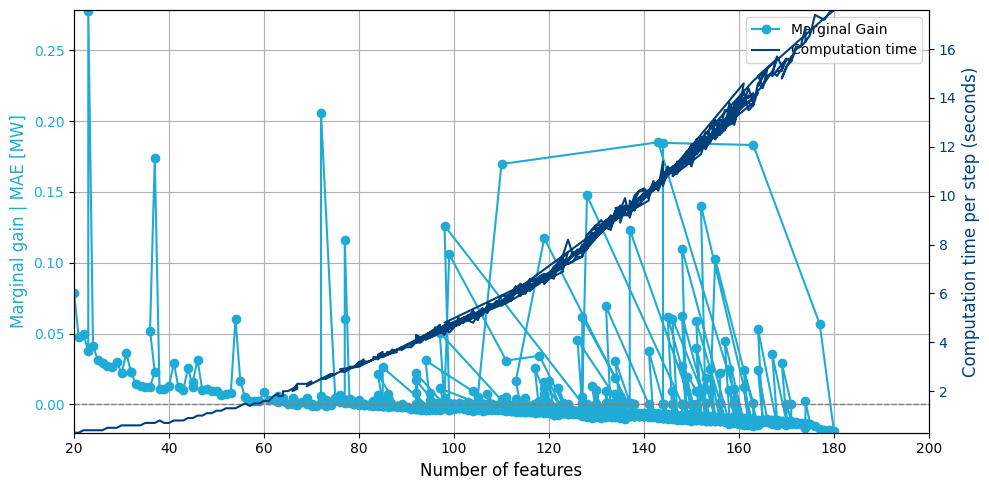

SFFS Marginal Gain vs computation time
Total elapsed time: 1h:46min:25sec


In [143]:
selection_method = "SFFS"

df_sbs = parse_sbs_log(log_text)
SFFS = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff().fillna(0)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 200

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(10, 5))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=12)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step (seconds)", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right")
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")

total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")



In [144]:
kept_features= """
DayOfWeek_cos_current_qh, DayOfWeek_sin_current_qh, GDV_from_qh_minus_1, GDV_from_qh_minus_192, GDV_min_from_minute_minus_2, GDV_min_from_minute_minus_3, GUV_min_from_minute_minus_2, GUV_min_from_minute_minus_3, IGCC+_from_qh_minus_3, IGCC+_min_from_minute_minus_2, IGCC+_min_from_minute_minus_3, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IGCC-_min_from_minute_minus_2, IGCC-_min_from_minute_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_13, IP_from_qh_minus_2, IP_from_qh_minus_4, IP_from_qh_minus_6, LOAD_DA_current_qh, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_2, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_1, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_P90_from_qh_plus_3, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, LOAD_RT_from_qh_minus_5, MDP_from_qh_minus_4, MDP_from_qh_minus_6, MDP_min_from_minute_minus_2, MIP_from_qh_minus_3, MIP_from_qh_minus_4, MIP_from_qh_minus_6, MIP_min_from_minute_minus_2, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_minus_1, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_1, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_4, NRV_min_from_minute_minus_5, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_2, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_4, SI_from_qh_minus_5, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_4, SI_min_from_minute_minus_5, SOLAR_ID_current_qh, SOLAR_ID_from_qh_minus_1, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_P90_from_qh_plus_2, SOLAR_P90_from_qh_plus_3, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_ID_from_qh_plus_3, WIND_P90_from_qh_minus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_7, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_minus_7, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_minus_38, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_from_qh_plus_1, XB_DA_IMP_UnitedKingdom_from_qh_plus_39, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_minus_2, XB_DA_NET_France_from_qh_minus_6, XB_DA_NET_France_from_qh_minus_7, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_2, XB_DA_NET_UnitedKingdom_from_qh_plus_42, XB_RT_France_from_qh_minus_3, XB_RT_France_from_qh_minus_4, XB_RT_France_from_qh_minus_5, XB_RT_Germany_from_qh_minus_11, XB_RT_UnitedKingdom_from_qh_minus_3, XB_RT_UnitedKingdom_from_qh_minus_4, XB_RT_UnitedKingdom_from_qh_minus_5, XB_RT_UnitedKingdom_from_qh_minus_6, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_192, aFRR+_from_qh_minus_2, aFRR+_from_qh_minus_3, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_7, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, aFRR-_from_qh_minus_3, aFRR-_from_qh_minus_7, aFRR-_min_from_minute_minus_3, mFRR+_from_qh_minus_3
"""

qh_params_SFFS_LR, min_params_SFFS_LR, hour_parameters_SFFS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SFFS_LR)
print( "min_parameters=", min_params_SFFS_LR)
print( "hour_parameters=", hour_parameters_SFFS_LR)

qh_parameters= {'DayOfWeek_cos': {'lags': [0]}, 'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192, -1]}, 'IGCC+': {'lags': [-3]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-13, -12, -11, -6, -4, -2]}, 'LOAD_DA': {'lags': [-3, -2, -1, 0, 1]}, 'LOAD_ID_P90': {'lags': [-1, 1, 2, 3]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'MDP': {'lags': [-6, -4]}, 'MIP': {'lags': [-6, -4, -3]}, 'NETPOS_BE_ID': {'lags': [-1, 0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-4, -3, -1]}, 'SI': {'lags': [-193, -192, -25, -21, -5, -4, -3, -2, -1, 1]}, 'SOLAR_ID': {'lags': [-1, 0, 2, 4]}, 'SOLAR_P90': {'lags': [2, 3]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_ID': {'lags': [3]}, 'WIND_P90': {'lags': [-1]}, 'WIND_RT': {'lags': [-10, -7, -2, -1]}, 'XB_DA_EXP_Germany': {'lags': [-7, 0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [-38, 0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [0, 1, 39]}, 'XB_DA_NET_France': {'lags': [-7, -6, -2, -1, 0, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2

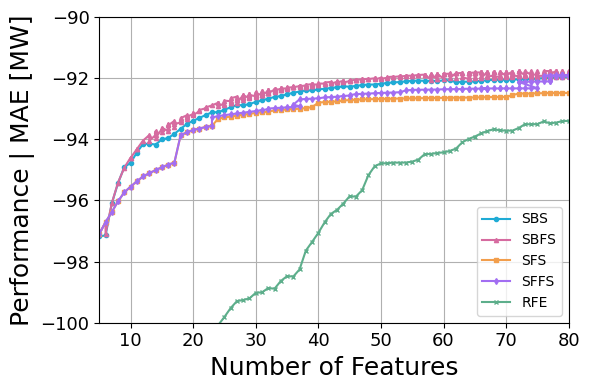

In [145]:
#%matplotlib notebook
import matplotlib.pyplot as plt
# Define zoom range
x_min, x_max = 5, 80
df_zoom = SBS[(SBS["features"] >= x_min) & (SBS["features"] <= x_max)]



# Example: Plot SBS, SBFS, and SFS on the same figure
plt.figure(figsize=(6, 4))

# Plot each method
plt.plot(SBS["features"], SBS["score"], marker='o', markersize=3, label="SBS", color=color)
plt.plot(SBFS["features"], SBFS["score"], marker='^', markersize=3, label="SBFS", color="#D66BA0")
plt.plot(SFS["features"], SFS["score"], marker='s', markersize=3, label="SFS", color="#F29E4C")
plt.plot(SFFS["features"], SFFS["score"], marker='d', markersize=3, label="SFFS", color="#A26EF2")
plt.plot(RFE["features"], -RFE["score"], marker='x', markersize=3, label="RFE", color="#5DAE8B")



plt.legend(fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# Titles and labels
plt.xlabel("Number of Features", fontsize=18)
plt.ylabel("Performance | MAE [MW]", fontsize=18)
plt.xlim(x_min, x_max)
plt.ylim(-100,-90)


plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



**PSO**

In [146]:
kept_features= """
'GEN_DA_from_qh_minus_262', 'IGCC-_from_qh_minus_3', 'IP_from_qh_minus_12', 'IP_from_qh_minus_11', 'IP_from_qh_minus_3', 'IP_from_qh_minus_2', 'LOAD_DA_from_qh_minus_1', 'LOAD_ID_P90_from_qh_minus_3', 'LOAD_ID_P90_from_qh_plus_2', 'LOAD_ID_from_qh_minus_3', 'LOAD_ID_current_qh', 'LOAD_ID_from_qh_plus_1', 'LOAD_ID_from_qh_plus_2', 'LOAD_RT_from_qh_minus_5', 'LOAD_RT_from_qh_minus_4', 'MDP_from_qh_minus_6', 'MIP_from_qh_minus_4', 'MIP_from_qh_minus_3', 'Month_cos_current_qh', 'NETPOS_BE_ID_from_qh_plus_4', 'NETPOS_BE_ID_from_qh_plus_9', 'NETPOS_BE_ID_from_qh_plus_13', 'NRV_from_qh_minus_4', 'NRV_from_qh_minus_3', 'NRV_from_qh_minus_2', 'NRV_from_qh_minus_1', 'SI_from_qh_minus_193', 'SI_from_qh_minus_25', 'SI_from_qh_minus_1', 'SOLAR_ID_current_qh', 'SOLAR_ID_from_qh_plus_2', 'SOLAR_ID_from_qh_plus_4', 'SOLAR_RT_from_qh_minus_2', 'SOLAR_RT_from_qh_minus_1', 'WIND_P90_current_qh', 'WIND_P90_from_qh_plus_1', 'WIND_RT_from_qh_minus_3', 'XB_DA_EXP_France_current_qh', 'XB_DA_EXP_Germany_current_qh', 'XB_DA_EXP_UnitedKingdom_from_qh_minus_1', 'XB_DA_EXP_UnitedKingdom_current_qh', 'XB_DA_IMP_Germany_from_qh_plus_1', 'XB_DA_IMP_UnitedKingdom_from_qh_minus_1', 'XB_DA_NET_Germany_current_qh', 'XB_RT_Germany_from_qh_minus_3', 'XB_RT_Luxembourg_from_qh_minus_3', 'aFRR+_from_qh_minus_6', 'aFRR-_from_qh_minus_3', 'GUV_min_from_minute_minus_2', 'IGCC+_min_from_minute_minus_3', 'IGCC+_min_from_minute_minus_2', 'IGCC-_min_from_minute_minus_3', 'IGCC-_min_from_minute_minus_2', 'MIP_min_from_minute_minus_2', 'SI_min_from_minute_minus_3', 'SI_min_from_minute_minus_2', 'aFRR+_min_from_minute_minus_3', 'aFRR+_min_from_minute_minus_2', 'aFRR-_min_from_minute_minus_2'

"""

qh_params_PSA_LR, min_params_PSA_LR, hour_parameters_PSA_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_PSA_LR)
print( "min_parameters=", min_params_PSA_LR)
print( "hour_parameters=", hour_parameters_PSA_LR)

qh_parameters= {'GEN_DA': {'lags': [-262]}, 'IGCC-': {'lags': [-3]}, 'IP': {'lags': [-12, -11, -3, -2]}, 'LOAD_DA': {'lags': [-1]}, 'LOAD_ID_P90': {'lags': [-3, 2]}, 'LOAD_ID': {'lags': [-3, 0, 1, 2]}, 'LOAD_RT': {'lags': [-5, -4]}, 'MDP': {'lags': [-6]}, 'MIP': {'lags': [-4, -3]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [4, 9, 13]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -25, -1, 1]}, 'SOLAR_ID': {'lags': [0, 2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-3]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [-1]}, 'XB_DA_NET_Germany': {'lags': [0]}, 'XB_RT_Germany': {'lags': [-3]}, 'XB_RT_Luxembourg': {'lags': [-3]}, 'aFRR+': {'lags': [-6]}, 'aFRR-': {'lags': [-3]}}
min_parameters= {'GUV_min': {'lags': [-2]}, 'IGCC+_min': {'lags': [-3, -2]}, 'IGCC-_min': {'lags': [-3, -2]

In [147]:
qh_parameters= {'GEN_DA': {'lags': [-262]}, 'IGCC-': {'lags': [-3]}, 'IP': {'lags': [-12, -11, -3, -2]}, 'LOAD_DA': {'lags': [-1]}, 'LOAD_ID_P90': {'lags': [-3, 2]}, 'LOAD_ID': {'lags': [-3, 0, 1, 2]}, 'LOAD_RT': {'lags': [-5, -4]}, 'MDP': {'lags': [-6]}, 'MIP': {'lags': [-4, -3]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [4, 9, 13]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -25, -1, 1]}, 'SOLAR_ID': {'lags': [0, 2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-3]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [-1]}, 'XB_DA_NET_Germany': {'lags': [0]}, 'XB_RT_Germany': {'lags': [-3]}, 'XB_RT_Luxembourg': {'lags': [-3]}, 'aFRR+': {'lags': [-6]}, 'aFRR-': {'lags': [-3]}}
min_parameters= {'GUV_min': {'lags': [-2]}, 'IGCC+_min': {'lags': [-3, -2]}, 'IGCC-_min': {'lags': [-3, -2]}, 'MIP_min': {'lags': [-2]}, 'SI_min': {'lags': [-3, -2]}, 'aFRR+_min': {'lags': [-3, -2]}, 'aFRR-_min': {'lags': [-2]}}
hour_parameters= {}


total, per_feature = count_lagged_features(qh_parameters, minute_parameters, hour_parameters)

# Print results
print(f"🔢 Total lagged features: {total}\n")

🔢 Total lagged features: 59



**Lasso**

In [148]:
kept_features= """
WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, LOAD_DA_from_qh_minus_1, LOAD_RT_from_qh_minus_3, LOAD_DA_from_qh_minus_3, XB_DA_NET_France_from_qh_plus_1, XB_DA_EXP_France_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_9, SI_min_from_minute_minus_2, LOAD_RT_from_qh_minus_5, XB_DA_NET_France_current_qh, NETPOS_BE_ID_from_qh_plus_1, WIND_ID_from_qh_minus_1, XB_DA_IMP_France_from_qh_plus_1, WIND_ID_from_qh_minus_2, XB_DA_EXP_France_current_qh, XB_DA_NET_Netherlands_from_qh_plus_1, XB_DA_NET_UnitedKingdom_current_qh, WIND_P90_from_qh_plus_4, WIND_RT_from_qh_minus_7, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_RT_Germany_from_qh_minus_4, SI_min_from_minute_minus_3, LOAD_RT_from_qh_minus_4, LOAD_ID_from_qh_plus_2, XB_DA_IMP_France_current_qh, LOAD_ID_P90_from_qh_minus_2, NETPOS_BE_ID_current_qh, LOAD_ID_from_qh_minus_3, NETPOS_BE_ID_from_qh_plus_4, XB_DA_NET_UnitedKingdom_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, LOAD_DA_from_qh_plus_3, XB_DA_NET_Germany_from_qh_plus_1, XB_DA_IMP_Germany_from_qh_plus_1, XB_DA_NET_Netherlands_current_qh, XB_RT_Germany_from_qh_minus_3, SOLAR_ID_from_qh_plus_2, XB_RT_UnitedKingdom_from_qh_minus_3, XB_RT_Netherlands_from_qh_minus_3, XB_DA_IMP_Germany_current_qh, XB_DA_IMP_Netherlands_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, SI_from_qh_minus_3, XB_DA_IMP_Netherlands_from_qh_plus_1, XB_RT_Germany_from_qh_minus_5, XB_DA_EXP_Netherlands_from_qh_minus_1, XB_DA_EXP_France_from_qh_minus_7, WIND_RT_from_qh_minus_11, SOLAR_ID_from_qh_plus_4, XB_RT_Netherlands_from_qh_minus_33, XB_RT_UnitedKingdom_from_qh_minus_4, SOLAR_ID_current_qh, XB_DA_NET_France_from_qh_minus_7, XB_RT_Netherlands_from_qh_minus_5, XB_RT_Luxembourg_from_qh_minus_3, XB_DA_EXP_Netherlands_from_qh_minus_2, XB_DA_NET_Germany_current_qh, WIND_ID_from_qh_minus_14, Hour_sin_current_qh, XB_DA_IMP_France_from_qh_minus_2, XB_DA_EXP_France_from_qh_minus_6, WIND_P90_from_qh_minus_1, XB_RT_UnitedKingdom_from_qh_minus_5, XB_DA_NET_UnitedKingdom_from_qh_minus_2, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_from_qh_plus_1, IGCC-_from_qh_minus_3, XB_DA_EXP_Germany_from_qh_minus_7, XB_DA_IMP_France_from_qh_minus_7, XB_RT_Luxembourg_from_qh_minus_4, IGCC+_from_qh_minus_3, XB_DA_EXP_UnitedKingdom_from_qh_plus_1, XB_DA_NET_Germany_from_qh_minus_6, XB_DA_IMP_France_from_qh_minus_6, XB_DA_IMP_Germany_from_qh_minus_2, XB_DA_IMP_Netherlands_from_qh_minus_2, XB_DA_EXP_Germany_from_qh_minus_1, XB_DA_NET_Netherlands_from_qh_minus_1, GDV_from_qh_minus_1, IGCC-_from_qh_minus_1, aFRR+_from_qh_minus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_1, IP_from_qh_minus_2, MIP_min_from_minute_minus_2, XB_DA_NET_Germany_from_qh_minus_1, NRV_from_qh_minus_4, WIND_RT_from_qh_minus_5, SI_from_qh_minus_5, GDV_min_from_minute_minus_2, XB_DA_IMP_UnitedKingdom_from_qh_minus_2, SI_from_qh_minus_1, XB_DA_IMP_France_from_qh_minus_14, SI_from_qh_minus_4, XB_RT_Germany_from_qh_minus_11, NETPOS_BE_ID_from_qh_minus_1, MDP_min_from_minute_minus_2, NRV_from_qh_minus_2, aFRR+_from_qh_minus_6, aFRR-_min_from_minute_minus_3, XB_RT_Luxembourg_from_qh_minus_14, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_EXP_Germany_from_qh_minus_6, NRV_min_from_minute_minus_2, SI_from_qh_minus_21, SI_min_from_minute_minus_46, IGCC-_min_from_minute_minus_2, XB_DA_NET_Germany_from_qh_minus_10, IGCC-_min_from_minute_minus_3, aFRR+_from_qh_minus_3, XB_RT_UnitedKingdom_from_qh_minus_6, GUV_from_qh_minus_3, SI_from_qh_minus_92, XB_RT_Luxembourg_from_qh_minus_5, MDP_from_qh_minus_6, NRV_from_qh_minus_1, mFRR+_from_qh_minus_2, SOLAR_P90_from_qh_minus_30, SI_min_from_minute_minus_31, SI_from_qh_minus_25, aFRR+_from_qh_minus_7, GEN_DA_from_qh_minus_262, XB_DA_EXP_Germany_current_qh, IP_from_qh_minus_7, DayOfWeek_sin_current_qh, XB_DA_IMP_Germany_from_qh_minus_1, XB_DA_IMP_Netherlands_from_qh_minus_1, aFRR-_from_qh_minus_1, MDP_from_qh_minus_3, IGCC-_from_qh_minus_2, IP_from_qh_minus_92, IP_min_from_minute_minus_2, NETPOS_GB_ID_current_hour, XB_DA_IMP_UnitedKingdom_from_qh_plus_39, MDP_from_qh_minus_4, NETPOS_BE_ID_from_qh_plus_13, aFRR+_min_from_minute_minus_3, XB_DA_EXP_UnitedKingdom_from_qh_plus_54, NETPOS_GB_DA_from_hour_plus_1, WIND_ID_from_qh_plus_11, SI_from_qh_minus_96, MIP_from_qh_minus_2, GDV_from_qh_minus_2, XB_DA_IMP_Germany_from_qh_minus_6, IP_from_qh_minus_11, aFRR-_from_qh_minus_6, IP_min_from_minute_minus_3, MIP_from_qh_minus_96, XB_DA_NET_France_from_qh_minus_6, mFRR+_from_qh_minus_3, GDV_from_qh_minus_192, GEN_DA_from_qh_minus_4, aFRR+_from_qh_minus_8
"""

qh_parameters_LASSO_LR, min_parameters_LASSO_LR, hour_parameters_LASSO_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_LASSO_LR)
print( "min_parameters=", min_parameters_LASSO_LR)
print( "hour_parameters=", hour_parameters_LASSO_LR)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_LASSO_LR, min_parameters_LASSO_LR, hour_parameters_LASSO_LR)

# Print results
print(f"🔢 Total lagged features: {total}\n")


qh_parameters= {'WIND_RT': {'lags': [-11, -7, -5, -2, -1]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'LOAD_DA': {'lags': [-3, -1, 3]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'XB_DA_NET_France': {'lags': [-7, -6, 0, 1]}, 'XB_DA_EXP_France': {'lags': [-7, -6, 0, 1]}, 'NETPOS_BE_ID': {'lags': [-1, 0, 1, 4, 9, 13]}, 'WIND_ID': {'lags': [-14, -2, -1, 11]}, 'XB_DA_IMP_France': {'lags': [-14, -7, -6, -2, 0, 1]}, 'XB_DA_NET_Netherlands': {'lags': [-1, 0, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2, -1, 0, 1]}, 'WIND_P90': {'lags': [-1, 4]}, 'XB_DA_EXP_Netherlands': {'lags': [-2, -1, 0, 1]}, 'XB_RT_Germany': {'lags': [-11, -5, -4, -3]}, 'LOAD_ID': {'lags': [-3, 2]}, 'LOAD_ID_P90': {'lags': [-2]}, 'XB_DA_NET_Germany': {'lags': [-10, -6, -1, 0, 1]}, 'XB_DA_IMP_Germany': {'lags': [-6, -2, -1, 0, 1]}, 'SOLAR_ID': {'lags': [0, 2, 4]}, 'XB_RT_UnitedKingdom': {'lags': [-6, -5, -4, -3]}, 'XB_RT_Netherlands': {'lags': [-33, -5, -3]}, 'XB_DA_IMP_Netherlands': {'lags': [-2, -1, 0, 1]}, 'XB_DA_EXP_Germany': {'lags': [

**random forest**

In [149]:
kept_features = """
'SI_from_qh_minus_1', 'SI_min_from_minute_minus_2', 'NETPOS_BE_ID_from_qh_plus_9', 'SI_from_qh_minus_3', 'NRV_min_from_minute_minus_2', 'NETPOS_BE_ID_from_qh_plus_4', 'NETPOS_BE_ID_from_qh_plus_8', 'aFRR-_from_qh_minus_3', 'NETPOS_BE_ID_from_qh_plus_1', 'NETPOS_BE_ID_from_qh_plus_13', 'IP_from_qh_minus_3', 'SI_min_from_minute_minus_3', 'NRV_from_qh_minus_2', 'SI_min_from_minute_minus_4', 'IP_min_from_minute_minus_2', 'IP_from_qh_minus_11', 'SI_from_qh_minus_25', 'NRV_from_qh_minus_3', 'SI_from_qh_minus_21', 'SI_min_from_minute_minus_46', 'IP_from_qh_minus_12', 'SI_from_qh_minus_5', 'WIND_ID_from_qh_plus_2', 'NRV_min_from_minute_minus_3', 'XB_RT_Germany_from_qh_minus_11', 'SI_min_from_minute_minus_31', 'aFRR-_from_qh_minus_8', 'aFRR+_from_qh_minus_8', 'NRV_from_qh_minus_4', 'aFRR-_from_qh_minus_96', 'IP_from_qh_minus_13', 'IP_from_qh_minus_2', 'SI_from_qh_minus_193', 'SI_min_from_minute_minus_16', 'NETPOS_BE_ID_current_qh', 'NETPOS_BE_ID_from_qh_minus_1', 'IGCC-_from_qh_minus_3', 'IGCC-_from_qh_minus_2', 'MDP_from_qh_minus_4', 'IP_from_qh_minus_4', 'XB_DA_NET_UnitedKingdom_from_qh_plus_42', 'XB_DA_EXP_Netherlands_from_qh_minus_38', 'WIND_P90_from_qh_minus_1', 'SI_min_from_minute_minus_61', 'WIND_RT_from_qh_minus_10', 'IGCC+_from_qh_minus_2', 'XB_RT_UnitedKingdom_from_qh_minus_6', 'IGCC-_min_from_minute_minus_2', 'GDV_from_qh_minus_1', 'MDP_from_qh_minus_3', 'SOLAR_ID_from_qh_plus_4', 'MDP_from_qh_minus_6', 'NRV_from_qh_minus_1', 'IP_min_from_minute_minus_4', 'aFRR-_from_qh_minus_7', 'GUV_from_qh_minus_1', 'LOAD_DA_from_qh_plus_3', 'MIP_from_qh_minus_4', 'MIP_from_qh_minus_3', 'GDV_from_qh_minus_192', 'Hour_cos_current_qh', 'MIP_from_qh_minus_1', 'GDV_min_from_minute_minus_2', 'SI_from_qh_minus_192', 'aFRR+_from_qh_minus_192', 'GUV_min_from_minute_minus_2', 'XB_DA_NET_France_from_qh_minus_1', 'XB_RT_UnitedKingdom_from_qh_minus_3', 'IGCC+_min_from_minute_minus_2', 'aFRR+_from_qh_minus_6', 'IGCC-_from_qh_minus_1', 'LOAD_ID_P90_from_qh_plus_3', 'XB_DA_NET_UnitedKingdom_from_qh_minus_2', 'LOAD_ID_P90_from_qh_plus_2', 'XB_DA_NET_France_from_qh_plus_1', 'XB_DA_NET_France_current_qh', 'NRV_min_from_minute_minus_4', 'MDP_from_qh_minus_1', 'GDV_min_from_minute_minus_3', 'WIND_RT_from_qh_minus_1', 'SOLAR_RT_from_qh_minus_2', 'SI_min_from_minute_minus_5', 'aFRR+_from_qh_minus_1', 'aFRR-_min_from_minute_minus_2', 'XB_DA_EXP_Netherlands_from_qh_minus_45', 'MIP_min_from_minute_minus_3', 'MIP_min_from_minute_minus_2', 'IP_min_from_minute_minus_3', 'aFRR+_min_from_minute_minus_2', 'NRV_min_from_minute_minus_5', 'WIND_RT_from_qh_minus_6', 'LOAD_RT_from_qh_minus_5', 'WIND_RT_from_qh_minus_2', 'SOLAR_ID_from_qh_plus_2', 'SOLAR_RT_from_qh_minus_1', 'LOAD_ID_P90_from_qh_plus_1'
"""
qh_parameters_RF_LR, min_parameters_RF_LR, hour_parameters_RF_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_RF_LR)
print( "min_parameters=", min_parameters_RF_LR)
print( "hour_parameters=", hour_parameters_RF_LR)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_RF_LR, min_parameters_RF_LR, hour_parameters_RF_LR)

# Print results
print(f"🔢 Total lagged features: {total}\n")


qh_parameters= {'SI': {'lags': [-193, -192, -25, -21, -5, -3, -1, 1]}, 'NETPOS_BE_ID': {'lags': [-1, 0, 1, 4, 8, 9, 13]}, 'aFRR-': {'lags': [-96, -8, -7, -3]}, 'IP': {'lags': [-13, -12, -11, -4, -3, -2]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'WIND_ID': {'lags': [2]}, 'XB_RT_Germany': {'lags': [-11]}, 'aFRR+': {'lags': [-192, -8, -6, -1]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'MDP': {'lags': [-6, -4, -3, -1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2, 42]}, 'XB_DA_EXP_Netherlands': {'lags': [-45, -38]}, 'WIND_P90': {'lags': [-1]}, 'WIND_RT': {'lags': [-10, -6, -2, -1]}, 'IGCC+': {'lags': [-2]}, 'XB_RT_UnitedKingdom': {'lags': [-6, -3]}, 'GDV': {'lags': [-192, -1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'GUV': {'lags': [-1]}, 'LOAD_DA': {'lags': [3]}, 'MIP': {'lags': [-4, -3, -1]}, 'Hour_cos': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [-1, 0, 1]}, 'LOAD_ID_P90': {'lags': [1, 2, 3]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'LOAD_RT': {'lags': [-5]}}
min_parameters= {'SI_min': {'lags': [-61, -46, -31, -16, -5,

GA_LR

In [150]:
kept_features = """
'SI_from_qh_minus_93', 'SI_from_qh_minus_92', 'SI_from_qh_minus_25', 'SI_from_qh_minus_21', 'SI_from_qh_minus_4', 'SI_from_qh_minus_3', 'SI_from_qh_minus_2', 'SI_from_qh_minus_1', 'LOAD_ID_from_qh_minus_3', 'LOAD_ID_from_qh_plus_2', 'LOAD_ID_P90_from_qh_minus_2', 'LOAD_DA_from_qh_minus_3', 'LOAD_DA_current_qh', 'LOAD_DA_from_qh_plus_3', 'NRV_from_qh_minus_2', 'NETPOS_BE_ID_from_qh_minus_1', 'NETPOS_BE_ID_from_qh_plus_4', 'NETPOS_BE_ID_from_qh_plus_8', 'NETPOS_BE_ID_from_qh_plus_9', 'NETPOS_BE_ID_from_qh_plus_13', 'NETPOS_BE_ID_from_qh_plus_22', 'IP_from_qh_minus_13', 'IP_from_qh_minus_11', 'IP_from_qh_minus_9', 'IP_from_qh_minus_7', 'IP_from_qh_minus_4', 'MIP_from_qh_minus_96', 'MDP_from_qh_minus_4', 'Hour_sin_current_qh', 'DayOfWeek_sin_current_qh', 'DayOfWeek_cos_current_qh', 'WIND_ID_from_qh_plus_11', 'WIND_P90_from_qh_minus_1', 'WIND_P90_from_qh_plus_4', 'WIND_RT_from_qh_minus_11', 'SOLAR_ID_current_qh', 'SOLAR_ID_from_qh_plus_2', 'SOLAR_ID_from_qh_plus_4', 'SOLAR_RT_from_qh_minus_2', 'SOLAR_RT_from_qh_minus_1', 'GDV_from_qh_minus_7', 'GDV_from_qh_minus_1', 'aFRR+_from_qh_minus_8', 'aFRR+_from_qh_minus_6', 'aFRR+_from_qh_minus_3', 'aFRR+_from_qh_minus_1', 'mFRR+_from_qh_minus_3', 'mFRR+_from_qh_minus_2', 'mFRR+_from_qh_minus_1', 'IGCC-_from_qh_minus_3', 'IGCC-_from_qh_minus_2', 'IGCC-_from_qh_minus_1', 'aFRR-_from_qh_minus_192', 'aFRR-_from_qh_minus_7', 'aFRR-_from_qh_minus_6', 'aFRR-_from_qh_minus_3', 'aFRR-_from_qh_minus_1', 'XB_DA_EXP_France_from_qh_minus_7', 'XB_DA_EXP_France_from_qh_minus_6', 'XB_DA_EXP_France_from_qh_minus_1', 'XB_DA_EXP_France_current_qh', 'XB_DA_EXP_France_from_qh_plus_1', 'XB_DA_EXP_Germany_from_qh_minus_1', 'XB_DA_EXP_Germany_current_qh', 'XB_DA_EXP_Germany_from_qh_plus_1', 'XB_DA_EXP_Netherlands_from_qh_minus_45', 'XB_DA_EXP_Netherlands_from_qh_minus_38', 'XB_DA_EXP_Netherlands_from_qh_minus_1', 'XB_DA_EXP_UnitedKingdom_current_qh', 'XB_DA_IMP_France_from_qh_minus_7', 'XB_DA_IMP_France_from_qh_minus_6', 'XB_DA_IMP_France_current_qh', 'XB_DA_IMP_Germany_from_qh_minus_10', 'XB_DA_IMP_Germany_from_qh_minus_6', 'XB_DA_IMP_Germany_from_qh_minus_2', 'XB_DA_IMP_Germany_current_qh', 'XB_DA_IMP_Netherlands_from_qh_minus_2', 'XB_DA_IMP_Netherlands_from_qh_minus_1', 'XB_DA_IMP_Netherlands_from_qh_plus_1', 'XB_DA_IMP_Netherlands_from_qh_plus_62', 'XB_DA_IMP_UnitedKingdom_from_qh_minus_2', 'XB_DA_IMP_UnitedKingdom_current_qh', 'XB_DA_IMP_UnitedKingdom_from_qh_plus_39', 'XB_DA_NET_France_from_qh_minus_7', 'XB_DA_NET_France_from_qh_minus_6', 'XB_DA_NET_France_from_qh_minus_1', 'XB_DA_NET_France_from_qh_plus_1', 'XB_DA_NET_Germany_from_qh_plus_1', 'XB_DA_NET_Netherlands_from_qh_minus_1', 'XB_DA_NET_UnitedKingdom_from_qh_minus_2', 'XB_RT_from_qh_minus_10', 'XB_RT_Germany_from_qh_minus_11', 'XB_RT_Luxembourg_from_qh_minus_5', 'XB_RT_Luxembourg_from_qh_minus_3', 'XB_RT_Netherlands_from_qh_minus_33', 'XB_RT_UnitedKingdom_from_qh_minus_6', 'XB_RT_UnitedKingdom_from_qh_minus_4', 'SI_min_from_minute_minus_61', 'SI_min_from_minute_minus_31', 'SI_min_from_minute_minus_3', 'SI_min_from_minute_minus_2', 'NRV_min_from_minute_minus_2', 'IP_min_from_minute_minus_2', 'MDP_min_from_minute_minus_2', 'GUV_min_from_minute_minus_3', 'IGCC+_min_from_minute_minus_2', 'aFRR+_min_from_minute_minus_2', 'IGCC-_min_from_minute_minus_2', 'NETPOS_GB_ID_from_minute_plus_1'
"""
qh_parameters_GA_LR, min_parameters_GA_LR, hour_parameters_GA_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_GA_LR)
print( "min_parameters=", min_parameters_GA_LR)
print( "hour_parameters=", hour_parameters_GA_LR)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_GA_LR, min_parameters_GA_LR, hour_parameters_GA_LR)

# Print results
print(f"🔢 Total lagged features: {total}\n")

qh_parameters= {'SI': {'lags': [-93, -92, -25, -21, -4, -3, -2, -1, 1]}, 'LOAD_ID': {'lags': [-3, 2]}, 'LOAD_ID_P90': {'lags': [-2]}, 'LOAD_DA': {'lags': [-3, 0, 3]}, 'NRV': {'lags': [-2]}, 'NETPOS_BE_ID': {'lags': [-1, 4, 8, 9, 13, 22]}, 'IP': {'lags': [-13, -11, -9, -7, -4]}, 'MIP': {'lags': [-96]}, 'MDP': {'lags': [-4]}, 'Hour_sin': {'lags': [0]}, 'DayOfWeek_sin': {'lags': [0]}, 'DayOfWeek_cos': {'lags': [0]}, 'WIND_ID': {'lags': [11]}, 'WIND_P90': {'lags': [-1, 4]}, 'WIND_RT': {'lags': [-11]}, 'SOLAR_ID': {'lags': [0, 2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'GDV': {'lags': [-7, -1]}, 'aFRR+': {'lags': [-8, -6, -3, -1]}, 'mFRR+': {'lags': [-3, -2, -1]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'aFRR-': {'lags': [-192, -7, -6, -3, -1]}, 'XB_DA_EXP_France': {'lags': [-7, -6, -1, 0, 1]}, 'XB_DA_EXP_Germany': {'lags': [-1, 0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [-45, -38, -1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_IMP_France': {'lags': [-7, -6, 0]}, 'XB_DA_IMP_Germany': {'lags': 

In [151]:
def get_selected_features(selection_result):
    """Extracts the selected feature names from the selection result dict or set."""
    if isinstance(selection_result, dict):
        return set(selection_result.keys())
    elif isinstance(selection_result, set):
        return selection_result
    else:
        raise TypeError("Unsupported type for selection_result. Expected dict or set.")


def compute_jaccard_similarity(set1, set2):
    """Computes Jaccard similarity between two sets."""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

def compare_feature_sets(feature_sets: dict, title="Jaccard Similarity Between Feature Sets"):
    """Compares selected feature sets using Jaccard similarity."""
    names = list(feature_sets.keys())
    similarities = []

    for name1, name2 in itertools.product(names, repeat=2):
        set1 = get_selected_features(feature_sets[name1])
        set2 = get_selected_features(feature_sets[name2])
        similarity = compute_jaccard_similarity(set1, set2)
        similarities.append((name1, name2, similarity))

    # Convert to similarity matrix
    df = pd.DataFrame(similarities, columns=["FeatureSet1", "FeatureSet2", "Similarity"])
    pivot = df.pivot(index="FeatureSet1", columns="FeatureSet2", values="Similarity")

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return pivot  # Return similarity matrix if needed
def combine_features_per_method(selection_results):
    """Combines selected features across QH, MIN, and HOUR for each method."""
    combined = {}
    for method, resolutions in selection_results.items():
        all_features = set()
        for res in resolutions.values():
            all_features.update(get_selected_features(res))
        combined[method] = all_features
    return combined
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compute_jaccard(a, b):
    return len(a & b) / len(a | b) if (a | b) else 1.0

def compute_overlap(a, b):
    return len(a & b) / min(len(a), len(b)) if min(len(a), len(b)) else 1.0

def compare_feature_sets(feature_sets, title="Feature Set Similarity", metric="jaccard"):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    methods = list(feature_sets.keys())
    similarity_matrix = pd.DataFrame(index=methods, columns=methods, dtype=float)

    for i in methods:
        for j in methods:
            set_i = set(feature_sets[i])
            set_j = set(feature_sets[j])
            if metric == "jaccard":
                similarity = compute_jaccard(set_i, set_j)
            elif metric == "overlap":
                similarity = compute_overlap(set_i, set_j)
            else:
                raise ValueError("Unsupported metric. Choose 'jaccard' or 'overlap'.")
            similarity_matrix.loc[i, j] = similarity

    # Set font scale globally
    sns.set_context("notebook", font_scale=1.3)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(similarity_matrix.astype(float), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, linecolor="white")

    # Adjust tick label fonts
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

    # Add axis labels and title with larger font

    plt.tight_layout()
    plt.show()

    return similarity_matrix




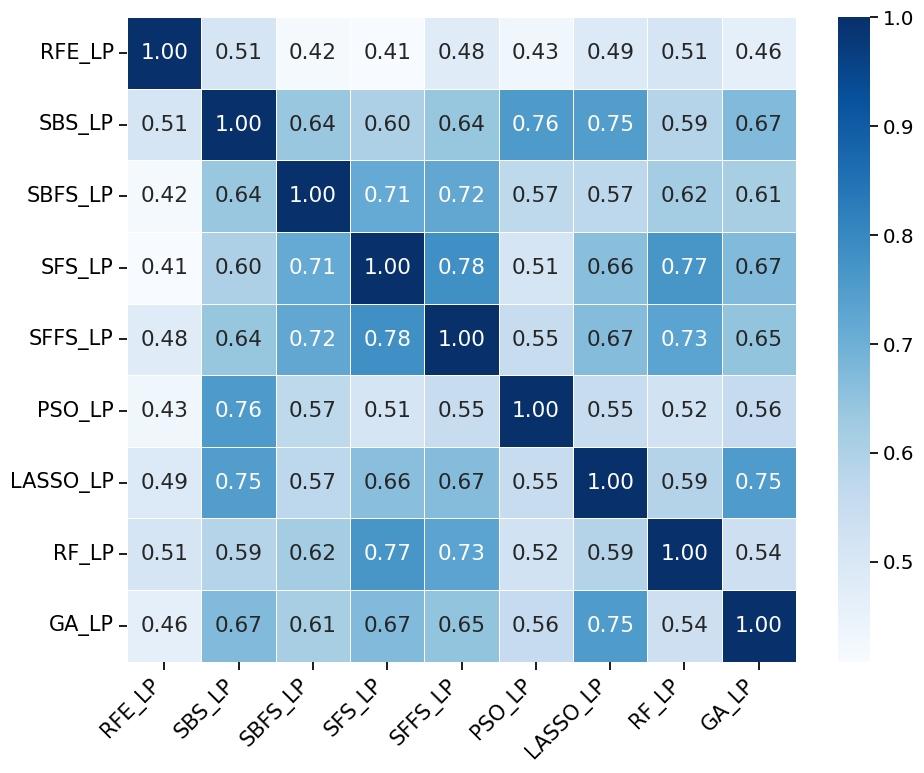

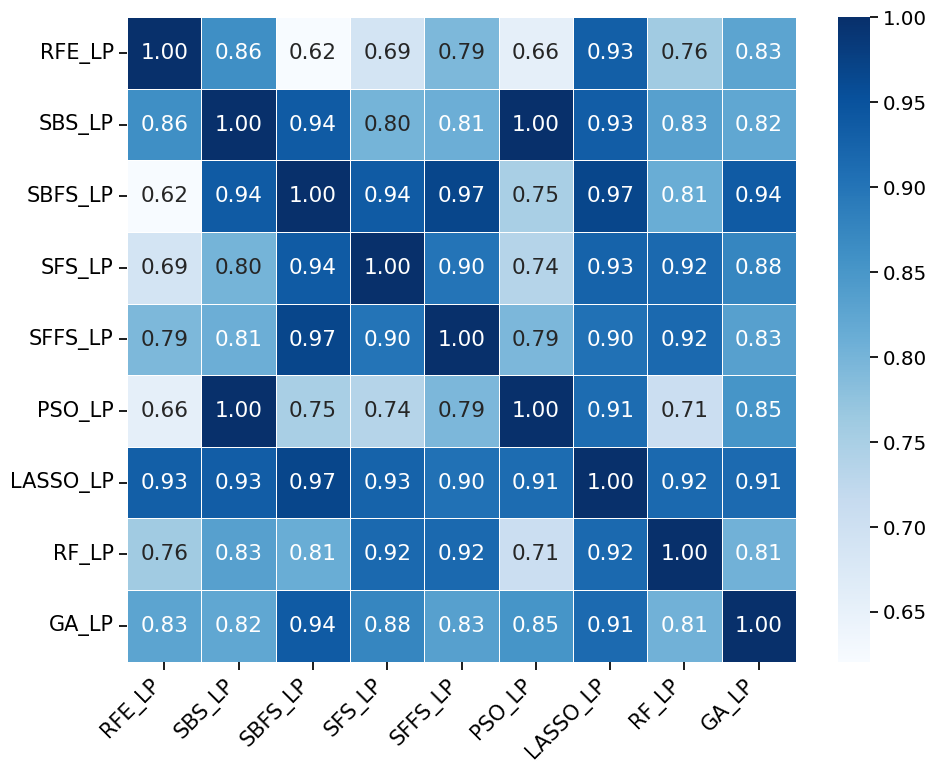

RFE_LP    SBS_LP  SBFS_LP    SFS_LP   SFFS_LP    PSO_LP  LASSO_LP  \
RFE_LP    1.000000  0.862069  0.62069  0.689655  0.793103  0.655172  0.931034   
SBS_LP    0.862069  1.000000  0.93750  0.800000  0.809524  1.000000  0.933333   
SBFS_LP   0.620690  0.937500  1.00000  0.937500  0.968750  0.750000  0.968750   
SFS_LP    0.689655  0.800000  0.93750  1.000000  0.900000  0.735294  0.925000   
SFFS_LP   0.793103  0.809524  0.96875  0.900000  1.000000  0.794118  0.904762   
PSO_LP    0.655172  1.000000  0.75000  0.735294  0.794118  1.000000  0.911765   
LASSO_LP  0.931034  0.933333  0.96875  0.925000  0.904762  0.911765  1.000000   
RF_LP     0.758621  0.833333  0.81250  0.916667  0.916667  0.705882  0.916667   
GA_LP     0.827586  0.822222  0.93750  0.875000  0.833333  0.852941  0.914894   

             RF_LP     GA_LP  
RFE_LP    0.758621  0.827586  
SBS_LP    0.833333  0.822222  
SBFS_LP   0.812500  0.937500  
SFS_LP    0.916667  0.875000  
SFFS_LP   0.916667  0.833333  
PSO_LP    0.705882  0.852941  
LASSO_LP  0.916667  0.914894  
RF_LP     1.000000  0.805556  
GA_LP     0.805556  1.000000

In [152]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
selection_results = {
    "RFE_LP": {"RFE_QH": qh_params_RFE_LR,
               "RFE_MIN": min_params_RFE_LR,
               "RFE_HOUR": hour_parameters_RFE_LR},
    "SBS_LP": {
        "SBS_QH": qh_params_SBS_LR,
        "SBS_MIN": min_params_SBS_LR,
        "SBS_HOUR": hour_parameters_SBS_LR},
    "SBFS_LP":{
        "SBFS_QH": qh_params_SBFS_LR,
        "SBFS_MIN": min_params_SBFS_LR,
        "SBFS_HOUR": hour_parameters_SBFS_LR},
    "SFS_LP": {
        "SFS_QH": qh_params_SFS_LR,
        "SFS_MIN": min_params_SFS_LR,
        "SFS_HOUR": hour_parameters_SFS_LR },
    "SFFS_LP": {
        "SFFS_QH": qh_params_SFFS_LR,
        "SFFS_MIN": min_params_SFFS_LR,
        "SFFS_HOUR": hour_parameters_SFFS_LR},
    "PSO_LP": {
        "PSO_QH": qh_params_PSA_LR,
        "PSO_MIN": min_params_PSA_LR,
        "PSO_HOUR": hour_parameters_PSA_LR    },
    "LASSO_LP": {
        "LASSO_QH": qh_parameters_LASSO_LR,
        "LASSO_MIN": min_parameters_LASSO_LR,
        "LASSO_HOUR": hour_parameters_LASSO_LR},
    "RF_LP": {
        "RF_QH": qh_parameters_RF_LR,
        "RF_MIN": min_parameters_RF_LR,
        "RF_HOUR": hour_parameters_RF_LR},
    "GA_LP": {
        "GA_QH": qh_parameters_GA_LR,
        "GA_MIN": min_parameters_GA_LR,
        "GA_HOUR": hour_parameters_GA_LR}
    }

# selection_results = {
#     "SBS": {
#         "QH": qh_params_SBS_LR,     # type: dict[str, any]
#         "MIN": min_params_SBS_LR,   # e.g., {'feature1': ..., 'feature3': ...}
#         "HOUR": hour_parameters_SBS_LR
#     },
#     "SBFS": {
#         "QH": qh_params_SBFS_LR,
#         "MIN": min_params_SBFS_LR,
#         "HOUR": hour_parameters_SBFS_LR
#     },


combined_feature_sets = combine_features_per_method(selection_results)
compare_feature_sets(combined_feature_sets, title="Jaccard Similarity Between Methods (Combined Features)")
compare_feature_sets(combined_feature_sets, title="Feature Overlap", metric="overlap")


In [153]:
from collections import defaultdict, Counter

from collections import defaultdict

def extract_lags_by_feature(selection_results):
    """Returns a dict mapping each feature to a list of (lag, method, resolution) entries."""
    feature_lags = defaultdict(list)

    for method, resolution_dict in selection_results.items():
        for resolution, feature_dict in resolution_dict.items():
            if isinstance(feature_dict, dict):
                for feature, details in feature_dict.items():
                    for lag in details.get("lags", []):
                        feature_lags[feature].append((lag, method, resolution))
    return feature_lags

def print_lags_per_feature(feature_lags, top_n=10):
    sorted_features = sorted(feature_lags.items(), key=lambda x: -len(x[1]))[:top_n]
    print(f"\nTop {top_n} features by number of lag selections:\n")
    for feature, entries in sorted_features:
        print(f"Feature '{feature}' ({len(entries)} lags):")
        for lag, method, resolution in sorted(entries):
            print(f"  - Lag {lag} from {method} | {resolution}")
        print()
feature_lags = extract_lags_by_feature(selection_results)
print_lags_per_feature(feature_lags, top_n=10)



Top 10 features by number of lag selections:

Feature 'SI' (68 lags):
  - Lag -193 from PSO_LP | PSO_QH
  - Lag -193 from RF_LP | RF_QH
  - Lag -193 from SBS_LP | SBS_QH
  - Lag -193 from SFFS_LP | SFFS_QH
  - Lag -193 from SFS_LP | SFS_QH
  - Lag -192 from RF_LP | RF_QH
  - Lag -192 from SBS_LP | SBS_QH
  - Lag -192 from SFFS_LP | SFFS_QH
  - Lag -192 from SFS_LP | SFS_QH
  - Lag -97 from SBFS_LP | SBFS_QH
  - Lag -97 from SBS_LP | SBS_QH
  - Lag -96 from LASSO_LP | LASSO_QH
  - Lag -96 from SBFS_LP | SBFS_QH
  - Lag -96 from SBS_LP | SBS_QH
  - Lag -93 from GA_LP | GA_QH
  - Lag -92 from GA_LP | GA_QH
  - Lag -92 from LASSO_LP | LASSO_QH
  - Lag -25 from GA_LP | GA_QH
  - Lag -25 from LASSO_LP | LASSO_QH
  - Lag -25 from PSO_LP | PSO_QH
  - Lag -25 from RF_LP | RF_QH
  - Lag -25 from SBFS_LP | SBFS_QH
  - Lag -25 from SBS_LP | SBS_QH
  - Lag -25 from SFFS_LP | SFFS_QH
  - Lag -25 from SFS_LP | SFS_QH
  - Lag -21 from GA_LP | GA_QH
  - Lag -21 from LASSO_LP | LASSO_QH
  - Lag -21 fro

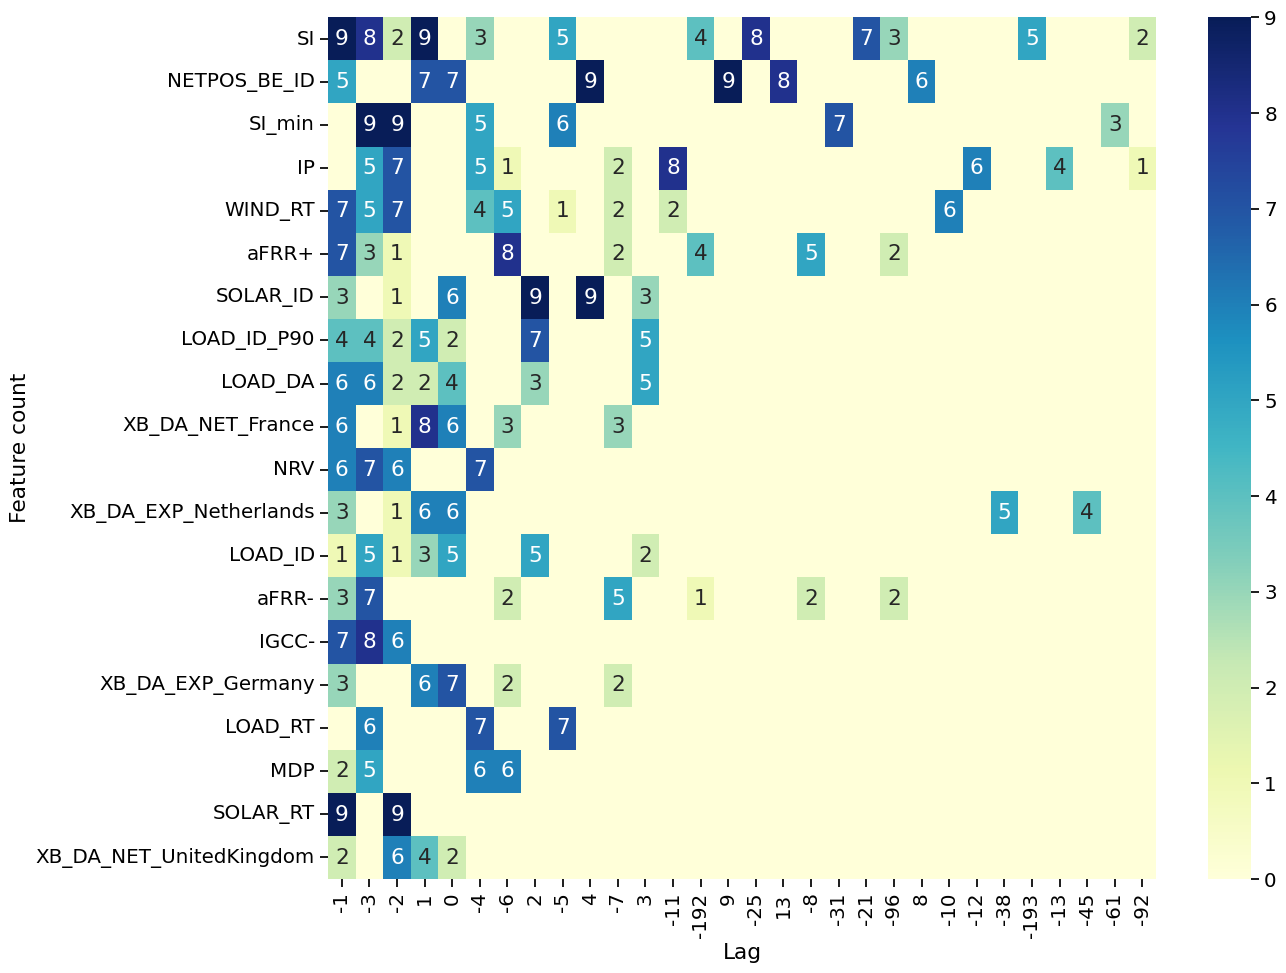

In [154]:
import pandas as pd
from collections import defaultdict, Counter
color = "#1FABD5"

def build_feature_lag_matrix(feature_lags):
    """Builds a DataFrame with features as rows and lags as columns (counts)."""
    matrix = defaultdict(Counter)

    for feature, entries in feature_lags.items():
        for lag, _, _ in entries:
            matrix[feature][lag] += 1

    df = pd.DataFrame(matrix).fillna(0).astype(int).T
    return df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_annot(data):
    """Convert DataFrame to string array for annotation; hide zeros."""
    return np.where(data == 0, "", data.astype(str))



def plot_full_feature_lag_heatmap(feature_lags, top_n_features=None, max_lag_columns=None):
    """Plots a heatmap of features (rows) vs lags (columns) with counts as values."""
    df = build_feature_lag_matrix(feature_lags)

    # Optionally limit to most-used features
    if top_n_features is not None:
        df["total"] = df.sum(axis=1)
        df = df.sort_values("total", ascending=False).drop(columns="total").head(top_n_features)

    # Optionally limit to most frequent lags
    if max_lag_columns is not None:
        lag_totals = df.sum(axis=0).sort_values(ascending=False)
        df = df[lag_totals.head(max_lag_columns).index]

    plt.figure(figsize=(14, 0.5 * len(df)))
    sns.heatmap(df, cmap="YlGnBu", fmt="", cbar=True, annot=custom_annot(df.values))
    plt.xlabel("Lag")
    plt.ylabel("Feature count")
    plt.tight_layout()
    plt.show()
plot_full_feature_lag_heatmap(feature_lags, top_n_features=20, max_lag_columns=30)


In [155]:
def expand_performance_scores(selection_results, base_scores):
    """Assigns normalized base performance scores to each method-resolution key."""
    expanded_scores = {}

    for method, res_dict in selection_results.items():
        score = base_scores.get(method)
        if score is None:
            continue  # skip methods not in the base score dictionary
        normalized_score = score / 100  # normalize to [0, 1]
        for res_key in res_dict:
            expanded_scores[res_key] = normalized_score

    return expanded_scores

def build_weighted_feature_lag_matrix(selection_results, performance_scores):
    from collections import defaultdict, Counter
    import pandas as pd

    matrix = defaultdict(Counter)

    for method, resolution_dict in selection_results.items():
        for res_key, feature_dict in resolution_dict.items():
            score = performance_scores.get(res_key)
            if score is None or not isinstance(feature_dict, dict):
                continue
            for feature, details in feature_dict.items():
                for lag in details.get("lags", []):
                    matrix[feature][lag] += score  # weighted contribution

    df = pd.DataFrame(matrix).fillna(0).T
    return df

def plot_weighted_feature_lag_heatmap(df, top_n_features=None, max_lag_columns=None, cmap="PuBu", hide_zeros=True):
    """Plots a weighted heatmap of features × lags with performance-based scores."""

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Limit features by total weight
    if top_n_features is not None:
        df["total"] = df.sum(axis=1)
        df = df.sort_values("total", ascending=False).drop(columns="total").head(top_n_features)

    # Limit lags by total weight
    if max_lag_columns is not None:
        lag_totals = df.sum(axis=0).sort_values(ascending=False)
        df = df[lag_totals.head(max_lag_columns).index]

    # Mask for zeros
    mask = df == 0 if hide_zeros else None

    # Annotate only non-zero values
    annot = np.where(df == 0, "", df.round(1).astype(str)) if hide_zeros else df.round(1)

    # Set overall font scale (affects axis ticks, legend, etc.)
    sns.set_context("notebook", font_scale=1.4)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(14, 0.6 * len(df)))
    fig.patch.set_facecolor('white')  # Set figure background to white
    ax.set_facecolor('white')         # Set axis background to white
    ax = sns.heatmap(
        df,
        cmap=cmap,
        annot=annot,
        fmt="",
        cbar=True,
        mask=mask,
        linewidths=0.5,
        linecolor="white",
        annot_kws={"size": 10},  # annotation font size
        xticklabels=True,
        yticklabels=True
    )

    # Manually set tick label font sizes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=0)
    plt.xlabel("Lag", fontsize=20)
    plt.ylabel("Feature", fontsize=20)
    plt.tight_layout()
    plt.show()


In [156]:
#Weighted diagram
performance_scores_raw = {
    "SBS": 91.8,
    "SBFS": 91.73,
    "LASSO": 93.25,
    "PSO": 93.95,
    "SFFS": 91.77,
    "GA": 92.98,
    "SFS": 92.03,
    "RF": 92.58,
    "RFE": 91.8
}
# Step 1: Expand raw method-level scores to resolution-level
performance_scores = expand_performance_scores(selection_results, performance_scores_raw)

# ✅ Step 2: Build weighted feature × lag matrix
df_weighted = build_weighted_feature_lag_matrix(selection_results, performance_scores)

# ✅ Step 3: Plot the heatmap (this is the only plotting function!)
#plot_weighted_feature_lag_heatmap(df_weighted, top_n_features=20, max_lag_columns=30)


**MLP - SBS**

In [157]:
log_text = """
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  78 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:  6.5min remaining:   38.7s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  7.2min finished

[2025-05-27 21:38:10] Features: 77/1 -- score: -93.31834534189093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  77 | elapsed:  4.5min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done  67 out of  77 | elapsed:  8.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:  9.3min finished

[2025-05-27 21:47:29] Features: 76/1 -- score: -93.36695348601391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  76 | elapsed:  7.1min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  66 out of  76 | elapsed: 11.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed: 13.1min finished

[2025-05-27 22:00:35] Features: 75/1 -- score: -93.48556619140291[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  75 | elapsed:  3.3min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done  62 out of  75 | elapsed:  4.3min remaining:   54.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.7min finished

[2025-05-27 22:06:15] Features: 74/1 -- score: -93.24765252280788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  74 | elapsed:  4.7min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  61 out of  74 | elapsed:  6.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:  9.5min finished

[2025-05-27 22:15:43] Features: 73/1 -- score: -93.02499762148722[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  73 | elapsed:  4.7min remaining: 12.4min
[Parallel(n_jobs=-1)]: Done  57 out of  73 | elapsed:  5.9min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:  8.8min finished

[2025-05-27 22:24:29] Features: 72/1 -- score: -93.25048326881317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:  3.9min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:  5.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  7.0min finished

[2025-05-27 22:31:28] Features: 71/1 -- score: -93.0977260773938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  71 | elapsed:  3.5min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done  52 out of  71 | elapsed:  4.4min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:  6.5min finished

[2025-05-27 22:37:56] Features: 70/1 -- score: -93.48977110645866[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  70 | elapsed:  3.7min remaining: 13.6min
[Parallel(n_jobs=-1)]: Done  51 out of  70 | elapsed:  5.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  6.5min finished

[2025-05-27 22:44:27] Features: 69/1 -- score: -92.79327632275043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  69 | elapsed:  3.7min remaining: 17.3min
[Parallel(n_jobs=-1)]: Done  47 out of  69 | elapsed:  6.0min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:  7.0min finished

[2025-05-27 22:51:29] Features: 68/1 -- score: -92.6954775262081[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  68 | elapsed:  3.6min remaining: 18.9min
[Parallel(n_jobs=-1)]: Done  46 out of  68 | elapsed:  5.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:  6.3min finished

[2025-05-27 22:57:48] Features: 67/1 -- score: -92.65423105551704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  67 | elapsed:  4.0min remaining: 29.6min
[Parallel(n_jobs=-1)]: Done  42 out of  67 | elapsed:  4.7min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:  6.8min finished

[2025-05-27 23:04:36] Features: 66/1 -- score: -92.83965958306557[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  66 | elapsed:  2.6min remaining: 22.1min
[Parallel(n_jobs=-1)]: Done  41 out of  66 | elapsed:  3.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:  4.9min finished

[2025-05-27 23:09:28] Features: 65/1 -- score: -92.88573516659244[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  65 | elapsed:  4.0min remaining: 61.4min
[Parallel(n_jobs=-1)]: Done  37 out of  65 | elapsed:  4.9min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  8.5min finished

[2025-05-27 23:18:00] Features: 64/1 -- score: -92.79731907871832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  64 | elapsed:  1.5min remaining: 30.2min
[Parallel(n_jobs=-1)]: Done  36 out of  64 | elapsed:  2.5min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  3.9min finished

[2025-05-27 23:21:56] Features: 63/1 -- score: -93.00410538971977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:  2.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:  4.8min finished

[2025-05-27 23:26:42] Features: 62/1 -- score: -92.98792351947569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:  3.1min finished

[2025-05-27 23:29:49] Features: 61/1 -- score: -92.92660506048061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:  1.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:  4.5min remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:  5.1min finished

[2025-05-27 23:34:52] Features: 60/1 -- score: -92.77882928240363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:  3.4min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:  4.4min remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.1min finished

[2025-05-27 23:40:00] Features: 59/1 -- score: -93.08514517909813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:  3.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:  3.6min remaining:   28.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:  3.8min finished

[2025-05-27 23:43:46] Features: 58/1 -- score: -92.7878452126908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:  3.4min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:  3.8min remaining:   31.4s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:  4.3min finished

[2025-05-27 23:48:03] Features: 57/1 -- score: -92.66714059321382[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:  3.7min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:  5.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  5.8min finished

[2025-05-27 23:53:49] Features: 56/1 -- score: -92.61376858623333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:  3.7min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:  4.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  5.6min finished

[2025-05-27 23:59:26] Features: 55/1 -- score: -92.69989041396636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:  4.7min remaining: 16.7min
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:  5.5min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  6.8min finished

[2025-05-28 00:06:14] Features: 54/1 -- score: -92.81941035391739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:  4.1min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:  4.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.5min finished

[2025-05-28 00:11:42] Features: 53/1 -- score: -92.6318371506091[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:  2.7min remaining: 17.7min
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:  3.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:  4.0min finished

[2025-05-28 00:15:44] Features: 52/1 -- score: -92.834784512829[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:  2.1min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:  2.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:  5.3min finished

[2025-05-28 00:21:03] Features: 51/1 -- score: -92.98396142676809[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:  2.2min remaining: 52.8min
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:  2.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:  3.3min finished

[2025-05-28 00:24:20] Features: 50/1 -- score: -92.86981364671536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:  2.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished

[2025-05-28 00:26:58] Features: 49/1 -- score: -93.00809492811572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:  2.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:  2.8min remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  2.9min finished

[2025-05-28 00:29:50] Features: 48/1 -- score: -93.02079905519928[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:  2.4min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:  3.0min remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.1min finished

[2025-05-28 00:32:57] Features: 47/1 -- score: -93.0020822110311[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:  3.7min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:  4.4min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  5.1min finished

[2025-05-28 00:38:01] Features: 46/1 -- score: -92.86457148054907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:  2.4min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:  2.9min remaining:   30.8s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:  3.2min finished

[2025-05-28 00:41:15] Features: 45/1 -- score: -93.01455820313822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:  3.2min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:  3.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.1min finished

[2025-05-28 00:45:23] Features: 44/1 -- score: -93.02127671427147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:  1.5min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:  2.1min remaining:   47.5s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:  2.7min finished

[2025-05-28 00:48:06] Features: 43/1 -- score: -92.85582119800898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:  1.4min remaining: 14.1min
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:  2.1min finished

[2025-05-28 00:50:15] Features: 42/1 -- score: -92.98913689936201[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:  1.7min remaining: 21.8min
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:  2.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  2.8min finished

[2025-05-28 00:53:03] Features: 41/1 -- score: -93.02961463541259[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:  2.9min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  3.4min finished

[2025-05-28 00:56:29] Features: 40/1 -- score: -92.74820638581136[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:  2.1min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.0min finished

[2025-05-28 00:59:27] Features: 39/1 -- score: -93.09919603509397[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:  1.9min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:  2.4min remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  2.7min finished

[2025-05-28 01:02:08] Features: 38/1 -- score: -92.86880424388806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:  1.7min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:  2.4min remaining:   32.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:  2.9min finished

[2025-05-28 01:05:02] Features: 37/1 -- score: -92.86632348664634[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:  1.4min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:  2.0min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:  2.3min finished

[2025-05-28 01:07:21] Features: 36/1 -- score: -93.09781574056576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:  1.7min remaining: 13.8min
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:  2.1min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.7min finished

[2025-05-28 01:10:06] Features: 35/1 -- score: -93.06529785882694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:  2.7min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.5min finished

[2025-05-28 01:13:36] Features: 34/1 -- score: -93.03957201436255[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:  2.0min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:  2.9min finished

[2025-05-28 01:16:28] Features: 33/1 -- score: -93.25412856413966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:  1.2min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:  1.4min remaining:   26.6s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  1.8min finished

[2025-05-28 01:18:19] Features: 32/1 -- score: -93.20703300655224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:  2.3min remaining:  8.1min
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:  3.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  4.2min finished

[2025-05-28 01:22:28] Features: 31/1 -- score: -93.02356603070267[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:  2.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  3.5min finished

[2025-05-28 01:25:57] Features: 30/1 -- score: -93.2173849723485[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  2.6min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.9min finished

[2025-05-28 01:29:49] Features: 29/1 -- score: -93.18668392581733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:  1.8min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:  2.3min remaining:   43.4s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:  2.9min finished

[2025-05-28 01:32:40] Features: 28/1 -- score: -93.3129833536883[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:  2.0min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:  2.5min remaining:   50.8s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  3.4min finished

[2025-05-28 01:36:03] Features: 27/1 -- score: -93.28630817272929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:  2.3min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.2min finished

[2025-05-28 01:39:17] Features: 26/1 -- score: -93.41313633266651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:  1.7min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  2.1min finished

[2025-05-28 01:41:24] Features: 25/1 -- score: -93.24719918950862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:  1.9min remaining: 21.8min
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:  2.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.8min finished

[2025-05-28 01:44:15] Features: 24/1 -- score: -93.43968132155496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  2.9min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.9min finished

[2025-05-28 01:48:12] Features: 23/1 -- score: -93.74015435476765[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:  2.0min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:  2.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  3.7min finished

[2025-05-28 01:51:52] Features: 22/1 -- score: -93.62696269456828[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:  1.9min remaining: 11.9min
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:  2.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  3.6min finished

[2025-05-28 01:55:26] Features: 21/1 -- score: -93.73331817761724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:  1.4min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  1.9min remaining:   45.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.3min finished

[2025-05-28 01:57:44] Features: 20/1 -- score: -93.61296697713838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:  1.2min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  1.7min remaining:   42.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished

[2025-05-28 01:59:58] Features: 19/1 -- score: -93.7557921773777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:  1.2min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:  1.5min remaining:   53.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.9min finished

[2025-05-28 02:01:54] Features: 18/1 -- score: -94.02022425510094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  1.1min remaining:   42.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished

[2025-05-28 02:03:26] Features: 17/1 -- score: -94.07328002686542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.7min finished

[2025-05-28 02:05:11] Features: 16/1 -- score: -94.12261231808438[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:  1.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.4min finished

[2025-05-28 02:07:37] Features: 15/1 -- score: -94.0381087693578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.3min finished

[2025-05-28 02:09:54] Features: 14/1 -- score: -94.20748736012608[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  1.9min finished

[2025-05-28 02:11:47] Features: 13/1 -- score: -94.47567198211816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:  1.4min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.9min finished

[2025-05-28 02:13:42] Features: 12/1 -- score: -94.5742837657857[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  1.8min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.6min finished

[2025-05-28 02:16:17] Features: 11/1 -- score: -94.81244726504896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:  1.5min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  2.1min finished

[2025-05-28 02:18:25] Features: 10/1 -- score: -95.16620778001865[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.1min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished

[2025-05-28 02:19:53] Features: 9/1 -- score: -95.5350505815576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   44.8s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.0min remaining:   17.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.2min finished

[2025-05-28 02:21:02] Features: 8/1 -- score: -95.71864176532773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   57.2s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.3min finished

[2025-05-28 02:22:18] Features: 7/1 -- score: -96.30063364811018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   43.2s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   46.8s finished

[2025-05-28 02:23:05] Features: 6/1 -- score: -97.26939404813992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   46.2s remaining:   46.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished

[2025-05-28 02:24:06] Features: 5/1 -- score: -97.37073449014791[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished

[2025-05-28 02:25:13] Features: 4/1 -- score: -98.75798956218871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   41.9s finished

[2025-05-28 02:25:55] Features: 3/1 -- score: -100.5825540035143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.8s finished

[2025-05-28 02:26:17] Features: 2/1 -- score: -101.6692014707747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
"""

    step  features       score  elapsed_time_sec
0      1        77  -93.318345             432.0
1      2        76  -93.366953             558.0
2      3        75  -93.485566             786.0
3      4        74  -93.247653             342.0
4      5        73  -93.024998             570.0
..   ...       ...         ...               ...
71    72         6  -97.269394              46.8
72    73         5  -97.370734              60.0
73    74         4  -98.757990              66.0
74    75         3 -100.582554              41.9
75    76         2 -101.669201              21.8

[76 rows x 4 columns]

✅ Best CV score: -92.6138 at 56 features.


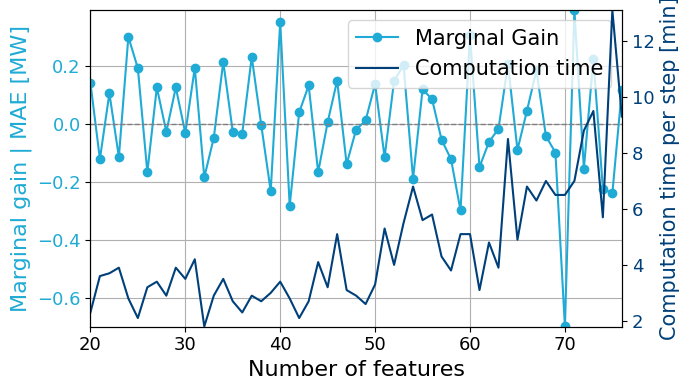

SFFS Marginal Gain vs computation time


In [158]:
df_sbs = parse_sbs_log(log_text)
SBS_MLP = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff(-1)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 76

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(7, 4))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=16)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=16, color=color1)
ax1.tick_params(axis='both', labelsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"] / 60, color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step [min]", fontsize=15, color=color2)

ax2.tick_params(axis='y', labelcolor=color2, labelsize=13)
ax2.set_ylim((df_zoom["elapsed_time_sec"] / 60).min() - 0.01, (df_zoom["elapsed_time_sec"] / 60).max() + 0.01)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right",fontsize=15)
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")



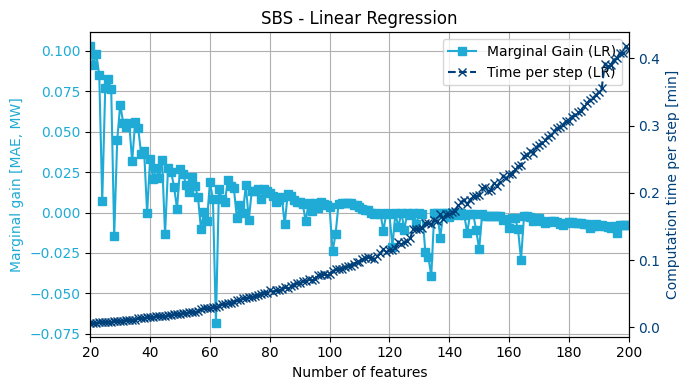

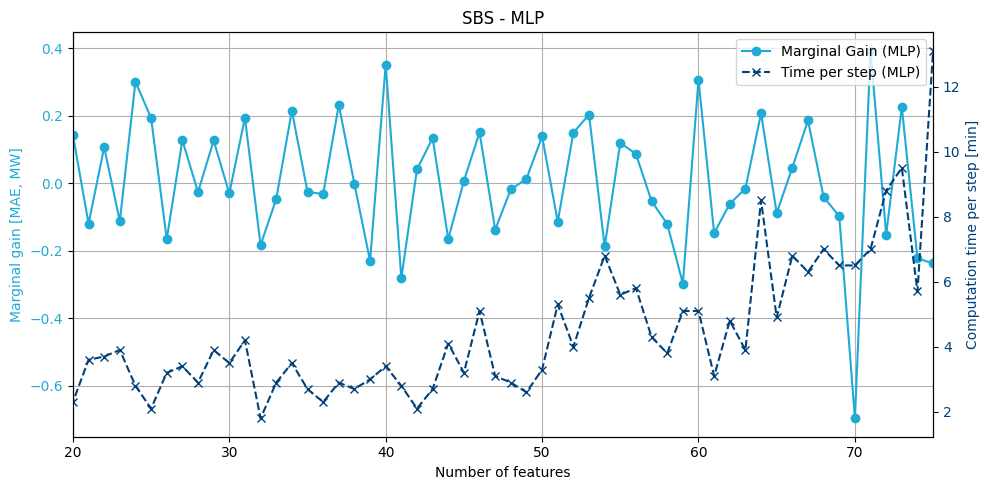

In [159]:
SBS_LR = SBS_LP
import matplotlib.pyplot as plt

# Define color scheme
color_mlp = "#1FABD5"     # Blue for MLP
color_lr = "#F18F01"      # Orange for LR
color_time = "#00407A"    # Dark blue for time

# Define feature zoom range
x_min, x_max = 20, 200

# Prepare data
SBS_MLP["marginal_gain"] = SBS_MLP["score"].diff(-1)
SBS_LR["marginal_gain"] = SBS_LR["score"].diff(-1)

df_mlp = SBS_MLP[(SBS_MLP["features"] >= x_min) & (SBS_MLP["features"] <= x_max)]
df_lr = SBS_LR[(SBS_LR["features"] >= x_min) & (SBS_LR["features"] <= x_max)]

# Plotting
plt.style.use('default')

# Define color scheme
color_gain = "#1FABD5"     # Light blue for marginal gain
color_time = "#00407A"     # Dark blue for time

# Define feature zoom ranges
x_min_mlp, x_max_mlp = 20, 75
x_min_lr, x_max_lr = 20, 200

# Prepare data
SBS_MLP["marginal_gain"] = SBS_MLP["score"].diff(-1)
SBS_LR["marginal_gain"] = SBS_LR["score"].diff(-1)

df_mlp = SBS_MLP[(SBS_MLP["features"] >= x_min_mlp) & (SBS_MLP["features"] <= x_max_mlp)]
df_lr = SBS_LR[(SBS_LR["features"] >= x_min_lr) & (SBS_LR["features"] <= x_max_lr)]

# Plotting
plt.style.use('default')
import matplotlib.pyplot as plt

# Define color scheme
color_gain = "#1FABD5"     # Light blue for marginal gain
color_time = "#00407A"     # Dark blue for time

# Define shared x-axis range
x_min, x_max = 20, 200

# Prepare data
SBS_MLP["marginal_gain"] = SBS_MLP["score"].diff(-1)
SBS_LR["marginal_gain"] = SBS_LR["score"].diff(-1)

df_mlp = SBS_MLP[(SBS_MLP["features"] >= x_min) & (SBS_MLP["features"] <= x_max)]
df_lr = SBS_LR[(SBS_LR["features"] >= x_min) & (SBS_LR["features"] <= x_max)]

# ---------------------------
# Plot 1: SBS - Linear Regression
# ---------------------------
plt.style.use('default')
fig1, ax1 = plt.subplots(figsize=(7, 4))

line1_lr, = ax1.plot(df_lr["features"], df_lr["marginal_gain"], label="Marginal Gain (LR)",
                     color=color_gain, marker='s')
ax1_twin = ax1.twinx()
line2_lr, = ax1_twin.plot(df_lr["features"], df_lr["elapsed_time_sec"]/60, label="Time per step (LR)",
                          color=color_time, linestyle='--', marker='x')

ax1.set_xlabel("Number of features")
ax1.set_ylabel("Marginal gain [MAE, MW]", color=color_gain)
ax1.tick_params(axis='y', labelcolor=color_gain)
ax1.grid(True)

ax1_twin.set_ylabel("Computation time per step [min]", color=color_time)
ax1_twin.tick_params(axis='y', labelcolor=color_time)

ax1.set_xlim(x_min, x_max)
ax1.set_title("SBS - Linear Regression")
ax1.legend([line1_lr, line2_lr], [line1_lr.get_label(), line2_lr.get_label()], loc="upper right")

plt.tight_layout()
plt.show()

# ---------------------------
# Plot 2: SBS - MLP
# ---------------------------
x_min, x_max = 20, 75

fig2, ax2 = plt.subplots(figsize=(10, 5))

line1_mlp, = ax2.plot(df_mlp["features"], df_mlp["marginal_gain"], label="Marginal Gain (MLP)",
                      color=color_gain, marker='o')
ax2_twin = ax2.twinx()
line2_mlp, = ax2_twin.plot(df_mlp["features"], df_mlp["elapsed_time_sec"]/60, label="Time per step (MLP)",
                           color=color_time, linestyle='--', marker='x')

ax2.set_xlabel("Number of features")
ax2.set_ylabel("Marginal gain [MAE, MW]", color=color_gain)
ax2.tick_params(axis='y', labelcolor=color_gain)
ax2.grid(True)

ax2_twin.set_ylabel("Computation time per step [min]", color=color_time)
ax2_twin.tick_params(axis='y', labelcolor=color_time)

ax2.set_xlim(x_min, x_max)
ax2.set_title("SBS - MLP")
ax2.legend([line1_mlp, line2_mlp], [line1_mlp.get_label(), line2_mlp.get_label()], loc="upper right")

plt.tight_layout()
plt.show()



**Lasso - MLP**

In [160]:
kept_features = """
WIND_RT_from_qh_minus_2, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, SI_min_from_minute_minus_2, LOAD_ID_from_qh_plus_3, SOLAR_ID_from_qh_plus_2, SI_from_qh_minus_3, NETPOS_BE_ID_from_qh_plus_4, LOAD_ID_from_qh_minus_3, SI_min_from_minute_minus_3, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_1, SI_from_qh_minus_1, NRV_from_qh_minus_3, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_current_qh, SOLAR_ID_from_qh_plus_4, IP_min_from_minute_minus_2, aFRR+_from_qh_minus_1, GDV_from_qh_minus_1, aFRR-_from_qh_minus_3, IP_from_qh_minus_12, XB_DA_NET_France_current_qh

"""
qh_parameters_LASSO_MLP, min_parameters_LASSO_MLP, hour_parameters_LASSO_MLP = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_LASSO_MLP)
print( "min_parameters=", min_parameters_LASSO_MLP)
print( "hour_parameters=", hour_parameters_LASSO_MLP)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_LASSO_MLP, min_parameters_LASSO_MLP, hour_parameters_LASSO_MLP)

# Print results
print(f"🔢 Total lagged features: {total}\n")

qh_parameters= {'WIND_RT': {'lags': [-2]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'LOAD_RT': {'lags': [-4, -3]}, 'LOAD_ID': {'lags': [-3, 3]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SI': {'lags': [-3, -1, 1]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 13]}, 'NRV': {'lags': [-3]}, 'aFRR+': {'lags': [-1]}, 'GDV': {'lags': [-1]}, 'aFRR-': {'lags': [-3]}, 'IP': {'lags': [-12]}, 'XB_DA_NET_France': {'lags': [0]}}
min_parameters= {'SI_min': {'lags': [-3, -2]}, 'IP_min': {'lags': [-2]}}
hour_parameters= {}
🔢 Total lagged features: 26



**SBS - MLP**

In [161]:
kept_features = """
IGCC-_from_qh_minus_2, IP_from_qh_minus_2, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_current_qh, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_4, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_5, SI_from_qh_minus_96, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_4, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_plus_1

"""
qh_parameters_SBS_MLP, min_parameters_SBS_MLP, hour_parameters_SBS_MLP = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_SBS_MLP)
print( "min_parameters=", min_parameters_SBS_MLP)
print( "hour_parameters=", hour_parameters_SBS_MLP)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_SBS_MLP, min_parameters_SBS_MLP, hour_parameters_SBS_MLP)

# Print results
print(f"🔢 Total lagged features: {total}\n")

qh_parameters= {'IGCC-': {'lags': [-2]}, 'IP': {'lags': [-2]}, 'LOAD_DA': {'lags': [2]}, 'LOAD_ID_P90': {'lags': [-1, 2]}, 'LOAD_ID': {'lags': [0]}, 'LOAD_RT': {'lags': [-4, -3]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4]}, 'NRV': {'lags': [-4, -3]}, 'SI': {'lags': [-96, -25, -5, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_RT': {'lags': [-4, -3, -2, -1]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [0, 1]}}
min_parameters= {'NRV_min': {'lags': [-4]}, 'SI_min': {'lags': [-4, -3, -2]}}
hour_parameters= {}
🔢 Total lagged features: 38



In [162]:
log_text = """

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:  5.5min finished

[2025-05-29 08:12:54] Features: 61/1 -- score: -96.32018374159196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:  1.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:  2.8min remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:  3.3min finished

[2025-05-29 08:16:11] Features: 60/1 -- score: -96.55885920671167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:  4.9min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:  5.9min remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.0min finished

[2025-05-29 08:22:12] Features: 59/1 -- score: -96.43150758658814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:  5.0min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:  5.6min remaining:   45.4s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:  6.1min finished

[2025-05-29 08:28:21] Features: 58/1 -- score: -96.25513995768243[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:  4.8min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:  5.9min remaining:   48.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:  6.6min finished

[2025-05-29 08:34:58] Features: 57/1 -- score: -96.2090246208809[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:  8.2min remaining: 19.3min
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:  9.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed: 11.1min finished

[2025-05-29 08:46:01] Features: 56/1 -- score: -95.73770626292558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:  3.8min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:  4.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  5.1min finished

[2025-05-29 08:51:10] Features: 55/1 -- score: -95.94737554446966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:  6.1min remaining: 22.0min
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:  7.2min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  8.3min finished

[2025-05-29 08:59:30] Features: 54/1 -- score: -96.26948385598067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:  6.3min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:  7.0min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  8.1min finished

[2025-05-29 09:07:34] Features: 53/1 -- score: -95.82068555017526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:  2.7min remaining: 18.0min
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:  4.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:  5.7min finished

[2025-05-29 09:13:14] Features: 52/1 -- score: -95.8683941091896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:  5.2min remaining: 40.2min
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:  6.3min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:  7.6min finished

[2025-05-29 09:20:48] Features: 51/1 -- score: -96.00881900334338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:  4.7min remaining: 116.3min
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:  6.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:  7.5min finished

[2025-05-29 09:28:18] Features: 50/1 -- score: -96.00736920761535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:  4.5min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.3min finished

[2025-05-29 09:34:36] Features: 49/1 -- score: -96.06794801128135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:  5.8min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:  6.9min remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  7.0min finished

[2025-05-29 09:41:39] Features: 48/1 -- score: -96.22240649729974[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:  5.4min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:  7.6min remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.1min finished

[2025-05-29 09:49:42] Features: 47/1 -- score: -96.11781659134742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:  4.4min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:  5.3min remaining:   55.3s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  7.0min finished

[2025-05-29 09:56:43] Features: 46/1 -- score: -96.17363720779903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:  5.3min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:  7.0min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:  8.1min finished

[2025-05-29 10:04:47] Features: 45/1 -- score: -95.87705615356535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:  7.2min remaining: 25.1min
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:  8.6min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.1min finished

[2025-05-29 10:14:56] Features: 44/1 -- score: -96.12766337768905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:  4.6min remaining: 17.9min
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:  5.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:  6.8min finished

[2025-05-29 10:21:47] Features: 43/1 -- score: -96.05564245411314[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:  3.4min remaining: 33.5min
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:  4.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:  4.9min finished

[2025-05-29 10:26:41] Features: 42/1 -- score: -96.10288393055939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:  2.5min remaining: 32.8min
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:  3.5min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  4.4min finished

[2025-05-29 10:31:04] Features: 41/1 -- score: -95.85942238222353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:  5.1min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  6.6min finished

[2025-05-29 10:37:43] Features: 40/1 -- score: -95.95177082010122[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:  4.4min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.5min finished

[2025-05-29 10:43:16] Features: 39/1 -- score: -95.93256473562029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:  2.4min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:  2.9min remaining:   37.8s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  3.7min finished

[2025-05-29 10:46:59] Features: 38/1 -- score: -96.16099690367281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:  4.0min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:  4.6min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:  5.4min finished

[2025-05-29 10:52:21] Features: 37/1 -- score: -95.87522873388714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:  3.4min remaining: 21.5min
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:  4.2min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:  5.2min finished

[2025-05-29 10:57:32] Features: 36/1 -- score: -96.07699167452782[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:  2.5min remaining: 20.1min
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:  3.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.0min finished

[2025-05-29 11:01:32] Features: 35/1 -- score: -96.12959926130644[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:  4.5min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  6.3min finished

[2025-05-29 11:07:50] Features: 34/1 -- score: -96.05810724201837[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:  3.0min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:  4.3min finished

[2025-05-29 11:12:09] Features: 33/1 -- score: -96.08435537821289[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:  2.6min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:  3.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.6min finished

[2025-05-29 11:15:47] Features: 32/1 -- score: -96.16757473433219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:  4.4min remaining: 15.7min
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:  5.4min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  6.4min finished

[2025-05-29 11:22:13] Features: 31/1 -- score: -96.19416075675939[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:  3.7min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  4.6min finished

[2025-05-29 11:26:52] Features: 30/1 -- score: -96.4724750084208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  4.3min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.4min finished

[2025-05-29 11:32:14] Features: 29/1 -- score: -96.23231827313536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:  1.8min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:  2.2min remaining:   42.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:  2.5min finished

[2025-05-29 11:34:42] Features: 28/1 -- score: -96.26106425352768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:  1.9min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:  2.8min remaining:   56.6s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  3.7min finished

[2025-05-29 11:38:25] Features: 27/1 -- score: -96.29921090098831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:  1.7min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.7min finished

[2025-05-29 11:41:06] Features: 26/1 -- score: -96.3193699632761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:  1.3min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  2.1min finished

[2025-05-29 11:43:10] Features: 25/1 -- score: -96.22092338334325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:  1.4min remaining: 16.3min
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:  2.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished

[2025-05-29 11:45:50] Features: 24/1 -- score: -96.18867681105795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  2.0min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.0min finished

[2025-05-29 11:48:51] Features: 23/1 -- score: -96.32789180177018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:  1.6min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:  2.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  3.2min finished

[2025-05-29 11:52:05] Features: 22/1 -- score: -96.35451508263185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:  1.9min remaining: 11.9min
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:  2.1min remaining:   59.8s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  3.0min finished

[2025-05-29 11:55:08] Features: 21/1 -- score: -96.53771606974338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:  1.2min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  1.9min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.6min finished

[2025-05-29 11:57:46] Features: 20/1 -- score: -96.34881079859169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:   58.8s remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  1.4min remaining:   34.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished

[2025-05-29 11:59:18] Features: 19/1 -- score: -96.48619093824541[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:  1.1min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:  1.4min remaining:   50.6s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.8min finished

[2025-05-29 12:01:05] Features: 18/1 -- score: -96.59887404833125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   49.8s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished

[2025-05-29 12:02:12] Features: 17/1 -- score: -96.66504942405489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:   49.9s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.4min finished

[2025-05-29 12:03:36] Features: 16/1 -- score: -96.9888412882827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:  1.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.1min finished

[2025-05-29 12:05:40] Features: 15/1 -- score: -97.11055574546225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:   55.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished

[2025-05-29 12:07:28] Features: 14/1 -- score: -96.9870884220151[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  2.0min finished

[2025-05-29 12:09:27] Features: 13/1 -- score: -97.23691144908942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:   41.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.0min finished

[2025-05-29 12:10:29] Features: 12/1 -- score: -97.51031337239432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   33.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   55.1s finished

[2025-05-29 12:11:25] Features: 11/1 -- score: -97.76359959305665[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:   31.6s remaining:   55.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   51.2s finished

[2025-05-29 12:12:16] Features: 10/1 -- score: -97.93878275370915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   27.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   54.9s finished

[2025-05-29 12:13:11] Features: 9/1 -- score: -98.13721086516904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   17.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   37.8s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   42.7s finished

[2025-05-29 12:13:54] Features: 8/1 -- score: -98.2656984476061[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   46.9s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.1min finished

[2025-05-29 12:15:02] Features: 7/1 -- score: -98.43382409254887[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   19.2s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   31.5s finished

[2025-05-29 12:15:33] Features: 6/1 -- score: -98.7082501739169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   22.7s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   27.1s finished

[2025-05-29 12:16:00] Features: 5/1 -- score: -99.02465178716943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.9s finished

[2025-05-29 12:16:26] Features: 4/1 -- score: -99.98215330981029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.0s finished

[2025-05-29 12:16:39] Features: 3/1 -- score: -99.95757524032196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.9s finished

[2025-05-29 12:16:55] Features: 2/1 -- score: -101.66965872611489[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.9s finished

[2025-05-29 12:17:09] Features: 1/1 -- score: -107.27866532890752
  0%|          | 0/13 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)


"""

    step  features       score  elapsed_time_sec
0      1        61  -96.320184             330.0
1      2        60  -96.558859             198.0
2      3        59  -96.431508             360.0
3      4        58  -96.255140             366.0
4      5        57  -96.209025             396.0
..   ...       ...         ...               ...
56    57         5  -99.024652              27.1
57    58         4  -99.982153              25.9
58    59         3  -99.957575              13.0
59    60         2 -101.669659              15.9
60    61         1 -107.278665              13.9

[61 rows x 4 columns]

✅ Best CV score: -95.7377 at 56 features.


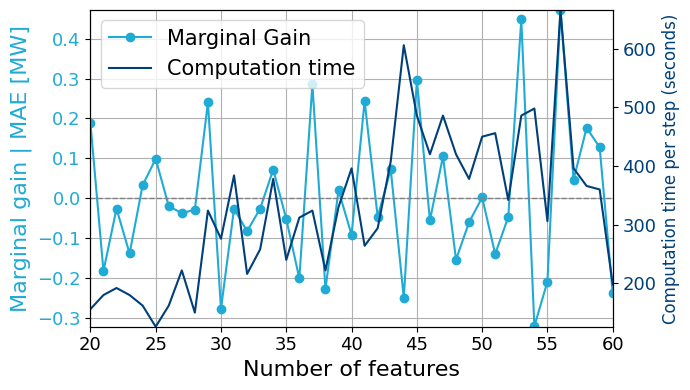

SBS_MLP Marginal Gain vs computation time
Total elapsed time: 4h:9min:25sec


In [163]:
selection_method = "SBS_MLP"

df_sbs = parse_sbs_log(log_text)
SBS_MLP = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff().fillna(0)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 60

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(7, 4))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=16)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=16, color=color1)
ax1.tick_params(axis='both', labelsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step (seconds)", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=13)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left", fontsize=15)
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")

total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")
#-------------------------------------------------------------------------------------------------------------------------------------------------------


**SFS - MLP**

In [164]:
kept_features = """
IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IP_from_qh_minus_12, IP_from_qh_minus_2, IP_from_qh_minus_3, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_current_qh, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MDP_from_qh_minus_3, MDP_min_from_minute_minus_2, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_4, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_5, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_4, SI_min_from_minute_minus_5, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_2, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_plus_1, aFRR+_from_qh_minus_1, aFRR-_from_qh_minus_1, aFRR-_from_qh_minus_3
"""
qh_parameters_SFS_MLP, min_parameters_SFS_MLP, hour_parameters_SFS_MLP = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_parameters_SFS_MLP)
print( "min_parameters=", min_parameters_SFS_MLP)
print( "hour_parameters=", hour_parameters_SFS_MLP)

    # Call the function
total, per_feature = count_lagged_features(qh_parameters_SFS_MLP, min_parameters_SFS_MLP, hour_parameters_SFS_MLP)

# Print results
print(f"🔢 Total lagged features: {total}\n")

qh_parameters= {'IGCC-': {'lags': [-2, -1]}, 'IP': {'lags': [-12, -3, -2]}, 'LOAD_DA': {'lags': [-1, 2]}, 'LOAD_ID_P90': {'lags': [-1, 3]}, 'LOAD_ID': {'lags': [0]}, 'LOAD_RT': {'lags': [-4, -3]}, 'MDP': {'lags': [-3]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4]}, 'NRV': {'lags': [-4, -3]}, 'SI': {'lags': [-97, -25, -5, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-2, -1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [0, 1]}, 'aFRR+': {'lags': [-1]}, 'aFRR-': {'lags': [-3, -1]}}
min_parameters= {'MDP_min': {'lags': [-2]}, 'NRV_min': {'lags': [-4]}, 'SI_min': {'lags': [-5, -4, -3, -2]}}
hour_parameters= {}
🔢 Total lagged features: 44



In [165]:
log_text = """
/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  62 | elapsed:   55.7s remaining:   55.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:  1.7min finished

[2025-05-29 08:05:34] Features: 1/60 -- score: -104.86283332042674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  61 | elapsed:   19.9s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  58 out of  61 | elapsed:   26.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:   41.3s finished

[2025-05-29 08:06:15] Features: 2/60 -- score: -102.57337444089843[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:   18.0s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:   52.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished

[2025-05-29 08:07:17] Features: 3/60 -- score: -99.95757524032196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  59 | elapsed:   16.7s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  52 out of  59 | elapsed:   22.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:  1.5min finished

[2025-05-29 08:08:44] Features: 4/60 -- score: -99.56976078011942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  58 | elapsed:   16.8s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  51 out of  58 | elapsed:   20.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   47.4s finished

[2025-05-29 08:09:32] Features: 5/60 -- score: -99.09527332940257[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  57 | elapsed:   15.9s remaining:   37.5s
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:   18.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   48.2s finished

[2025-05-29 08:10:20] Features: 6/60 -- score: -98.7880972796876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  56 | elapsed:   16.4s remaining:   40.9s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:   19.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   44.9s finished

[2025-05-29 08:11:05] Features: 7/60 -- score: -98.39964065657509[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:   19.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:   22.2s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   38.3s finished

[2025-05-29 08:11:43] Features: 8/60 -- score: -98.28746443705556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:   18.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed:   20.9s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   37.9s finished

[2025-05-29 08:12:21] Features: 9/60 -- score: -98.25612304626095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  53 | elapsed:   18.8s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  34 out of  53 | elapsed:   20.5s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   40.3s finished

[2025-05-29 08:13:02] Features: 10/60 -- score: -98.08748390637655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  52 | elapsed:   21.6s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  33 out of  52 | elapsed:   23.6s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:  1.0min finished

[2025-05-29 08:14:03] Features: 11/60 -- score: -97.98320117927862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  51 | elapsed:   27.3s remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:   29.6s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   47.4s finished

[2025-05-29 08:14:50] Features: 12/60 -- score: -97.85301577267074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:   30.7s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.6s finished

[2025-05-29 08:15:27] Features: 13/60 -- score: -97.78882401720092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  49 | elapsed:   31.7s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  47 out of  49 | elapsed:   36.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   39.9s finished

[2025-05-29 08:16:07] Features: 14/60 -- score: -97.67557708084756[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  48 | elapsed:   28.0s remaining:   36.0s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:   31.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   38.1s finished

[2025-05-29 08:16:45] Features: 15/60 -- score: -97.72564258989779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:   29.6s remaining:   57.3s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:   31.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   39.4s finished

[2025-05-29 08:17:24] Features: 16/60 -- score: -97.62084700284207[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  46 | elapsed:   27.3s remaining:   56.5s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:   30.0s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   37.5s finished

[2025-05-29 08:18:02] Features: 17/60 -- score: -97.52723991064204[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  45 | elapsed:   32.9s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:   37.4s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   51.6s finished

[2025-05-29 08:18:54] Features: 18/60 -- score: -97.58170508122664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  44 | elapsed:   31.9s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  32 out of  44 | elapsed:   35.0s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   58.1s finished

[2025-05-29 08:19:52] Features: 19/60 -- score: -97.45705135707718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  43 | elapsed:   33.1s remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  26 out of  43 | elapsed:   39.6s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   50.4s finished

[2025-05-29 08:20:42] Features: 20/60 -- score: -97.4260660466688[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  42 | elapsed:   32.7s remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  25 out of  42 | elapsed:   37.0s remaining:   25.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   52.2s finished

[2025-05-29 08:21:35] Features: 21/60 -- score: -97.488621934432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  41 | elapsed:   35.6s remaining:   41.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  1.2min finished

[2025-05-29 08:22:45] Features: 22/60 -- score: -97.48965112639847[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:   38.7s remaining:   47.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished

[2025-05-29 08:23:53] Features: 23/60 -- score: -97.38583533341277[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  39 | elapsed:   32.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:   35.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   48.2s finished

[2025-05-29 08:24:41] Features: 24/60 -- score: -97.29080970714563[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  38 | elapsed:   40.4s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:   50.7s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:  1.3min finished

[2025-05-29 08:25:57] Features: 25/60 -- score: -97.10772386839356[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  37 | elapsed:  1.1min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done  24 out of  37 | elapsed:  1.4min remaining:   45.6s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:  2.2min finished

[2025-05-29 08:28:07] Features: 26/60 -- score: -96.92056282282064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:   50.4s remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:  1.2min remaining:   40.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.2min finished

[2025-05-29 08:30:17] Features: 27/60 -- score: -97.00982407064406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:   50.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.2min finished

[2025-05-29 08:31:32] Features: 28/60 -- score: -96.88478914108174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  34 | elapsed:  2.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:  3.2min finished

[2025-05-29 08:34:44] Features: 29/60 -- score: -96.65273901219835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  33 | elapsed:  2.3min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  25 out of  33 | elapsed:  2.8min remaining:   53.5s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.8min finished

[2025-05-29 08:38:30] Features: 30/60 -- score: -96.59303099943699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  32 | elapsed:  4.0min remaining: 14.3min
[Parallel(n_jobs=-1)]: Done  24 out of  32 | elapsed:  4.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  5.9min finished

[2025-05-29 08:44:27] Features: 31/60 -- score: -96.39730892706127[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:  2.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  3.1min finished

[2025-05-29 08:47:33] Features: 32/60 -- score: -96.40262270346126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  2.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.3min finished

[2025-05-29 08:50:52] Features: 33/60 -- score: -96.3078015704325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  29 | elapsed:  3.2min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:  3.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:  4.4min finished

[2025-05-29 08:55:19] Features: 34/60 -- score: -96.18918332139378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:  2.8min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:  3.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  4.4min finished

[2025-05-29 08:59:42] Features: 35/60 -- score: -96.19199250361102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:  3.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  5.7min finished

[2025-05-29 09:05:22] Features: 36/60 -- score: -96.17225589331747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  26 | elapsed:  4.8min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  7.2min finished

[2025-05-29 09:12:33] Features: 37/60 -- score: -95.95245182253566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:  3.0min remaining: 34.3min
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:  3.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished

[2025-05-29 09:17:42] Features: 38/60 -- score: -96.15953209324925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  5.9min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.0min finished

[2025-05-29 09:24:41] Features: 39/60 -- score: -96.07328452827596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:  5.5min remaining: 26.2min
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:  6.1min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  7.4min finished

[2025-05-29 09:32:03] Features: 40/60 -- score: -96.27565459230856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:  5.2min remaining: 33.2min
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:  6.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  6.8min finished

[2025-05-29 09:38:49] Features: 41/60 -- score: -95.93866881607674[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:  4.8min remaining: 20.5min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  5.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  7.3min finished

[2025-05-29 09:46:07] Features: 42/60 -- score: -95.6696264011999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:  4.3min remaining: 24.5min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  5.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.6min finished

[2025-05-29 09:52:45] Features: 43/60 -- score: -95.66086851360377[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:  6.5min remaining: 55.0min
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:  7.6min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  9.2min finished

[2025-05-29 10:02:00] Features: 44/60 -- score: -95.96900003345682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  6.2min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.3min finished

[2025-05-29 10:09:19] Features: 45/60 -- score: -95.73740664851135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  17 | elapsed:  3.7min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  4.6min finished

[2025-05-29 10:13:53] Features: 46/60 -- score: -96.16642673736033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  16 | elapsed:  4.4min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  5.5min finished

[2025-05-29 10:19:25] Features: 47/60 -- score: -95.83664902053341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.3min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.0min finished

[2025-05-29 10:24:25] Features: 48/60 -- score: -95.87205676220825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  4.3min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  5.2min finished

[2025-05-29 10:29:35] Features: 49/60 -- score: -96.0081730974575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:  5.4min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  6.3min finished

[2025-05-29 10:35:50] Features: 50/60 -- score: -96.01493287414601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  3.7min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.9min finished

[2025-05-29 10:40:45] Features: 51/60 -- score: -96.06556591585901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:  4.7min remaining:  8.2min
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  6.4min finished

[2025-05-29 10:47:09] Features: 52/60 -- score: -95.87303871137192[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  7.3min remaining: 17.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.1min finished

[2025-05-29 10:56:17] Features: 53/60 -- score: -95.83214839946139[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  4.9min remaining: 17.0min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  7.3min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.8min finished

[2025-05-29 11:04:03] Features: 54/60 -- score: -96.11228857641433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  5.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.5min finished

[2025-05-29 11:09:34] Features: 55/60 -- score: -95.77436191989237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:  5.8min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  7.9min finished

[2025-05-29 11:17:29] Features: 56/60 -- score: -95.76862590984167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  4.5min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.4min finished

[2025-05-29 11:22:55] Features: 57/60 -- score: -96.09253680531236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished

[2025-05-29 11:27:12] Features: 58/60 -- score: -96.41225729620092[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min finished

[2025-05-29 11:31:47] Features: 59/60 -- score: -96.45715535413908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished

[2025-05-29 11:33:03] Features: 60/60 -- score: -96.60181425020969
  0%|          | 0/13 [00:00<?, ?it/s]/vsc-hard-mounts/leuven-data/377/vsc37708/source/Cross_Validation.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  backtest = pd.concat([backtest, y_test], axis=0)

  8%|▊         | 1/13 [00:09<01:53,  9.49s/it]
 15%|█▌        | 2/13 [00:16<01:27,  7.95s/it]
 23%|██▎       | 3/13 [00:30<01:45, 10.55s/it]
 31%|███       | 4/13 [00:33<01:10,  7.86s/it]
 38%|███▊      | 5/13 [00:44<01:10,  8.87s/it]
 46%|████▌     | 6/13 [00:55<01:08,  9.72s/it]
 54%|█████▍    | 7/13 [01:00<00:48,  8.12s/it]
 62%|██████▏   | 8/13 [01:11<00:45,  9.03s/it]
 69%|██████▉   | 9/13 [01:18<00:34,  8.51s/it]
 77%|███████▋  | 10/13 [01:27<00:25,  8.45s/it]
 85%|████████▍ | 11/13 [01:34<00:16,  8.22s/it]
 92%|█████████▏| 12/13 [01:39<00:07,  7.13s/it]
100%|██████████| 13/13 [01:51<00:00,  8.69s/it]
100%|██████████| 13/13 [01:51<00:00,  8.61s/it]

"""

    step  features       score  elapsed_time_sec
0      1         1 -104.862833             102.0
1      2         2 -102.573374              41.3
2      3         3  -99.957575              60.0
3      4         4  -99.569761              90.0
4      5         5  -99.095273              47.4
5      6         6  -98.788097              48.2
6      7         7  -98.399641              44.9
7      8         8  -98.287464              38.3
8      9         9  -98.256123              37.9
9     10        10  -98.087484              40.3
10    11        11  -97.983201              60.0
11    12        12  -97.853016              47.4
12    13        13  -97.788824              36.6
13    14        14  -97.675577              39.9
14    15        15  -97.725643              38.1
15    16        16  -97.620847              39.4
16    17        17  -97.527240              37.5
17    18        18  -97.581705              51.6
18    19        19  -97.457051              58.1
19    20        20  

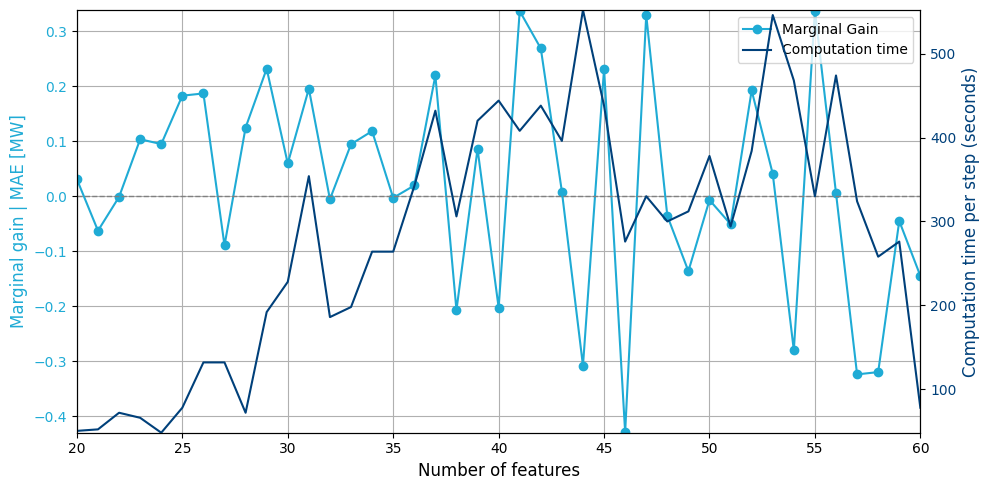

SFS_MLP Marginal Gain vs computation time
Total elapsed time: 3h:29min:11sec


In [166]:
selection_method = "SFS_MLP"

df_sbs = parse_sbs_log(log_text)
SFS_MLP = df_sbs
print(df_sbs)
# Get the row with the best (highest) score
best_row = df_sbs.loc[df_sbs["score"].idxmax()]

# Print the best score and corresponding number of features
print(f"\n✅ Best CV score: {best_row['score']:.4f} at {int(best_row['features'])} features.")
df_sbs["marginal_gain"] = df_sbs["score"].diff().fillna(0)
import matplotlib.pyplot as plt
color = "#1FABD5"
x_min, x_max = 20, 60

df_zoom = df_sbs[(df_sbs["features"] >= x_min) & (df_sbs["features"] <= x_max)]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(10, 5))
# -- Left Y-Axis: Marginal Gain
color1 = color
line1, = ax1.plot(df_zoom["features"], df_zoom["marginal_gain"], color=color1, marker='o', label='Marginal Gain')
ax1.set_xlabel("Number of features", fontsize=12)
ax1.set_ylabel("Marginal gain | MAE [MW]", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(df_zoom["marginal_gain"].min() - 0.001, df_zoom["marginal_gain"].max() + 0.001)
ax1.grid(True)

# -- Right Y-Axis: Computation Time
ax2 = ax1.twinx()
color2 = "#00407A"  # Dark Blue (Logo)
line2, = ax2.plot(df_zoom["features"], df_zoom["elapsed_time_sec"], color=color2,  label='Computation time')
ax2.set_ylabel("Computation time per step (seconds)", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(df_zoom["elapsed_time_sec"].min() - 0.001, df_zoom["elapsed_time_sec"].max() + 0.001)
# -- Combined Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right")
# -- Title & Layout
fig.tight_layout()
plt.show()
print(f"{selection_method} Marginal Gain vs computation time")

total = df_sbs["elapsed_time_sec"].sum()
# Convert total seconds to h:m:s
hours, remainder = divmod(int(total), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Total elapsed time: {hours}h:{minutes}min:{seconds}sec")



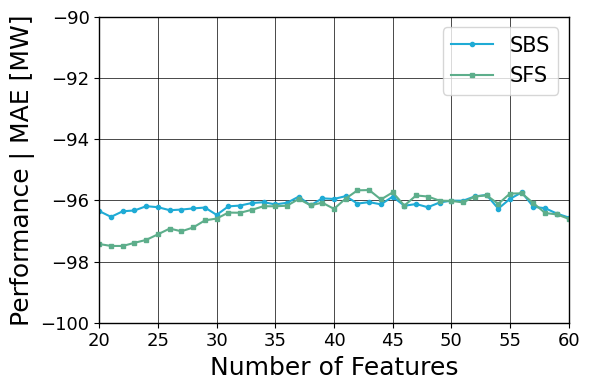

In [167]:
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
ax.set_facecolor('white')

ax.plot(SBS_MLP["features"], SBS_MLP["score"], marker='o', markersize=3, label="SBS", color=color)
ax.plot(SFS_MLP["features"], SFS_MLP["score"], marker='s', markersize=3, label="SFS", color="#5DAE8B")

# Add black grid
ax.grid(True, color='black', linewidth=0.5)

# Add visible spines (borders)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

ax.set_xlim(x_min, x_max)
ax.set_ylim(-100, -90)

ax.set_xlabel("Number of Features", fontsize=18)
ax.set_ylabel("Performance | MAE [MW]", fontsize=18)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()


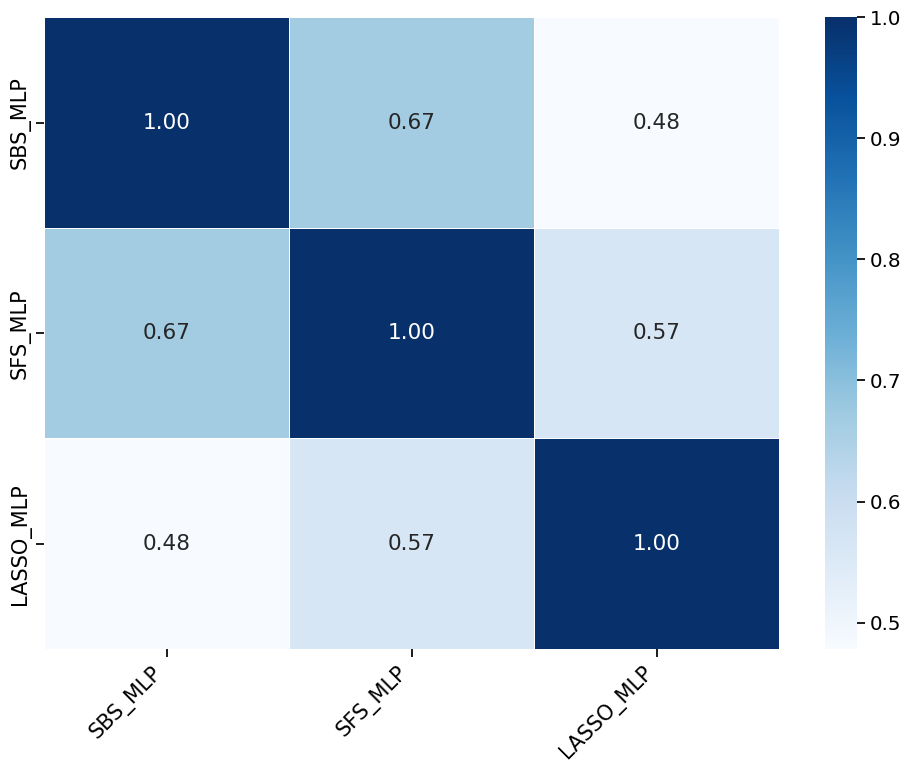

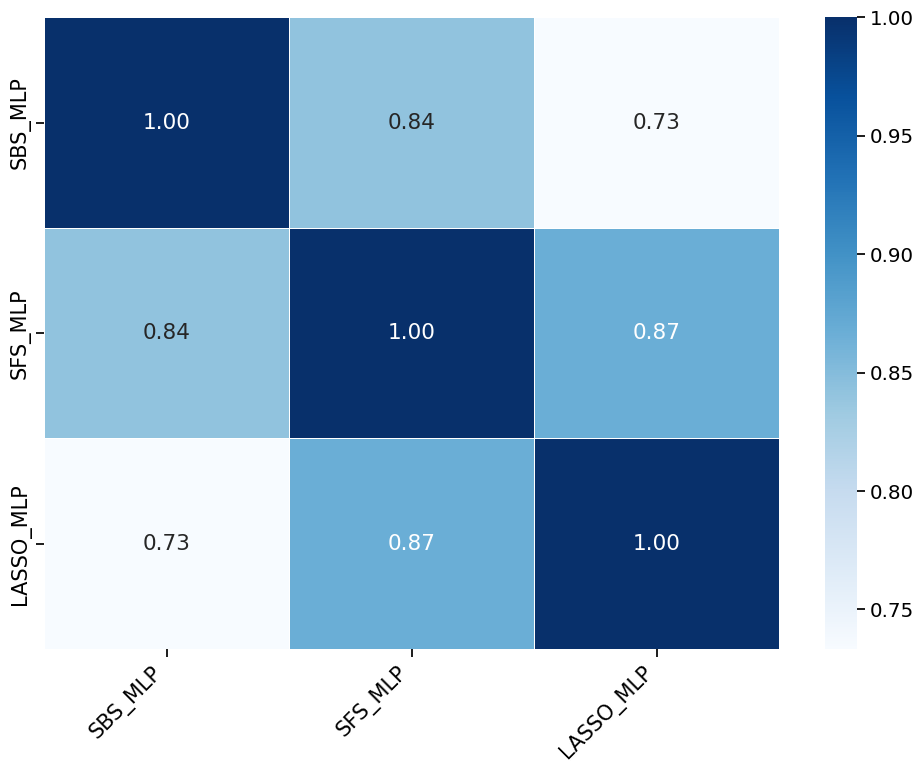

SBS_MLP   SFS_MLP  LASSO_MLP
SBS_MLP    1.000000  0.842105   0.733333
SFS_MLP    0.842105  1.000000   0.866667
LASSO_MLP  0.733333  0.866667   1.000000

In [168]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
selection_results = {
    "SBS_MLP": {
        "SBS_QH": qh_parameters_SBS_MLP,
        "SBS_MIN": min_parameters_SBS_MLP,
        "SBS_HOUR": hour_parameters_SBS_MLP},
    "SFS_MLP": {
        "SFS_QH": qh_parameters_SFS_MLP,
        "SFS_MIN": min_parameters_SFS_MLP,
        "SFS_HOUR": hour_parameters_SFS_MLP },
    "LASSO_MLP": {
        "LASSO_QH": qh_parameters_LASSO_MLP,
        "LASSO_MIN": min_parameters_LASSO_MLP,
        "LASSO_HOUR": hour_parameters_LASSO_MLP}
    }


combined_feature_sets = combine_features_per_method(selection_results)
compare_feature_sets(combined_feature_sets, title="Jaccard Similarity Between Methods (Combined Features)")
compare_feature_sets(combined_feature_sets, title="Feature Overlap", metric="overlap")


In [169]:
#Weighted diagram
performance_scores_raw = {
    "SBS": 95.43,
    "LASSO": 95.08,
    "SFS": 92.03,
}
# Step 1: Expand raw method-level scores to resolution-level
performance_scores = expand_performance_scores(selection_results, performance_scores_raw)

# ✅ Step 2: Build weighted feature × lag matrix
df_weighted = build_weighted_feature_lag_matrix(selection_results, performance_scores)

# ✅ Step 3: Plot the heatmap (this is the only plotting function!)
#plot_weighted_feature_lag_heatmap(df_weighted, top_n_features=20, max_lag_columns=30)

**Combined MLP and LP**

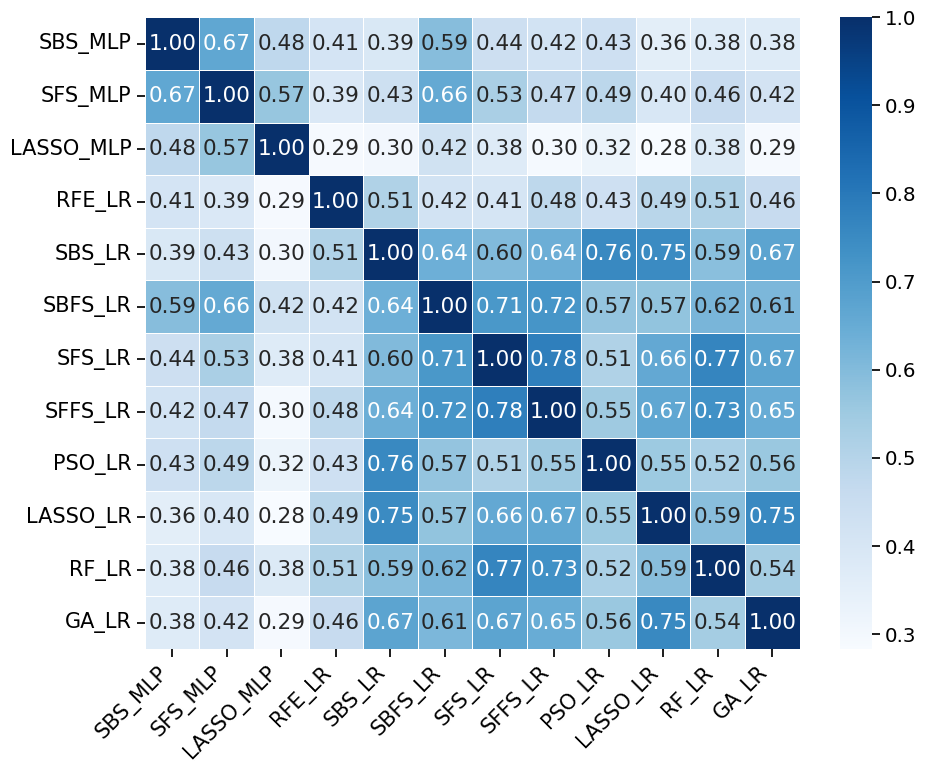

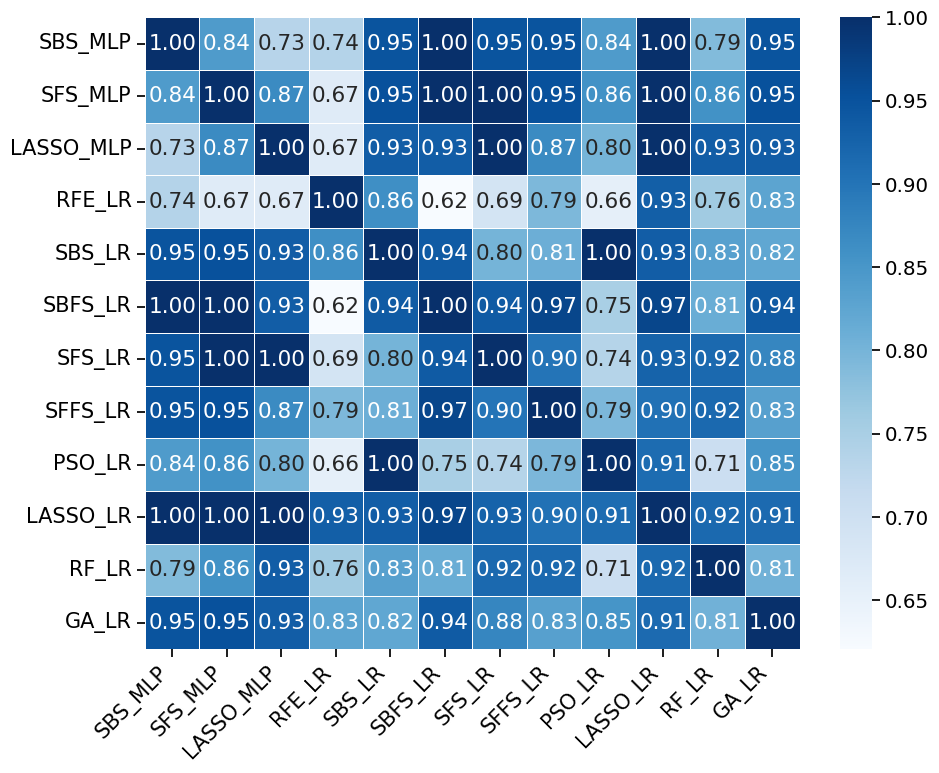

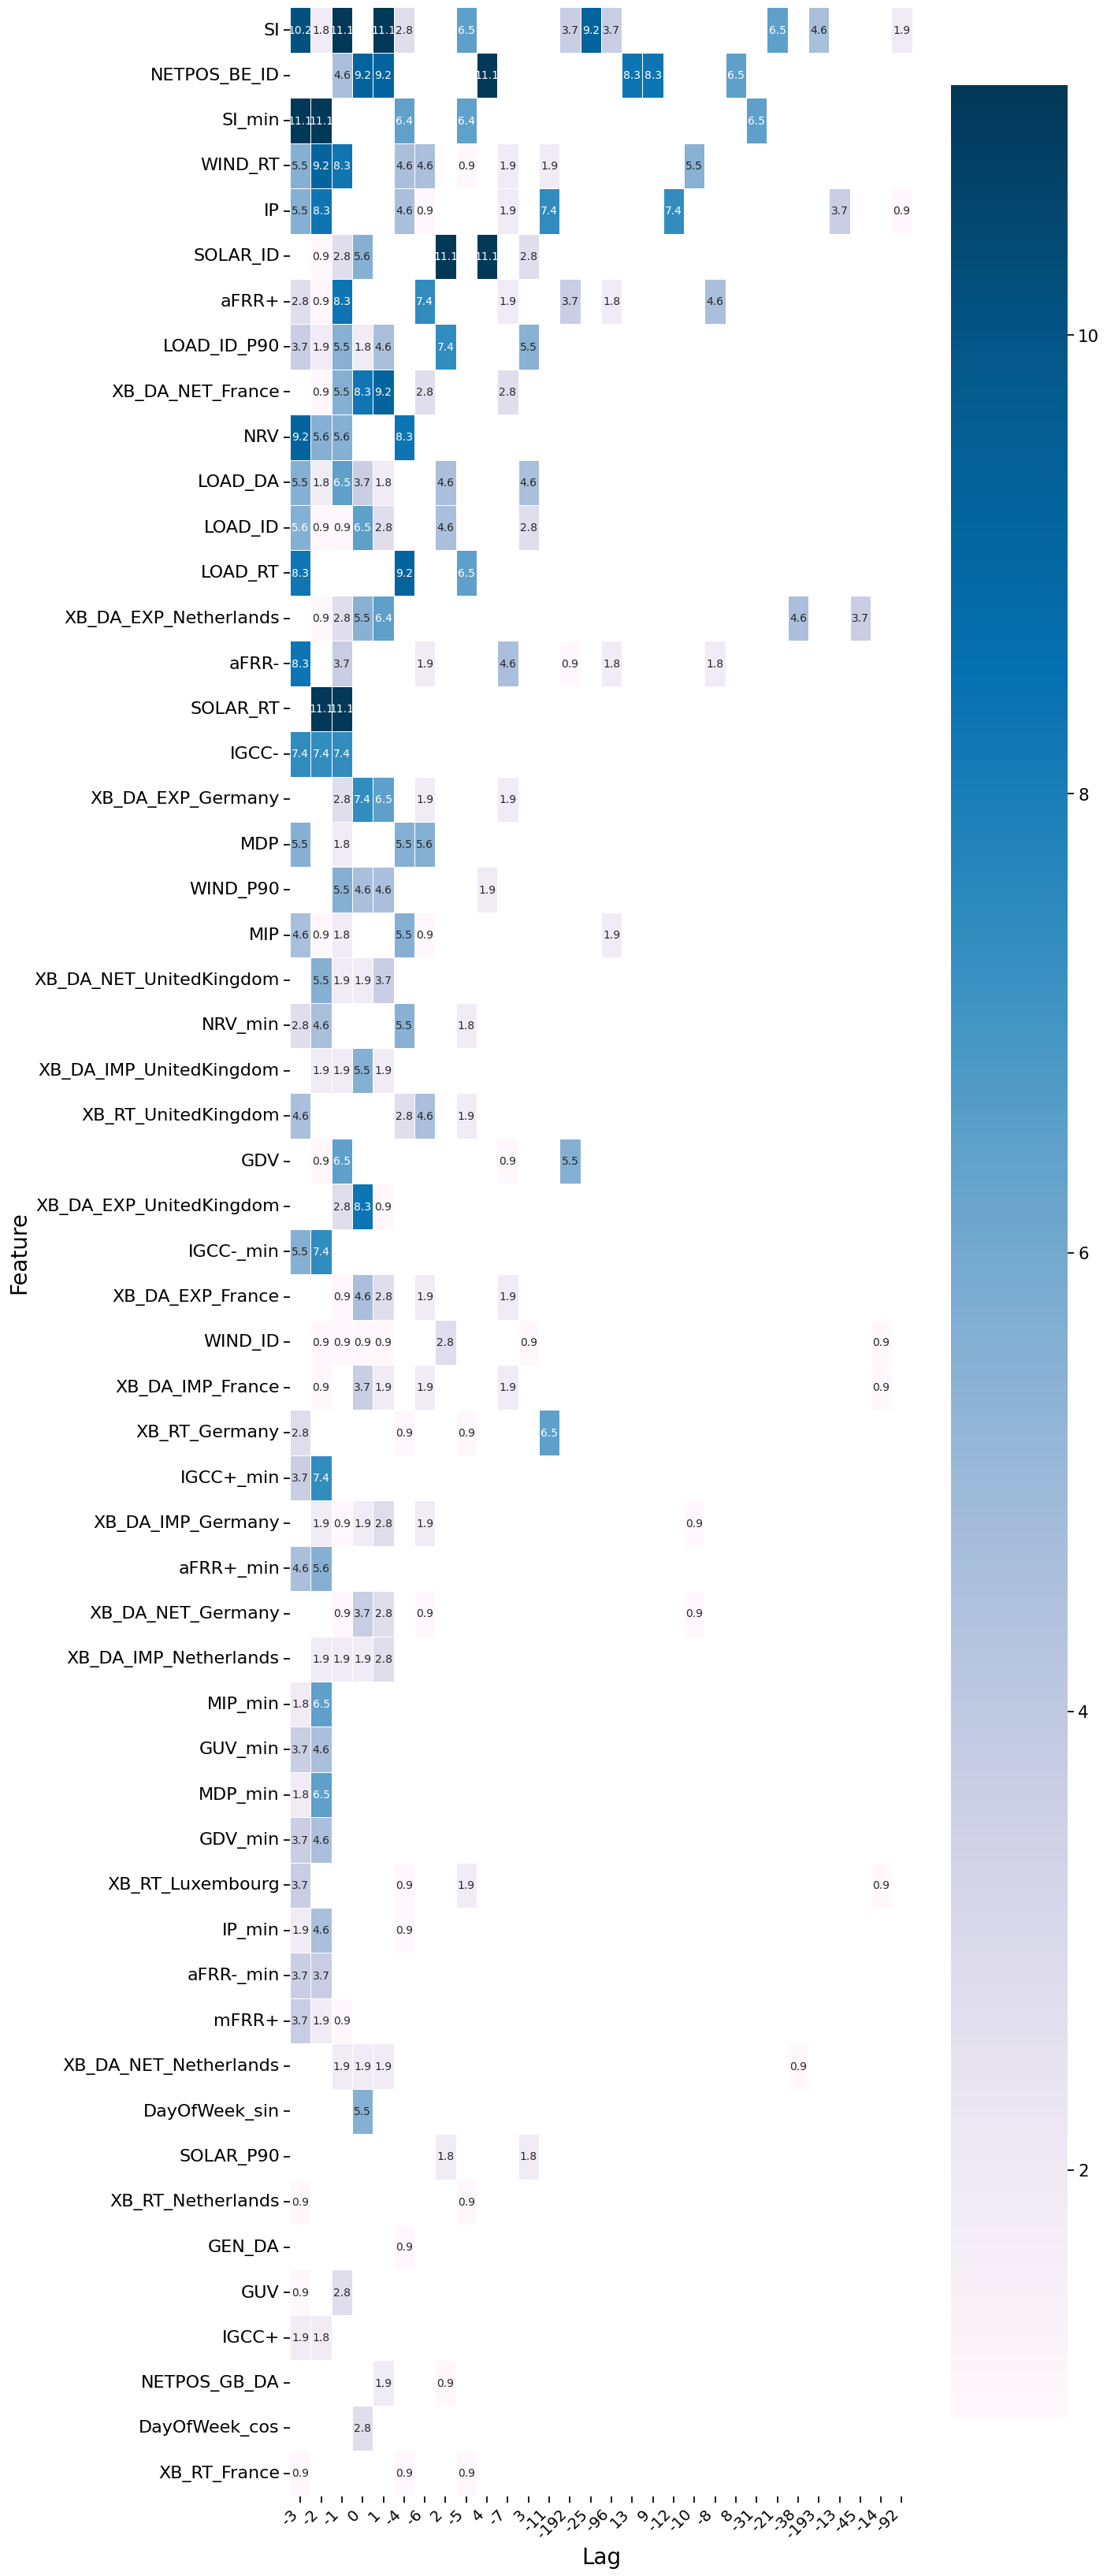

In [170]:
selection_results = {
    "SBS_MLP": {
        "SBS_QH": qh_parameters_SBS_MLP,
        "SBS_MIN": min_parameters_SBS_MLP,
        "SBS_HOUR": hour_parameters_SBS_MLP},
    "SFS_MLP": {
        "SFS_QH": qh_parameters_SFS_MLP,
        "SFS_MIN": min_parameters_SFS_MLP,
        "SFS_HOUR": hour_parameters_SFS_MLP },
    "LASSO_MLP": {
        "LASSO_QH": qh_parameters_LASSO_MLP,
        "LASSO_MIN": min_parameters_LASSO_MLP,
        "LASSO_HOUR": hour_parameters_LASSO_MLP},
    "RFE_LR": {
        "RFE_QH": qh_params_RFE_LR,
        "RFE_MIN": min_params_RFE_LR,
        "RFE_HOUR": hour_parameters_RFE_LR},
    "SBS_LR": {
        "SBS_QH": qh_params_SBS_LR,
        "SBS_MIN": min_params_SBS_LR,
        "SBS_HOUR": hour_parameters_SBS_LR},
    "SBFS_LR":{
        "SBFS_QH": qh_params_SBFS_LR,
        "SBFS_MIN": min_params_SBFS_LR,
        "SBFS_HOUR": hour_parameters_SBFS_LR},
    "SFS_LR": {
        "SFS_QH": qh_params_SFS_LR,
        "SFS_MIN": min_params_SFS_LR,
        "SFS_HOUR": hour_parameters_SFS_LR },
    "SFFS_LR": {
        "SFFS_QH": qh_params_SFFS_LR,
        "SFFS_MIN": min_params_SFFS_LR,
        "SFFS_HOUR": hour_parameters_SFFS_LR},
    "PSO_LR": {
        "PSO_QH": qh_params_PSA_LR,
        "PSO_MIN": min_params_PSA_LR,
        "PSO_HOUR": hour_parameters_PSA_LR    },
    "LASSO_LR": {
        "LASSO_QH": qh_parameters_LASSO_LR,
        "LASSO_MIN": min_parameters_LASSO_LR,
        "LASSO_HOUR": hour_parameters_LASSO_LR},
    "RF_LR": {
        "RF_QH": qh_parameters_RF_LR,
        "RF_MIN": min_parameters_RF_LR,
        "RF_HOUR": hour_parameters_RF_LR},
    "GA_LR": {
        "GA_QH": qh_parameters_GA_LR,
        "GA_MIN": min_parameters_GA_LR,
        "GA_HOUR": hour_parameters_GA_LR}
    }

combined_feature_sets = combine_features_per_method(selection_results)
compare_feature_sets(combined_feature_sets, title="Jaccard Similarity Between Methods (Combined Features)")
compare_feature_sets(combined_feature_sets, title="Feature Overlap", metric="overlap")
    #Weighted diagram
performance_scores_raw = {
    "SBS_MLP": 95.43,
    "LASSO_MLP": 95.08,
    "SFS_MLP": 92.03,
    "RFE_LR": 91.8,
    "SBS_LR": 91.8,
    "SBFS_LR": 91.73,
    "LASSO_LR": 93.25,
    "PSO_LR": 93.95,
    "SFFS_LR": 91.77,
    "GA_LR": 92.98,
    "SFS_LR": 92.03,
    "RF_LR": 92.58
}
# Step 1: Expand raw method-level scores to resolution-level
performance_scores = expand_performance_scores(selection_results, performance_scores_raw)

# ✅ Step 2: Build weighted feature × lag matrix
df_weighted = build_weighted_feature_lag_matrix(selection_results, performance_scores)

# ✅ Step 3: Plot the heatmap (this is the only plotting function!)
plot_weighted_feature_lag_heatmap(df_weighted, top_n_features=55, max_lag_columns=30)

**Cross border nominations**

In [171]:
raw_data = '''
SI_min_from_minute_minus_2: 0.6402
XB_DA_EXP_France_current_qh: 0.4789
XB_DA_NET_France_current_qh: 0.3041
XB_DA_EXP_Netherlands_from_qh_plus_1: 0.3024
XB_DA_IMP_France_current_qh: 0.2617
XB_DA_IMP_France_from_qh_plus_1: 0.2592
SI_min_from_minute_minus_3: 0.2230
XB_DA_EXP_France_from_qh_plus_1: 0.1970
XB_DA_NET_France_from_qh_plus_1: 0.1827
XB_RT_France_from_qh_minus_5: 0.1806
XB_RT_Germany_from_qh_minus_3: 0.1547
XB_RT_Germany_from_qh_minus_4: 0.1289
XB_RT_France_from_qh_minus_4: 0.1185
XB_DA_NET_Netherlands_from_qh_plus_1: 0.0987
XB_DA_EXP_Netherlands_current_qh: 0.0973
XB_DA_EXP_Netherlands_from_qh_minus_3: 0.0902
XB_DA_EXP_France_from_qh_minus_3: 0.0810
XB_DA_EXP_Netherlands_from_qh_plus_2: 0.0789
XB_RT_France_from_qh_minus_3: 0.0787
XB_DA_IMP_Germany_current_qh: 0.0715
XB_RT_UnitedKingdom_from_qh_minus_3: 0.0704
SI_from_qh_minus_1: 0.0633
XB_DA_IMP_UnitedKingdom_from_qh_plus_1: 0.0611
XB_DA_IMP_France_from_qh_plus_3: 0.0597
XB_DA_NET_UnitedKingdom_from_qh_plus_1: 0.0516
XB_DA_EXP_UnitedKingdom_from_qh_minus_3: 0.0508
XB_RT_from_qh_minus_5: 0.0487
XB_DA_IMP_UnitedKingdom_current_qh: 0.0451
XB_DA_IMP_Netherlands_from_qh_plus_1: 0.0425
XB_DA_EXP_UnitedKingdom_current_qh: 0.0418
XB_DA_NET_UnitedKingdom_current_qh: 0.0402
XB_DA_IMP_Germany_from_qh_plus_1: 0.0401
XB_DA_IMP_France_from_qh_plus_2: 0.0393
XB_RT_UnitedKingdom_from_qh_minus_4: 0.0393
XB_DA_EXP_Netherlands_from_qh_plus_3: 0.0372
XB_DA_EXP_France_from_qh_minus_2: 0.0321
XB_DA_NET_France_from_qh_minus_3: 0.0315
XB_DA_IMP_Germany_from_qh_minus_3: 0.0297
XB_RT_Luxembourg_from_qh_minus_3: 0.0278
XB_DA_NET_UnitedKingdom_from_qh_minus_3: 0.0268
XB_DA_EXP_UnitedKingdom_from_qh_plus_1: 0.0259
XB_RT_Luxembourg_from_qh_minus_4: 0.0253
XB_DA_NET_Netherlands_from_qh_plus_2: 0.0241
XB_DA_NET_Netherlands_current_qh: 0.0235
XB_DA_EXP_Netherlands_from_qh_minus_1: 0.0228
XB_DA_EXP_France_from_qh_minus_1: 0.0221
XB_RT_from_qh_minus_4: 0.0200
XB_DA_NET_Germany_from_qh_plus_1: 0.0194
XB_DA_NET_Netherlands_from_qh_minus_3: 0.0190
XB_RT_Netherlands_from_qh_minus_3: 0.0176
XB_DA_NET_Germany_current_qh: 0.0172
XB_DA_IMP_Netherlands_current_qh: 0.0163
XB_DA_NET_France_from_qh_plus_3: 0.0154
XB_RT_Netherlands_from_qh_minus_4: 0.0138
XB_DA_IMP_France_from_qh_minus_3: 0.0134
XB_DA_NET_Germany_from_qh_minus_1: 0.0133
XB_DA_NET_France_from_qh_minus_2: 0.0132
XB_DA_IMP_UnitedKingdom_from_qh_minus_3: 0.0121
XB_DA_EXP_Germany_from_qh_minus_1: 0.0120
XB_RT_Netherlands_from_qh_minus_5: 0.0113
XB_RT_from_qh_minus_3: 0.0105
XB_DA_EXP_Germany_from_qh_plus_1: 0.0103
SI_from_qh_minus_3: 0.0098
XB_DA_NET_France_from_qh_minus_1: 0.0096
XB_DA_EXP_Germany_current_qh: 0.0092
XB_DA_IMP_Netherlands_from_qh_plus_2: 0.0070
XB_RT_UnitedKingdom_from_qh_minus_5: 0.0063
XB_DA_NET_Germany_from_qh_plus_3: 0.0061
XB_DA_IMP_Germany_from_qh_minus_2: 0.0053
XB_DA_EXP_Germany_from_qh_plus_3: 0.0052
XB_DA_NET_Germany_from_qh_minus_2: 0.0052
XB_DA_IMP_France_from_qh_minus_2: 0.0045
XB_DA_EXP_Germany_from_qh_plus_2: 0.0043
XB_DA_EXP_UnitedKingdom_from_qh_plus_2: 0.0040
XB_DA_NET_Germany_from_qh_plus_2: 0.0039
XB_DA_EXP_Germany_from_qh_minus_2: 0.0039
XB_DA_IMP_France_from_qh_minus_1: 0.0035
XB_DA_IMP_Germany_from_qh_minus_1: 0.0034
XB_RT_Germany_from_qh_minus_5: 0.0029
XB_DA_IMP_Netherlands_from_qh_minus_1: 0.0024
XB_DA_NET_UnitedKingdom_from_qh_minus_1: 0.0023
XB_DA_EXP_UnitedKingdom_from_qh_minus_2: 0.0022
NETPOS_GB_ID_from_hour_plus_2: 0.0020
XB_DA_IMP_UnitedKingdom_from_qh_minus_1: 0.0017
XB_DA_IMP_Germany_from_qh_plus_2: 0.0016
XB_DA_IMP_Netherlands_from_qh_minus_3: 0.0015
XB_DA_EXP_UnitedKingdom_from_qh_minus_1: 0.0014
XB_DA_IMP_Germany_from_qh_plus_3: 0.0011
NETPOS_GB_DA_from_hour_plus_1: 0.0009
XB_DA_EXP_France_from_qh_plus_2: 0.0008
NETPOS_GB_DA_current_hour: 0.0004
XB_DA_IMP_UnitedKingdom_from_qh_minus_2: 0.0003
NETPOS_GB_DA_from_hour_minus_2: 0.0001
XB_DA_NET_France_from_qh_plus_2: 0.0000
XB_DA_IMP_Netherlands_from_qh_plus_3: -0.0000
XB_RT_Luxembourg_from_qh_minus_5: -0.0001
XB_DA_EXP_UnitedKingdom_from_qh_plus_3: -0.0001
NETPOS_GB_ID_current_hour: -0.0001
NETPOS_GB_DA_from_hour_plus_2: -0.0001
NETPOS_GB_ID_from_hour_minus_1: -0.0002
XB_DA_NET_UnitedKingdom_from_qh_minus_2: -0.0004
XB_DA_IMP_UnitedKingdom_from_qh_plus_3: -0.0006
XB_DA_EXP_Netherlands_from_qh_minus_2: -0.0007
XB_DA_EXP_Germany_from_qh_minus_3: -0.0009
XB_DA_IMP_UnitedKingdom_from_qh_plus_2: -0.0010
XB_DA_NET_Germany_from_qh_minus_3: -0.0013
XB_DA_NET_UnitedKingdom_from_qh_plus_2: -0.0016
XB_DA_NET_UnitedKingdom_from_qh_plus_3: -0.0017
SI_from_qh_minus_2: -0.0024
XB_DA_IMP_Netherlands_from_qh_minus_2: -0.0024
XB_DA_NET_Netherlands_from_qh_plus_3: -0.0052
XB_DA_NET_Netherlands_from_qh_minus_1: -0.0054
XB_DA_NET_Netherlands_from_qh_minus_2: -0.0057
XB_DA_EXP_France_from_qh_plus_3: -0.0060
'''

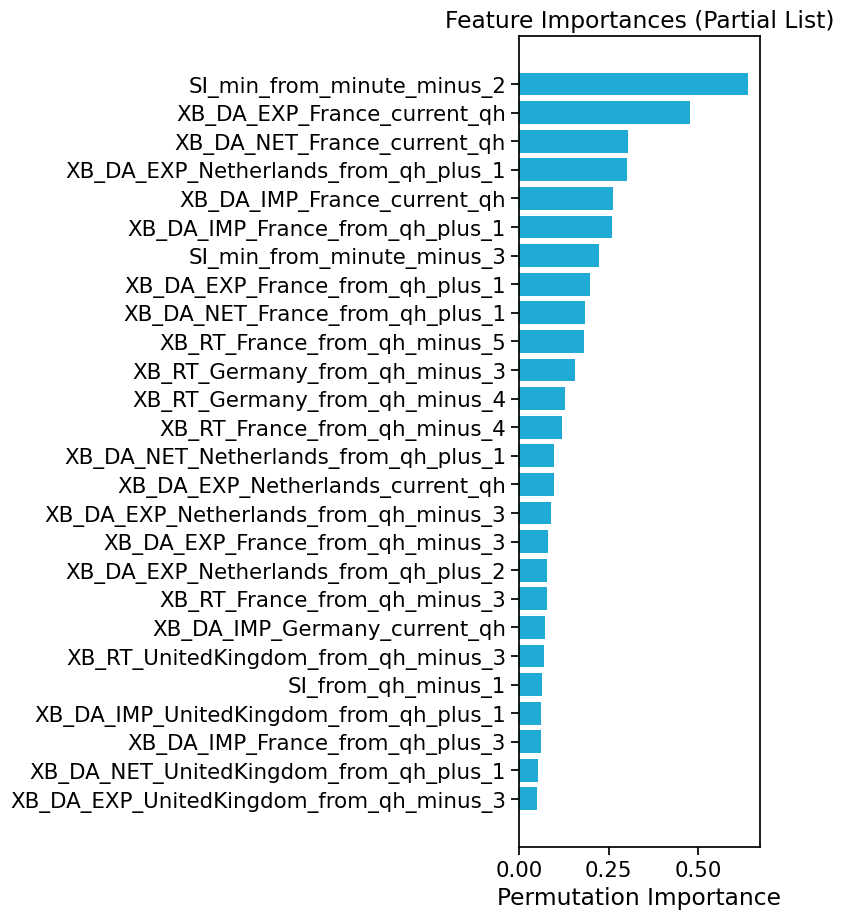

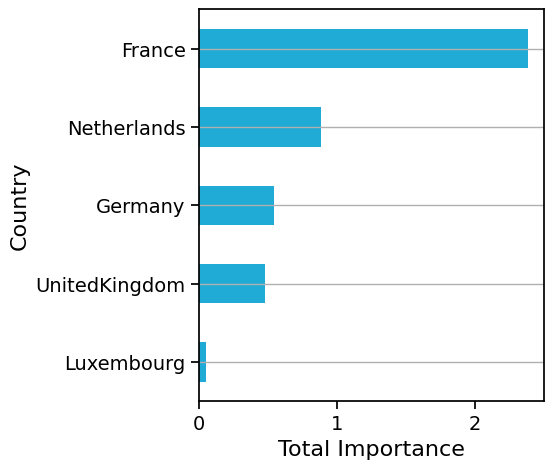

In [172]:

# Parse data into a DataFrame
data = [line.split(": ") for line in raw_data.strip().split("\n")]
df = pd.DataFrame(data, columns=["Feature", "Importance"])
df["Importance"] = df["Importance"].astype(float)
df_sorted = df.sort_values(by="Importance")
# Set threshold
threshold = 0.05

# Filter the DataFrame
df_filtered = df[df["Importance"] > threshold].sort_values(by="Importance")
df_sorted = df_filtered
# Plotting
color = "#1FABD5"

plt.figure(figsize=(8, 9.5))
plt.barh(df_sorted["Feature"], df_sorted["Importance"],color=color)
plt.xlabel("Permutation Importance")
plt.title("Feature Importances (Partial List)")
plt.tight_layout()
plt.grid(False)
plt.show()

# Define function to extract country from feature name
def get_country(feature):
    for country in ['France', 'Netherlands', 'Germany', 'UnitedKingdom', 'Luxembourg']:
        if country in feature:
            return country
    return 'Other'

# Apply the function to create a new column
df["Country"] = df["Feature"].apply(get_country)

# Group by country and sum importances
country_importance = df.groupby("Country")["Importance"].sum()

# Remove "Other" category
country_importance = country_importance[country_importance.index != "Other"]

# Sort and plot
country_importance = country_importance.sort_values(ascending=True)

plt.figure(figsize=(6, 5), facecolor='white')  # Set figure background
ax = country_importance.plot(kind="barh", color=color)

# Set axis background
ax.set_facecolor('white')

# Set font sizes
ax.set_ylabel("Country", fontsize=16)
ax.set_xlabel("Total Importance", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.grid(axis="y")
plt.tight_layout()
plt.show()


